# Bayesian sampling of the posterior distribution

The posterior distribution is defined over the set of structural ensembles with the same functional form as the optimal solution of Ensemble Refinement, parametrized by $\vec\lambda$. Alternatively, you could also have a set of structural ensembles given by some free/flexible coefficients of a force-field correction, or the most general variational freedom of ensembles defined over an arbitrary n. of frames.

The posterior distribution is given by the exponential of minus the loss function.

In [1]:
import os, pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from Functions.basic_functions_bayesian import compute, compute_single, run_Metropolis

In [3]:
dir_name = 'Manuscript_images'

if not os.path.exists(dir_name):
    os.mkdir(dir_name)

### Quadratic potential

In [4]:
seed = 1
rng = np.random.default_rng(seed)

In [5]:
n_frames = 10000

# p0 = np.random.dirichlet(np.ones(n_frames), size=None)
p0 = np.ones(n_frames)/n_frames

x = rng.normal(0, 0.5, size=n_frames)

x_exp = 1.7  # 0.3
sigma_exp = 0.6  # 0.02

alpha = 0.5

Text(0.5, 0, 'n frames')

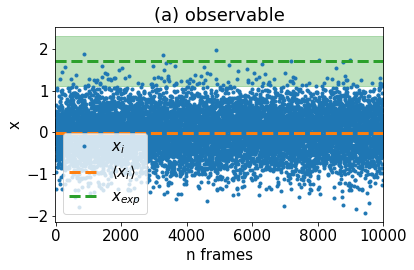

In [6]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15
plt.rcParams.update({'figure.autolayout': True})

plt.figure(figsize=(6, 4))
plt.plot(x, '.', label=r'$x_i$')

plt.plot([-5, len(x) + 5], [np.mean(x), np.mean(x)], '--', label=r'$\langle x_i\rangle$')  # ,color='tab:blue')

plt.plot([-5, len(x) + 5], [x_exp, x_exp], '--', label=r'$x_{exp}$')
plt.fill_between([-5, len(x) + 5], [x_exp - sigma_exp, x_exp - sigma_exp], [x_exp + sigma_exp, x_exp + sigma_exp], alpha=0.3, color='tab:green')

plt.title('(a) observable')
plt.legend(loc='lower left')
plt.xlim([-5, len(x) + 5])
plt.ylabel('x')
plt.xlabel('n frames')

# plt.savefig('Manuscript_images/ex1_obs.pdf', format='pdf', bbox_inches='tight')

In [7]:
dlambda = 1e-1
lambdamax = 100
lambdas = np.arange(-lambdamax-dlambda, lambdamax+dlambda, dlambda)

# lambdas = np.linspace(-lambdamax, lambdamax, n)

In [8]:
results = compute(lambdas, p0, x, x_exp, sigma_exp, alpha)

results.keys()

dict_keys(['P', 'Z', 'av_g', 'av_g2', 'var_g', 'std_g', 'chi2', 'Srel', 'lossf', 'gamma', 'jeffreys', 'cov', 'dirichlet', 'avg_density'])

In [9]:
dV = results['lossf'][0] - np.min(results['lossf'])
print('depth: ', dV)

depth:  3.03040153508974


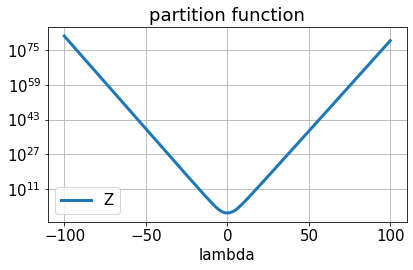

In [10]:
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 3

plt.plot(lambdas, results['Z'], '-', label='Z')
plt.yscale('log')
plt.xlabel('lambda')
plt.title('partition function')
plt.legend()
plt.grid()

-7.700000000005247


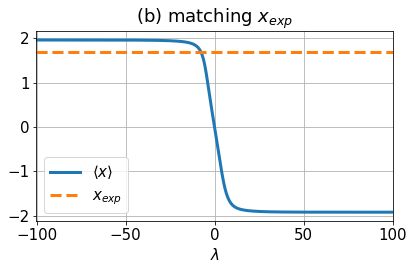

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(lambdas, results['av_g'], '-', label=r'$\langle x \rangle$')
plt.plot([lambdas[0], lambdas[-1]], [x_exp, x_exp], '--', label='$x_{exp}$')
#plt.yscale('log')
plt.xlabel('$\lambda$')
plt.legend()
plt.grid()
plt.xlim([np.min(lambdas), np.max(lambdas)])
plt.title('(b) matching $x_{exp}$')

print(lambdas[np.argmin(np.abs(results['av_g'] - x_exp))])

# plt.savefig('Manuscript_images/ex1_g_match.pdf', format='pdf', bbox_inches='tight')

-3.9000000000054627


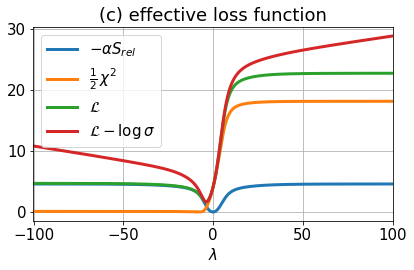

In [12]:
plt.figure(figsize=(6, 4))

plt.plot(lambdas, -alpha*results['Srel'], '-', label=r'$- \alpha S_{rel}$')
plt.plot(lambdas, 1/2*results['chi2'], '-', label=r'$\frac{1}{2} \, \chi^2$')
# plt.plot(lambdas, -alpha*results['Srel'] + 1/2*results['chi2'][:, 0], '-', label=r'$\mathcal{L}=\chi^2/\,2 - \alpha S_{rel}$')
plt.plot(lambdas, results['lossf'], label=r'$\mathcal{L}$')  # =\chi^2/\,2 - \alpha S_{rel}$')

wh = np.argmin(results['lossf'])
jeff0 = np.log(results['jeffreys'])[wh]

plt.plot(lambdas, results['lossf'] - np.log(results['jeffreys']) + jeff0, label=r'$\mathcal{L} - \log\sigma$')

plt.title(r'(c) effective loss function')
# plt.yscale('log')
# plt.xlim([-50, 50])
plt.xlabel(r'$\lambda$')
plt.legend()
plt.grid()
plt.xlim([lambdas[0], lambdas[-1]])

# plt.savefig('Manuscript_images/ex1_loss_adj.pdf', format='pdf', bbox_inches='tight')

print(lambdas[np.argmin(results['lossf'])])

In [13]:
hyper_P0 = np.exp(-results['lossf'])
hyper_P_gamma = np.exp(-results['gamma'])
hyper_P_jef = np.exp(-results['lossf'])*results['jeffreys']

Text(0.5, 0, '$\\lambda$')

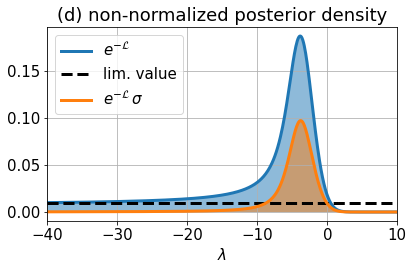

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(lambdas, hyper_P0, label=r'$e^{-\mathcal{L}}$')
plt.fill_between(lambdas, np.zeros(len(lambdas)), hyper_P0, alpha=0.5)

val = np.exp(-results['lossf'][0])
lim_x = [-40, 10]

plt.plot(lim_x, [val, val], 'k--', label='lim. value')

plt.plot(lambdas, hyper_P_jef, label=r'$e^{-\mathcal{L}} \, \sigma$')
plt.fill_between(lambdas, np.zeros(len(lambdas)), hyper_P_jef, alpha=0.5)

plt.grid()
plt.title('(d) non-normalized posterior density')
plt.legend(loc='upper left')  # (loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(lim_x)
plt.xlabel('$\lambda$')

# plt.savefig('Manuscript_images/ex1_non-norm_loss.pdf', format='pdf', bbox_inches='tight')

#### Metropolis sampling

In [16]:
lambdas0 = np.zeros(1)
proposal_std = 0.5

def energy_fun(lambdas, if_jeffreys = False):
    """implicit input parameters: p0, x, x_exp, sigma_exp, alpha"""
    
    out = compute_single(lambdas, p0, x, x_exp, sigma_exp, alpha)
    
    energy = out.lossf
    quantities = [out.av_g, out.Srel]

    if if_jeffreys: energy -= np.log(out.jeffreys)
    
    return energy, quantities

In [17]:
# seed = 6

energy_function = lambda x : energy_fun(x, False)
out_noJ = run_Metropolis(lambdas0, proposal_std, energy_function, n_steps=int(2e4))  # , seed=seed)

energy_function = lambda x : energy_fun(x, True)
out_J = run_Metropolis(lambdas0, proposal_std, energy_function, n_steps=int(2e4))  # , seed=seed)

  1%|          | 101/20000 [00:00<00:19, 1002.59it/s]

0
100
200


  3%|▎         | 501/20000 [00:00<00:15, 1292.94it/s]

300
400
500


  4%|▍         | 756/20000 [00:00<00:15, 1237.52it/s]

600
700
800


  5%|▌         | 1008/20000 [00:00<00:15, 1247.24it/s]

900
1000
1100


  7%|▋         | 1372/20000 [00:01<00:16, 1161.98it/s]

1200
1300
1400


  9%|▊         | 1740/20000 [00:01<00:15, 1211.18it/s]

1500
1600
1700


 10%|▉         | 1984/20000 [00:01<00:14, 1206.77it/s]

1800
1900
2000


 11%|█         | 2239/20000 [00:01<00:14, 1243.15it/s]

2100
2200
2300


 13%|█▎        | 2602/20000 [00:02<00:15, 1127.27it/s]

2400
2500
2600


 14%|█▍        | 2825/20000 [00:02<00:16, 1044.50it/s]

2700
2800
2900


 16%|█▌        | 3171/20000 [00:02<00:14, 1123.45it/s]

3000
3100
3200


 18%|█▊        | 3549/20000 [00:03<00:13, 1219.66it/s]

3300
3400
3500


 19%|█▉        | 3801/20000 [00:03<00:13, 1231.89it/s]

3600
3700
3800


 20%|██        | 4061/20000 [00:03<00:12, 1246.77it/s]

3900
4000
4100


 22%|██▏       | 4439/20000 [00:03<00:12, 1256.52it/s]

4200
4300
4400


 23%|██▎       | 4690/20000 [00:03<00:12, 1239.89it/s]

4500
4600
4700


 25%|██▍       | 4945/20000 [00:04<00:12, 1250.52it/s]

4800
4900
5000


 27%|██▋       | 5334/20000 [00:04<00:11, 1266.15it/s]

5100
5200
5300


 28%|██▊       | 5599/20000 [00:04<00:11, 1288.76it/s]

5400
5500
5600


 29%|██▉       | 5853/20000 [00:04<00:11, 1237.23it/s]

5700
5800
5900


 31%|███       | 6231/20000 [00:05<00:11, 1247.58it/s]

6000
6100
6200


 32%|███▏      | 6482/20000 [00:05<00:10, 1245.80it/s]

6300
6400
6500


 34%|███▎      | 6737/20000 [00:05<00:10, 1251.52it/s]

6600
6700
6800


 36%|███▌      | 7132/20000 [00:05<00:10, 1274.35it/s]

6900
7000
7100


 37%|███▋      | 7393/20000 [00:06<00:10, 1162.62it/s]

7200
7300
7400


 38%|███▊      | 7647/20000 [00:06<00:10, 1217.16it/s]

7500
7600
7700


 40%|████      | 8032/20000 [00:06<00:09, 1243.44it/s]

7800
7900
8000


 41%|████▏     | 8282/20000 [00:06<00:09, 1217.97it/s]

8100
8200
8300


 43%|████▎     | 8528/20000 [00:07<00:09, 1217.66it/s]

8400
8500
8600


 45%|████▍     | 8916/20000 [00:07<00:08, 1260.16it/s]

8700
8800
8900


 46%|████▌     | 9170/20000 [00:07<00:08, 1238.92it/s]

9000
9100
9200


 48%|████▊     | 9561/20000 [00:07<00:08, 1280.87it/s]

9300
9400
9500


 49%|████▉     | 9817/20000 [00:08<00:08, 1253.83it/s]

9600
9700
9800


 50%|█████     | 10068/20000 [00:08<00:08, 1236.19it/s]

9900
10000
10100


 52%|█████▏    | 10447/20000 [00:08<00:07, 1257.45it/s]

10200
10300
10400


 54%|█████▎    | 10703/20000 [00:08<00:07, 1263.19it/s]

10500
10600
10700


 55%|█████▍    | 10955/20000 [00:08<00:07, 1236.51it/s]

10800
10900
11000


 57%|█████▋    | 11333/20000 [00:09<00:06, 1248.20it/s]

11100
11200
11300


 58%|█████▊    | 11587/20000 [00:09<00:06, 1251.66it/s]

11400
11500
11600


 59%|█████▉    | 11842/20000 [00:09<00:06, 1260.67it/s]

11700
11800
11900


 61%|██████    | 12234/20000 [00:10<00:06, 1289.65it/s]

12000
12100
12200


 62%|██████▏   | 12492/20000 [00:10<00:05, 1281.98it/s]

12300
12400
12500


 64%|██████▎   | 12747/20000 [00:10<00:05, 1245.73it/s]

12600
12700
12800


 66%|██████▌   | 13128/20000 [00:10<00:05, 1251.14it/s]

12900
13000
13100


 67%|██████▋   | 13382/20000 [00:10<00:05, 1253.78it/s]

13200
13300
13400


 68%|██████▊   | 13634/20000 [00:11<00:05, 1239.27it/s]

13500
13600
13700


 70%|███████   | 14024/20000 [00:11<00:04, 1276.39it/s]

13800
13900
14000


 71%|███████▏  | 14278/20000 [00:11<00:04, 1254.93it/s]

14100
14200
14300


 73%|███████▎  | 14533/20000 [00:11<00:04, 1258.15it/s]

14400
14500
14600


 75%|███████▍  | 14924/20000 [00:12<00:03, 1287.37it/s]

14700
14800
14900


 76%|███████▌  | 15187/20000 [00:12<00:03, 1291.03it/s]

15000
15100
15200


 77%|███████▋  | 15449/20000 [00:12<00:03, 1278.84it/s]

15300
15400
15500


 79%|███████▉  | 15835/20000 [00:12<00:03, 1267.24it/s]

15600
15700
15800


 80%|████████  | 16092/20000 [00:13<00:03, 1259.31it/s]

15900
16000
16100


 82%|████████▏ | 16346/20000 [00:13<00:02, 1253.50it/s]

16200
16300
16400


 84%|████████▎ | 16729/20000 [00:13<00:02, 1263.81it/s]

16500
16600
16700


 85%|████████▍ | 16984/20000 [00:13<00:02, 1255.97it/s]

16800
16900
17000


 86%|████████▌ | 17237/20000 [00:13<00:02, 1238.96it/s]

17100
17200
17300


 88%|████████▊ | 17595/20000 [00:14<00:02, 1050.96it/s]

17400
17500
17600


 89%|████████▉ | 17844/20000 [00:14<00:01, 1142.63it/s]

17700
17800
17900


 91%|█████████ | 18228/20000 [00:14<00:01, 1223.94it/s]

18000
18100
18200


 92%|█████████▏| 18484/20000 [00:15<00:01, 1245.88it/s]

18300
18400
18500


 94%|█████████▎| 18735/20000 [00:15<00:01, 1243.38it/s]

18600
18700
18800


 96%|█████████▌| 19122/20000 [00:15<00:00, 1275.22it/s]

18900
19000
19100


 97%|█████████▋| 19377/20000 [00:15<00:00, 1266.07it/s]

19200
19300
19400


 98%|█████████▊| 19629/20000 [00:15<00:00, 1240.46it/s]

19500
19600
19700


100%|██████████| 20000/20000 [00:16<00:00, 1228.30it/s]
/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:470: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  else: return np.array(traj), np.array(ene), av_alpha, np.array(quantities)


19800
19900


  0%|          | 0/20000 [00:00<?, ?it/s]

0


  1%|▏         | 253/20000 [00:00<00:15, 1262.93it/s]

100
200
300


  3%|▎         | 507/20000 [00:00<00:15, 1243.27it/s]

400
500


  3%|▎         | 632/20000 [00:00<00:16, 1202.43it/s]

600


  4%|▍         | 756/20000 [00:00<00:15, 1214.25it/s]

700
800


  4%|▍         | 878/20000 [00:00<00:15, 1209.48it/s]

900


  6%|▌         | 1128/20000 [00:00<00:15, 1226.18it/s]

1000
1100


  6%|▋         | 1251/20000 [00:01<00:15, 1216.52it/s]

1200


  7%|▋         | 1377/20000 [00:01<00:15, 1228.65it/s]

1300
1400


  8%|▊         | 1500/20000 [00:01<00:15, 1224.04it/s]

1500


  8%|▊         | 1623/20000 [00:01<00:15, 1214.61it/s]

1600
1700


  9%|▉         | 1751/20000 [00:01<00:14, 1223.29it/s]

1800


 10%|▉         | 1996/20000 [00:01<00:15, 1196.85it/s]

1900
2000


 11%|█         | 2116/20000 [00:01<00:15, 1181.04it/s]

2100


 11%|█         | 2235/20000 [00:01<00:15, 1162.68it/s]

2200
2300


 12%|█▏        | 2352/20000 [00:01<00:15, 1145.60it/s]

2400


 13%|█▎        | 2588/20000 [00:02<00:15, 1148.72it/s]

2500
2600


 14%|█▎        | 2706/20000 [00:02<00:14, 1157.16it/s]

2700


 14%|█▍        | 2826/20000 [00:02<00:14, 1168.61it/s]

2800
2900


 15%|█▍        | 2953/20000 [00:02<00:14, 1196.19it/s]

3000


 16%|█▌        | 3202/20000 [00:02<00:13, 1209.59it/s]

3100
3200


 17%|█▋        | 3328/20000 [00:02<00:13, 1224.19it/s]

3300


 17%|█▋        | 3451/20000 [00:02<00:13, 1195.24it/s]

3400
3500


 18%|█▊        | 3571/20000 [00:02<00:13, 1184.31it/s]

3600


 19%|█▉        | 3817/20000 [00:03<00:13, 1194.63it/s]

3700
3800


 20%|█▉        | 3941/20000 [00:03<00:13, 1204.35it/s]

3900


 20%|██        | 4062/20000 [00:03<00:13, 1199.02it/s]

4000
4100


 21%|██        | 4182/20000 [00:03<00:13, 1194.73it/s]

4200


 22%|██▏       | 4430/20000 [00:03<00:12, 1213.22it/s]

4300
4400
4500


 23%|██▎       | 4680/20000 [00:03<00:12, 1229.26it/s]

4600
4700


 24%|██▍       | 4804/20000 [00:04<00:12, 1230.19it/s]

4800


 25%|██▍       | 4928/20000 [00:04<00:12, 1199.06it/s]

4900
5000


 25%|██▌       | 5051/20000 [00:04<00:12, 1206.73it/s]

5100


 27%|██▋       | 5301/20000 [00:04<00:12, 1224.68it/s]

5200
5300


 27%|██▋       | 5424/20000 [00:04<00:12, 1214.17it/s]

5400


 28%|██▊       | 5550/20000 [00:04<00:11, 1225.89it/s]

5500
5600


 28%|██▊       | 5676/20000 [00:04<00:11, 1234.94it/s]

5700


 30%|██▉       | 5931/20000 [00:04<00:11, 1258.02it/s]

5800
5900
6000


 31%|███       | 6182/20000 [00:05<00:11, 1240.84it/s]

6100
6200


 32%|███▏      | 6307/20000 [00:05<00:11, 1223.95it/s]

6300


 32%|███▏      | 6430/20000 [00:05<00:11, 1219.20it/s]

6400
6500


 33%|███▎      | 6552/20000 [00:05<00:11, 1211.10it/s]

6600


 34%|███▍      | 6806/20000 [00:05<00:10, 1239.93it/s]

6700
6800


 35%|███▍      | 6931/20000 [00:05<00:10, 1234.73it/s]

6900


 35%|███▌      | 7055/20000 [00:05<00:10, 1209.23it/s]

7000
7100


 36%|███▌      | 7177/20000 [00:05<00:10, 1204.44it/s]

7200


 37%|███▋      | 7426/20000 [00:06<00:10, 1211.73it/s]

7300
7400
7500


 38%|███▊      | 7673/20000 [00:06<00:10, 1193.17it/s]

7600
7700


 39%|███▉      | 7797/20000 [00:06<00:10, 1204.55it/s]

7800


 40%|████      | 8043/20000 [00:06<00:09, 1213.87it/s]

7900
8000
8100


 41%|████▏     | 8293/20000 [00:06<00:09, 1234.65it/s]

8200
8300


 42%|████▏     | 8418/20000 [00:06<00:09, 1238.28it/s]

8400


 43%|████▎     | 8542/20000 [00:07<00:09, 1230.10it/s]

8500
8600


 43%|████▎     | 8671/20000 [00:07<00:09, 1246.78it/s]

8700


 45%|████▍     | 8920/20000 [00:07<00:09, 1222.18it/s]

8800
8900
9000


 46%|████▌     | 9165/20000 [00:07<00:09, 1200.56it/s]

9100
9200


 46%|████▋     | 9286/20000 [00:07<00:09, 1173.94it/s]

9300


 48%|████▊     | 9521/20000 [00:07<00:09, 1150.39it/s]

9400
9500
9600


 49%|████▉     | 9766/20000 [00:08<00:08, 1191.61it/s]

9700
9800


 49%|████▉     | 9892/20000 [00:08<00:08, 1210.73it/s]

9900


 51%|█████     | 10144/20000 [00:08<00:08, 1219.96it/s]

10000
10100
10200


 52%|█████▏    | 10393/20000 [00:08<00:07, 1229.27it/s]

10300
10400


 53%|█████▎    | 10517/20000 [00:08<00:07, 1216.96it/s]

10500


 53%|█████▎    | 10639/20000 [00:08<00:07, 1188.16it/s]

10600
10700


 54%|█████▍    | 10758/20000 [00:08<00:07, 1177.11it/s]

10800


 55%|█████▌    | 11001/20000 [00:09<00:07, 1194.46it/s]

10900
11000


 56%|█████▌    | 11121/20000 [00:09<00:07, 1127.25it/s]

11100


 56%|█████▌    | 11236/20000 [00:09<00:07, 1132.87it/s]

11200
11300


 57%|█████▋    | 11356/20000 [00:09<00:07, 1151.77it/s]

11400


 57%|█████▋    | 11474/20000 [00:09<00:07, 1156.34it/s]

11500


 58%|█████▊    | 11590/20000 [00:09<00:09, 933.51it/s] 

11600


 58%|█████▊    | 11691/20000 [00:09<00:10, 800.25it/s]

11700


 59%|█████▉    | 11864/20000 [00:10<00:10, 805.16it/s]

11800


 60%|█████▉    | 11974/20000 [00:10<00:09, 879.93it/s]

11900
12000


 60%|██████    | 12074/20000 [00:10<00:08, 909.73it/s]

12100


 61%|██████▏   | 12267/20000 [00:10<00:08, 880.28it/s]

12200


 62%|██████▏   | 12358/20000 [00:10<00:09, 822.90it/s]

12300


 62%|██████▏   | 12473/20000 [00:10<00:08, 909.05it/s]

12400
12500


 63%|██████▎   | 12588/20000 [00:10<00:07, 973.61it/s]

12600


 64%|██████▍   | 12834/20000 [00:11<00:06, 1098.21it/s]

12700
12800
12900


 65%|██████▌   | 13050/20000 [00:11<00:06, 1008.78it/s]

13000


 66%|██████▌   | 13153/20000 [00:11<00:07, 906.69it/s] 

13100


 66%|██████▌   | 13247/20000 [00:11<00:07, 907.57it/s]

13200


 67%|██████▋   | 13348/20000 [00:11<00:07, 930.47it/s]

13300


 67%|██████▋   | 13443/20000 [00:11<00:07, 841.36it/s]

13400


 68%|██████▊   | 13530/20000 [00:11<00:07, 813.21it/s]

13500


 68%|██████▊   | 13613/20000 [00:12<00:08, 739.65it/s]

13600


 68%|██████▊   | 13690/20000 [00:12<00:08, 743.56it/s]

13700


 69%|██████▉   | 13766/20000 [00:12<00:09, 664.82it/s]

13800


 70%|██████▉   | 13992/20000 [00:12<00:06, 881.07it/s]

13900
14000


 71%|███████   | 14109/20000 [00:12<00:06, 959.97it/s]

14100


 71%|███████   | 14222/20000 [00:12<00:05, 1007.55it/s]

14200
14300


 72%|███████▏  | 14348/20000 [00:12<00:05, 1079.44it/s]

14400


 73%|███████▎  | 14607/20000 [00:13<00:04, 1184.62it/s]

14500
14600


 74%|███████▎  | 14729/20000 [00:13<00:04, 1195.01it/s]

14700


 74%|███████▍  | 14850/20000 [00:13<00:04, 1170.75it/s]

14800
14900


 75%|███████▍  | 14968/20000 [00:13<00:04, 1140.76it/s]

15000


 76%|███████▌  | 15218/20000 [00:13<00:04, 1188.65it/s]

15100
15200


 77%|███████▋  | 15338/20000 [00:13<00:03, 1191.66it/s]

15300


 77%|███████▋  | 15458/20000 [00:13<00:03, 1171.35it/s]

15400
15500


 78%|███████▊  | 15576/20000 [00:13<00:03, 1169.91it/s]

15600


 79%|███████▉  | 15824/20000 [00:14<00:03, 1208.34it/s]

15700
15800


 80%|███████▉  | 15951/20000 [00:14<00:03, 1225.78it/s]

15900


 80%|████████  | 16074/20000 [00:14<00:03, 1218.71it/s]

16000
16100


 81%|████████  | 16196/20000 [00:14<00:03, 1178.39it/s]

16200


 82%|████████▏ | 16440/20000 [00:14<00:02, 1196.39it/s]

16300
16400
16500


 83%|████████▎ | 16688/20000 [00:14<00:02, 1210.55it/s]

16600
16700


 84%|████████▍ | 16810/20000 [00:14<00:02, 1207.71it/s]

16800


 85%|████████▍ | 16931/20000 [00:14<00:02, 1206.64it/s]

16900
17000


 85%|████████▌ | 17058/20000 [00:15<00:02, 1221.12it/s]

17100


 87%|████████▋ | 17319/20000 [00:15<00:02, 1256.96it/s]

17200
17300


 87%|████████▋ | 17445/20000 [00:15<00:02, 1234.34it/s]

17400


 88%|████████▊ | 17569/20000 [00:15<00:01, 1219.69it/s]

17500
17600


 88%|████████▊ | 17692/20000 [00:15<00:01, 1154.00it/s]

17700


 90%|████████▉ | 17930/20000 [00:15<00:01, 1164.90it/s]

17800
17900
18000


 91%|█████████ | 18174/20000 [00:16<00:01, 1182.30it/s]

18100
18200


 91%|█████████▏| 18293/20000 [00:16<00:01, 1167.96it/s]

18300


 92%|█████████▏| 18411/20000 [00:16<00:01, 1122.33it/s]

18400
18500


 93%|█████████▎| 18524/20000 [00:16<00:01, 1092.45it/s]

18600


 93%|█████████▎| 18634/20000 [00:16<00:01, 1034.17it/s]

18700


 94%|█████████▍| 18832/20000 [00:16<00:01, 827.11it/s] 

18800


 95%|█████████▍| 18918/20000 [00:16<00:01, 832.64it/s]

18900


 95%|█████████▌| 19024/20000 [00:16<00:01, 891.70it/s]

19000
19100


 96%|█████████▌| 19131/20000 [00:17<00:00, 939.09it/s]

19200


 97%|█████████▋| 19337/20000 [00:17<00:00, 981.45it/s]

19300
19400


 97%|█████████▋| 19440/20000 [00:17<00:00, 992.94it/s]

19500


 98%|█████████▊| 19662/20000 [00:17<00:00, 1054.82it/s]

19600
19700


100%|██████████| 20000/20000 [00:17<00:00, 1117.96it/s]


19800
19900


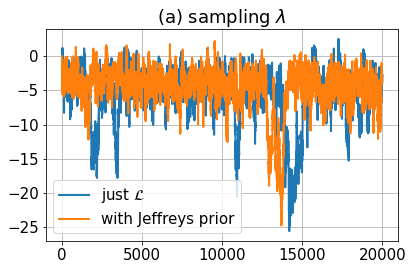

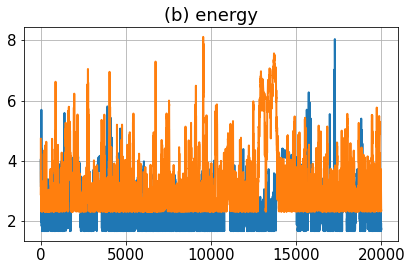

In [18]:
plt.rcParams['lines.linewidth'] = 2
# plt.rcParams.update({'figure.autolayout': True})

plt.figure(figsize=(6, 4))
plt.plot(out_noJ[0][:, 0], label='just $\mathcal{L}$')
plt.plot(out_J[0][:, 0], label='with Jeffreys prior')
# plt.ylabel(r'$\lambda$')
plt.title('(a) sampling $\lambda$')
plt.legend()
plt.grid()
# plt.savefig('Manuscript_images/sampling_lambda.pdf', format='pdf', bbox_inches='tight')


plt.figure(figsize=(6, 4))
plt.plot(out_noJ[1])
plt.plot(out_J[1])
# plt.xlabel('n. iter')
plt.title('(b) energy')
# plt.ylabel('energy')
plt.grid()
# plt.savefig('Manuscript_images/sampling_energy.pdf', format='pdf', bbox_inches='tight')

angle_\lambda$:ge of $\langle x 
w/o Jeffreys:  [1.17035813]
with Jeffreys:  [1.06301875]


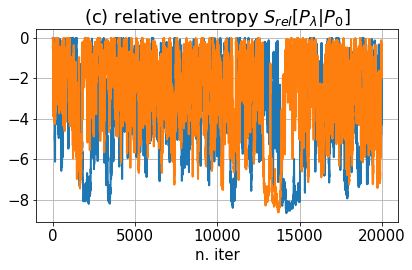

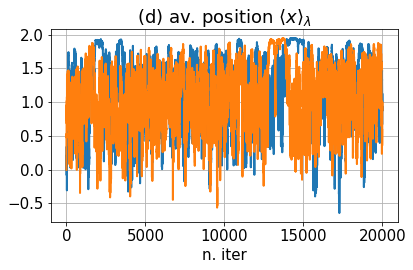

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(out_noJ[3][:, 1])
plt.plot(out_J[3][:, 1])
plt.title(r'(c) relative entropy $S_{rel}[P_\lambda|P_0]$')
plt.xlabel('n. iter')
plt.grid()
# plt.savefig('Manuscript_images/sampling_Srel.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.plot(out_noJ[3][:, 0])
plt.plot(out_J[3][:, 0])
plt.title(r'(d) av. position $\langle x \rangle_\lambda$')
plt.xlabel('n. iter')
plt.grid()
# plt.savefig('Manuscript_images/sampling_avx.pdf', format='pdf', bbox_inches='tight')

print('posterior average of $\langle x \rangle_\lambda$:')
print('w/o Jeffreys: ', np.mean(out_noJ[3][:, 0]))
print('with Jeffreys: ', np.mean(out_J[3][:, 0]))

Text(0, 0.5, 'energy')

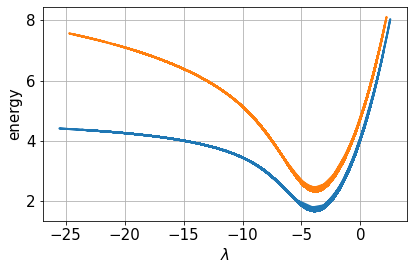

In [20]:
plt.plot(out_noJ[0][:, 0], out_noJ[1])
plt.plot(out_J[0][:, 0], out_J[1])
plt.grid()
plt.xlabel(r'$\lambda$')
plt.ylabel('energy')

### Scaling

In [4]:
from Functions.basic_functions_gaussian import numerical_props, analytical_props, flatten

In [25]:
# alpha = 1.
# sigma = 0.1
# gexp = 0.3
# sigma_exp = 0.05

alpha = 0.5
sigma = 0.5
gexp = 1.7
sigma_exp = 0.6

#### Compute and save as pandas DataFrame (to txt)

In [44]:
log_ns = np.linspace(1, 6, 10)
ns = np.unique(np.array([int(10**log_n) for log_n in log_ns]))

out1 = {}
out2 = {}

for n in ns:
    
    print(n)

    out1[n] = {}
    
    for m in range(5):
        out1[n][m] = numerical_props(n, sigma, gexp, sigma_exp, alpha, seed=m)
    
    out2[n] = analytical_props(n, sigma, gexp, sigma_exp, alpha, False)

10
35
129
464
1668
5994
21544
77426
278255
1000000


In [45]:
df_th = pandas.DataFrame(out2).T
df_th.insert(0, 'n_frames', df_th.index)
df_th.index = range(df_th.shape[0])

""" inverf or logN """
# df_th.to_csv('Results/scaling_th_logN.txt')
# df_th.to_csv('Results/scaling_th_inverf.txt')

In [17]:
# save as pandas dataframe

df = pandas.DataFrame(out1[ns[0]]).loc[['min_lambda', 'min_loss', 'min_avg', 'gbar', 'lim_loss', 'lim_loss_num', 'lim_chi2', 'lim_dkl', 'dV']].T
df.insert(0, 'n_frames', ns[0])

for n in ns[1:]:
    df2 = pandas.DataFrame(out1[n]).loc[['min_lambda', 'min_loss', 'min_avg', 'gbar', 'lim_loss', 'lim_loss_num', 'lim_chi2', 'lim_dkl', 'dV']].T
    df2.insert(0, 'n_frames', n)
    df = pandas.concat([df, df2])

df.insert(0, 'seed', df.index)
df.index = range(df.shape[0])

j = 0  # 0 or 1

df['lim_loss'] = [df['lim_loss'].iloc[i][j][0] for i in range(len(df['lim_loss']))]

for s in ['lim_chi2', 'lim_loss_num', 'lim_dkl']:
    df[s] = [df[s].iloc[i][j] for i in range(len(df[s]))]

# df.to_csv('Results/scaling_num.txt')


#### Load pandas DataFrame from txt

In [61]:
df = pandas.read_csv('Results/scaling_num.txt', sep=',', index_col=0)
df_th = pandas.read_csv('Results/scaling_th_inverf.txt', sep=',', index_col=0)

df

seed  n_frames     min_lambda  min_loss       min_avg      gbar  \
0       0        10  [-6.39080063]  2.443498  [0.54961065]  0.652000   
1       1        10  [-7.46408149]  2.804361  [0.35627665]  0.452678   
2       2        10  [-5.06069134]  1.885737  [0.78902746]  0.899854   
3       3        10  [-2.03511081]  0.822125  [1.33369298]  1.661500   
4       4        10  [-5.26137981]  2.124384  [0.75255722]  0.831862   
..    ...       ...            ...       ...           ...       ...   
495    45   1000000  [-3.94007446]  1.678560   [0.9877087]  2.402050   
496    46   1000000  [-3.94744831]  1.679855  [0.98634142]  2.395659   
497    47   1000000  [-3.94751526]  1.681565  [0.98650158]  2.571905   
498    48   1000000  [-3.89088079]  1.675994  [0.99629962]  2.826322   
499    49   1000000  [-3.96222726]  1.684698   [0.9836828]  2.445439   

     lim_loss  lim_loss_num  lim_chi2    lim_dkl        dV  
0    2.676715      2.676713  3.050845   2.302582  0.233216  
1    3.312143      3.312141  4.321701   2.302582  0.507781  
2    2.040507      2.040505  1.778428   2.302582  0.154768  
3    1.153351      1.153365  0.004117   2.302612  0.331240  
4    2.198048      2.198046  2.093510   2.302582  0.073662  
..        ...           ...       ...        ...       ...  
495  7.592303      7.592323  1.369095  13.815552  5.913764  
496  7.579896      7.579917  1.344281  13.815552  5.900062  
497  7.963615      7.963635  2.111719  13.815552  6.282071  
498  8.669700      8.669721  3.523889  13.815552  6.993727  
499  7.679532      7.679552  1.543553  13.815552  5.994854  

[500 rows x 11 columns]

In [62]:
def std_on_mean(x): return np.std(x)/np.sqrt(len(x))
cols = ['lim_chi2', 'lim_dkl', 'lim_loss', 'min_loss', 'dV']
df_pivot = pandas.pivot_table(df, values=cols, index=['n_frames'], aggfunc=['mean', 'std', 'first', std_on_mean])

df_pivot

mean                                                std  \
                dV  lim_chi2    lim_dkl  lim_loss  min_loss        dV   
n_frames                                                                
10        0.259580  2.794039   2.286621  2.548295  2.280750  0.137515   
35        0.517079  1.447995   3.541044  2.501641  1.977441  0.138964   
129       0.912872  0.669440   4.835663  2.764598  1.839680  0.123444   
464       1.410478  0.181974   6.104734  3.160895  1.732876  0.080577   
1668      2.025001  0.072564   7.404551  3.745972  1.713556  0.079000   
5994      2.721969  0.122438   8.691446  4.410477  1.684973  0.128417   
21544     3.464785  0.361797   9.934321  5.169846  1.683274  0.212714   
77426     4.292295  0.705763  11.241237  5.981426  1.681205  0.236528   
278255    5.098230  1.039695  12.517774  6.788032  1.680504  0.198621   
1000000   5.978813  1.535992  13.783340  7.675823  1.680852  0.294827   

                                                     first            \
          lim_chi2   lim_dkl  lim_loss  min_loss        dV  lim_chi2   
n_frames                                                               
10        1.359384  0.098605  0.679681  0.678068  0.233216  3.050845   
35        0.864345  0.090711  0.432127  0.415824  0.596433  2.871716   
129       0.388998  0.120772  0.194446  0.191264  1.138857  1.356465   
464       0.212064  0.133149  0.105958  0.117533  1.372895  0.077452   
1668      0.076541  0.096560  0.038268  0.063003  1.981757  0.077452   
5994      0.205136  0.034458  0.102567  0.038644  2.630823  0.014161   
21544     0.352735  0.149280  0.176354  0.017799  3.393108  0.206683   
77426     0.445610  0.097979  0.222802  0.010506  4.572327  1.232022   
278255    0.373832  0.079561  0.186904  0.006048  5.206241  1.232022   
1000000   0.559760  0.110569  0.279848  0.003706  5.845004  1.232022   

                                        std_on_mean                      \
            lim_dkl  lim_loss  min_loss          dV  lim_chi2   lim_dkl   
n_frames                                                                  
10         2.302582  2.676715  2.443498    0.019252  0.190314  0.013805   
35         3.555359  3.213532  2.617104    0.019455  0.121008  0.012700   
129        4.859558  3.108138  1.969154    0.017282  0.054460  0.016908   
464        6.139893  3.108668  1.735778    0.011281  0.029689  0.018641   
1668       7.419373  3.748416  1.766656    0.011060  0.010716  0.013518   
5994       8.698486  4.356338  1.725501    0.017978  0.028719  0.004824   
21544      9.977661  5.092268  1.699064    0.029780  0.049383  0.020899   
77426     11.257080  6.244550  1.672225    0.033114  0.062385  0.013717   
278255    12.536255  6.884157  1.677898    0.027807  0.052336  0.011139   
1000000   13.815552  7.523766  1.678783    0.041276  0.078366  0.015480   

                              
          lim_loss  min_loss  
n_frames                      
10        0.095155  0.094930  
35        0.060498  0.058215  
129       0.027222  0.026777  
464       0.014834  0.016455  
1668      0.005358  0.008820  
5994      0.014359  0.005410  
21544     0.024690  0.002492  
77426     0.031192  0.001471  
278255    0.026167  0.000847  
1000000   0.039179  0.000519

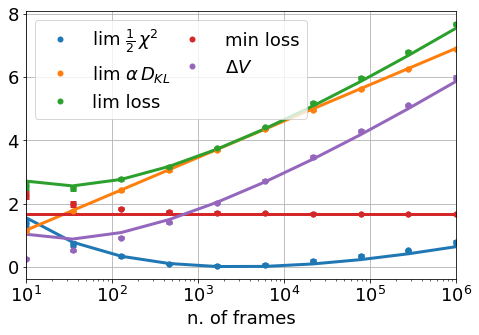

In [64]:
j = 0  # 0 or 1, depending on max/min g

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markeredgewidth'] = 3
plt.rcParams['font.size'] = 18
plt.rcParams.update({'figure.autolayout': True})

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # ,'tab:brown','tab:pink',
          #   'tab:gray','tab:olive','tab:cyan']

plt.figure(figsize=(7, 5))

plt.plot(ns, 1/2*df_pivot['mean']['lim_chi2'], '.', label=r'lim $\frac{1}{2} \, \chi^2$', c=colors[0])
plt.errorbar(ns, 1/2*df_pivot['mean']['lim_chi2'], 1/2*df_pivot['std_on_mean']['lim_chi2'], c=colors[0], fmt='.', capsize=3)
plt.plot(ns, 1/2*df_th['lim_chi2'], c=colors[0])

# overestimate of the chi2 with sqrt(log(n))
# plt.plot(ns, 1/2*((sigma*np.sqrt(2*np.log(ns)) - gexp)/sigma_exp)**2, label='1/2 chi2 est')

plt.plot(ns, alpha*df_pivot['mean']['lim_dkl'], '.', label=r'lim $\alpha\,D_{KL}$', c=colors[1])
plt.errorbar(ns, alpha*df_pivot['mean']['lim_dkl'], alpha*df_pivot['std_on_mean']['lim_dkl'], c=colors[1], fmt='.', capsize=3)
plt.plot(ns, alpha*df_th['lim_dkl'], c=colors[1])

plt.plot(ns, df_pivot['mean']['lim_loss'], '.', label='lim loss', c=colors[2])
plt.errorbar(ns, df_pivot['mean']['lim_loss'], df_pivot['std_on_mean']['lim_loss'], c=colors[2], fmt='.', capsize=3)
plt.plot(ns, df_th['lim_loss'], c=colors[2])

plt.plot(ns, df_pivot['mean']['min_loss'], '.', label='min loss', c=colors[3])
plt.errorbar(ns, df_pivot['mean']['min_loss'], df_pivot['std_on_mean']['min_loss'], c=colors[3], fmt='.', capsize=3)
plt.plot(ns, df_th['min_loss'], c=colors[3])

plt.plot(ns, df_pivot['mean']['dV'], '.', label='$\Delta V$', c=colors[4])
plt.errorbar(ns, df_pivot['mean']['dV'], df_pivot['std_on_mean']['dV'], c=colors[4], fmt='.', capsize=3)
plt.plot(ns, df_th['dV'], c=colors[4])

plt.grid()
plt.xscale('log')
plt.xlabel('n. of frames')
# plt.yscale('log')
plt.legend(ncol=2, columnspacing=0.2)
plt.xlim([ns[0], ns[-1]])

# plt.savefig('Manuscript_images/ex3_scaling_inverf.pdf', format='pdf', bbox_inches='tight')

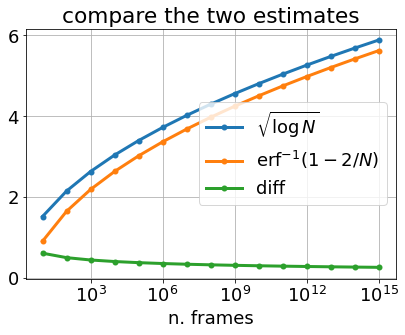

In [79]:
ns = np.array([10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15])

from scipy.special import erfinv

est1 = np.sqrt(np.log(ns))
est2 = erfinv(1 - 2/ns)

plt.figure(figsize=(6, 5))
plt.title('compare the two estimates')
plt.plot(ns, est1, '.-', label=r'$\sqrt{\log N}$')
plt.plot(ns, est2, '.-', label=r'$\mathrm{erf}^{-1}(1 - 2/N)$')
plt.plot(ns, est1 - est2, '.-', label='diff')
plt.xscale('log')
plt.xlabel('n. frames')
plt.legend()
plt.grid()


### Realistic case: refinement of RNA oligomers

In [4]:
import sys, jax.numpy as jnp
sys.path.append('../../')

from MDRefine.MDRefine import load_data, normalize_observables, minimizer, unwrap_2dict, loss_function
from basic_functions_bayesian import local_density

In [5]:
alpha = 0.5

#### 1. Load data

In [6]:
infos = {'global': {
    # 'path_directory': 'MDRefine/MDRefine/tests/DATA_test',
    # DATA_test corresponds to stride = 1e4 and only one observable per type
    
    'path_directory': '../DATA/',
    
    'system_names': ['AAAA'],  # , 'CAAU'],  # , 'CCCC', 'GACC', 'UUUU', 'UCAAUC'],
    'g_exp': ['backbone1_gamma_3J'],  # , 'backbone2_beta_epsilon_3J', 'sugar_3J'],#, 'NOEs'],# , ('uNOEs', '<')],
    'forward_qs': ['backbone1_gamma'],  # , 'backbone2_beta_epsilon', 'sugar'],
    # 'obs': ['NOEs'],#, 'uNOEs'],
    'forward_coeffs': 'original_fm_coeffs'}}

stride = 100

In [7]:
def forward_model_fun(fm_coeffs, forward_qs, selected_obs=None):

    # 1. compute the cosine (which is the quantity you need in the forward model;
    # you could do this just once before loading data)
    forward_qs_cos = {}

    for type_name in forward_qs.keys():
        forward_qs_cos[type_name] = jnp.cos(forward_qs[type_name])

    # if you have selected_obs, compute only the corresponding observables
    if selected_obs is not None:
        for type_name in forward_qs.keys():
            forward_qs_cos[type_name] = forward_qs_cos[type_name][:,selected_obs[type_name+'_3J']]

    # 2. compute observables (forward_qs_out) through forward model
    forward_qs_out = {
        'backbone1_gamma_3J': fm_coeffs[0]*forward_qs_cos['backbone1_gamma']**2 + fm_coeffs[1]*forward_qs_cos['backbone1_gamma'] + fm_coeffs[2]}
        # 'backbone2_beta_epsilon_3J': fm_coeffs[3]*forward_qs_cos['backbone2_beta_epsilon']**2 + fm_coeffs[4]*forward_qs_cos['backbone2_beta_epsilon'] + fm_coeffs[5],
        # 'sugar_3J': fm_coeffs[6]*forward_qs_cos['sugar']**2 + fm_coeffs[7]*forward_qs_cos['sugar'] + fm_coeffs[8] }

    return forward_qs_out

In [8]:
infos['global']['forward_model'] = forward_model_fun

In [9]:
infos['global']['names_ff_pars'] = ['sin alpha']  # , 'cos alpha']

def ff_correction(pars, f):
    # out = jnp.matmul(pars, (f[:, [0, 6]] + f[:, [1, 7]] + f[:, [2, 8]]).T)
    out = jnp.matmul(pars, (f[:, [0]] + f[:, [1]] + f[:, [2]]).T)
    return out

def ff_correction_hexamers(pars, f):
    out = jnp.matmul(pars, (f[:, [0, 10]] + f[:, [1, 11]] + f[:, [2, 12]] + f[:, [3, 13]] + f[:, [4, 14]]).T)
    return out

infos['global']['ff_correction'] = ff_correction
# infos['UCAAUC'] = {'ff_correction': ff_correction_hexamers}

In [10]:
data = load_data(infos, stride=stride)

loading data from directory...
loading  AAAA
done


#### 2. normalize observables and find the optimal solution at given $\alpha$

In [11]:
name_mol = 'AAAA'

normalization: just once, at the beginning of Metropolis sampling

in order to simplify a (global) pre-factor in the Jeffreys prior

In [12]:
out = normalize_observables(data.mol[name_mol].gexp, data.mol[name_mol].g, weights=data.mol[name_mol].weights)

data.mol[name_mol].g = out[0]
data.mol[name_mol].gexp = out[1]
data.mol[name_mol].normg_mean = out[2]
data.mol[name_mol].normg_std = out[3]

In [13]:
result = minimizer(data, alpha=alpha)  # this will be used in the next section, n.3

References for MDRefine package:
I. Gilardoni, V. Piomponi, T. Fröhlking, and G. Bussi, “MDRefine: a Python package for refining Molecular Dynamics trajectories with experimental data”, arxiv (2024)

References for Ensemble Refinement:
J. W. Pitera and J. D. Chodera, “On the use of experimental observations to bias simulated ensembles”, J. Chem. Theory Comp. 8, 3445–3451 (2012).

G. Hummer and J. Köfinger, “Bayesian ensemble refinement by replica simulations and reweighting”, J. Chem. Phys. 143, 243150 (2015).

A. Cesari, A. Gil-Ley, and G. Bussi, “Combining simulations and solution experiments as a paradigm for RNA force field refinement”, J. Chem. Theory Comp. 12, 6192–6200 (2016).

A. Cesari, S. Reißer, and G. Bussi, “Using the maximum entropy principle to combine simulations and solution experiments”, Computation 6, 15 (2018).

J. Köfinger, L. S. Stelzl, K. Reuter, C. Allande, K. Reichel, and G. Hummer, “Efficient ensemble refinement by reweighting”, J. Chem. Theory Comput. 15, 339

In [14]:
print(vars(result).keys())

result.min_lambdas

dict_keys(['loss', 'min_lambdas', 'minis', 'time', 'D_KL_alpha', 'abs_difference', 'av_g', 'chi2', 'logZ_new', 'weights_new'])


{'AAAA': {'backbone1_gamma_3J': Array([-0.38004028, -0.05163524,  0.17982553,  0.79441817, -0.0227963 ,
          0.00359536,  0.25268953,  0.03522376], dtype=float64)}}

#### 3. try with just 2 observables to make a 2d plot

In [15]:
s = 'backbone1_gamma_3J'

assert list(data.mol.keys()) == ['AAAA']
assert list(data.mol['AAAA'].g.keys()) == [s]

data.mol['AAAA'].gexp[s] = data.mol['AAAA'].gexp[s][:2, :]
data.mol['AAAA'].g[s] = data.mol['AAAA'].g[s][:, :2]
# data.mol['AAAA'].normg_mean[s] = data.mol['AAAA'].normg_mean[s][:2]
# data.mol['AAAA'].normg_std[s] = data.mol['AAAA'].normg_std[s][:2]
data.mol['AAAA'].n_experiments[s] = 2

In [16]:
out = minimizer(data, alpha=alpha)

vars(out)

References for MDRefine package:
I. Gilardoni, V. Piomponi, T. Fröhlking, and G. Bussi, “MDRefine: a Python package for refining Molecular Dynamics trajectories with experimental data”, arxiv (2024)

References for Ensemble Refinement:
J. W. Pitera and J. D. Chodera, “On the use of experimental observations to bias simulated ensembles”, J. Chem. Theory Comp. 8, 3445–3451 (2012).

G. Hummer and J. Köfinger, “Bayesian ensemble refinement by replica simulations and reweighting”, J. Chem. Phys. 143, 243150 (2015).

A. Cesari, A. Gil-Ley, and G. Bussi, “Combining simulations and solution experiments as a paradigm for RNA force field refinement”, J. Chem. Theory Comp. 12, 6192–6200 (2016).

A. Cesari, S. Reißer, and G. Bussi, “Using the maximum entropy principle to combine simulations and solution experiments”, Computation 6, 15 (2018).

J. Köfinger, L. S. Stelzl, K. Reuter, C. Allande, K. Reichel, and G. Hummer, “Efficient ensemble refinement by reweighting”, J. Chem. Theory Comput. 15, 339

{'loss': Array(0.0763101, dtype=float64),
 'min_lambdas': {'AAAA': {'backbone1_gamma_3J': Array([-0.37777122, -0.05048718], dtype=float64)}},
 'minis': {'AAAA':   message: Optimization terminated successfully.
    success: True
     status: 0
        fun: -0.15262020281410954
          x: [-3.778e-01 -5.049e-02]
        nit: 4
        jac: [-2.585e-04  9.697e-04]
   hess_inv: [[ 3.564e-01  8.880e-02]
              [ 8.880e-02  1.018e+00]]
       nfev: 6
       njev: 6},
 'time': 0.6405320167541504,
 'D_KL_alpha': {'AAAA': Array(0.13337444, dtype=float64)},
 'abs_difference': {'AAAA': Array(1.17710029e-06, dtype=float64)},
 'av_g': {'AAAA': {'backbone1_gamma_3J': Array([ 0.6165056, -0.0748546], dtype=float64)}},
 'chi2': {'AAAA': {'backbone1_gamma_3J': Array(0.01924812, dtype=float64)}},
 'logZ_new': {'AAAA': Array(0.09574444, dtype=float64)},
 'weights_new': {'AAAA': Array([1.08191256e-04, 7.55799901e-05, 1.07125593e-04, ...,
         7.61539101e-05, 7.91031287e-05, 1.16201766e-04], dt

In [17]:
def flat_lambda(lambdas):

    flatten_lambda = []
    for name_mol in data.properties.system_names:
        flatten_lambda = flatten_lambda + list(
            np.hstack([lambdas[name_mol][k] for k in data.mol[name_mol].n_experiments.keys()]))

    flatten_lambda = np.array(flatten_lambda)

    return flatten_lambda

x_min = flat_lambda(out.min_lambdas)

print(x_min)

[-0.37777122 -0.05048718]


In [18]:
n = 30
delta = 1

x = np.linspace(x_min[0] - delta, x_min[0] + delta, n)
y = np.linspace(x_min[1] - delta, x_min[1] + delta, n)

grid = np.meshgrid(x, y)[0]

In [19]:
sh = grid.shape

grid_vals_J = np.zeros(sh)
grid_vals_noJ = np.zeros(sh)

for i in range(sh[0]):
    for j in range(sh[1]):
        out = loss_function(np.zeros(2), data, regularization=None, alpha=alpha, fixed_lambdas=np.array([x[i], y[j]]), if_save=True)
        grid_vals_noJ[i, j] = out.loss_explicit

        measure, cov = local_density(data.mol[name_mol].g, out.weights_new[name_mol])
        grid_vals_J[i, j] = grid_vals_noJ[i, j] - np.log(measure)


/tmp/ipykernel_27072/2497645374.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, grid_vals_noJ - vmin, cmap='jet', vmin=vmin, vmax=vmax)
/tmp/ipykernel_27072/2497645374.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, grid_vals_J - vmin, cmap='jet', vmin=vmin, vmax=vmax)


0.08285792850490908 12.81226168364475


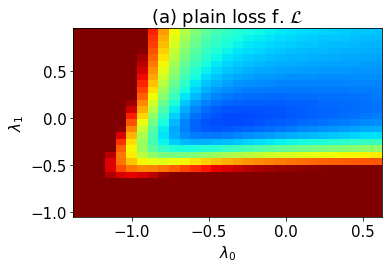

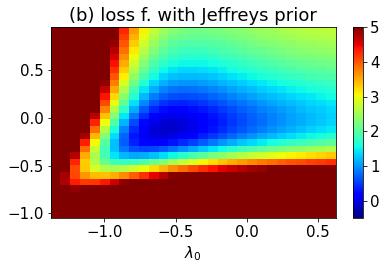

In [30]:
# matplotlib.rcParams['pcolor.shading']
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15
plt.rcParams.update({'figure.autolayout': True})

# vmin = np.min(grid_vals_J)
# # vmax = np.max(grid_vals_J)
# vmax = vmin + 8

vmin = -0.5
vmax = 5.

plt.figure(figsize=(5.65, 4))
plt.pcolormesh(x, y, grid_vals_noJ - vmin, cmap='jet', vmin=vmin, vmax=vmax)
# plt.colorbar()
plt.xlabel('$\lambda_0$')
plt.ylabel('$\lambda_1$')
plt.title('(a) plain loss f. $\mathcal{L}$')
# plt.savefig('Manuscript_images/ex2_plain_loss.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.pcolormesh(x, y, grid_vals_J - vmin, cmap='jet', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.xlabel('$\lambda_0$')
# plt.ylabel('$\lambda_1$')
plt.title('(b) loss f. with Jeffreys prior')
# plt.savefig('Manuscript_images/ex2_Jeffreys_loss.pdf', format='pdf', bbox_inches='tight')

print(np.min(grid_vals_noJ), np.max(grid_vals_noJ))

In [21]:
from Functions.basic_functions_gaussian import numerical_props

In [22]:
n_frames = len(data.mol['AAAA'].weights)
g = data.mol['AAAA'].g['backbone1_gamma_3J']
g_sigma_exp = data.mol['AAAA'].gexp['backbone1_gamma_3J']

num_props = numerical_props(n_frames, g, g_sigma_exp[:, 0], g_sigma_exp[:, 1], alpha)

num_props

           dV: 3.845118038349834
            g: Array([[ 0.62440122, -0.40421105,  0.58394389, ..., -0.47464967,
                       -0.37057335,  0.76496677],
                      [-0.88238029, -0.29072264, -0.77571999, ...,  0.38617277,
                        0.36000703, -0.5193996 ]], dtype=float64)
     lim_chi2: Array(1.94636246, dtype=float64)
      lim_dkl: Array(5.89649419, dtype=float64)
        lim_g: Array([ 0.35258047, -0.96526679], dtype=float64)
 lim_loss_num: 3.921428325466243
        lim_p: Array([4.74903234e-020, 1.99687629e-146, 3.98191141e-043, ...,
                      2.96752012e-293, 8.75835590e-288, 3.79467642e-099], dtype=float64)
      min_avg: array([ 0.61624507, -0.0740469 ])
   min_lambda: array([-0.3777788, -0.051255 ])
     min_loss: 0.07631028711640933
         mini:   message: Optimization terminated successfully.
                 success: True
                  status: 0
                     fun: 0.07631028711640933
                       x: [-3.7

In [23]:
print(num_props.dV)

3.845118038349834


#### sampling

- start sampling from the point of minimum

In [24]:
out = minimizer(data, alpha=1)

vars(out)

References for MDRefine package:
I. Gilardoni, V. Piomponi, T. Fröhlking, and G. Bussi, “MDRefine: a Python package for refining Molecular Dynamics trajectories with experimental data”, arxiv (2024)

References for Ensemble Refinement:
J. W. Pitera and J. D. Chodera, “On the use of experimental observations to bias simulated ensembles”, J. Chem. Theory Comp. 8, 3445–3451 (2012).

G. Hummer and J. Köfinger, “Bayesian ensemble refinement by replica simulations and reweighting”, J. Chem. Phys. 143, 243150 (2015).

A. Cesari, A. Gil-Ley, and G. Bussi, “Combining simulations and solution experiments as a paradigm for RNA force field refinement”, J. Chem. Theory Comp. 12, 6192–6200 (2016).

A. Cesari, S. Reißer, and G. Bussi, “Using the maximum entropy principle to combine simulations and solution experiments”, Computation 6, 15 (2018).

J. Köfinger, L. S. Stelzl, K. Reuter, C. Allande, K. Reichel, and G. Hummer, “Efficient ensemble refinement by reweighting”, J. Chem. Theory Comput. 15, 339

{'loss': Array(0.13515526, dtype=float64),
 'min_lambdas': {'AAAA': {'backbone1_gamma_3J': Array([-0.34266082, -0.03500603], dtype=float64)}},
 'minis': {'AAAA':   message: Optimization terminated successfully.
    success: True
     status: 0
        fun: -0.1351552580797724
          x: [-3.427e-01 -3.501e-02]
        nit: 4
        jac: [-3.021e-04  3.079e-04]
   hess_inv: [[ 3.846e-01  1.745e-02]
              [ 1.745e-02  8.193e-01]]
       nfev: 6
       njev: 6},
 'time': 0.053487539291381836,
 'D_KL_alpha': {'AAAA': Array(0.10368261, dtype=float64)},
 'abs_difference': {'AAAA': Array(1.97918644e-07, dtype=float64)},
 'av_g': {'AAAA': {'backbone1_gamma_3J': Array([ 0.53454663, -0.07831135], dtype=float64)}},
 'chi2': {'AAAA': {'backbone1_gamma_3J': Array(0.06294569, dtype=float64)}},
 'logZ_new': {'AAAA': Array(0.07674421, dtype=float64)},
 'weights_new': {'AAAA': Array([1.09359221e-04, 7.84831950e-05, 1.08257070e-04, ...,
         7.84485810e-05, 8.12223382e-05, 1.16223015e-04]

In [25]:
def flat_lambda(lambdas):

    flatten_lambda = []
    for name_mol in data.properties.system_names:
        flatten_lambda = flatten_lambda + list(
            np.hstack([lambdas[name_mol][k] for k in data.mol[name_mol].n_experiments.keys()]))

    flatten_lambda = np.array(flatten_lambda)

    return flatten_lambda

x_min = flat_lambda(out.min_lambdas)

print(x_min)

[-0.34266082 -0.03500603]


In [26]:
def proposal(x0, dx=0.01):
    x_new = x0 + dx*np.random.normal(size=len(x0))
    return x_new

proposal_move = lambda x : proposal(x, 0.2)

def energy_fun(lambdas, if_Jeffreys):
    
    out = loss_function(np.zeros(2), data, regularization=None, alpha=1, fixed_lambdas=lambdas, if_save=True)
    
    """ vars(out).keys() = ['loss', 'loss_explicit', 'D_KL_alpha', 'abs_difference', 'av_g', 'chi2',
            'logZ_new', 'weights_new'] """
    
    energy = out.loss_explicit

    # quantities = 

    av_g = unwrap_2dict(out.av_g)[0]

    if if_Jeffreys:
        name_mol = list(out.weights_new.keys())[0]
        measure, cov = local_density(data.mol[name_mol].g, out.weights_new[name_mol])
        energy -= np.log(measure)
    
    return energy, av_g

In [27]:
x0 = x_min
# x0 = .5*np.ones(2)

In [28]:
energy_function = lambda x : energy_fun(x, False)
sampling_noJ = run_Metropolis(x0, proposal_move, energy_function, n_steps=int(2e4))

  0%|          | 6/20000 [00:00<06:11, 53.86it/s]

0


  0%|          | 22/20000 [00:00<04:37, 72.03it/s]

  0%|          | 37/20000 [00:00<05:09, 64.42it/s]

  0%|          | 53/20000 [00:00<04:39, 71.46it/s]

  0%|          | 61/20000 [00:00<04:47, 69.33it/s]

  0%|          | 68/20000 [00:01<04:59, 66.65it/s]

  0%|          | 75/20000 [00:01<05:17, 62.69it/s]

  0%|          | 82/20000 [00:01<05:14, 63.34it/s]

  0%|          | 89/20000 [00:01<05:09, 64.25it/s]

  0%|          | 97/20000 [00:01<04:52, 68.10it/s]

  1%|          | 105/20000 [00:01<04:45, 69.79it/s]

100


  1%|          | 120/20000 [00:01<04:51, 68.15it/s]

  1%|          | 134/20000 [00:02<05:09, 64.22it/s]

  1%|          | 148/20000 [00:02<05:27, 60.71it/s]

  1%|          | 155/20000 [00:02<05:27, 60.63it/s]

  1%|          | 162/20000 [00:02<05:30, 60.02it/s]

  1%|          | 169/20000 [00:02<05:26, 60.67it/s]

  1%|          | 183/20000 [00:02<05:22, 61.45it/s]

  1%|          | 197/20000 [00:03<05:20, 61.86it/s]

200


  1%|          | 211/20000 [00:03<05:09, 64.00it/s]

  1%|          | 225/20000 [00:03<05:02, 65.34it/s]

  1%|          | 239/20000 [00:03<04:58, 66.11it/s]

  1%|▏         | 253/20000 [00:03<05:00, 65.71it/s]

  1%|▏         | 267/20000 [00:04<05:00, 65.58it/s]

  1%|▏         | 282/20000 [00:04<05:00, 65.59it/s]

  1%|▏         | 296/20000 [00:04<05:07, 64.11it/s]

  2%|▏         | 311/20000 [00:04<04:47, 68.48it/s]

300


  2%|▏         | 318/20000 [00:04<05:08, 63.78it/s]

  2%|▏         | 326/20000 [00:05<04:53, 67.06it/s]

  2%|▏         | 336/20000 [00:05<04:19, 75.87it/s]

  2%|▏         | 353/20000 [00:05<04:30, 72.59it/s]

  2%|▏         | 369/20000 [00:05<04:31, 72.28it/s]

  2%|▏         | 384/20000 [00:05<04:43, 69.18it/s]

  2%|▏         | 399/20000 [00:06<04:43, 69.06it/s]

400


  2%|▏         | 413/20000 [00:06<04:50, 67.34it/s]

  2%|▏         | 420/20000 [00:06<04:59, 65.32it/s]

  2%|▏         | 441/20000 [00:06<04:56, 65.91it/s]

  2%|▏         | 448/20000 [00:06<04:51, 67.07it/s]

  2%|▏         | 462/20000 [00:07<05:10, 62.97it/s]

  2%|▏         | 476/20000 [00:07<05:03, 64.39it/s]

  2%|▏         | 492/20000 [00:07<04:41, 69.28it/s]

  3%|▎         | 508/20000 [00:07<04:30, 72.18it/s]

500


  3%|▎         | 524/20000 [00:07<04:46, 67.94it/s]

  3%|▎         | 540/20000 [00:08<04:36, 70.36it/s]

  3%|▎         | 555/20000 [00:08<04:45, 67.99it/s]

  3%|▎         | 562/20000 [00:08<04:45, 68.18it/s]

  3%|▎         | 578/20000 [00:08<04:33, 71.06it/s]

  3%|▎         | 594/20000 [00:08<04:24, 73.40it/s]

600


  3%|▎         | 610/20000 [00:09<04:25, 72.92it/s]

  3%|▎         | 626/20000 [00:09<04:50, 66.76it/s]

  3%|▎         | 642/20000 [00:09<04:31, 71.30it/s]

  3%|▎         | 658/20000 [00:09<04:33, 70.84it/s]

  3%|▎         | 675/20000 [00:10<04:20, 74.23it/s]

  3%|▎         | 692/20000 [00:10<04:05, 78.58it/s]

  4%|▎         | 708/20000 [00:10<04:10, 77.03it/s]

700


  4%|▎         | 725/20000 [00:10<04:03, 79.27it/s]

  4%|▎         | 743/20000 [00:10<03:57, 81.04it/s]

  4%|▍         | 760/20000 [00:11<04:02, 79.32it/s]

  4%|▍         | 768/20000 [00:11<04:06, 78.11it/s]

  4%|▍         | 785/20000 [00:11<04:14, 75.59it/s]

  4%|▍         | 801/20000 [00:11<04:28, 71.62it/s]

800


  4%|▍         | 816/20000 [00:11<04:37, 69.19it/s]

  4%|▍         | 832/20000 [00:12<04:29, 71.20it/s]

  4%|▍         | 849/20000 [00:12<04:12, 75.80it/s]

  4%|▍         | 866/20000 [00:12<04:09, 76.60it/s]

  4%|▍         | 875/20000 [00:12<04:03, 78.58it/s]

  4%|▍         | 893/20000 [00:12<04:06, 77.52it/s]

  5%|▍         | 909/20000 [00:13<04:31, 70.22it/s]

900


  5%|▍         | 925/20000 [00:13<04:31, 70.15it/s]

  5%|▍         | 933/20000 [00:13<04:39, 68.14it/s]

  5%|▍         | 949/20000 [00:13<04:23, 72.19it/s]

  5%|▍         | 967/20000 [00:13<04:06, 77.10it/s]

  5%|▍         | 983/20000 [00:14<04:03, 77.95it/s]

  5%|▍         | 999/20000 [00:14<04:21, 72.78it/s]

1000


  5%|▌         | 1015/20000 [00:14<04:34, 69.09it/s]

  5%|▌         | 1029/20000 [00:14<04:38, 68.13it/s]

  5%|▌         | 1045/20000 [00:15<04:29, 70.43it/s]

  5%|▌         | 1062/20000 [00:15<04:15, 74.09it/s]

  5%|▌         | 1079/20000 [00:15<04:10, 75.53it/s]

  5%|▌         | 1096/20000 [00:15<04:02, 77.82it/s]

  6%|▌         | 1104/20000 [00:15<04:06, 76.73it/s]

1100


  6%|▌         | 1120/20000 [00:15<04:14, 74.31it/s]

  6%|▌         | 1136/20000 [00:16<04:06, 76.65it/s]

  6%|▌         | 1152/20000 [00:16<04:31, 69.30it/s]

  6%|▌         | 1169/20000 [00:16<04:13, 74.16it/s]

  6%|▌         | 1184/20000 [00:16<04:48, 65.27it/s]

  6%|▌         | 1191/20000 [00:17<05:00, 62.50it/s]

  6%|▌         | 1207/20000 [00:17<04:36, 67.98it/s]

1200


  6%|▌         | 1223/20000 [00:17<04:20, 72.12it/s]

  6%|▌         | 1240/20000 [00:17<04:04, 76.60it/s]

  6%|▋         | 1256/20000 [00:17<04:11, 74.65it/s]

  6%|▋         | 1273/20000 [00:18<04:01, 77.50it/s]

  6%|▋         | 1289/20000 [00:18<04:34, 68.25it/s]

  6%|▋         | 1296/20000 [00:18<04:44, 65.71it/s]

1300


  7%|▋         | 1312/20000 [00:18<04:30, 69.14it/s]

  7%|▋         | 1335/20000 [00:19<04:19, 72.01it/s]

  7%|▋         | 1343/20000 [00:19<04:16, 72.65it/s]

  7%|▋         | 1359/20000 [00:19<04:19, 71.97it/s]

  7%|▋         | 1375/20000 [00:19<04:23, 70.65it/s]

  7%|▋         | 1391/20000 [00:19<04:24, 70.22it/s]

  7%|▋         | 1407/20000 [00:20<04:35, 67.45it/s]

1400


  7%|▋         | 1414/20000 [00:20<04:34, 67.75it/s]

  7%|▋         | 1428/20000 [00:20<04:41, 65.98it/s]

  7%|▋         | 1442/20000 [00:20<04:49, 64.13it/s]

  7%|▋         | 1456/20000 [00:20<05:10, 59.71it/s]

  7%|▋         | 1470/20000 [00:21<05:05, 60.75it/s]

  7%|▋         | 1484/20000 [00:21<04:57, 62.23it/s]

  7%|▋         | 1491/20000 [00:21<04:51, 63.41it/s]

  8%|▊         | 1506/20000 [00:21<04:46, 64.65it/s]

1500


  8%|▊         | 1522/20000 [00:21<04:29, 68.58it/s]

  8%|▊         | 1538/20000 [00:22<04:24, 69.71it/s]

  8%|▊         | 1554/20000 [00:22<04:12, 73.10it/s]

  8%|▊         | 1570/20000 [00:22<04:17, 71.51it/s]

  8%|▊         | 1586/20000 [00:22<04:12, 72.93it/s]

  8%|▊         | 1602/20000 [00:22<04:09, 73.62it/s]

1600


  8%|▊         | 1618/20000 [00:23<04:18, 71.08it/s]

  8%|▊         | 1634/20000 [00:23<04:16, 71.68it/s]

  8%|▊         | 1642/20000 [00:23<04:15, 71.83it/s]

  8%|▊         | 1657/20000 [00:23<04:49, 63.30it/s]

  8%|▊         | 1671/20000 [00:24<04:45, 64.17it/s]

  8%|▊         | 1686/20000 [00:24<04:30, 67.64it/s]

  8%|▊         | 1700/20000 [00:24<04:55, 62.02it/s]

  9%|▊         | 1707/20000 [00:24<04:57, 61.55it/s]

1700


  9%|▊         | 1722/20000 [00:24<04:49, 63.03it/s]

  9%|▊         | 1738/20000 [00:25<04:27, 68.38it/s]

  9%|▉         | 1752/20000 [00:25<04:35, 66.34it/s]

  9%|▉         | 1767/20000 [00:25<04:28, 67.96it/s]

  9%|▉         | 1784/20000 [00:25<04:08, 73.19it/s]

  9%|▉         | 1800/20000 [00:25<04:03, 74.67it/s]

1800


  9%|▉         | 1816/20000 [00:26<04:25, 68.41it/s]

  9%|▉         | 1830/20000 [00:26<04:32, 66.67it/s]

  9%|▉         | 1845/20000 [00:26<04:29, 67.29it/s]

  9%|▉         | 1852/20000 [00:26<04:31, 66.89it/s]

  9%|▉         | 1869/20000 [00:26<04:15, 70.95it/s]

  9%|▉         | 1885/20000 [00:27<04:11, 71.96it/s]

 10%|▉         | 1901/20000 [00:27<04:04, 73.89it/s]

1900


 10%|▉         | 1917/20000 [00:27<04:00, 75.09it/s]

 10%|▉         | 1933/20000 [00:27<04:06, 73.18it/s]

 10%|▉         | 1949/20000 [00:28<04:08, 72.50it/s]

 10%|▉         | 1964/20000 [00:28<04:29, 66.89it/s]

 10%|▉         | 1978/20000 [00:28<04:29, 66.87it/s]

 10%|▉         | 1985/20000 [00:28<04:33, 65.81it/s]

 10%|█         | 2000/20000 [00:28<04:35, 65.37it/s]

2000


 10%|█         | 2023/20000 [00:29<04:12, 71.13it/s]

 10%|█         | 2031/20000 [00:29<04:08, 72.34it/s]

 10%|█         | 2047/20000 [00:29<04:17, 69.75it/s]

 10%|█         | 2063/20000 [00:29<04:15, 70.11it/s]

 10%|█         | 2079/20000 [00:29<04:12, 71.03it/s]

 10%|█         | 2095/20000 [00:30<04:09, 71.65it/s]

 11%|█         | 2111/20000 [00:30<04:04, 73.08it/s]

2100


 11%|█         | 2119/20000 [00:30<04:16, 69.67it/s]

 11%|█         | 2134/20000 [00:30<04:30, 65.97it/s]

 11%|█         | 2151/20000 [00:30<04:07, 72.17it/s]

 11%|█         | 2167/20000 [00:31<04:05, 72.51it/s]

 11%|█         | 2183/20000 [00:31<04:09, 71.41it/s]

 11%|█         | 2200/20000 [00:31<04:03, 73.00it/s]

2200


 11%|█         | 2216/20000 [00:31<03:59, 74.18it/s]

 11%|█         | 2224/20000 [00:31<04:12, 70.40it/s]

 11%|█         | 2240/20000 [00:32<04:23, 67.41it/s]

 11%|█▏        | 2256/20000 [00:32<04:02, 73.19it/s]

 11%|█▏        | 2272/20000 [00:32<04:00, 73.71it/s]

 11%|█▏        | 2288/20000 [00:32<04:01, 73.19it/s]

 11%|█▏        | 2296/20000 [00:32<04:14, 69.53it/s]

2300


 12%|█▏        | 2319/20000 [00:33<04:15, 69.29it/s]

 12%|█▏        | 2327/20000 [00:33<04:12, 70.11it/s]

 12%|█▏        | 2342/20000 [00:33<04:44, 61.97it/s]

 12%|█▏        | 2358/20000 [00:33<04:18, 68.15it/s]

 12%|█▏        | 2374/20000 [00:34<04:11, 70.07it/s]

 12%|█▏        | 2390/20000 [00:34<04:12, 69.76it/s]

 12%|█▏        | 2398/20000 [00:34<04:07, 71.18it/s]

2400


 12%|█▏        | 2414/20000 [00:34<04:04, 72.02it/s]

 12%|█▏        | 2430/20000 [00:34<03:59, 73.29it/s]

 12%|█▏        | 2446/20000 [00:35<04:07, 71.02it/s]

 12%|█▏        | 2462/20000 [00:35<04:10, 70.03it/s]

 12%|█▏        | 2470/20000 [00:35<04:24, 66.31it/s]

 12%|█▏        | 2485/20000 [00:35<04:18, 67.76it/s]

 13%|█▎        | 2501/20000 [00:35<04:14, 68.84it/s]

2500


 13%|█▎        | 2517/20000 [00:36<04:03, 71.77it/s]

 13%|█▎        | 2532/20000 [00:36<04:11, 69.37it/s]

 13%|█▎        | 2546/20000 [00:36<04:22, 66.43it/s]

 13%|█▎        | 2562/20000 [00:36<04:08, 70.29it/s]

 13%|█▎        | 2578/20000 [00:37<03:59, 72.76it/s]

 13%|█▎        | 2594/20000 [00:37<03:57, 73.17it/s]

 13%|█▎        | 2602/20000 [00:37<03:55, 73.97it/s]

2600


 13%|█▎        | 2618/20000 [00:37<04:01, 71.90it/s]

 13%|█▎        | 2634/20000 [00:37<03:57, 73.05it/s]

 13%|█▎        | 2650/20000 [00:38<04:05, 70.63it/s]

 13%|█▎        | 2665/20000 [00:38<04:16, 67.66it/s]

 13%|█▎        | 2680/20000 [00:38<04:17, 67.30it/s]

 13%|█▎        | 2696/20000 [00:38<04:11, 68.85it/s]

 14%|█▎        | 2710/20000 [00:38<04:23, 65.65it/s]

2700


 14%|█▎        | 2717/20000 [00:39<04:23, 65.71it/s]

 14%|█▎        | 2732/20000 [00:39<04:19, 66.43it/s]

 14%|█▎        | 2748/20000 [00:39<04:03, 70.97it/s]

 14%|█▍        | 2764/20000 [00:39<03:56, 72.82it/s]

 14%|█▍        | 2780/20000 [00:39<04:07, 69.51it/s]

 14%|█▍        | 2795/20000 [00:40<04:06, 69.75it/s]

 14%|█▍        | 2811/20000 [00:40<03:55, 73.12it/s]

2800


 14%|█▍        | 2827/20000 [00:40<03:50, 74.40it/s]

 14%|█▍        | 2835/20000 [00:40<03:54, 73.26it/s]

 14%|█▍        | 2851/20000 [00:41<04:15, 67.17it/s]

 14%|█▍        | 2866/20000 [00:41<04:13, 67.51it/s]

 14%|█▍        | 2880/20000 [00:41<04:23, 65.05it/s]

 14%|█▍        | 2895/20000 [00:41<04:08, 68.79it/s]

 15%|█▍        | 2909/20000 [00:41<04:17, 66.40it/s]

2900


 15%|█▍        | 2924/20000 [00:42<04:02, 70.48it/s]

 15%|█▍        | 2940/20000 [00:42<04:13, 67.17it/s]

 15%|█▍        | 2954/20000 [00:42<04:10, 67.97it/s]

 15%|█▍        | 2969/20000 [00:42<04:13, 67.22it/s]

 15%|█▍        | 2984/20000 [00:42<04:03, 69.80it/s]

 15%|█▌        | 3002/20000 [00:43<03:41, 76.86it/s]

3000


 15%|█▌        | 3018/20000 [00:43<03:45, 75.26it/s]

 15%|█▌        | 3026/20000 [00:43<03:46, 74.96it/s]

 15%|█▌        | 3042/20000 [00:43<03:42, 76.29it/s]

 15%|█▌        | 3058/20000 [00:43<03:53, 72.47it/s]

 15%|█▌        | 3075/20000 [00:44<03:50, 73.47it/s]

 15%|█▌        | 3092/20000 [00:44<03:40, 76.54it/s]

 16%|█▌        | 3108/20000 [00:44<03:47, 74.31it/s]

3100


 16%|█▌        | 3124/20000 [00:44<03:51, 73.03it/s]

 16%|█▌        | 3140/20000 [00:45<03:48, 73.71it/s]

 16%|█▌        | 3156/20000 [00:45<03:41, 76.07it/s]

 16%|█▌        | 3173/20000 [00:45<03:33, 78.73it/s]

 16%|█▌        | 3181/20000 [00:45<03:37, 77.42it/s]

 16%|█▌        | 3198/20000 [00:45<03:47, 73.82it/s]

3200


 16%|█▌        | 3214/20000 [00:46<04:05, 68.45it/s]

 16%|█▌        | 3228/20000 [00:46<04:13, 66.20it/s]

 16%|█▌        | 3242/20000 [00:46<04:41, 59.63it/s]

 16%|█▌        | 3249/20000 [00:46<04:31, 61.65it/s]

 16%|█▋        | 3271/20000 [00:46<04:10, 66.75it/s]

 16%|█▋        | 3278/20000 [00:47<04:09, 66.99it/s]

 16%|█▋        | 3293/20000 [00:47<04:04, 68.20it/s]

 17%|█▋        | 3309/20000 [00:47<03:57, 70.38it/s]

3300


 17%|█▋        | 3325/20000 [00:47<04:06, 67.53it/s]

 17%|█▋        | 3340/20000 [00:47<03:56, 70.30it/s]

 17%|█▋        | 3356/20000 [00:48<03:56, 70.43it/s]

 17%|█▋        | 3372/20000 [00:48<03:47, 73.04it/s]

 17%|█▋        | 3388/20000 [00:48<03:58, 69.53it/s]

 17%|█▋        | 3402/20000 [00:48<04:02, 68.50it/s]

3400


 17%|█▋        | 3409/20000 [00:48<04:07, 67.14it/s]

 17%|█▋        | 3423/20000 [00:49<04:16, 64.52it/s]

 17%|█▋        | 3445/20000 [00:49<04:08, 66.50it/s]

 17%|█▋        | 3453/20000 [00:49<04:02, 68.17it/s]

 17%|█▋        | 3469/20000 [00:49<04:13, 65.22it/s]

 17%|█▋        | 3483/20000 [00:50<04:24, 62.48it/s]

 17%|█▋        | 3499/20000 [00:50<03:57, 69.51it/s]

 18%|█▊        | 3515/20000 [00:50<03:55, 69.95it/s]

3500


 18%|█▊        | 3523/20000 [00:50<04:04, 67.31it/s]

 18%|█▊        | 3538/20000 [00:50<04:03, 67.67it/s]

 18%|█▊        | 3553/20000 [00:51<03:53, 70.46it/s]

 18%|█▊        | 3569/20000 [00:51<03:50, 71.32it/s]

 18%|█▊        | 3585/20000 [00:51<03:59, 68.63it/s]

 18%|█▊        | 3600/20000 [00:51<03:53, 70.25it/s]

3600


 18%|█▊        | 3615/20000 [00:51<04:08, 66.01it/s]

 18%|█▊        | 3630/20000 [00:52<04:01, 67.74it/s]

 18%|█▊        | 3645/20000 [00:52<03:56, 69.18it/s]

 18%|█▊        | 3660/20000 [00:52<03:49, 71.10it/s]

 18%|█▊        | 3668/20000 [00:52<03:48, 71.35it/s]

 18%|█▊        | 3692/20000 [00:53<03:38, 74.68it/s]

 18%|█▊        | 3700/20000 [00:53<03:48, 71.32it/s]

3700


 19%|█▊        | 3716/20000 [00:53<03:47, 71.66it/s]

 19%|█▊        | 3732/20000 [00:53<03:42, 72.95it/s]

 19%|█▊        | 3748/20000 [00:53<03:44, 72.40it/s]

 19%|█▉        | 3764/20000 [00:54<03:39, 73.94it/s]

 19%|█▉        | 3781/20000 [00:54<03:31, 76.71it/s]

 19%|█▉        | 3797/20000 [00:54<03:50, 70.43it/s]

 19%|█▉        | 3805/20000 [00:54<04:03, 66.60it/s]

3800


 19%|█▉        | 3821/20000 [00:54<03:51, 69.88it/s]

 19%|█▉        | 3837/20000 [00:55<03:43, 72.43it/s]

 19%|█▉        | 3853/20000 [00:55<03:41, 72.83it/s]

 19%|█▉        | 3869/20000 [00:55<03:51, 69.82it/s]

 19%|█▉        | 3877/20000 [00:55<03:49, 70.27it/s]

 19%|█▉        | 3892/20000 [00:55<04:10, 64.18it/s]

 20%|█▉        | 3906/20000 [00:56<04:26, 60.32it/s]

3900


 20%|█▉        | 3920/20000 [00:56<04:11, 63.93it/s]

 20%|█▉        | 3936/20000 [00:56<03:51, 69.29it/s]

 20%|█▉        | 3944/20000 [00:56<04:01, 66.48it/s]

 20%|█▉        | 3958/20000 [00:56<04:07, 64.87it/s]

 20%|█▉        | 3972/20000 [00:57<04:17, 62.18it/s]

 20%|█▉        | 3987/20000 [00:57<04:05, 65.26it/s]

 20%|█▉        | 3994/20000 [00:57<04:07, 64.54it/s]

 20%|██        | 4008/20000 [00:57<04:34, 58.35it/s]

4000


 20%|██        | 4022/20000 [00:58<04:33, 58.36it/s]

 20%|██        | 4034/20000 [00:58<04:39, 57.20it/s]

 20%|██        | 4048/20000 [00:58<04:21, 60.95it/s]

 20%|██        | 4062/20000 [00:58<04:12, 63.10it/s]

 20%|██        | 4069/20000 [00:58<04:15, 62.28it/s]

 20%|██        | 4085/20000 [00:58<03:54, 67.88it/s]

 21%|██        | 4101/20000 [00:59<03:45, 70.51it/s]

4100


 21%|██        | 4117/20000 [00:59<03:37, 73.00it/s]

 21%|██        | 4133/20000 [00:59<03:35, 73.49it/s]

 21%|██        | 4159/20000 [00:59<03:19, 79.32it/s]

 21%|██        | 4168/20000 [01:00<03:17, 80.17it/s]

 21%|██        | 4186/20000 [01:00<03:22, 78.07it/s]

 21%|██        | 4203/20000 [01:00<03:25, 76.86it/s]

4200


 21%|██        | 4219/20000 [01:00<03:50, 68.46it/s]

 21%|██        | 4226/20000 [01:00<04:02, 65.15it/s]

 21%|██        | 4240/20000 [01:01<04:12, 62.43it/s]

 21%|██▏       | 4254/20000 [01:01<04:18, 60.91it/s]

 21%|██▏       | 4269/20000 [01:01<04:00, 65.33it/s]

 21%|██▏       | 4283/20000 [01:01<03:54, 67.06it/s]

 22%|██▏       | 4300/20000 [01:02<03:43, 70.14it/s]

 22%|██▏       | 4308/20000 [01:02<03:54, 66.89it/s]

4300


 22%|██▏       | 4325/20000 [01:02<03:37, 71.99it/s]

 22%|██▏       | 4341/20000 [01:02<03:42, 70.36it/s]

 22%|██▏       | 4357/20000 [01:02<03:42, 70.28it/s]

 22%|██▏       | 4373/20000 [01:03<03:42, 70.15it/s]

 22%|██▏       | 4388/20000 [01:03<03:53, 66.86it/s]

 22%|██▏       | 4395/20000 [01:03<04:02, 64.43it/s]

 22%|██▏       | 4410/20000 [01:03<03:52, 66.92it/s]

4400


 22%|██▏       | 4425/20000 [01:03<03:50, 67.61it/s]

 22%|██▏       | 4439/20000 [01:04<03:57, 65.43it/s]

 22%|██▏       | 4455/20000 [01:04<03:49, 67.86it/s]

 22%|██▏       | 4469/20000 [01:04<04:02, 63.94it/s]

 22%|██▏       | 4476/20000 [01:04<04:22, 59.16it/s]

 22%|██▏       | 4490/20000 [01:04<04:25, 58.33it/s]

 23%|██▎       | 4503/20000 [01:05<04:15, 60.61it/s]

4500


 23%|██▎       | 4518/20000 [01:05<03:59, 64.63it/s]

 23%|██▎       | 4532/20000 [01:05<03:56, 65.54it/s]

 23%|██▎       | 4546/20000 [01:05<04:00, 64.21it/s]

 23%|██▎       | 4561/20000 [01:06<03:59, 64.54it/s]

 23%|██▎       | 4568/20000 [01:06<04:04, 63.08it/s]

 23%|██▎       | 4582/20000 [01:06<04:15, 60.33it/s]

 23%|██▎       | 4597/20000 [01:06<03:56, 65.05it/s]

4600


 23%|██▎       | 4613/20000 [01:06<03:42, 69.01it/s]

 23%|██▎       | 4627/20000 [01:07<03:44, 68.60it/s]

 23%|██▎       | 4642/20000 [01:07<03:39, 70.02it/s]

 23%|██▎       | 4658/20000 [01:07<03:28, 73.43it/s]

 23%|██▎       | 4674/20000 [01:07<03:32, 72.10it/s]

 23%|██▎       | 4682/20000 [01:07<03:40, 69.62it/s]

 24%|██▎       | 4700/20000 [01:08<03:23, 75.08it/s]

4700


 24%|██▎       | 4716/20000 [01:08<03:35, 70.83it/s]

 24%|██▎       | 4732/20000 [01:08<03:39, 69.50it/s]

 24%|██▎       | 4748/20000 [01:08<03:34, 71.11it/s]

 24%|██▍       | 4765/20000 [01:08<03:25, 74.07it/s]

 24%|██▍       | 4773/20000 [01:09<03:32, 71.77it/s]

 24%|██▍       | 4789/20000 [01:09<03:36, 70.11it/s]

 24%|██▍       | 4806/20000 [01:09<03:22, 75.18it/s]

4800


 24%|██▍       | 4822/20000 [01:09<03:23, 74.59it/s]

 24%|██▍       | 4838/20000 [01:09<03:18, 76.40it/s]

 24%|██▍       | 4854/20000 [01:10<03:16, 77.16it/s]

 24%|██▍       | 4871/20000 [01:10<03:16, 76.92it/s]

 24%|██▍       | 4887/20000 [01:10<03:32, 71.26it/s]

 25%|██▍       | 4903/20000 [01:10<03:27, 72.67it/s]

4900


 25%|██▍       | 4911/20000 [01:10<03:45, 66.80it/s]

 25%|██▍       | 4927/20000 [01:11<03:37, 69.29it/s]

 25%|██▍       | 4943/20000 [01:11<03:38, 68.80it/s]

 25%|██▍       | 4959/20000 [01:11<03:26, 72.74it/s]

 25%|██▍       | 4975/20000 [01:11<03:20, 74.86it/s]

 25%|██▍       | 4991/20000 [01:12<03:37, 69.16it/s]

 25%|██▌       | 5007/20000 [01:12<03:38, 68.56it/s]

5000


 25%|██▌       | 5022/20000 [01:12<03:31, 70.70it/s]

 25%|██▌       | 5030/20000 [01:12<03:35, 69.34it/s]

 25%|██▌       | 5046/20000 [01:12<03:27, 72.20it/s]

 25%|██▌       | 5062/20000 [01:13<03:29, 71.27it/s]

 25%|██▌       | 5078/20000 [01:13<03:31, 70.44it/s]

 25%|██▌       | 5094/20000 [01:13<03:28, 71.51it/s]

 26%|██▌       | 5110/20000 [01:13<03:26, 72.16it/s]

5100


 26%|██▌       | 5126/20000 [01:13<03:22, 73.61it/s]

 26%|██▌       | 5142/20000 [01:14<03:20, 74.11it/s]

 26%|██▌       | 5150/20000 [01:14<03:23, 72.82it/s]

 26%|██▌       | 5167/20000 [01:14<03:20, 74.00it/s]

 26%|██▌       | 5191/20000 [01:14<03:13, 76.57it/s]

 26%|██▌       | 5199/20000 [01:14<03:18, 74.58it/s]

5200


 26%|██▌       | 5215/20000 [01:15<03:30, 70.39it/s]

 26%|██▌       | 5231/20000 [01:15<03:34, 69.00it/s]

 26%|██▌       | 5245/20000 [01:15<03:38, 67.46it/s]

 26%|██▋       | 5259/20000 [01:15<03:36, 68.03it/s]

 26%|██▋       | 5274/20000 [01:16<03:38, 67.52it/s]

 26%|██▋       | 5290/20000 [01:16<03:33, 68.82it/s]

 27%|██▋       | 5306/20000 [01:16<03:28, 70.53it/s]

5300


 27%|██▋       | 5322/20000 [01:16<03:24, 71.83it/s]

 27%|██▋       | 5330/20000 [01:16<03:39, 66.89it/s]

 27%|██▋       | 5344/20000 [01:17<03:39, 66.91it/s]

 27%|██▋       | 5358/20000 [01:17<03:42, 65.67it/s]

 27%|██▋       | 5372/20000 [01:17<03:44, 65.11it/s]

 27%|██▋       | 5388/20000 [01:17<03:32, 68.75it/s]

 27%|██▋       | 5403/20000 [01:17<03:30, 69.22it/s]

5400


 27%|██▋       | 5419/20000 [01:18<03:20, 72.58it/s]

 27%|██▋       | 5435/20000 [01:18<03:19, 73.15it/s]

 27%|██▋       | 5453/20000 [01:18<03:02, 79.50it/s]

 27%|██▋       | 5469/20000 [01:18<03:25, 70.57it/s]

 27%|██▋       | 5485/20000 [01:19<03:17, 73.64it/s]

 27%|██▋       | 5493/20000 [01:19<03:21, 71.95it/s]

 28%|██▊       | 5509/20000 [01:19<03:27, 69.83it/s]

5500


 28%|██▊       | 5525/20000 [01:19<03:26, 69.93it/s]

 28%|██▊       | 5541/20000 [01:19<03:25, 70.49it/s]

 28%|██▊       | 5557/20000 [01:20<03:23, 70.85it/s]

 28%|██▊       | 5573/20000 [01:20<03:19, 72.47it/s]

 28%|██▊       | 5589/20000 [01:20<03:17, 72.97it/s]

 28%|██▊       | 5605/20000 [01:20<03:16, 73.15it/s]

5600


 28%|██▊       | 5621/20000 [01:20<03:14, 73.74it/s]

 28%|██▊       | 5629/20000 [01:21<03:33, 67.27it/s]

 28%|██▊       | 5645/20000 [01:21<03:27, 69.21it/s]

 28%|██▊       | 5659/20000 [01:21<03:31, 67.83it/s]

 28%|██▊       | 5673/20000 [01:21<03:37, 65.82it/s]

 28%|██▊       | 5688/20000 [01:21<03:28, 68.58it/s]

 29%|██▊       | 5704/20000 [01:22<03:18, 71.96it/s]

5700


 29%|██▊       | 5720/20000 [01:22<03:26, 69.06it/s]

 29%|██▊       | 5737/20000 [01:22<03:16, 72.50it/s]

 29%|██▉       | 5753/20000 [01:22<03:12, 74.00it/s]

 29%|██▉       | 5761/20000 [01:22<03:17, 72.15it/s]

 29%|██▉       | 5777/20000 [01:23<03:22, 70.24it/s]

 29%|██▉       | 5793/20000 [01:23<03:17, 71.95it/s]

 29%|██▉       | 5809/20000 [01:23<03:16, 72.40it/s]

5800


 29%|██▉       | 5825/20000 [01:23<03:17, 71.66it/s]

 29%|██▉       | 5841/20000 [01:24<03:17, 71.73it/s]

 29%|██▉       | 5857/20000 [01:24<03:15, 72.40it/s]

 29%|██▉       | 5873/20000 [01:24<03:12, 73.48it/s]

 29%|██▉       | 5890/20000 [01:24<03:04, 76.66it/s]

 30%|██▉       | 5906/20000 [01:24<03:17, 71.34it/s]

5900


 30%|██▉       | 5922/20000 [01:25<03:11, 73.56it/s]

 30%|██▉       | 5939/20000 [01:25<03:04, 76.22it/s]

 30%|██▉       | 5955/20000 [01:25<03:04, 75.94it/s]

 30%|██▉       | 5963/20000 [01:25<03:17, 71.08it/s]

 30%|██▉       | 5978/20000 [01:25<03:22, 69.08it/s]

 30%|██▉       | 5995/20000 [01:26<03:13, 72.39it/s]

 30%|███       | 6011/20000 [01:26<03:20, 69.71it/s]

6000


 30%|███       | 6025/20000 [01:26<03:27, 67.32it/s]

 30%|███       | 6041/20000 [01:26<03:19, 70.10it/s]

 30%|███       | 6049/20000 [01:26<03:13, 72.17it/s]

 30%|███       | 6065/20000 [01:27<03:20, 69.49it/s]

 30%|███       | 6079/20000 [01:27<03:24, 68.21it/s]

 30%|███       | 6095/20000 [01:27<03:10, 72.88it/s]

 31%|███       | 6111/20000 [01:27<03:08, 73.82it/s]

6100


 31%|███       | 6127/20000 [01:28<03:24, 67.83it/s]

 31%|███       | 6141/20000 [01:28<03:37, 63.63it/s]

 31%|███       | 6158/20000 [01:28<03:11, 72.35it/s]

 31%|███       | 6174/20000 [01:28<03:02, 75.73it/s]

 31%|███       | 6190/20000 [01:28<03:10, 72.58it/s]

 31%|███       | 6198/20000 [01:29<03:10, 72.44it/s]

6200


 31%|███       | 6214/20000 [01:29<03:11, 71.97it/s]

 31%|███       | 6230/20000 [01:29<03:13, 71.09it/s]

 31%|███       | 6246/20000 [01:29<03:13, 71.04it/s]

 31%|███▏      | 6264/20000 [01:29<02:57, 77.38it/s]

 31%|███▏      | 6281/20000 [01:30<02:56, 77.70it/s]

 31%|███▏      | 6297/20000 [01:30<03:14, 70.43it/s]

 32%|███▏      | 6313/20000 [01:30<03:09, 72.41it/s]

6300


 32%|███▏      | 6329/20000 [01:30<03:04, 74.16it/s]

 32%|███▏      | 6337/20000 [01:30<03:09, 72.13it/s]

 32%|███▏      | 6354/20000 [01:31<03:02, 74.75it/s]

 32%|███▏      | 6370/20000 [01:31<03:23, 66.85it/s]

 32%|███▏      | 6385/20000 [01:31<03:19, 68.09it/s]

 32%|███▏      | 6400/20000 [01:31<03:14, 69.98it/s]

6400


 32%|███▏      | 6416/20000 [01:32<03:13, 70.37it/s]

 32%|███▏      | 6432/20000 [01:32<03:08, 72.05it/s]

 32%|███▏      | 6448/20000 [01:32<03:07, 72.40it/s]

 32%|███▏      | 6456/20000 [01:32<03:05, 72.97it/s]

 32%|███▏      | 6472/20000 [01:32<03:10, 71.07it/s]

 32%|███▏      | 6488/20000 [01:33<03:03, 73.58it/s]

 33%|███▎      | 6504/20000 [01:33<03:08, 71.56it/s]

6500


 33%|███▎      | 6520/20000 [01:33<03:00, 74.80it/s]

 33%|███▎      | 6536/20000 [01:33<03:01, 74.20it/s]

 33%|███▎      | 6552/20000 [01:33<03:10, 70.68it/s]

 33%|███▎      | 6560/20000 [01:34<03:15, 68.71it/s]

 33%|███▎      | 6575/20000 [01:34<03:14, 69.02it/s]

 33%|███▎      | 6600/20000 [01:34<02:59, 74.77it/s]

 33%|███▎      | 6608/20000 [01:34<02:58, 74.98it/s]

6600


 33%|███▎      | 6624/20000 [01:34<03:00, 74.19it/s]

 33%|███▎      | 6640/20000 [01:35<03:07, 71.31it/s]

 33%|███▎      | 6656/20000 [01:35<03:06, 71.48it/s]

 33%|███▎      | 6672/20000 [01:35<03:00, 73.77it/s]

 33%|███▎      | 6688/20000 [01:35<03:10, 69.79it/s]

 33%|███▎      | 6696/20000 [01:35<03:08, 70.61it/s]

6700


 34%|███▎      | 6712/20000 [01:36<03:02, 72.88it/s]

 34%|███▎      | 6728/20000 [01:36<03:01, 73.09it/s]

 34%|███▎      | 6744/20000 [01:36<03:02, 72.57it/s]

 34%|███▍      | 6760/20000 [01:36<02:58, 73.99it/s]

 34%|███▍      | 6776/20000 [01:37<03:06, 70.93it/s]

 34%|███▍      | 6784/20000 [01:37<03:13, 68.34it/s]

 34%|███▍      | 6798/20000 [01:37<03:31, 62.36it/s]

6800


 34%|███▍      | 6813/20000 [01:37<03:14, 67.64it/s]

 34%|███▍      | 6830/20000 [01:37<02:57, 74.23it/s]

 34%|███▍      | 6846/20000 [01:38<03:13, 68.08it/s]

 34%|███▍      | 6860/20000 [01:38<03:21, 65.31it/s]

 34%|███▍      | 6875/20000 [01:38<03:07, 69.98it/s]

 34%|███▍      | 6883/20000 [01:38<03:05, 70.82it/s]

 34%|███▍      | 6899/20000 [01:38<03:01, 72.12it/s]

6900


 35%|███▍      | 6916/20000 [01:39<02:53, 75.40it/s]

 35%|███▍      | 6940/20000 [01:39<02:50, 76.65it/s]

 35%|███▍      | 6948/20000 [01:39<02:51, 76.19it/s]

 35%|███▍      | 6964/20000 [01:39<03:00, 72.37it/s]

 35%|███▍      | 6979/20000 [01:39<03:08, 69.19it/s]

 35%|███▍      | 6996/20000 [01:40<02:56, 73.51it/s]

 35%|███▌      | 7012/20000 [01:40<03:04, 70.27it/s]

7000


 35%|███▌      | 7028/20000 [01:40<03:01, 71.63it/s]

 35%|███▌      | 7044/20000 [01:40<03:06, 69.45it/s]

 35%|███▌      | 7051/20000 [01:40<03:08, 68.88it/s]

 35%|███▌      | 7067/20000 [01:41<03:01, 71.16it/s]

 35%|███▌      | 7083/20000 [01:41<03:04, 70.04it/s]

 35%|███▌      | 7098/20000 [01:41<03:07, 68.96it/s]

7100


 36%|███▌      | 7113/20000 [01:41<03:01, 70.92it/s]

 36%|███▌      | 7129/20000 [01:42<03:10, 67.64it/s]

 36%|███▌      | 7143/20000 [01:42<03:08, 68.37it/s]

 36%|███▌      | 7159/20000 [01:42<02:59, 71.45it/s]

 36%|███▌      | 7176/20000 [01:42<02:48, 76.08it/s]

 36%|███▌      | 7192/20000 [01:42<02:54, 73.41it/s]

 36%|███▌      | 7208/20000 [01:43<02:55, 72.71it/s]

7200


 36%|███▌      | 7216/20000 [01:43<02:55, 72.65it/s]

 36%|███▌      | 7234/20000 [01:43<02:43, 77.88it/s]

 36%|███▋      | 7250/20000 [01:43<02:45, 77.14it/s]

 36%|███▋      | 7267/20000 [01:43<02:47, 76.01it/s]

 36%|███▋      | 7283/20000 [01:44<02:53, 73.41it/s]

 36%|███▋      | 7299/20000 [01:44<03:05, 68.58it/s]

7300


 37%|███▋      | 7314/20000 [01:44<02:59, 70.61it/s]

 37%|███▋      | 7322/20000 [01:44<03:05, 68.18it/s]

 37%|███▋      | 7337/20000 [01:44<03:04, 68.46it/s]

 37%|███▋      | 7352/20000 [01:45<02:59, 70.28it/s]

 37%|███▋      | 7368/20000 [01:45<03:02, 69.16it/s]

 37%|███▋      | 7383/20000 [01:45<02:58, 70.58it/s]

 37%|███▋      | 7399/20000 [01:45<03:00, 70.00it/s]

7400


 37%|███▋      | 7415/20000 [01:46<02:52, 72.83it/s]

 37%|███▋      | 7423/20000 [01:46<02:57, 71.00it/s]

 37%|███▋      | 7438/20000 [01:46<03:10, 65.99it/s]

 37%|███▋      | 7453/20000 [01:46<03:12, 65.17it/s]

 37%|███▋      | 7468/20000 [01:46<03:08, 66.36it/s]

 37%|███▋      | 7483/20000 [01:47<03:14, 64.40it/s]

 37%|███▋      | 7497/20000 [01:47<03:17, 63.45it/s]

 38%|███▊      | 7513/20000 [01:47<03:06, 67.08it/s]

7500


 38%|███▊      | 7520/20000 [01:47<03:14, 64.03it/s]

 38%|███▊      | 7534/20000 [01:47<03:10, 65.47it/s]

 38%|███▊      | 7549/20000 [01:48<03:03, 67.89it/s]

 38%|███▊      | 7563/20000 [01:48<03:22, 61.30it/s]

 38%|███▊      | 7577/20000 [01:48<03:22, 61.40it/s]

 38%|███▊      | 7592/20000 [01:48<03:07, 66.34it/s]

 38%|███▊      | 7607/20000 [01:49<03:08, 65.66it/s]

7600


 38%|███▊      | 7621/20000 [01:49<03:13, 64.02it/s]

 38%|███▊      | 7628/20000 [01:49<03:10, 64.92it/s]

 38%|███▊      | 7643/20000 [01:49<03:14, 63.55it/s]

 38%|███▊      | 7658/20000 [01:49<03:10, 64.87it/s]

 38%|███▊      | 7673/20000 [01:50<02:58, 69.22it/s]

 38%|███▊      | 7690/20000 [01:50<02:52, 71.48it/s]

 39%|███▊      | 7706/20000 [01:50<02:49, 72.64it/s]

7700


 39%|███▊      | 7722/20000 [01:50<02:43, 75.00it/s]

 39%|███▊      | 7739/20000 [01:50<02:35, 79.08it/s]

 39%|███▉      | 7755/20000 [01:51<02:46, 73.55it/s]

 39%|███▉      | 7763/20000 [01:51<02:43, 74.68it/s]

 39%|███▉      | 7779/20000 [01:51<02:44, 74.17it/s]

 39%|███▉      | 7795/20000 [01:51<02:44, 74.35it/s]

7800


 39%|███▉      | 7812/20000 [01:51<02:44, 74.16it/s]

 39%|███▉      | 7828/20000 [01:52<02:49, 71.74it/s]

 39%|███▉      | 7836/20000 [01:52<02:49, 71.89it/s]

 39%|███▉      | 7851/20000 [01:52<03:05, 65.41it/s]

 39%|███▉      | 7865/20000 [01:52<03:24, 59.31it/s]

 39%|███▉      | 7878/20000 [01:52<03:21, 60.30it/s]

 39%|███▉      | 7895/20000 [01:53<02:57, 68.27it/s]

 40%|███▉      | 7909/20000 [01:53<02:56, 68.42it/s]

7900


 40%|███▉      | 7923/20000 [01:53<02:56, 68.29it/s]

 40%|███▉      | 7938/20000 [01:53<02:55, 68.79it/s]

 40%|███▉      | 7954/20000 [01:54<02:50, 70.83it/s]

 40%|███▉      | 7970/20000 [01:54<02:47, 71.81it/s]

 40%|███▉      | 7978/20000 [01:54<02:45, 72.79it/s]

 40%|███▉      | 7994/20000 [01:54<02:51, 70.21it/s]

 40%|████      | 8010/20000 [01:54<02:48, 71.21it/s]

8000


 40%|████      | 8026/20000 [01:55<02:46, 71.98it/s]

 40%|████      | 8042/20000 [01:55<02:41, 74.09it/s]

 40%|████      | 8058/20000 [01:55<02:40, 74.51it/s]

 40%|████      | 8074/20000 [01:55<02:38, 75.33it/s]

 40%|████      | 8090/20000 [01:55<02:42, 73.21it/s]

 41%|████      | 8106/20000 [01:56<02:37, 75.51it/s]

8100


 41%|████      | 8123/20000 [01:56<02:32, 77.63it/s]

 41%|████      | 8139/20000 [01:56<02:42, 73.18it/s]

 41%|████      | 8155/20000 [01:56<02:42, 73.10it/s]

 41%|████      | 8164/20000 [01:56<02:35, 76.20it/s]

 41%|████      | 8180/20000 [01:57<02:39, 74.10it/s]

 41%|████      | 8196/20000 [01:57<02:50, 69.33it/s]

 41%|████      | 8211/20000 [01:57<03:01, 64.92it/s]

8200


 41%|████      | 8225/20000 [01:57<03:10, 61.78it/s]

 41%|████      | 8240/20000 [01:58<03:02, 64.38it/s]

 41%|████      | 8247/20000 [01:58<03:08, 62.40it/s]

 41%|████▏     | 8260/20000 [01:58<03:38, 53.80it/s]

 41%|████▏     | 8273/20000 [01:58<03:33, 54.92it/s]

 41%|████▏     | 8286/20000 [01:58<03:25, 56.91it/s]

 41%|████▏     | 8294/20000 [01:59<03:08, 62.16it/s]

 42%|████▏     | 8309/20000 [01:59<02:55, 66.55it/s]

8300


 42%|████▏     | 8323/20000 [01:59<03:03, 63.69it/s]

 42%|████▏     | 8339/20000 [01:59<02:50, 68.22it/s]

 42%|████▏     | 8355/20000 [01:59<02:46, 69.89it/s]

 42%|████▏     | 8371/20000 [02:00<02:50, 68.23it/s]

 42%|████▏     | 8386/20000 [02:00<02:45, 70.29it/s]

 42%|████▏     | 8402/20000 [02:00<02:45, 70.05it/s]

8400


 42%|████▏     | 8410/20000 [02:00<02:45, 69.92it/s]

 42%|████▏     | 8425/20000 [02:00<02:54, 66.45it/s]

 42%|████▏     | 8440/20000 [02:01<02:56, 65.47it/s]

 42%|████▏     | 8455/20000 [02:01<02:46, 69.28it/s]

 42%|████▏     | 8471/20000 [02:01<02:39, 72.23it/s]

 42%|████▏     | 8487/20000 [02:01<02:36, 73.61it/s]

 43%|████▎     | 8503/20000 [02:02<02:38, 72.57it/s]

8500


 43%|████▎     | 8519/20000 [02:02<02:44, 69.98it/s]

 43%|████▎     | 8527/20000 [02:02<02:50, 67.26it/s]

 43%|████▎     | 8549/20000 [02:02<02:42, 70.42it/s]

 43%|████▎     | 8557/20000 [02:02<02:41, 70.79it/s]

 43%|████▎     | 8572/20000 [02:03<02:51, 66.81it/s]

 43%|████▎     | 8589/20000 [02:03<02:41, 70.86it/s]

 43%|████▎     | 8605/20000 [02:03<02:34, 73.98it/s]

8600


 43%|████▎     | 8621/20000 [02:03<02:44, 69.14it/s]

 43%|████▎     | 8636/20000 [02:03<02:39, 71.14it/s]

 43%|████▎     | 8652/20000 [02:04<02:36, 72.55it/s]

 43%|████▎     | 8660/20000 [02:04<02:37, 71.80it/s]

 43%|████▎     | 8676/20000 [02:04<02:38, 71.36it/s]

 43%|████▎     | 8692/20000 [02:04<02:31, 74.60it/s]

 44%|████▎     | 8707/20000 [02:04<02:43, 68.86it/s]

8700


 44%|████▎     | 8724/20000 [02:05<02:31, 74.44it/s]

 44%|████▎     | 8740/20000 [02:05<02:41, 69.59it/s]

 44%|████▎     | 8748/20000 [02:05<02:46, 67.67it/s]

 44%|████▍     | 8762/20000 [02:05<02:48, 66.68it/s]

 44%|████▍     | 8777/20000 [02:05<02:46, 67.51it/s]

 44%|████▍     | 8792/20000 [02:06<02:40, 69.81it/s]

 44%|████▍     | 8808/20000 [02:06<02:35, 71.89it/s]

8800


 44%|████▍     | 8823/20000 [02:06<02:45, 67.46it/s]

 44%|████▍     | 8838/20000 [02:06<02:47, 66.79it/s]

 44%|████▍     | 8854/20000 [02:07<02:37, 70.93it/s]

 44%|████▍     | 8862/20000 [02:07<02:39, 70.02it/s]

 44%|████▍     | 8878/20000 [02:07<02:39, 69.70it/s]

 44%|████▍     | 8896/20000 [02:07<02:25, 76.23it/s]

8900


 45%|████▍     | 8912/20000 [02:07<02:30, 73.83it/s]

 45%|████▍     | 8930/20000 [02:08<02:22, 77.67it/s]

 45%|████▍     | 8946/20000 [02:08<02:23, 77.06it/s]

 45%|████▍     | 8963/20000 [02:08<02:32, 72.28it/s]

 45%|████▍     | 8971/20000 [02:08<02:35, 70.86it/s]

 45%|████▍     | 8987/20000 [02:08<02:37, 70.08it/s]

 45%|████▌     | 9003/20000 [02:09<02:40, 68.66it/s]

9000


 45%|████▌     | 9019/20000 [02:09<02:39, 68.72it/s]

 45%|████▌     | 9035/20000 [02:09<02:33, 71.33it/s]

 45%|████▌     | 9051/20000 [02:09<02:34, 70.83it/s]

 45%|████▌     | 9067/20000 [02:10<02:31, 72.15it/s]

 45%|████▌     | 9085/20000 [02:10<02:20, 77.50it/s]

 45%|████▌     | 9094/20000 [02:10<02:17, 79.22it/s]

9100


 46%|████▌     | 9111/20000 [02:10<02:17, 79.47it/s]

 46%|████▌     | 9129/20000 [02:10<02:28, 73.11it/s]

 46%|████▌     | 9144/20000 [02:11<02:42, 66.92it/s]

 46%|████▌     | 9160/20000 [02:11<02:33, 70.48it/s]

 46%|████▌     | 9168/20000 [02:11<02:34, 70.27it/s]

 46%|████▌     | 9184/20000 [02:11<02:34, 70.20it/s]

 46%|████▌     | 9200/20000 [02:11<02:35, 69.65it/s]

9200


 46%|████▌     | 9216/20000 [02:12<02:29, 72.14it/s]

 46%|████▌     | 9232/20000 [02:12<02:26, 73.35it/s]

 46%|████▌     | 9248/20000 [02:12<02:25, 73.77it/s]

 46%|████▋     | 9265/20000 [02:12<02:17, 77.95it/s]

 46%|████▋     | 9281/20000 [02:12<02:19, 77.11it/s]

 46%|████▋     | 9297/20000 [02:13<02:18, 77.56it/s]

9300


 47%|████▋     | 9313/20000 [02:13<02:25, 73.24it/s]

 47%|████▋     | 9329/20000 [02:13<02:26, 72.87it/s]

 47%|████▋     | 9337/20000 [02:13<02:39, 67.06it/s]

 47%|████▋     | 9351/20000 [02:13<02:38, 67.04it/s]

 47%|████▋     | 9365/20000 [02:14<02:39, 66.84it/s]

 47%|████▋     | 9382/20000 [02:14<02:21, 75.18it/s]

 47%|████▋     | 9398/20000 [02:14<02:23, 73.75it/s]

9400


 47%|████▋     | 9414/20000 [02:14<02:22, 74.54it/s]

 47%|████▋     | 9422/20000 [02:15<03:08, 56.24it/s]

 47%|████▋     | 9436/20000 [02:15<03:02, 57.78it/s]

 47%|████▋     | 9450/20000 [02:15<02:57, 59.54it/s]

 47%|████▋     | 9464/20000 [02:15<02:48, 62.60it/s]

 47%|████▋     | 9478/20000 [02:15<02:50, 61.85it/s]

 47%|████▋     | 9494/20000 [02:16<02:34, 68.00it/s]

 48%|████▊     | 9502/20000 [02:16<02:31, 69.29it/s]

9500


 48%|████▊     | 9516/20000 [02:16<02:37, 66.44it/s]

 48%|████▊     | 9531/20000 [02:16<02:28, 70.51it/s]

 48%|████▊     | 9549/20000 [02:16<02:15, 77.28it/s]

 48%|████▊     | 9565/20000 [02:17<02:16, 76.69it/s]

 48%|████▊     | 9581/20000 [02:17<02:15, 76.94it/s]

 48%|████▊     | 9597/20000 [02:17<02:23, 72.56it/s]

 48%|████▊     | 9612/20000 [02:17<02:41, 64.51it/s]

9600


 48%|████▊     | 9628/20000 [02:18<02:32, 68.04it/s]

 48%|████▊     | 9642/20000 [02:18<02:31, 68.21it/s]

 48%|████▊     | 9650/20000 [02:18<02:27, 70.19it/s]

 48%|████▊     | 9668/20000 [02:18<02:13, 77.52it/s]

 48%|████▊     | 9685/20000 [02:18<02:14, 76.86it/s]

 49%|████▊     | 9702/20000 [02:18<02:09, 79.27it/s]

9700


 49%|████▊     | 9720/20000 [02:19<02:05, 81.72it/s]

 49%|████▊     | 9737/20000 [02:19<02:10, 78.51it/s]

 49%|████▉     | 9753/20000 [02:19<02:22, 72.12it/s]

 49%|████▉     | 9770/20000 [02:19<02:14, 76.34it/s]

 49%|████▉     | 9786/20000 [02:20<02:17, 74.18it/s]

 49%|████▉     | 9794/20000 [02:20<02:21, 72.01it/s]

9800


 49%|████▉     | 9811/20000 [02:20<02:19, 73.26it/s]

 49%|████▉     | 9827/20000 [02:20<02:20, 72.30it/s]

 49%|████▉     | 9844/20000 [02:20<02:14, 75.42it/s]

 49%|████▉     | 9860/20000 [02:21<02:16, 74.56it/s]

 49%|████▉     | 9876/20000 [02:21<02:20, 72.29it/s]

 49%|████▉     | 9892/20000 [02:21<02:20, 72.00it/s]

 50%|████▉     | 9908/20000 [02:21<02:18, 72.98it/s]

9900


 50%|████▉     | 9924/20000 [02:21<02:16, 73.89it/s]

 50%|████▉     | 9940/20000 [02:22<02:14, 74.93it/s]

 50%|████▉     | 9948/20000 [02:22<02:19, 72.00it/s]

 50%|████▉     | 9964/20000 [02:22<02:23, 69.70it/s]

 50%|████▉     | 9982/20000 [02:22<02:11, 76.32it/s]

 50%|████▉     | 9998/20000 [02:23<02:21, 70.92it/s]

10000


 50%|█████     | 10015/20000 [02:23<02:14, 74.12it/s]

 50%|█████     | 10031/20000 [02:23<02:19, 71.31it/s]

 50%|█████     | 10039/20000 [02:23<02:28, 67.13it/s]

 50%|█████     | 10053/20000 [02:23<02:34, 64.18it/s]

 50%|█████     | 10069/20000 [02:24<02:22, 69.52it/s]

 50%|█████     | 10085/20000 [02:24<02:23, 69.16it/s]

 51%|█████     | 10101/20000 [02:24<02:21, 70.09it/s]

10100


 51%|█████     | 10117/20000 [02:24<02:24, 68.26it/s]

 51%|█████     | 10132/20000 [02:24<02:22, 69.37it/s]

 51%|█████     | 10146/20000 [02:25<02:34, 63.88it/s]

 51%|█████     | 10160/20000 [02:25<02:28, 66.10it/s]

 51%|█████     | 10176/20000 [02:25<02:17, 71.44it/s]

 51%|█████     | 10184/20000 [02:25<02:24, 68.04it/s]

 51%|█████     | 10199/20000 [02:25<02:23, 68.44it/s]

10200


 51%|█████     | 10215/20000 [02:26<02:14, 72.96it/s]

 51%|█████     | 10232/20000 [02:26<02:05, 77.63it/s]

 51%|█████     | 10248/20000 [02:26<02:20, 69.65it/s]

 51%|█████▏    | 10263/20000 [02:26<02:22, 68.31it/s]

 51%|█████▏    | 10277/20000 [02:27<02:30, 64.55it/s]

 51%|█████▏    | 10291/20000 [02:27<02:30, 64.51it/s]

 52%|█████▏    | 10306/20000 [02:27<02:26, 66.17it/s]

10300


 52%|█████▏    | 10313/20000 [02:27<02:33, 63.23it/s]

 52%|█████▏    | 10329/20000 [02:27<02:19, 69.21it/s]

 52%|█████▏    | 10346/20000 [02:28<02:10, 74.17it/s]

 52%|█████▏    | 10362/20000 [02:28<02:14, 71.81it/s]

 52%|█████▏    | 10379/20000 [02:28<02:07, 75.16it/s]

 52%|█████▏    | 10395/20000 [02:28<02:05, 76.63it/s]

 52%|█████▏    | 10412/20000 [02:28<02:03, 77.81it/s]

10400


 52%|█████▏    | 10428/20000 [02:29<02:10, 73.53it/s]

 52%|█████▏    | 10444/20000 [02:29<02:09, 74.00it/s]

 52%|█████▏    | 10460/20000 [02:29<02:13, 71.51it/s]

 52%|█████▏    | 10476/20000 [02:29<02:10, 73.00it/s]

 52%|█████▏    | 10492/20000 [02:30<02:07, 74.61it/s]

 53%|█████▎    | 10508/20000 [02:30<02:04, 76.18it/s]

10500


 53%|█████▎    | 10525/20000 [02:30<02:02, 77.48it/s]

 53%|█████▎    | 10541/20000 [02:30<02:01, 77.87it/s]

 53%|█████▎    | 10557/20000 [02:30<02:00, 78.13it/s]

 53%|█████▎    | 10574/20000 [02:31<02:02, 77.12it/s]

 53%|█████▎    | 10582/20000 [02:31<02:08, 73.27it/s]

 53%|█████▎    | 10600/20000 [02:31<02:01, 77.43it/s]

10600


 53%|█████▎    | 10618/20000 [02:31<02:06, 74.11it/s]

 53%|█████▎    | 10634/20000 [02:31<02:13, 70.37it/s]

 53%|█████▎    | 10642/20000 [02:32<02:14, 69.49it/s]

 53%|█████▎    | 10659/20000 [02:32<02:07, 73.55it/s]

 53%|█████▎    | 10675/20000 [02:32<02:08, 72.47it/s]

 53%|█████▎    | 10692/20000 [02:32<02:08, 72.66it/s]

 54%|█████▎    | 10708/20000 [02:32<02:15, 68.71it/s]

10700


 54%|█████▎    | 10723/20000 [02:33<02:15, 68.46it/s]

 54%|█████▎    | 10731/20000 [02:33<02:13, 69.58it/s]

 54%|█████▎    | 10747/20000 [02:33<02:10, 70.74it/s]

 54%|█████▍    | 10762/20000 [02:33<02:16, 67.77it/s]

 54%|█████▍    | 10777/20000 [02:33<02:15, 67.96it/s]

 54%|█████▍    | 10792/20000 [02:34<02:12, 69.26it/s]

 54%|█████▍    | 10810/20000 [02:34<02:01, 75.95it/s]

10800


 54%|█████▍    | 10826/20000 [02:34<02:05, 73.23it/s]

 54%|█████▍    | 10842/20000 [02:34<02:02, 74.65it/s]

 54%|█████▍    | 10858/20000 [02:35<01:59, 76.41it/s]

 54%|█████▍    | 10866/20000 [02:35<02:03, 74.05it/s]

 54%|█████▍    | 10881/20000 [02:35<02:13, 68.20it/s]

 54%|█████▍    | 10895/20000 [02:35<02:20, 64.68it/s]

 55%|█████▍    | 10910/20000 [02:35<02:15, 67.01it/s]

10900


 55%|█████▍    | 10925/20000 [02:36<02:11, 68.82it/s]

 55%|█████▍    | 10942/20000 [02:36<02:00, 75.08it/s]

 55%|█████▍    | 10959/20000 [02:36<01:58, 76.04it/s]

 55%|█████▍    | 10975/20000 [02:36<02:08, 69.98it/s]

 55%|█████▍    | 10983/20000 [02:36<02:06, 71.01it/s]

 55%|█████▍    | 10998/20000 [02:37<02:14, 66.88it/s]

11000


 55%|█████▌    | 11018/20000 [02:37<01:51, 80.43it/s]

 55%|█████▌    | 11036/20000 [02:37<01:49, 81.57it/s]

 55%|█████▌    | 11054/20000 [02:37<01:48, 82.15it/s]

 55%|█████▌    | 11072/20000 [02:37<01:50, 80.94it/s]

 55%|█████▌    | 11098/20000 [02:38<01:26, 102.95it/s]

11100


 56%|█████▌    | 11132/20000 [02:38<01:06, 133.93it/s]

 56%|█████▌    | 11166/20000 [02:38<00:59, 148.43it/s]

 56%|█████▌    | 11201/20000 [02:38<00:55, 159.31it/s]

11200


 56%|█████▌    | 11235/20000 [02:38<00:53, 162.74it/s]

 56%|█████▋    | 11269/20000 [02:39<00:53, 163.56it/s]

 56%|█████▋    | 11286/20000 [02:39<00:56, 154.88it/s]

11300


 57%|█████▋    | 11317/20000 [02:39<01:02, 138.23it/s]

 57%|█████▋    | 11345/20000 [02:39<01:12, 118.92it/s]

 57%|█████▋    | 11358/20000 [02:39<01:17, 111.52it/s]

 57%|█████▋    | 11382/20000 [02:40<01:17, 110.68it/s]

 57%|█████▋    | 11407/20000 [02:40<01:14, 114.82it/s]

11400


 57%|█████▋    | 11434/20000 [02:40<01:15, 113.82it/s]

 57%|█████▋    | 11459/20000 [02:40<01:15, 113.42it/s]

 57%|█████▋    | 11490/20000 [02:41<01:04, 132.42it/s]

 58%|█████▊    | 11504/20000 [02:41<01:04, 132.68it/s]

11500


 58%|█████▊    | 11518/20000 [02:41<01:12, 116.80it/s]

 58%|█████▊    | 11542/20000 [02:41<01:32, 91.12it/s] 

 58%|█████▊    | 11567/20000 [02:41<01:26, 97.66it/s] 

 58%|█████▊    | 11578/20000 [02:42<01:27, 96.18it/s]

 58%|█████▊    | 11598/20000 [02:42<01:49, 76.73it/s]

 58%|█████▊    | 11607/20000 [02:42<01:50, 76.16it/s]

11600


 58%|█████▊    | 11631/20000 [02:42<01:28, 94.38it/s]

 58%|█████▊    | 11658/20000 [02:42<01:14, 111.68it/s]

 58%|█████▊    | 11683/20000 [02:43<01:23, 100.15it/s]

 58%|█████▊    | 11694/20000 [02:43<01:28, 93.56it/s] 

11700


 59%|█████▊    | 11717/20000 [02:43<01:20, 102.53it/s]

 59%|█████▊    | 11738/20000 [02:43<01:31, 90.76it/s] 

 59%|█████▉    | 11762/20000 [02:43<01:20, 102.75it/s]

 59%|█████▉    | 11784/20000 [02:44<01:19, 103.57it/s]

 59%|█████▉    | 11795/20000 [02:44<01:23, 98.72it/s] 

11800


 59%|█████▉    | 11815/20000 [02:44<01:38, 83.30it/s]

 59%|█████▉    | 11834/20000 [02:44<01:36, 84.37it/s]

 59%|█████▉    | 11853/20000 [02:45<01:33, 86.76it/s]

 59%|█████▉    | 11862/20000 [02:45<01:38, 82.98it/s]

 59%|█████▉    | 11879/20000 [02:45<01:56, 69.75it/s]

 59%|█████▉    | 11887/20000 [02:45<02:05, 64.43it/s]

 60%|█████▉    | 11901/20000 [02:45<02:22, 56.96it/s]

11900


 60%|█████▉    | 11913/20000 [02:46<02:33, 52.58it/s]

 60%|█████▉    | 11920/20000 [02:46<02:22, 56.52it/s]

 60%|█████▉    | 11940/20000 [02:46<02:09, 62.22it/s]

 60%|█████▉    | 11947/20000 [02:46<02:10, 61.52it/s]

 60%|█████▉    | 11961/20000 [02:46<02:19, 57.49it/s]

 60%|█████▉    | 11974/20000 [02:47<02:16, 58.63it/s]

 60%|█████▉    | 11988/20000 [02:47<02:10, 61.49it/s]

 60%|██████    | 12002/20000 [02:47<02:05, 63.74it/s]

12000


 60%|██████    | 12009/20000 [02:47<02:16, 58.56it/s]

 60%|██████    | 12022/20000 [02:47<02:18, 57.64it/s]

 60%|██████    | 12037/20000 [02:48<02:01, 65.28it/s]

 60%|██████    | 12052/20000 [02:48<01:59, 66.24it/s]

 60%|██████    | 12067/20000 [02:48<01:59, 66.30it/s]

 60%|██████    | 12082/20000 [02:48<01:58, 66.86it/s]

 60%|██████    | 12090/20000 [02:48<01:53, 69.79it/s]

 61%|██████    | 12105/20000 [02:49<01:55, 68.61it/s]

12100


 61%|██████    | 12120/20000 [02:49<01:52, 70.26it/s]

 61%|██████    | 12137/20000 [02:49<01:43, 76.32it/s]

 61%|██████    | 12154/20000 [02:49<01:41, 77.46it/s]

 61%|██████    | 12174/20000 [02:49<01:31, 85.47it/s]

 61%|██████    | 12192/20000 [02:50<01:41, 77.25it/s]

 61%|██████    | 12200/20000 [02:50<01:51, 69.82it/s]

12200


 61%|██████    | 12215/20000 [02:50<02:00, 64.59it/s]

 61%|██████    | 12231/20000 [02:50<01:53, 68.57it/s]

 61%|██████    | 12245/20000 [02:51<02:00, 64.53it/s]

 61%|██████▏   | 12259/20000 [02:51<02:02, 63.12it/s]

 61%|██████▏   | 12273/20000 [02:51<02:06, 61.16it/s]

 61%|██████▏   | 12280/20000 [02:51<02:06, 61.09it/s]

 61%|██████▏   | 12294/20000 [02:51<02:12, 58.36it/s]

 62%|██████▏   | 12306/20000 [02:52<02:27, 52.25it/s]

12300


 62%|██████▏   | 12319/20000 [02:52<02:15, 56.86it/s]

 62%|██████▏   | 12332/20000 [02:52<02:11, 58.45it/s]

 62%|██████▏   | 12346/20000 [02:52<02:05, 61.22it/s]

 62%|██████▏   | 12353/20000 [02:52<02:07, 60.11it/s]

 62%|██████▏   | 12367/20000 [02:53<02:01, 62.64it/s]

 62%|██████▏   | 12381/20000 [02:53<02:02, 62.03it/s]

 62%|██████▏   | 12395/20000 [02:53<02:09, 58.75it/s]

 62%|██████▏   | 12407/20000 [02:53<02:17, 55.24it/s]

12400


 62%|██████▏   | 12420/20000 [02:54<02:13, 56.76it/s]

 62%|██████▏   | 12433/20000 [02:54<02:10, 57.94it/s]

 62%|██████▏   | 12439/20000 [02:54<02:12, 57.12it/s]

 62%|██████▏   | 12452/20000 [02:54<02:12, 57.17it/s]

 62%|██████▏   | 12464/20000 [02:54<02:21, 53.19it/s]

 62%|██████▏   | 12476/20000 [02:55<02:15, 55.53it/s]

 62%|██████▏   | 12489/20000 [02:55<02:11, 57.07it/s]

 63%|██████▎   | 12501/20000 [02:55<02:10, 57.32it/s]

12500


 63%|██████▎   | 12513/20000 [02:55<02:11, 57.03it/s]

 63%|██████▎   | 12527/20000 [02:55<02:01, 61.61it/s]

 63%|██████▎   | 12534/20000 [02:56<02:03, 60.37it/s]

 63%|██████▎   | 12553/20000 [02:56<02:07, 58.58it/s]

 63%|██████▎   | 12559/20000 [02:56<02:06, 58.65it/s]

 63%|██████▎   | 12580/20000 [02:56<01:56, 63.84it/s]

 63%|██████▎   | 12587/20000 [02:56<01:53, 65.17it/s]

 63%|██████▎   | 12601/20000 [02:57<02:14, 55.06it/s]

12600


 63%|██████▎   | 12613/20000 [02:57<02:12, 55.74it/s]

 63%|██████▎   | 12625/20000 [02:57<02:14, 54.69it/s]

 63%|██████▎   | 12637/20000 [02:57<02:10, 56.50it/s]

 63%|██████▎   | 12651/20000 [02:58<02:02, 59.76it/s]

 63%|██████▎   | 12666/20000 [02:58<01:51, 65.94it/s]

 63%|██████▎   | 12680/20000 [02:58<01:50, 66.37it/s]

 63%|██████▎   | 12694/20000 [02:58<01:49, 66.80it/s]

 64%|██████▎   | 12710/20000 [02:58<01:42, 71.39it/s]

12700


 64%|██████▎   | 12718/20000 [02:59<01:48, 67.00it/s]

 64%|██████▎   | 12732/20000 [02:59<01:56, 62.20it/s]

 64%|██████▎   | 12747/20000 [02:59<01:52, 64.69it/s]

 64%|██████▍   | 12761/20000 [02:59<01:57, 61.51it/s]

 64%|██████▍   | 12776/20000 [02:59<01:55, 62.41it/s]

 64%|██████▍   | 12783/20000 [03:00<01:56, 62.01it/s]

 64%|██████▍   | 12796/20000 [03:00<02:05, 57.47it/s]

 64%|██████▍   | 12808/20000 [03:00<02:03, 58.04it/s]

12800


 64%|██████▍   | 12821/20000 [03:00<01:59, 60.02it/s]

 64%|██████▍   | 12839/20000 [03:00<01:37, 73.51it/s]

 64%|██████▍   | 12860/20000 [03:01<01:22, 86.12it/s]

 64%|██████▍   | 12881/20000 [03:01<01:14, 94.97it/s]

 65%|██████▍   | 12904/20000 [03:01<01:14, 95.18it/s] 

12900


 65%|██████▍   | 12925/20000 [03:01<01:12, 98.05it/s]

 65%|██████▍   | 12945/20000 [03:02<01:17, 90.76it/s]

 65%|██████▍   | 12955/20000 [03:02<01:22, 85.36it/s]

 65%|██████▍   | 12976/20000 [03:02<01:18, 89.53it/s]

 65%|██████▍   | 12995/20000 [03:02<01:24, 83.13it/s]

 65%|██████▌   | 13018/20000 [03:02<01:12, 96.16it/s]

13000


 65%|██████▌   | 13041/20000 [03:03<01:07, 102.92it/s]

 65%|██████▌   | 13052/20000 [03:03<01:21, 85.40it/s] 

 65%|██████▌   | 13062/20000 [03:03<01:32, 75.01it/s]

 65%|██████▌   | 13080/20000 [03:03<01:27, 79.24it/s]

 65%|██████▌   | 13099/20000 [03:03<01:21, 84.83it/s]

13100


 66%|██████▌   | 13117/20000 [03:04<01:25, 80.09it/s]

 66%|██████▌   | 13138/20000 [03:04<01:13, 92.87it/s]

 66%|██████▌   | 13158/20000 [03:04<01:12, 94.08it/s]

 66%|██████▌   | 13182/20000 [03:04<01:05, 103.48it/s]

 66%|██████▌   | 13204/20000 [03:04<01:06, 102.33it/s]

13200


 66%|██████▌   | 13215/20000 [03:05<01:10, 96.77it/s] 

 66%|██████▌   | 13235/20000 [03:05<01:15, 89.57it/s]

 66%|██████▌   | 13245/20000 [03:05<01:21, 82.97it/s]

 66%|██████▋   | 13262/20000 [03:05<01:29, 75.05it/s]

 66%|██████▋   | 13280/20000 [03:05<01:24, 79.60it/s]

 66%|██████▋   | 13300/20000 [03:06<01:24, 79.37it/s]

13300


 67%|██████▋   | 13316/20000 [03:07<03:15, 34.13it/s]

 67%|██████▋   | 13335/20000 [03:07<02:06, 52.71it/s]

 67%|██████▋   | 13357/20000 [03:07<01:33, 71.12it/s]

 67%|██████▋   | 13377/20000 [03:07<01:27, 75.69it/s]

 67%|██████▋   | 13386/20000 [03:07<01:26, 76.62it/s]

 67%|██████▋   | 13405/20000 [03:08<01:21, 80.97it/s]

13400


 67%|██████▋   | 13426/20000 [03:08<01:12, 90.19it/s]

 67%|██████▋   | 13446/20000 [03:08<01:14, 87.62it/s]

 67%|██████▋   | 13465/20000 [03:08<01:13, 89.07it/s]

 67%|██████▋   | 13485/20000 [03:08<01:12, 90.08it/s]

 68%|██████▊   | 13511/20000 [03:09<00:59, 108.60it/s]

13500


 68%|██████▊   | 13538/20000 [03:09<00:55, 115.79it/s]

 68%|██████▊   | 13550/20000 [03:09<00:58, 109.98it/s]

 68%|██████▊   | 13575/20000 [03:09<00:56, 114.12it/s]

 68%|██████▊   | 13599/20000 [03:09<00:55, 115.08it/s]

13600


 68%|██████▊   | 13626/20000 [03:10<00:52, 122.38it/s]

 68%|██████▊   | 13639/20000 [03:10<01:06, 96.01it/s] 

 68%|██████▊   | 13660/20000 [03:10<01:13, 86.55it/s]

 68%|██████▊   | 13680/20000 [03:10<01:09, 90.47it/s]

 69%|██████▊   | 13704/20000 [03:10<01:00, 104.25it/s]

13700


 69%|██████▊   | 13716/20000 [03:11<00:58, 106.97it/s]

 69%|██████▊   | 13737/20000 [03:11<01:16, 81.45it/s] 

 69%|██████▉   | 13763/20000 [03:11<01:00, 102.56it/s]

 69%|██████▉   | 13789/20000 [03:11<00:54, 113.85it/s]

 69%|██████▉   | 13820/20000 [03:12<00:47, 131.03it/s]

13800


 69%|██████▉   | 13847/20000 [03:12<00:54, 113.76it/s]

 69%|██████▉   | 13859/20000 [03:12<00:58, 104.36it/s]

 69%|██████▉   | 13870/20000 [03:12<01:05, 93.97it/s] 

 70%|██████▉   | 13903/20000 [03:12<01:00, 100.44it/s]

13900


 70%|██████▉   | 13914/20000 [03:13<01:01, 98.81it/s] 

 70%|██████▉   | 13935/20000 [03:13<01:08, 88.78it/s]

 70%|██████▉   | 13954/20000 [03:13<01:12, 83.38it/s]

 70%|██████▉   | 13972/20000 [03:13<01:12, 83.49it/s]

 70%|██████▉   | 13981/20000 [03:13<01:12, 82.48it/s]

 70%|███████   | 14002/20000 [03:14<01:05, 92.22it/s]

14000


 70%|███████   | 14026/20000 [03:14<01:00, 98.11it/s] 

 70%|███████   | 14046/20000 [03:14<01:02, 95.99it/s]

 70%|███████   | 14070/20000 [03:14<00:56, 105.69it/s]

 70%|███████   | 14097/20000 [03:14<00:50, 117.60it/s]

14100


 71%|███████   | 14129/20000 [03:15<00:43, 134.82it/s]

 71%|███████   | 14160/20000 [03:15<00:40, 143.27it/s]

 71%|███████   | 14191/20000 [03:15<00:39, 147.48it/s]

14200


 71%|███████   | 14224/20000 [03:15<00:38, 150.09it/s]

 71%|███████▏  | 14255/20000 [03:15<00:39, 147.03it/s]

 71%|███████▏  | 14289/20000 [03:16<00:37, 153.66it/s]

 72%|███████▏  | 14321/20000 [03:16<00:36, 155.35it/s]

14300


 72%|███████▏  | 14337/20000 [03:16<00:36, 156.57it/s]

 72%|███████▏  | 14370/20000 [03:16<00:53, 105.86it/s]

 72%|███████▏  | 14405/20000 [03:17<00:42, 132.30it/s]

14400


 72%|███████▏  | 14439/20000 [03:17<00:37, 148.85it/s]

 72%|███████▏  | 14472/20000 [03:17<00:39, 141.46it/s]

 73%|███████▎  | 14504/20000 [03:17<00:37, 148.49it/s]

14500


 73%|███████▎  | 14538/20000 [03:18<00:35, 154.87it/s]

 73%|███████▎  | 14571/20000 [03:18<00:34, 157.41it/s]

 73%|███████▎  | 14604/20000 [03:18<00:33, 158.94it/s]

14600


 73%|███████▎  | 14620/20000 [03:18<00:34, 155.84it/s]

 73%|███████▎  | 14652/20000 [03:18<00:35, 150.86it/s]

 73%|███████▎  | 14685/20000 [03:18<00:35, 150.56it/s]

 74%|███████▎  | 14719/20000 [03:19<00:33, 156.77it/s]

14700


 74%|███████▍  | 14751/20000 [03:19<00:33, 157.04it/s]

 74%|███████▍  | 14785/20000 [03:19<00:32, 159.27it/s]

 74%|███████▍  | 14819/20000 [03:19<00:32, 158.60it/s]

14800


 74%|███████▍  | 14852/20000 [03:20<00:32, 159.07it/s]

 74%|███████▍  | 14884/20000 [03:20<00:32, 157.10it/s]

 75%|███████▍  | 14917/20000 [03:20<00:32, 156.74it/s]

14900


 75%|███████▍  | 14949/20000 [03:20<00:32, 155.66it/s]

 75%|███████▍  | 14981/20000 [03:20<00:33, 151.46it/s]

 75%|███████▌  | 15013/20000 [03:21<00:32, 151.29it/s]

15000


 75%|███████▌  | 15045/20000 [03:21<00:32, 151.03it/s]

 75%|███████▌  | 15077/20000 [03:21<00:32, 152.46it/s]

 76%|███████▌  | 15109/20000 [03:21<00:31, 153.46it/s]

15100


 76%|███████▌  | 15142/20000 [03:21<00:30, 156.83it/s]

 76%|███████▌  | 15174/20000 [03:22<00:30, 156.33it/s]

 76%|███████▌  | 15206/20000 [03:22<00:30, 155.40it/s]

15200


 76%|███████▌  | 15222/20000 [03:22<00:33, 140.54it/s]

 76%|███████▋  | 15251/20000 [03:22<00:37, 126.62it/s]

 76%|███████▋  | 15279/20000 [03:22<00:35, 131.35it/s]

 77%|███████▋  | 15309/20000 [03:23<00:33, 138.97it/s]

15300


 77%|███████▋  | 15324/20000 [03:23<00:33, 139.63it/s]

 77%|███████▋  | 15353/20000 [03:23<00:35, 132.74it/s]

 77%|███████▋  | 15380/20000 [03:23<00:37, 124.09it/s]

 77%|███████▋  | 15412/20000 [03:23<00:33, 138.57it/s]

15400


 77%|███████▋  | 15443/20000 [03:24<00:32, 142.03it/s]

 77%|███████▋  | 15473/20000 [03:24<00:31, 143.51it/s]

 78%|███████▊  | 15502/20000 [03:24<00:33, 135.20it/s]

15500


 78%|███████▊  | 15531/20000 [03:24<00:32, 138.48it/s]

 78%|███████▊  | 15561/20000 [03:24<00:31, 142.84it/s]

 78%|███████▊  | 15592/20000 [03:25<00:29, 147.75it/s]

 78%|███████▊  | 15622/20000 [03:25<00:30, 145.75it/s]

15600


 78%|███████▊  | 15637/20000 [03:25<00:30, 145.36it/s]

 78%|███████▊  | 15668/20000 [03:25<00:30, 142.77it/s]

 78%|███████▊  | 15700/20000 [03:25<00:29, 147.19it/s]

15700


 79%|███████▊  | 15733/20000 [03:26<00:27, 152.42it/s]

 79%|███████▉  | 15765/20000 [03:26<00:27, 152.83it/s]

 79%|███████▉  | 15798/20000 [03:26<00:26, 156.49it/s]

15800


 79%|███████▉  | 15832/20000 [03:26<00:31, 131.47it/s]

 79%|███████▉  | 15847/20000 [03:26<00:35, 118.60it/s]

 79%|███████▉  | 15860/20000 [03:27<00:37, 109.99it/s]

 79%|███████▉  | 15883/20000 [03:27<00:40, 100.91it/s]

 80%|███████▉  | 15905/20000 [03:27<00:41, 98.04it/s] 

15900


 80%|███████▉  | 15915/20000 [03:27<00:41, 98.41it/s]

 80%|███████▉  | 15935/20000 [03:27<00:45, 89.12it/s]

 80%|███████▉  | 15956/20000 [03:28<00:45, 88.47it/s]

 80%|███████▉  | 15978/20000 [03:28<00:41, 96.80it/s]

 80%|████████  | 16001/20000 [03:28<00:39, 102.16it/s]

16000


 80%|████████  | 16012/20000 [03:28<00:38, 102.71it/s]

 80%|████████  | 16033/20000 [03:28<00:43, 91.33it/s] 

 80%|████████  | 16053/20000 [03:29<00:54, 72.78it/s]

 80%|████████  | 16061/20000 [03:29<00:57, 68.59it/s]

 80%|████████  | 16079/20000 [03:29<00:51, 75.50it/s]

 81%|████████  | 16101/20000 [03:29<00:44, 87.34it/s]

16100


 81%|████████  | 16119/20000 [03:30<00:46, 82.91it/s]

 81%|████████  | 16137/20000 [03:30<00:45, 84.61it/s]

 81%|████████  | 16156/20000 [03:30<00:43, 89.31it/s]

 81%|████████  | 16179/20000 [03:30<00:39, 97.30it/s]

 81%|████████  | 16199/20000 [03:30<00:40, 93.11it/s]

16200


 81%|████████  | 16220/20000 [03:31<00:40, 93.24it/s]

 81%|████████  | 16230/20000 [03:31<00:41, 91.44it/s]

 81%|████████  | 16249/20000 [03:31<00:46, 81.29it/s]

 81%|████████▏ | 16268/20000 [03:31<00:45, 81.50it/s]

 81%|████████▏ | 16286/20000 [03:31<00:45, 81.37it/s]

 82%|████████▏ | 16305/20000 [03:32<00:43, 85.34it/s]

16300


 82%|████████▏ | 16324/20000 [03:32<00:42, 87.38it/s]

 82%|████████▏ | 16342/20000 [03:32<00:43, 84.84it/s]

 82%|████████▏ | 16351/20000 [03:32<00:44, 82.73it/s]

 82%|████████▏ | 16369/20000 [03:32<00:44, 80.83it/s]

 82%|████████▏ | 16397/20000 [03:33<00:32, 109.31it/s]

16400


 82%|████████▏ | 16428/20000 [03:33<00:27, 128.81it/s]

 82%|████████▏ | 16460/20000 [03:33<00:24, 142.05it/s]

 82%|████████▏ | 16492/20000 [03:33<00:23, 147.73it/s]

16500


 83%|████████▎ | 16524/20000 [03:34<00:23, 149.10it/s]

 83%|████████▎ | 16554/20000 [03:34<00:24, 143.34it/s]

 83%|████████▎ | 16569/20000 [03:34<00:27, 122.54it/s]

 83%|████████▎ | 16594/20000 [03:34<00:29, 115.39it/s]

 83%|████████▎ | 16621/20000 [03:34<00:27, 122.48it/s]

16600


 83%|████████▎ | 16648/20000 [03:35<00:26, 124.82it/s]

 83%|████████▎ | 16681/20000 [03:35<00:23, 142.29it/s]

 84%|████████▎ | 16713/20000 [03:35<00:22, 148.86it/s]

16700


 84%|████████▎ | 16747/20000 [03:35<00:20, 155.99it/s]

 84%|████████▍ | 16779/20000 [03:35<00:20, 153.77it/s]

 84%|████████▍ | 16812/20000 [03:36<00:20, 156.77it/s]

16800


 84%|████████▍ | 16844/20000 [03:36<00:20, 157.19it/s]

 84%|████████▍ | 16860/20000 [03:36<00:20, 154.50it/s]

 84%|████████▍ | 16892/20000 [03:36<00:20, 152.12it/s]

16900


 85%|████████▍ | 16926/20000 [03:36<00:19, 156.66it/s]

 85%|████████▍ | 16959/20000 [03:37<00:19, 158.48it/s]

 85%|████████▍ | 16994/20000 [03:37<00:18, 163.03it/s]

17000


 85%|████████▌ | 17029/20000 [03:37<00:18, 159.42it/s]

 85%|████████▌ | 17061/20000 [03:37<00:19, 152.32it/s]

 85%|████████▌ | 17094/20000 [03:37<00:18, 154.12it/s]

17100


 86%|████████▌ | 17126/20000 [03:38<00:18, 153.92it/s]

 86%|████████▌ | 17158/20000 [03:38<00:18, 152.92it/s]

 86%|████████▌ | 17190/20000 [03:38<00:18, 153.03it/s]

 86%|████████▌ | 17222/20000 [03:38<00:17, 155.68it/s]

17200


 86%|████████▋ | 17254/20000 [03:38<00:18, 148.83it/s]

 86%|████████▋ | 17287/20000 [03:39<00:17, 152.46it/s]

 87%|████████▋ | 17303/20000 [03:39<00:20, 131.76it/s]

17300


 87%|████████▋ | 17331/20000 [03:39<00:20, 129.90it/s]

 87%|████████▋ | 17359/20000 [03:39<00:20, 129.81it/s]

 87%|████████▋ | 17387/20000 [03:39<00:20, 125.16it/s]

 87%|████████▋ | 17400/20000 [03:40<00:22, 116.41it/s]

17400


 87%|████████▋ | 17433/20000 [03:40<00:19, 134.56it/s]

 87%|████████▋ | 17462/20000 [03:40<00:18, 138.67it/s]

 87%|████████▋ | 17492/20000 [03:40<00:18, 139.23it/s]

 88%|████████▊ | 17520/20000 [03:40<00:18, 131.72it/s]

17500


 88%|████████▊ | 17547/20000 [03:41<00:20, 122.16it/s]

 88%|████████▊ | 17561/20000 [03:41<00:19, 125.24it/s]

 88%|████████▊ | 17589/20000 [03:41<00:19, 126.72it/s]

17600


 88%|████████▊ | 17617/20000 [03:41<00:18, 127.25it/s]

 88%|████████▊ | 17646/20000 [03:41<00:17, 133.09it/s]

 88%|████████▊ | 17678/20000 [03:42<00:16, 142.93it/s]

 89%|████████▊ | 17710/20000 [03:42<00:15, 144.59it/s]

17700


 89%|████████▊ | 17740/20000 [03:42<00:15, 143.86it/s]

 89%|████████▉ | 17773/20000 [03:42<00:14, 151.95it/s]

 89%|████████▉ | 17805/20000 [03:43<00:14, 152.08it/s]

17800


 89%|████████▉ | 17838/20000 [03:43<00:13, 155.24it/s]

 89%|████████▉ | 17871/20000 [03:43<00:13, 154.57it/s]

 90%|████████▉ | 17903/20000 [03:43<00:13, 149.81it/s]

17900


 90%|████████▉ | 17934/20000 [03:43<00:13, 150.94it/s]

 90%|████████▉ | 17967/20000 [03:44<00:13, 151.79it/s]

 90%|█████████ | 18000/20000 [03:44<00:12, 154.53it/s]

 90%|█████████ | 18016/20000 [03:44<00:12, 155.91it/s]

18000


 90%|█████████ | 18047/20000 [03:44<00:15, 125.01it/s]

 90%|█████████ | 18074/20000 [03:44<00:15, 124.87it/s]

 90%|█████████ | 18087/20000 [03:45<00:17, 109.34it/s]

 91%|█████████ | 18110/20000 [03:45<00:19, 98.04it/s] 

18100


 91%|█████████ | 18121/20000 [03:45<00:20, 90.31it/s]

 91%|█████████ | 18140/20000 [03:45<00:22, 83.75it/s]

 91%|█████████ | 18160/20000 [03:45<00:20, 89.80it/s]

 91%|█████████ | 18184/20000 [03:46<00:18, 97.67it/s]

 91%|█████████ | 18209/20000 [03:46<00:16, 108.58it/s]

18200


 91%|█████████ | 18235/20000 [03:46<00:15, 116.75it/s]

 91%|█████████ | 18247/20000 [03:46<00:17, 102.19it/s]

 91%|█████████▏| 18270/20000 [03:46<00:17, 101.02it/s]

 91%|█████████▏| 18292/20000 [03:47<00:16, 101.85it/s]

 92%|█████████▏| 18318/20000 [03:47<00:14, 113.86it/s]

18300


 92%|█████████▏| 18330/20000 [03:47<00:16, 102.81it/s]

 92%|█████████▏| 18352/20000 [03:47<00:17, 94.64it/s] 

 92%|█████████▏| 18377/20000 [03:47<00:15, 105.01it/s]

 92%|█████████▏| 18388/20000 [03:48<00:15, 103.85it/s]

 92%|█████████▏| 18409/20000 [03:48<00:17, 89.55it/s] 

18400


 92%|█████████▏| 18428/20000 [03:48<00:18, 86.62it/s]

 92%|█████████▏| 18450/20000 [03:48<00:16, 95.05it/s]

 92%|█████████▏| 18472/20000 [03:49<00:16, 93.77it/s]

 92%|█████████▏| 18495/20000 [03:49<00:14, 101.10it/s]

 93%|█████████▎| 18506/20000 [03:49<00:14, 102.14it/s]

18500


 93%|█████████▎| 18527/20000 [03:49<00:16, 91.07it/s] 

 93%|█████████▎| 18549/20000 [03:49<00:14, 97.57it/s]

 93%|█████████▎| 18569/20000 [03:50<00:15, 90.22it/s]

 93%|█████████▎| 18593/20000 [03:50<00:13, 102.48it/s]

 93%|█████████▎| 18615/20000 [03:50<00:13, 102.37it/s]

18600


 93%|█████████▎| 18626/20000 [03:50<00:13, 101.25it/s]

 93%|█████████▎| 18647/20000 [03:50<00:16, 84.11it/s] 

 93%|█████████▎| 18669/20000 [03:51<00:14, 94.49it/s]

 93%|█████████▎| 18690/20000 [03:51<00:13, 98.35it/s]

 94%|█████████▎| 18710/20000 [03:51<00:13, 96.91it/s]

18700


 94%|█████████▎| 18730/20000 [03:51<00:13, 93.37it/s]

 94%|█████████▎| 18740/20000 [03:51<00:14, 88.27it/s]

 94%|█████████▍| 18760/20000 [03:52<00:13, 92.21it/s]

 94%|█████████▍| 18782/20000 [03:52<00:12, 100.41it/s]

 94%|█████████▍| 18805/20000 [03:52<00:12, 97.37it/s] 

18800


 94%|█████████▍| 18825/20000 [03:52<00:12, 93.91it/s]

 94%|█████████▍| 18845/20000 [03:52<00:12, 95.23it/s]

 94%|█████████▍| 18867/20000 [03:53<00:11, 101.59it/s]

 94%|█████████▍| 18893/20000 [03:53<00:09, 113.17it/s]

 95%|█████████▍| 18917/20000 [03:53<00:09, 109.66it/s]

18900


 95%|█████████▍| 18941/20000 [03:53<00:09, 113.85it/s]

 95%|█████████▍| 18969/20000 [03:53<00:08, 120.61it/s]

 95%|█████████▍| 18982/20000 [03:54<00:08, 116.67it/s]

 95%|█████████▌| 19005/20000 [03:54<00:09, 99.98it/s] 

19000


 95%|█████████▌| 19027/20000 [03:54<00:09, 101.49it/s]

 95%|█████████▌| 19048/20000 [03:54<00:09, 97.53it/s] 

 95%|█████████▌| 19058/20000 [03:54<00:09, 94.32it/s]

 95%|█████████▌| 19077/20000 [03:55<00:11, 82.56it/s]

 95%|█████████▌| 19096/20000 [03:55<00:10, 85.77it/s]

19100


 96%|█████████▌| 19124/20000 [03:55<00:08, 108.26it/s]

 96%|█████████▌| 19146/20000 [03:55<00:09, 94.53it/s] 

 96%|█████████▌| 19156/20000 [03:56<00:09, 85.29it/s]

 96%|█████████▌| 19174/20000 [03:56<00:09, 83.21it/s]

 96%|█████████▌| 19193/20000 [03:56<00:09, 86.84it/s]

 96%|█████████▌| 19212/20000 [03:56<00:08, 89.33it/s]

19200


 96%|█████████▌| 19239/20000 [03:56<00:06, 112.24it/s]

 96%|█████████▋| 19271/20000 [03:57<00:05, 134.05it/s]

 97%|█████████▋| 19304/20000 [03:57<00:04, 146.26it/s]

19300


 97%|█████████▋| 19337/20000 [03:57<00:04, 135.25it/s]

 97%|█████████▋| 19351/20000 [03:57<00:05, 124.88it/s]

 97%|█████████▋| 19377/20000 [03:57<00:05, 117.66it/s]

 97%|█████████▋| 19405/20000 [03:58<00:05, 118.62it/s]

19400


 97%|█████████▋| 19432/20000 [03:58<00:04, 125.45it/s]

 97%|█████████▋| 19461/20000 [03:58<00:04, 133.06it/s]

 97%|█████████▋| 19492/20000 [03:58<00:03, 140.77it/s]

 98%|█████████▊| 19523/20000 [03:58<00:03, 146.76it/s]

19500


 98%|█████████▊| 19556/20000 [03:59<00:02, 152.92it/s]

 98%|█████████▊| 19572/20000 [03:59<00:02, 152.31it/s]

 98%|█████████▊| 19603/20000 [03:59<00:02, 132.86it/s]

19600


 98%|█████████▊| 19630/20000 [03:59<00:03, 115.02it/s]

 98%|█████████▊| 19642/20000 [03:59<00:03, 110.47it/s]

 98%|█████████▊| 19666/20000 [04:00<00:03, 106.40it/s]

 98%|█████████▊| 19688/20000 [04:00<00:03, 102.33it/s]

 99%|█████████▊| 19710/20000 [04:00<00:02, 98.56it/s] 

19700


 99%|█████████▊| 19721/20000 [04:00<00:02, 99.02it/s]

 99%|█████████▊| 19741/20000 [04:00<00:02, 89.19it/s]

 99%|█████████▉| 19763/20000 [04:01<00:02, 94.47it/s]

 99%|█████████▉| 19787/20000 [04:01<00:01, 107.55it/s]

 99%|█████████▉| 19809/20000 [04:01<00:01, 103.62it/s]

19800


 99%|█████████▉| 19831/20000 [04:01<00:01, 104.87it/s]

 99%|█████████▉| 19842/20000 [04:01<00:01, 106.24it/s]

 99%|█████████▉| 19863/20000 [04:02<00:01, 87.81it/s] 

 99%|█████████▉| 19883/20000 [04:02<00:01, 87.18it/s]

100%|█████████▉| 19905/20000 [04:02<00:01, 94.61it/s]

19900


100%|█████████▉| 19927/20000 [04:02<00:00, 101.15it/s]

100%|█████████▉| 19948/20000 [04:03<00:00, 92.53it/s] 

100%|█████████▉| 19969/20000 [04:03<00:00, 94.68it/s]

100%|█████████▉| 19979/20000 [04:03<00:00, 83.68it/s]

100%|█████████▉| 19997/20000 [04:03<00:00, 74.90it/s]

100%|██████████| 20000/20000 [04:03<00:00, 82.03it/s]


In [32]:
energy_function = lambda x : energy_fun(x, True)
sampling_J = run_Metropolis(x0, proposal_move, energy_function, n_steps=int(2e4))

  0%|          | 4/20000 [00:00<10:52, 30.66it/s]

0


  0%|          | 12/20000 [00:00<10:31, 31.64it/s]

  0%|          | 16/20000 [00:00<10:58, 30.33it/s]

  0%|          | 20/20000 [00:00<10:21, 32.17it/s]

  0%|          | 24/20000 [00:00<11:48, 28.20it/s]

  0%|          | 27/20000 [00:00<12:54, 25.78it/s]

  0%|          | 30/20000 [00:01<12:55, 25.76it/s]

  0%|          | 34/20000 [00:01<11:53, 27.98it/s]

  0%|          | 38/20000 [00:01<11:10, 29.76it/s]

  0%|          | 42/20000 [00:01<10:44, 30.94it/s]

  0%|          | 50/20000 [00:01<10:38, 31.22it/s]

  0%|          | 54/20000 [00:01<10:48, 30.77it/s]

  0%|          | 58/20000 [00:01<11:01, 30.16it/s]

  0%|          | 62/20000 [00:02<11:07, 29.85it/s]

  0%|          | 65/20000 [00:02<11:12, 29.63it/s]

  0%|          | 68/20000 [00:02<11:13, 29.61it/s]

  0%|          | 71/20000 [00:02<11:21, 29.24it/s]

  0%|          | 75/20000 [00:02<10:54, 30.46it/s]

  0%|          | 83/20000 [00:02<10:18, 32.22it/s]

  0%|          | 91/20000 [00:02<09:55, 33.45it/s]

  0%|          | 95/20000 [00:03<10:13, 32.46it/s]

  0%|          | 99/20000 [00:03<10:09, 32.65it/s]

  1%|          | 103/20000 [00:03<09:57, 33.30it/s]

100


  1%|          | 107/20000 [00:03<09:59, 33.17it/s]

  1%|          | 111/20000 [00:03<09:44, 34.00it/s]

  1%|          | 119/20000 [00:03<09:39, 34.33it/s]

  1%|          | 127/20000 [00:04<09:35, 34.56it/s]

  1%|          | 131/20000 [00:04<09:39, 34.30it/s]

  1%|          | 135/20000 [00:04<09:42, 34.12it/s]

  1%|          | 139/20000 [00:04<09:41, 34.17it/s]

  1%|          | 143/20000 [00:04<09:40, 34.18it/s]

  1%|          | 147/20000 [00:04<10:11, 32.47it/s]

  1%|          | 155/20000 [00:04<10:06, 32.70it/s]

  1%|          | 159/20000 [00:05<10:18, 32.07it/s]

  1%|          | 163/20000 [00:05<10:18, 32.07it/s]

  1%|          | 167/20000 [00:05<10:15, 32.23it/s]

  1%|          | 175/20000 [00:05<09:58, 33.11it/s]

  1%|          | 179/20000 [00:05<10:03, 32.84it/s]

  1%|          | 183/20000 [00:05<10:20, 31.96it/s]

  1%|          | 187/20000 [00:05<10:42, 30.82it/s]

  1%|          | 191/20000 [00:06<10:20, 31.91it/s]

  1%|          | 195/20000 [00:06<10:32, 31.30it/s]

  1%|          | 203/20000 [00:06<10:12, 32.31it/s]

200


  1%|          | 207/20000 [00:06<10:14, 32.23it/s]

  1%|          | 211/20000 [00:06<10:11, 32.37it/s]

  1%|          | 215/20000 [00:06<10:55, 30.18it/s]

  1%|          | 223/20000 [00:07<11:12, 29.42it/s]

  1%|          | 227/20000 [00:07<10:55, 30.18it/s]

  1%|          | 231/20000 [00:07<10:45, 30.65it/s]

  1%|          | 235/20000 [00:07<10:43, 30.72it/s]

  1%|          | 239/20000 [00:07<10:53, 30.22it/s]

  1%|          | 243/20000 [00:07<10:53, 30.23it/s]

  1%|          | 247/20000 [00:07<10:55, 30.11it/s]

  1%|▏         | 251/20000 [00:07<10:39, 30.90it/s]

  1%|▏         | 255/20000 [00:08<10:29, 31.35it/s]

  1%|▏         | 259/20000 [00:08<10:45, 30.59it/s]

  1%|▏         | 263/20000 [00:08<10:33, 31.14it/s]

  1%|▏         | 267/20000 [00:08<10:09, 32.40it/s]

  1%|▏         | 271/20000 [00:08<09:51, 33.38it/s]

  1%|▏         | 275/20000 [00:08<10:04, 32.62it/s]

  1%|▏         | 279/20000 [00:08<09:59, 32.87it/s]

  1%|▏         | 283/20000 [00:08<09:52, 33.29it/s]

  1%|▏         | 287/20000 [00:09<09:58, 32.94it/s]

  1%|▏         | 291/20000 [00:09<09:37, 34.12it/s]

  1%|▏         | 295/20000 [00:09<09:42, 33.85it/s]

  1%|▏         | 299/20000 [00:09<10:04, 32.60it/s]

  2%|▏         | 303/20000 [00:09<09:53, 33.19it/s]

300


  2%|▏         | 307/20000 [00:09<09:44, 33.71it/s]

  2%|▏         | 311/20000 [00:09<10:02, 32.70it/s]

  2%|▏         | 319/20000 [00:10<09:36, 34.12it/s]

  2%|▏         | 327/20000 [00:10<09:16, 35.36it/s]

  2%|▏         | 335/20000 [00:10<09:28, 34.61it/s]

  2%|▏         | 343/20000 [00:10<09:29, 34.52it/s]

  2%|▏         | 347/20000 [00:10<09:36, 34.11it/s]

  2%|▏         | 351/20000 [00:10<09:33, 34.29it/s]

  2%|▏         | 355/20000 [00:11<09:28, 34.58it/s]

  2%|▏         | 359/20000 [00:11<09:29, 34.51it/s]

  2%|▏         | 363/20000 [00:11<09:21, 35.00it/s]

  2%|▏         | 367/20000 [00:11<09:18, 35.13it/s]

  2%|▏         | 371/20000 [00:11<09:39, 33.90it/s]

  2%|▏         | 379/20000 [00:11<09:41, 33.76it/s]

  2%|▏         | 387/20000 [00:12<09:33, 34.22it/s]

  2%|▏         | 391/20000 [00:12<09:36, 34.01it/s]

  2%|▏         | 395/20000 [00:12<10:09, 32.14it/s]

  2%|▏         | 399/20000 [00:12<10:45, 30.35it/s]

400


  2%|▏         | 407/20000 [00:12<10:03, 32.45it/s]

  2%|▏         | 411/20000 [00:12<10:15, 31.84it/s]

  2%|▏         | 415/20000 [00:12<09:59, 32.68it/s]

  2%|▏         | 419/20000 [00:13<09:57, 32.76it/s]

  2%|▏         | 423/20000 [00:13<09:53, 33.00it/s]

  2%|▏         | 427/20000 [00:13<09:52, 33.03it/s]

  2%|▏         | 435/20000 [00:13<10:13, 31.90it/s]

  2%|▏         | 443/20000 [00:13<09:53, 32.93it/s]

  2%|▏         | 447/20000 [00:13<10:21, 31.44it/s]

  2%|▏         | 451/20000 [00:14<10:05, 32.26it/s]

  2%|▏         | 455/20000 [00:14<09:54, 32.86it/s]

  2%|▏         | 459/20000 [00:14<09:42, 33.52it/s]

  2%|▏         | 463/20000 [00:14<12:18, 26.45it/s]

  2%|▏         | 466/20000 [00:14<12:15, 26.56it/s]

  2%|▏         | 470/20000 [00:14<11:25, 28.48it/s]

  2%|▏         | 474/20000 [00:14<10:52, 29.92it/s]

  2%|▏         | 478/20000 [00:14<10:33, 30.84it/s]

  2%|▏         | 482/20000 [00:15<10:13, 31.82it/s]

  2%|▏         | 490/20000 [00:15<09:42, 33.51it/s]

  2%|▏         | 494/20000 [00:15<09:36, 33.85it/s]

  2%|▏         | 498/20000 [00:15<09:57, 32.62it/s]

  3%|▎         | 502/20000 [00:15<10:25, 31.20it/s]

500


  3%|▎         | 506/20000 [00:15<10:37, 30.57it/s]

  3%|▎         | 510/20000 [00:15<10:45, 30.21it/s]

  3%|▎         | 514/20000 [00:16<10:22, 31.31it/s]

  3%|▎         | 518/20000 [00:16<10:05, 32.16it/s]

  3%|▎         | 522/20000 [00:16<09:49, 33.02it/s]

  3%|▎         | 526/20000 [00:16<09:32, 33.99it/s]

  3%|▎         | 530/20000 [00:16<09:24, 34.47it/s]

  3%|▎         | 534/20000 [00:16<09:24, 34.46it/s]

  3%|▎         | 538/20000 [00:16<09:28, 34.21it/s]

  3%|▎         | 542/20000 [00:16<09:35, 33.79it/s]

  3%|▎         | 546/20000 [00:16<09:44, 33.26it/s]

  3%|▎         | 550/20000 [00:17<09:41, 33.45it/s]

  3%|▎         | 554/20000 [00:17<09:51, 32.90it/s]

  3%|▎         | 558/20000 [00:17<09:48, 33.04it/s]

  3%|▎         | 562/20000 [00:17<09:45, 33.22it/s]

  3%|▎         | 566/20000 [00:17<10:17, 31.45it/s]

  3%|▎         | 570/20000 [00:17<09:55, 32.63it/s]

  3%|▎         | 574/20000 [00:17<09:37, 33.63it/s]

  3%|▎         | 578/20000 [00:17<09:22, 34.54it/s]

  3%|▎         | 582/20000 [00:18<09:06, 35.50it/s]

  3%|▎         | 586/20000 [00:18<09:05, 35.60it/s]

  3%|▎         | 590/20000 [00:18<09:14, 35.02it/s]

  3%|▎         | 594/20000 [00:18<09:19, 34.70it/s]

  3%|▎         | 598/20000 [00:18<09:06, 35.47it/s]

600


  3%|▎         | 602/20000 [00:18<09:11, 35.15it/s]

  3%|▎         | 606/20000 [00:18<08:57, 36.09it/s]

  3%|▎         | 610/20000 [00:18<09:35, 33.71it/s]

  3%|▎         | 614/20000 [00:18<09:20, 34.60it/s]

  3%|▎         | 618/20000 [00:19<09:57, 32.44it/s]

  3%|▎         | 622/20000 [00:19<09:40, 33.40it/s]

  3%|▎         | 626/20000 [00:19<09:35, 33.69it/s]

  3%|▎         | 630/20000 [00:19<10:37, 30.39it/s]

  3%|▎         | 634/20000 [00:19<10:11, 31.68it/s]

  3%|▎         | 638/20000 [00:19<10:09, 31.74it/s]

  3%|▎         | 642/20000 [00:19<10:20, 31.19it/s]

  3%|▎         | 646/20000 [00:19<09:50, 32.79it/s]

  3%|▎         | 650/20000 [00:20<09:45, 33.04it/s]

  3%|▎         | 654/20000 [00:20<09:34, 33.67it/s]

  3%|▎         | 662/20000 [00:20<09:32, 33.75it/s]

  3%|▎         | 666/20000 [00:20<09:50, 32.76it/s]

  3%|▎         | 670/20000 [00:20<09:50, 32.72it/s]

  3%|▎         | 674/20000 [00:20<09:36, 33.53it/s]

  3%|▎         | 678/20000 [00:20<09:24, 34.21it/s]

  3%|▎         | 682/20000 [00:21<09:11, 35.03it/s]

  3%|▎         | 686/20000 [00:21<09:15, 34.79it/s]

  3%|▎         | 690/20000 [00:21<09:56, 32.39it/s]

  3%|▎         | 698/20000 [00:21<09:37, 33.45it/s]

700


  4%|▎         | 702/20000 [00:21<09:33, 33.63it/s]

  4%|▎         | 706/20000 [00:21<09:27, 34.02it/s]

  4%|▎         | 710/20000 [00:21<09:51, 32.64it/s]

  4%|▎         | 714/20000 [00:22<09:40, 33.22it/s]

  4%|▎         | 718/20000 [00:22<09:29, 33.84it/s]

  4%|▎         | 722/20000 [00:22<09:22, 34.29it/s]

  4%|▎         | 726/20000 [00:22<09:18, 34.51it/s]

  4%|▎         | 730/20000 [00:22<09:25, 34.09it/s]

  4%|▎         | 734/20000 [00:22<09:08, 35.12it/s]

  4%|▎         | 742/20000 [00:22<09:14, 34.75it/s]

  4%|▎         | 746/20000 [00:22<09:26, 34.01it/s]

  4%|▍         | 750/20000 [00:23<09:26, 34.00it/s]

  4%|▍         | 754/20000 [00:23<09:14, 34.70it/s]

  4%|▍         | 758/20000 [00:23<09:06, 35.20it/s]

  4%|▍         | 762/20000 [00:23<09:07, 35.12it/s]

  4%|▍         | 766/20000 [00:23<08:58, 35.74it/s]

  4%|▍         | 770/20000 [00:23<09:09, 35.02it/s]

  4%|▍         | 774/20000 [00:23<08:59, 35.66it/s]

  4%|▍         | 778/20000 [00:23<08:58, 35.69it/s]

  4%|▍         | 782/20000 [00:23<08:52, 36.10it/s]

  4%|▍         | 786/20000 [00:24<09:04, 35.31it/s]

  4%|▍         | 790/20000 [00:24<09:04, 35.31it/s]

  4%|▍         | 794/20000 [00:24<09:11, 34.83it/s]

  4%|▍         | 798/20000 [00:24<09:10, 34.87it/s]

  4%|▍         | 802/20000 [00:24<09:00, 35.52it/s]

800


  4%|▍         | 806/20000 [00:24<09:25, 33.95it/s]

  4%|▍         | 810/20000 [00:24<09:29, 33.68it/s]

  4%|▍         | 814/20000 [00:24<09:22, 34.08it/s]

  4%|▍         | 822/20000 [00:25<09:20, 34.23it/s]

  4%|▍         | 830/20000 [00:25<09:07, 35.02it/s]

  4%|▍         | 838/20000 [00:25<09:00, 35.48it/s]

  4%|▍         | 846/20000 [00:25<08:56, 35.71it/s]

  4%|▍         | 854/20000 [00:26<08:57, 35.64it/s]

  4%|▍         | 862/20000 [00:26<08:55, 35.76it/s]

  4%|▍         | 870/20000 [00:26<09:05, 35.08it/s]

  4%|▍         | 874/20000 [00:26<09:27, 33.70it/s]

  4%|▍         | 878/20000 [00:26<09:59, 31.91it/s]

  4%|▍         | 882/20000 [00:26<09:45, 32.65it/s]

  4%|▍         | 891/20000 [00:27<08:55, 35.67it/s]

  4%|▍         | 895/20000 [00:27<08:59, 35.39it/s]

  4%|▍         | 899/20000 [00:27<09:27, 33.65it/s]

  5%|▍         | 903/20000 [00:27<09:20, 34.04it/s]

900


  5%|▍         | 907/20000 [00:27<09:37, 33.08it/s]

  5%|▍         | 911/20000 [00:27<09:30, 33.49it/s]

  5%|▍         | 915/20000 [00:27<09:29, 33.49it/s]

  5%|▍         | 919/20000 [00:27<09:45, 32.61it/s]

  5%|▍         | 927/20000 [00:28<09:13, 34.44it/s]

  5%|▍         | 935/20000 [00:28<09:21, 33.96it/s]

  5%|▍         | 939/20000 [00:28<09:28, 33.51it/s]

  5%|▍         | 943/20000 [00:28<09:26, 33.65it/s]

  5%|▍         | 947/20000 [00:28<09:14, 34.36it/s]

  5%|▍         | 951/20000 [00:28<09:07, 34.77it/s]

  5%|▍         | 955/20000 [00:28<09:15, 34.28it/s]

  5%|▍         | 959/20000 [00:29<09:08, 34.70it/s]

  5%|▍         | 963/20000 [00:29<09:03, 35.02it/s]

  5%|▍         | 967/20000 [00:29<09:29, 33.44it/s]

  5%|▍         | 971/20000 [00:29<09:43, 32.62it/s]

  5%|▍         | 975/20000 [00:29<09:29, 33.41it/s]

  5%|▍         | 979/20000 [00:29<09:19, 33.97it/s]

  5%|▍         | 983/20000 [00:29<09:02, 35.07it/s]

  5%|▍         | 987/20000 [00:29<09:04, 34.94it/s]

  5%|▍         | 991/20000 [00:30<09:01, 35.13it/s]

  5%|▍         | 995/20000 [00:30<09:22, 33.77it/s]

  5%|▍         | 999/20000 [00:30<09:23, 33.74it/s]

  5%|▌         | 1003/20000 [00:30<09:46, 32.42it/s]

1000


  5%|▌         | 1007/20000 [00:30<09:37, 32.89it/s]

  5%|▌         | 1011/20000 [00:30<09:28, 33.39it/s]

  5%|▌         | 1015/20000 [00:30<09:21, 33.78it/s]

  5%|▌         | 1019/20000 [00:30<09:06, 34.74it/s]

  5%|▌         | 1027/20000 [00:31<08:48, 35.88it/s]

  5%|▌         | 1031/20000 [00:31<08:32, 36.98it/s]

  5%|▌         | 1035/20000 [00:31<08:27, 37.37it/s]

  5%|▌         | 1043/20000 [00:31<08:50, 35.76it/s]

  5%|▌         | 1047/20000 [00:31<08:55, 35.40it/s]

  5%|▌         | 1051/20000 [00:31<08:59, 35.11it/s]

  5%|▌         | 1055/20000 [00:31<08:59, 35.09it/s]

  5%|▌         | 1059/20000 [00:31<09:18, 33.93it/s]

  5%|▌         | 1063/20000 [00:32<09:15, 34.12it/s]

  5%|▌         | 1067/20000 [00:32<09:44, 32.41it/s]

  5%|▌         | 1075/20000 [00:32<09:23, 33.60it/s]

  5%|▌         | 1083/20000 [00:32<08:56, 35.27it/s]

  5%|▌         | 1091/20000 [00:32<08:37, 36.53it/s]

  5%|▌         | 1099/20000 [00:33<08:26, 37.33it/s]

  6%|▌         | 1103/20000 [00:33<08:22, 37.58it/s]

1100


  6%|▌         | 1107/20000 [00:33<08:29, 37.06it/s]

  6%|▌         | 1115/20000 [00:33<08:30, 37.01it/s]

  6%|▌         | 1123/20000 [00:33<08:40, 36.29it/s]

  6%|▌         | 1127/20000 [00:33<09:10, 34.29it/s]

  6%|▌         | 1131/20000 [00:34<09:06, 34.54it/s]

  6%|▌         | 1135/20000 [00:34<09:16, 33.89it/s]

  6%|▌         | 1139/20000 [00:34<09:25, 33.33it/s]

  6%|▌         | 1143/20000 [00:34<09:16, 33.86it/s]

  6%|▌         | 1147/20000 [00:34<09:29, 33.13it/s]

  6%|▌         | 1151/20000 [00:34<09:14, 33.99it/s]

  6%|▌         | 1155/20000 [00:34<09:04, 34.64it/s]

  6%|▌         | 1159/20000 [00:34<08:59, 34.92it/s]

  6%|▌         | 1163/20000 [00:34<08:47, 35.70it/s]

  6%|▌         | 1167/20000 [00:35<08:43, 35.98it/s]

  6%|▌         | 1171/20000 [00:35<08:29, 36.96it/s]

  6%|▌         | 1175/20000 [00:35<08:43, 35.97it/s]

  6%|▌         | 1179/20000 [00:35<08:30, 36.90it/s]

  6%|▌         | 1183/20000 [00:35<08:38, 36.28it/s]

  6%|▌         | 1187/20000 [00:35<08:26, 37.16it/s]

  6%|▌         | 1191/20000 [00:35<08:26, 37.12it/s]

  6%|▌         | 1195/20000 [00:35<08:17, 37.81it/s]

  6%|▌         | 1199/20000 [00:35<08:20, 37.56it/s]

1200


  6%|▌         | 1203/20000 [00:36<08:34, 36.57it/s]

  6%|▌         | 1207/20000 [00:36<08:30, 36.84it/s]

  6%|▌         | 1211/20000 [00:36<08:33, 36.62it/s]

  6%|▌         | 1215/20000 [00:36<08:22, 37.38it/s]

  6%|▌         | 1219/20000 [00:36<08:32, 36.64it/s]

  6%|▌         | 1223/20000 [00:36<08:37, 36.31it/s]

  6%|▌         | 1227/20000 [00:36<08:50, 35.38it/s]

  6%|▌         | 1231/20000 [00:36<08:51, 35.30it/s]

  6%|▌         | 1235/20000 [00:36<08:44, 35.78it/s]

  6%|▌         | 1239/20000 [00:37<08:39, 36.14it/s]

  6%|▌         | 1243/20000 [00:37<08:35, 36.41it/s]

  6%|▌         | 1247/20000 [00:37<09:08, 34.20it/s]

  6%|▋         | 1255/20000 [00:37<09:45, 32.00it/s]

  6%|▋         | 1259/20000 [00:37<09:38, 32.40it/s]

  6%|▋         | 1263/20000 [00:37<09:57, 31.37it/s]

  6%|▋         | 1267/20000 [00:37<10:04, 31.00it/s]

  6%|▋         | 1271/20000 [00:38<09:36, 32.51it/s]

  6%|▋         | 1275/20000 [00:38<09:19, 33.46it/s]

  6%|▋         | 1283/20000 [00:38<09:50, 31.67it/s]

  6%|▋         | 1287/20000 [00:38<09:48, 31.81it/s]

  6%|▋         | 1294/20000 [00:38<12:02, 25.90it/s]

  6%|▋         | 1298/20000 [00:38<10:54, 28.58it/s]

1300


  7%|▋         | 1306/20000 [00:39<09:54, 31.43it/s]

  7%|▋         | 1314/20000 [00:39<08:59, 34.62it/s]

  7%|▋         | 1326/20000 [00:39<08:37, 36.10it/s]

  7%|▋         | 1330/20000 [00:39<08:24, 37.00it/s]

  7%|▋         | 1338/20000 [00:40<09:57, 31.25it/s]

  7%|▋         | 1342/20000 [00:40<09:41, 32.09it/s]

  7%|▋         | 1350/20000 [00:40<10:07, 30.71it/s]

  7%|▋         | 1354/20000 [00:40<10:25, 29.81it/s]

  7%|▋         | 1361/20000 [00:40<11:22, 27.33it/s]

  7%|▋         | 1367/20000 [00:41<13:45, 22.56it/s]

  7%|▋         | 1370/20000 [00:41<16:12, 19.15it/s]

  7%|▋         | 1376/20000 [00:41<18:03, 17.19it/s]

  7%|▋         | 1382/20000 [00:42<15:11, 20.43it/s]

  7%|▋         | 1385/20000 [00:42<17:21, 17.88it/s]

  7%|▋         | 1390/20000 [00:42<15:38, 19.83it/s]

  7%|▋         | 1393/20000 [00:42<16:35, 18.70it/s]

  7%|▋         | 1399/20000 [00:43<16:17, 19.04it/s]

  7%|▋         | 1403/20000 [00:43<16:35, 18.67it/s]

1400


  7%|▋         | 1409/20000 [00:43<15:36, 19.84it/s]

  7%|▋         | 1412/20000 [00:43<15:28, 20.02it/s]

  7%|▋         | 1415/20000 [00:43<16:15, 19.06it/s]

  7%|▋         | 1419/20000 [00:44<17:41, 17.50it/s]

  7%|▋         | 1425/20000 [00:44<13:57, 22.18it/s]

  7%|▋         | 1432/20000 [00:44<11:52, 26.07it/s]

  7%|▋         | 1438/20000 [00:44<13:24, 23.07it/s]

  7%|▋         | 1441/20000 [00:45<13:15, 23.34it/s]

  7%|▋         | 1449/20000 [00:45<10:59, 28.15it/s]

  7%|▋         | 1457/20000 [00:45<10:13, 30.21it/s]

  7%|▋         | 1465/20000 [00:45<09:35, 32.21it/s]

  7%|▋         | 1469/20000 [00:45<09:45, 31.64it/s]

  7%|▋         | 1477/20000 [00:46<09:38, 32.01it/s]

  7%|▋         | 1485/20000 [00:46<10:27, 29.49it/s]

  7%|▋         | 1493/20000 [00:46<09:45, 31.62it/s]

  7%|▋         | 1497/20000 [00:46<09:24, 32.80it/s]

  8%|▊         | 1505/20000 [00:47<09:28, 32.53it/s]

1500


  8%|▊         | 1513/20000 [00:47<09:20, 33.00it/s]

  8%|▊         | 1517/20000 [00:47<09:17, 33.18it/s]

  8%|▊         | 1525/20000 [00:47<09:41, 31.76it/s]

  8%|▊         | 1533/20000 [00:47<09:42, 31.69it/s]

  8%|▊         | 1541/20000 [00:48<09:15, 33.21it/s]

  8%|▊         | 1549/20000 [00:48<09:20, 32.95it/s]

  8%|▊         | 1557/20000 [00:48<09:12, 33.39it/s]

  8%|▊         | 1561/20000 [00:48<08:57, 34.30it/s]

  8%|▊         | 1569/20000 [00:48<08:41, 35.36it/s]

  8%|▊         | 1577/20000 [00:49<08:26, 36.41it/s]

  8%|▊         | 1585/20000 [00:49<08:53, 34.52it/s]

  8%|▊         | 1593/20000 [00:49<08:53, 34.51it/s]

  8%|▊         | 1601/20000 [00:49<09:08, 33.56it/s]

1600


  8%|▊         | 1605/20000 [00:49<09:05, 33.72it/s]

  8%|▊         | 1613/20000 [00:50<09:09, 33.49it/s]

  8%|▊         | 1621/20000 [00:50<09:26, 32.42it/s]

  8%|▊         | 1629/20000 [00:50<09:43, 31.49it/s]

  8%|▊         | 1633/20000 [00:50<10:03, 30.44it/s]

  8%|▊         | 1641/20000 [00:51<10:11, 30.05it/s]

  8%|▊         | 1649/20000 [00:51<09:48, 31.19it/s]

  8%|▊         | 1657/20000 [00:51<09:22, 32.58it/s]

  8%|▊         | 1661/20000 [00:51<09:14, 33.08it/s]

  8%|▊         | 1669/20000 [00:51<08:53, 34.38it/s]

  8%|▊         | 1677/20000 [00:52<08:54, 34.30it/s]

  8%|▊         | 1685/20000 [00:52<08:42, 35.04it/s]

  8%|▊         | 1693/20000 [00:52<08:39, 35.25it/s]

  9%|▊         | 1701/20000 [00:52<08:45, 34.82it/s]

1700


  9%|▊         | 1709/20000 [00:53<08:27, 36.03it/s]

  9%|▊         | 1713/20000 [00:53<08:28, 35.97it/s]

  9%|▊         | 1721/20000 [00:53<09:43, 31.35it/s]

  9%|▊         | 1729/20000 [00:53<09:30, 32.03it/s]

  9%|▊         | 1737/20000 [00:53<09:22, 32.45it/s]

  9%|▊         | 1745/20000 [00:54<08:44, 34.78it/s]

  9%|▉         | 1753/20000 [00:54<08:52, 34.27it/s]

  9%|▉         | 1757/20000 [00:54<08:59, 33.80it/s]

  9%|▉         | 1765/20000 [00:54<09:06, 33.36it/s]

  9%|▉         | 1773/20000 [00:55<09:38, 31.52it/s]

  9%|▉         | 1777/20000 [00:55<09:55, 30.59it/s]

  9%|▉         | 1785/20000 [00:55<09:42, 31.26it/s]

  9%|▉         | 1789/20000 [00:55<09:33, 31.78it/s]

  9%|▉         | 1796/20000 [00:55<11:49, 25.67it/s]

  9%|▉         | 1803/20000 [00:56<10:49, 28.03it/s]

1800


  9%|▉         | 1809/20000 [00:56<10:47, 28.09it/s]

  9%|▉         | 1816/20000 [00:56<10:38, 28.49it/s]

  9%|▉         | 1823/20000 [00:56<10:25, 29.04it/s]

  9%|▉         | 1829/20000 [00:57<11:20, 26.71it/s]

  9%|▉         | 1832/20000 [00:57<11:50, 25.57it/s]

  9%|▉         | 1838/20000 [00:57<11:50, 25.57it/s]

  9%|▉         | 1846/20000 [00:57<10:13, 29.61it/s]

  9%|▉         | 1854/20000 [00:57<09:23, 32.20it/s]

  9%|▉         | 1862/20000 [00:58<09:05, 33.26it/s]

  9%|▉         | 1866/20000 [00:58<08:56, 33.79it/s]

  9%|▉         | 1874/20000 [00:58<09:28, 31.87it/s]

  9%|▉         | 1882/20000 [00:58<09:28, 31.86it/s]

  9%|▉         | 1890/20000 [00:59<09:04, 33.25it/s]

  9%|▉         | 1894/20000 [00:59<08:57, 33.71it/s]

 10%|▉         | 1902/20000 [00:59<08:53, 33.92it/s]

1900


 10%|▉         | 1910/20000 [00:59<09:01, 33.44it/s]

 10%|▉         | 1918/20000 [00:59<09:05, 33.16it/s]

 10%|▉         | 1926/20000 [01:00<09:01, 33.36it/s]

 10%|▉         | 1930/20000 [01:00<08:59, 33.49it/s]

 10%|▉         | 1938/20000 [01:00<09:13, 32.65it/s]

 10%|▉         | 1946/20000 [01:00<09:25, 31.93it/s]

 10%|▉         | 1954/20000 [01:00<08:53, 33.83it/s]

 10%|▉         | 1958/20000 [01:01<09:35, 31.36it/s]

 10%|▉         | 1966/20000 [01:01<09:49, 30.57it/s]

 10%|▉         | 1974/20000 [01:01<09:17, 32.33it/s]

 10%|▉         | 1982/20000 [01:01<09:02, 33.18it/s]

 10%|▉         | 1986/20000 [01:01<08:44, 34.32it/s]

 10%|▉         | 1994/20000 [01:02<08:44, 34.35it/s]

 10%|█         | 2002/20000 [01:02<09:29, 31.63it/s]

2000


 10%|█         | 2006/20000 [01:02<09:49, 30.52it/s]

 10%|█         | 2014/20000 [01:02<09:35, 31.24it/s]

 10%|█         | 2022/20000 [01:03<08:50, 33.90it/s]

 10%|█         | 2030/20000 [01:03<08:21, 35.82it/s]

 10%|█         | 2038/20000 [01:03<08:32, 35.07it/s]

 10%|█         | 2046/20000 [01:03<08:34, 34.86it/s]

 10%|█         | 2054/20000 [01:03<08:38, 34.60it/s]

 10%|█         | 2058/20000 [01:04<08:51, 33.74it/s]

 10%|█         | 2066/20000 [01:04<08:43, 34.28it/s]

 10%|█         | 2075/20000 [01:04<08:20, 35.80it/s]

 10%|█         | 2083/20000 [01:04<08:20, 35.79it/s]

 10%|█         | 2091/20000 [01:04<08:12, 36.38it/s]

 10%|█         | 2099/20000 [01:05<08:05, 36.89it/s]

2100


 11%|█         | 2107/20000 [01:05<08:18, 35.88it/s]

 11%|█         | 2115/20000 [01:05<08:29, 35.12it/s]

 11%|█         | 2123/20000 [01:05<08:51, 33.63it/s]

 11%|█         | 2127/20000 [01:06<09:10, 32.49it/s]

 11%|█         | 2135/20000 [01:06<09:10, 32.45it/s]

 11%|█         | 2143/20000 [01:06<09:10, 32.46it/s]

 11%|█         | 2147/20000 [01:06<09:23, 31.69it/s]

 11%|█         | 2154/20000 [01:06<10:53, 27.33it/s]

 11%|█         | 2161/20000 [01:07<10:20, 28.77it/s]

 11%|█         | 2167/20000 [01:07<10:32, 28.21it/s]

 11%|█         | 2171/20000 [01:07<10:16, 28.93it/s]

 11%|█         | 2179/20000 [01:07<09:45, 30.46it/s]

 11%|█         | 2187/20000 [01:08<09:10, 32.35it/s]

 11%|█         | 2195/20000 [01:08<08:43, 34.04it/s]

 11%|█         | 2203/20000 [01:08<08:31, 34.77it/s]

2200


 11%|█         | 2211/20000 [01:08<08:22, 35.38it/s]

 11%|█         | 2219/20000 [01:08<08:39, 34.22it/s]

 11%|█         | 2227/20000 [01:09<08:50, 33.49it/s]

 11%|█         | 2231/20000 [01:09<08:49, 33.58it/s]

 11%|█         | 2239/20000 [01:09<08:46, 33.76it/s]

 11%|█         | 2247/20000 [01:09<08:50, 33.49it/s]

 11%|█▏        | 2255/20000 [01:10<09:36, 30.76it/s]

 11%|█▏        | 2259/20000 [01:10<09:37, 30.71it/s]

 11%|█▏        | 2267/20000 [01:10<09:20, 31.66it/s]

 11%|█▏        | 2275/20000 [01:10<09:34, 30.86it/s]

 11%|█▏        | 2283/20000 [01:10<09:15, 31.88it/s]

 11%|█▏        | 2291/20000 [01:11<08:49, 33.47it/s]

 11%|█▏        | 2299/20000 [01:11<08:38, 34.15it/s]

 12%|█▏        | 2303/20000 [01:11<08:56, 32.99it/s]

2300


 12%|█▏        | 2311/20000 [01:11<08:42, 33.88it/s]

 12%|█▏        | 2319/20000 [01:12<08:38, 34.10it/s]

 12%|█▏        | 2327/20000 [01:12<08:14, 35.74it/s]

 12%|█▏        | 2335/20000 [01:12<08:22, 35.12it/s]

 12%|█▏        | 2343/20000 [01:12<08:31, 34.50it/s]

 12%|█▏        | 2347/20000 [01:12<09:02, 32.52it/s]

 12%|█▏        | 2355/20000 [01:13<09:07, 32.21it/s]

 12%|█▏        | 2363/20000 [01:13<08:35, 34.18it/s]

 12%|█▏        | 2371/20000 [01:13<08:12, 35.82it/s]

 12%|█▏        | 2379/20000 [01:13<08:10, 35.90it/s]

 12%|█▏        | 2387/20000 [01:13<08:25, 34.83it/s]

 12%|█▏        | 2395/20000 [01:14<08:25, 34.82it/s]

 12%|█▏        | 2403/20000 [01:14<08:32, 34.36it/s]

2400


 12%|█▏        | 2407/20000 [01:14<08:36, 34.06it/s]

 12%|█▏        | 2416/20000 [01:14<08:09, 35.89it/s]

 12%|█▏        | 2424/20000 [01:15<08:43, 33.57it/s]

 12%|█▏        | 2432/20000 [01:15<08:10, 35.83it/s]

 12%|█▏        | 2440/20000 [01:15<08:12, 35.67it/s]

 12%|█▏        | 2448/20000 [01:15<07:53, 37.09it/s]

 12%|█▏        | 2456/20000 [01:15<08:06, 36.08it/s]

 12%|█▏        | 2460/20000 [01:16<08:13, 35.57it/s]

 12%|█▏        | 2468/20000 [01:16<08:56, 32.68it/s]

 12%|█▏        | 2476/20000 [01:16<08:35, 34.02it/s]

 12%|█▏        | 2484/20000 [01:16<08:11, 35.67it/s]

 12%|█▏        | 2492/20000 [01:16<08:06, 35.96it/s]

 12%|█▎        | 2500/20000 [01:17<08:14, 35.36it/s]

2500


 13%|█▎        | 2508/20000 [01:17<08:28, 34.39it/s]

 13%|█▎        | 2516/20000 [01:17<08:21, 34.86it/s]

 13%|█▎        | 2520/20000 [01:17<10:33, 27.57it/s]

 13%|█▎        | 2528/20000 [01:18<09:38, 30.20it/s]

 13%|█▎        | 2532/20000 [01:18<09:07, 31.91it/s]

 13%|█▎        | 2540/20000 [01:18<09:08, 31.81it/s]

 13%|█▎        | 2548/20000 [01:18<09:04, 32.08it/s]

 13%|█▎        | 2556/20000 [01:18<09:11, 31.63it/s]

 13%|█▎        | 2564/20000 [01:19<08:46, 33.10it/s]

 13%|█▎        | 2572/20000 [01:19<08:30, 34.17it/s]

 13%|█▎        | 2580/20000 [01:19<08:39, 33.51it/s]

 13%|█▎        | 2588/20000 [01:19<08:30, 34.13it/s]

 13%|█▎        | 2592/20000 [01:20<08:37, 33.61it/s]

 13%|█▎        | 2600/20000 [01:20<08:44, 33.17it/s]

2600


 13%|█▎        | 2608/20000 [01:20<08:45, 33.11it/s]

 13%|█▎        | 2612/20000 [01:20<08:54, 32.54it/s]

 13%|█▎        | 2620/20000 [01:20<08:50, 32.74it/s]

 13%|█▎        | 2628/20000 [01:21<08:39, 33.45it/s]

 13%|█▎        | 2636/20000 [01:21<08:25, 34.32it/s]

 13%|█▎        | 2644/20000 [01:21<08:26, 34.27it/s]

 13%|█▎        | 2652/20000 [01:21<08:30, 33.98it/s]

 13%|█▎        | 2660/20000 [01:22<08:42, 33.20it/s]

 13%|█▎        | 2668/20000 [01:22<08:28, 34.07it/s]

 13%|█▎        | 2672/20000 [01:22<08:33, 33.75it/s]

 13%|█▎        | 2680/20000 [01:22<08:46, 32.88it/s]

 13%|█▎        | 2688/20000 [01:22<08:28, 34.05it/s]

 13%|█▎        | 2696/20000 [01:23<08:17, 34.77it/s]

 14%|█▎        | 2704/20000 [01:23<08:15, 34.93it/s]

2700


 14%|█▎        | 2712/20000 [01:23<08:17, 34.75it/s]

 14%|█▎        | 2716/20000 [01:23<08:32, 33.72it/s]

 14%|█▎        | 2724/20000 [01:23<08:28, 33.96it/s]

 14%|█▎        | 2732/20000 [01:24<08:13, 35.03it/s]

 14%|█▎        | 2740/20000 [01:24<07:57, 36.17it/s]

 14%|█▎        | 2748/20000 [01:24<07:46, 36.98it/s]

 14%|█▍        | 2756/20000 [01:24<08:02, 35.75it/s]

 14%|█▍        | 2764/20000 [01:25<08:01, 35.77it/s]

 14%|█▍        | 2772/20000 [01:25<08:14, 34.83it/s]

 14%|█▍        | 2780/20000 [01:25<08:21, 34.35it/s]

 14%|█▍        | 2784/20000 [01:25<08:33, 33.52it/s]

 14%|█▍        | 2792/20000 [01:25<08:08, 35.26it/s]

 14%|█▍        | 2800/20000 [01:26<08:51, 32.34it/s]

2800


 14%|█▍        | 2804/20000 [01:26<09:07, 31.40it/s]

 14%|█▍        | 2812/20000 [01:26<09:37, 29.74it/s]

 14%|█▍        | 2819/20000 [01:26<09:30, 30.11it/s]

 14%|█▍        | 2827/20000 [01:27<09:23, 30.46it/s]

 14%|█▍        | 2835/20000 [01:27<08:55, 32.06it/s]

 14%|█▍        | 2839/20000 [01:27<08:57, 31.95it/s]

 14%|█▍        | 2847/20000 [01:27<09:00, 31.71it/s]

 14%|█▍        | 2851/20000 [01:27<09:07, 31.31it/s]

 14%|█▍        | 2859/20000 [01:28<09:43, 29.35it/s]

 14%|█▍        | 2867/20000 [01:28<09:05, 31.38it/s]

 14%|█▍        | 2875/20000 [01:28<08:37, 33.09it/s]

 14%|█▍        | 2883/20000 [01:28<08:34, 33.27it/s]

 14%|█▍        | 2887/20000 [01:28<08:28, 33.68it/s]

 14%|█▍        | 2895/20000 [01:29<08:08, 35.00it/s]

 15%|█▍        | 2903/20000 [01:29<08:15, 34.53it/s]

2900


 15%|█▍        | 2912/20000 [01:29<08:04, 35.29it/s]

 15%|█▍        | 2920/20000 [01:29<08:00, 35.51it/s]

 15%|█▍        | 2928/20000 [01:30<07:56, 35.84it/s]

 15%|█▍        | 2936/20000 [01:30<08:01, 35.40it/s]

 15%|█▍        | 2944/20000 [01:30<07:59, 35.56it/s]

 15%|█▍        | 2952/20000 [01:30<08:04, 35.19it/s]

 15%|█▍        | 2960/20000 [01:30<07:56, 35.79it/s]

 15%|█▍        | 2968/20000 [01:31<08:04, 35.17it/s]

 15%|█▍        | 2972/20000 [01:31<08:06, 34.99it/s]

 15%|█▍        | 2980/20000 [01:31<08:15, 34.37it/s]

 15%|█▍        | 2988/20000 [01:31<08:07, 34.87it/s]

 15%|█▍        | 2997/20000 [01:32<08:09, 34.70it/s]

 15%|█▌        | 3005/20000 [01:32<08:30, 33.31it/s]

3000


 15%|█▌        | 3009/20000 [01:32<08:36, 32.90it/s]

 15%|█▌        | 3017/20000 [01:32<09:04, 31.19it/s]

 15%|█▌        | 3025/20000 [01:32<08:39, 32.68it/s]

 15%|█▌        | 3033/20000 [01:33<08:25, 33.56it/s]

 15%|█▌        | 3041/20000 [01:33<08:22, 33.75it/s]

 15%|█▌        | 3049/20000 [01:33<08:06, 34.85it/s]

 15%|█▌        | 3057/20000 [01:33<08:12, 34.42it/s]

 15%|█▌        | 3061/20000 [01:33<08:06, 34.80it/s]

 15%|█▌        | 3069/20000 [01:34<07:53, 35.78it/s]

 15%|█▌        | 3077/20000 [01:34<07:59, 35.29it/s]

 15%|█▌        | 3085/20000 [01:34<08:14, 34.18it/s]

 15%|█▌        | 3094/20000 [01:34<08:07, 34.66it/s]

 16%|█▌        | 3102/20000 [01:35<08:14, 34.16it/s]

3100


 16%|█▌        | 3110/20000 [01:35<07:57, 35.34it/s]

 16%|█▌        | 3118/20000 [01:35<08:02, 35.02it/s]

 16%|█▌        | 3122/20000 [01:35<08:17, 33.96it/s]

 16%|█▌        | 3130/20000 [01:35<08:09, 34.44it/s]

 16%|█▌        | 3138/20000 [01:36<08:17, 33.88it/s]

 16%|█▌        | 3146/20000 [01:36<07:54, 35.50it/s]

 16%|█▌        | 3154/20000 [01:36<07:43, 36.31it/s]

 16%|█▌        | 3162/20000 [01:36<07:59, 35.08it/s]

 16%|█▌        | 3166/20000 [01:36<08:18, 33.79it/s]

 16%|█▌        | 3174/20000 [01:37<08:11, 34.22it/s]

 16%|█▌        | 3182/20000 [01:37<08:29, 32.98it/s]

 16%|█▌        | 3186/20000 [01:37<08:57, 31.30it/s]

 16%|█▌        | 3194/20000 [01:37<08:51, 31.63it/s]

 16%|█▌        | 3202/20000 [01:38<08:39, 32.36it/s]

3200


 16%|█▌        | 3210/20000 [01:38<08:46, 31.91it/s]

 16%|█▌        | 3214/20000 [01:38<08:57, 31.24it/s]

 16%|█▌        | 3222/20000 [01:38<08:40, 32.25it/s]

 16%|█▌        | 3230/20000 [01:38<08:49, 31.69it/s]

 16%|█▌        | 3234/20000 [01:39<09:38, 28.97it/s]

 16%|█▌        | 3241/20000 [01:39<10:25, 26.79it/s]

 16%|█▌        | 3249/20000 [01:39<09:07, 30.61it/s]

 16%|█▋        | 3257/20000 [01:39<08:38, 32.30it/s]

 16%|█▋        | 3261/20000 [01:39<08:36, 32.39it/s]

 16%|█▋        | 3269/20000 [01:40<08:31, 32.70it/s]

 16%|█▋        | 3277/20000 [01:40<08:28, 32.87it/s]

 16%|█▋        | 3285/20000 [01:40<08:18, 33.55it/s]

 16%|█▋        | 3289/20000 [01:40<08:13, 33.87it/s]

 16%|█▋        | 3297/20000 [01:41<08:23, 33.15it/s]

 17%|█▋        | 3305/20000 [01:41<08:07, 34.21it/s]

3300


 17%|█▋        | 3313/20000 [01:41<08:15, 33.67it/s]

 17%|█▋        | 3321/20000 [01:41<08:02, 34.58it/s]

 17%|█▋        | 3329/20000 [01:42<07:57, 34.88it/s]

 17%|█▋        | 3337/20000 [01:42<08:15, 33.61it/s]

 17%|█▋        | 3341/20000 [01:42<08:18, 33.42it/s]

 17%|█▋        | 3349/20000 [01:42<08:16, 33.56it/s]

 17%|█▋        | 3357/20000 [01:42<08:47, 31.55it/s]

 17%|█▋        | 3361/20000 [01:42<08:34, 32.36it/s]

 17%|█▋        | 3369/20000 [01:43<08:17, 33.40it/s]

 17%|█▋        | 3377/20000 [01:43<08:32, 32.46it/s]

 17%|█▋        | 3381/20000 [01:43<08:29, 32.61it/s]

 17%|█▋        | 3389/20000 [01:43<09:14, 29.93it/s]

 17%|█▋        | 3396/20000 [01:44<09:34, 28.89it/s]

 17%|█▋        | 3403/20000 [01:44<09:24, 29.41it/s]

3400


 17%|█▋        | 3410/20000 [01:44<09:18, 29.68it/s]

 17%|█▋        | 3416/20000 [01:44<10:09, 27.19it/s]

 17%|█▋        | 3422/20000 [01:45<10:52, 25.40it/s]

 17%|█▋        | 3425/20000 [01:45<10:32, 26.20it/s]

 17%|█▋        | 3433/20000 [01:45<09:24, 29.34it/s]

 17%|█▋        | 3439/20000 [01:45<09:38, 28.64it/s]

 17%|█▋        | 3447/20000 [01:45<08:58, 30.74it/s]

 17%|█▋        | 3455/20000 [01:46<08:48, 31.29it/s]

 17%|█▋        | 3463/20000 [01:46<08:20, 33.07it/s]

 17%|█▋        | 3471/20000 [01:46<08:17, 33.21it/s]

 17%|█▋        | 3479/20000 [01:46<08:20, 32.99it/s]

 17%|█▋        | 3483/20000 [01:47<08:24, 32.77it/s]

 17%|█▋        | 3491/20000 [01:47<08:24, 32.76it/s]

 17%|█▋        | 3499/20000 [01:47<08:18, 33.09it/s]

 18%|█▊        | 3503/20000 [01:47<08:30, 32.31it/s]

3500


 18%|█▊        | 3511/20000 [01:47<08:25, 32.62it/s]

 18%|█▊        | 3519/20000 [01:48<08:25, 32.61it/s]

 18%|█▊        | 3527/20000 [01:48<08:18, 33.04it/s]

 18%|█▊        | 3535/20000 [01:48<08:17, 33.10it/s]

 18%|█▊        | 3539/20000 [01:48<08:24, 32.60it/s]

 18%|█▊        | 3547/20000 [01:48<08:28, 32.37it/s]

 18%|█▊        | 3555/20000 [01:49<08:10, 33.54it/s]

 18%|█▊        | 3563/20000 [01:49<07:51, 34.88it/s]

 18%|█▊        | 3571/20000 [01:49<07:48, 35.10it/s]

 18%|█▊        | 3579/20000 [01:49<07:32, 36.32it/s]

 18%|█▊        | 3587/20000 [01:50<07:55, 34.53it/s]

 18%|█▊        | 3595/20000 [01:50<07:54, 34.55it/s]

 18%|█▊        | 3603/20000 [01:50<08:02, 33.98it/s]

3600


 18%|█▊        | 3611/20000 [01:50<08:24, 32.48it/s]

 18%|█▊        | 3619/20000 [01:51<07:55, 34.48it/s]

 18%|█▊        | 3627/20000 [01:51<07:42, 35.39it/s]

 18%|█▊        | 3631/20000 [01:51<07:45, 35.14it/s]

 18%|█▊        | 3639/20000 [01:51<07:47, 35.00it/s]

 18%|█▊        | 3647/20000 [01:51<07:56, 34.29it/s]

 18%|█▊        | 3656/20000 [01:52<07:32, 36.10it/s]

 18%|█▊        | 3664/20000 [01:52<07:56, 34.26it/s]

 18%|█▊        | 3672/20000 [01:52<07:45, 35.09it/s]

 18%|█▊        | 3680/20000 [01:52<07:40, 35.47it/s]

 18%|█▊        | 3688/20000 [01:53<07:32, 36.04it/s]

 18%|█▊        | 3696/20000 [01:53<07:44, 35.11it/s]

 18%|█▊        | 3700/20000 [01:53<07:55, 34.26it/s]

3700


 19%|█▊        | 3708/20000 [01:53<07:42, 35.19it/s]

 19%|█▊        | 3716/20000 [01:53<08:09, 33.30it/s]

 19%|█▊        | 3724/20000 [01:54<07:56, 34.17it/s]

 19%|█▊        | 3732/20000 [01:54<07:38, 35.48it/s]

 19%|█▊        | 3740/20000 [01:54<08:04, 33.56it/s]

 19%|█▊        | 3744/20000 [01:54<08:16, 32.72it/s]

 19%|█▉        | 3752/20000 [01:54<08:36, 31.48it/s]

 19%|█▉        | 3760/20000 [01:55<08:21, 32.36it/s]

 19%|█▉        | 3768/20000 [01:55<07:48, 34.68it/s]

 19%|█▉        | 3776/20000 [01:55<07:47, 34.68it/s]

 19%|█▉        | 3784/20000 [01:55<08:00, 33.75it/s]

 19%|█▉        | 3792/20000 [01:56<07:39, 35.28it/s]

 19%|█▉        | 3800/20000 [01:56<07:40, 35.16it/s]

 19%|█▉        | 3808/20000 [01:56<07:34, 35.59it/s]

3800


 19%|█▉        | 3816/20000 [01:56<07:50, 34.42it/s]

 19%|█▉        | 3820/20000 [01:56<08:16, 32.57it/s]

 19%|█▉        | 3828/20000 [01:57<07:56, 33.93it/s]

 19%|█▉        | 3836/20000 [01:57<07:55, 34.00it/s]

 19%|█▉        | 3844/20000 [01:57<08:07, 33.17it/s]

 19%|█▉        | 3852/20000 [01:57<07:34, 35.56it/s]

 19%|█▉        | 3860/20000 [01:58<07:37, 35.25it/s]

 19%|█▉        | 3868/20000 [01:58<07:26, 36.10it/s]

 19%|█▉        | 3876/20000 [01:58<07:29, 35.88it/s]

 19%|█▉        | 3884/20000 [01:58<07:31, 35.66it/s]

 19%|█▉        | 3892/20000 [01:58<07:18, 36.74it/s]

 20%|█▉        | 3900/20000 [01:59<07:29, 35.82it/s]

3900


 20%|█▉        | 3908/20000 [01:59<07:39, 35.05it/s]

 20%|█▉        | 3916/20000 [01:59<07:44, 34.63it/s]

 20%|█▉        | 3920/20000 [01:59<07:45, 34.55it/s]

 20%|█▉        | 3928/20000 [01:59<07:27, 35.92it/s]

 20%|█▉        | 3936/20000 [02:00<07:32, 35.48it/s]

 20%|█▉        | 3944/20000 [02:00<07:35, 35.27it/s]

 20%|█▉        | 3952/20000 [02:00<07:28, 35.77it/s]

 20%|█▉        | 3960/20000 [02:00<07:46, 34.37it/s]

 20%|█▉        | 3968/20000 [02:01<07:40, 34.84it/s]

 20%|█▉        | 3976/20000 [02:01<07:20, 36.38it/s]

 20%|█▉        | 3984/20000 [02:01<07:32, 35.39it/s]

 20%|█▉        | 3992/20000 [02:01<07:16, 36.69it/s]

 20%|██        | 4000/20000 [02:01<07:15, 36.78it/s]

 20%|██        | 4004/20000 [02:02<07:36, 35.01it/s]

4000


 20%|██        | 4012/20000 [02:02<07:53, 33.80it/s]

 20%|██        | 4020/20000 [02:02<07:34, 35.18it/s]

 20%|██        | 4028/20000 [02:02<07:52, 33.82it/s]

 20%|██        | 4036/20000 [02:03<07:42, 34.54it/s]

 20%|██        | 4040/20000 [02:03<07:51, 33.85it/s]

 20%|██        | 4048/20000 [02:03<07:58, 33.31it/s]

 20%|██        | 4056/20000 [02:03<08:09, 32.56it/s]

 20%|██        | 4064/20000 [02:03<08:26, 31.49it/s]

 20%|██        | 4072/20000 [02:04<08:02, 33.04it/s]

 20%|██        | 4080/20000 [02:04<07:49, 33.91it/s]

 20%|██        | 4084/20000 [02:04<07:38, 34.70it/s]

 20%|██        | 4092/20000 [02:04<07:20, 36.13it/s]

 21%|██        | 4101/20000 [02:04<07:15, 36.51it/s]

4100


 21%|██        | 4109/20000 [02:05<07:27, 35.49it/s]

 21%|██        | 4117/20000 [02:05<07:49, 33.87it/s]

 21%|██        | 4121/20000 [02:05<09:00, 29.40it/s]

 21%|██        | 4125/20000 [02:05<10:22, 25.50it/s]

 21%|██        | 4133/20000 [02:06<08:40, 30.47it/s]

 21%|██        | 4141/20000 [02:06<07:55, 33.32it/s]

 21%|██        | 4149/20000 [02:06<07:33, 34.98it/s]

 21%|██        | 4157/20000 [02:06<07:40, 34.42it/s]

 21%|██        | 4165/20000 [02:06<07:29, 35.22it/s]

 21%|██        | 4173/20000 [02:07<07:43, 34.18it/s]

 21%|██        | 4181/20000 [02:07<07:42, 34.23it/s]

 21%|██        | 4189/20000 [02:07<07:27, 35.32it/s]

 21%|██        | 4197/20000 [02:07<07:27, 35.28it/s]

 21%|██        | 4205/20000 [02:08<07:24, 35.57it/s]

4200


 21%|██        | 4213/20000 [02:08<07:25, 35.44it/s]

 21%|██        | 4221/20000 [02:08<07:36, 34.58it/s]

 21%|██        | 4225/20000 [02:08<07:24, 35.51it/s]

 21%|██        | 4233/20000 [02:08<07:33, 34.79it/s]

 21%|██        | 4242/20000 [02:09<07:22, 35.65it/s]

 21%|██▏       | 4250/20000 [02:09<07:19, 35.80it/s]

 21%|██▏       | 4259/20000 [02:09<06:58, 37.62it/s]

 21%|██▏       | 4267/20000 [02:09<07:21, 35.63it/s]

 21%|██▏       | 4275/20000 [02:10<07:35, 34.52it/s]

 21%|██▏       | 4279/20000 [02:10<07:27, 35.12it/s]

 21%|██▏       | 4287/20000 [02:10<07:29, 34.93it/s]

 21%|██▏       | 4295/20000 [02:10<07:28, 34.99it/s]

 22%|██▏       | 4303/20000 [02:10<07:22, 35.49it/s]

4300


 22%|██▏       | 4311/20000 [02:11<07:09, 36.55it/s]

 22%|██▏       | 4319/20000 [02:11<07:16, 35.91it/s]

 22%|██▏       | 4327/20000 [02:11<07:18, 35.78it/s]

 22%|██▏       | 4335/20000 [02:11<07:58, 32.73it/s]

 22%|██▏       | 4343/20000 [02:11<07:47, 33.46it/s]

 22%|██▏       | 4347/20000 [02:12<07:38, 34.17it/s]

 22%|██▏       | 4355/20000 [02:12<09:14, 28.23it/s]

 22%|██▏       | 4362/20000 [02:12<09:05, 28.66it/s]

 22%|██▏       | 4366/20000 [02:12<08:43, 29.85it/s]

 22%|██▏       | 4374/20000 [02:13<08:20, 31.21it/s]

 22%|██▏       | 4382/20000 [02:13<08:40, 29.98it/s]

 22%|██▏       | 4386/20000 [02:13<09:36, 27.10it/s]

 22%|██▏       | 4393/20000 [02:13<09:19, 27.90it/s]

 22%|██▏       | 4401/20000 [02:14<09:08, 28.43it/s]

4400


 22%|██▏       | 4408/20000 [02:14<08:48, 29.50it/s]

 22%|██▏       | 4416/20000 [02:14<08:09, 31.83it/s]

 22%|██▏       | 4420/20000 [02:14<07:51, 33.04it/s]

 22%|██▏       | 4424/20000 [02:14<08:41, 29.89it/s]

 22%|██▏       | 4432/20000 [02:15<09:06, 28.48it/s]

 22%|██▏       | 4439/20000 [02:15<09:03, 28.61it/s]

 22%|██▏       | 4446/20000 [02:15<09:05, 28.54it/s]

 22%|██▏       | 4452/20000 [02:15<09:52, 26.24it/s]

 22%|██▏       | 4455/20000 [02:15<09:48, 26.40it/s]

 22%|██▏       | 4461/20000 [02:16<10:48, 23.97it/s]

 22%|██▏       | 4464/20000 [02:16<11:00, 23.52it/s]

 22%|██▏       | 4470/20000 [02:16<12:56, 20.01it/s]

 22%|██▏       | 4475/20000 [02:16<13:17, 19.47it/s]

 22%|██▏       | 4477/20000 [02:17<13:42, 18.88it/s]

 22%|██▏       | 4483/20000 [02:17<12:40, 20.41it/s]

 22%|██▏       | 4486/20000 [02:17<12:07, 21.32it/s]

 22%|██▏       | 4492/20000 [02:17<11:02, 23.42it/s]

 22%|██▏       | 4498/20000 [02:17<11:02, 23.40it/s]

 23%|██▎       | 4505/20000 [02:18<10:40, 24.19it/s]

4500


 23%|██▎       | 4508/20000 [02:18<12:16, 21.03it/s]

 23%|██▎       | 4514/20000 [02:18<12:40, 20.37it/s]

 23%|██▎       | 4517/20000 [02:18<12:18, 20.97it/s]

 23%|██▎       | 4523/20000 [02:19<13:06, 19.67it/s]

 23%|██▎       | 4525/20000 [02:19<13:45, 18.74it/s]

 23%|██▎       | 4529/20000 [02:19<15:53, 16.23it/s]

 23%|██▎       | 4533/20000 [02:19<15:51, 16.26it/s]

 23%|██▎       | 4539/20000 [02:20<12:20, 20.87it/s]

 23%|██▎       | 4547/20000 [02:20<09:20, 27.58it/s]

 23%|██▎       | 4555/20000 [02:20<08:31, 30.22it/s]

 23%|██▎       | 4559/20000 [02:20<08:43, 29.50it/s]

 23%|██▎       | 4567/20000 [02:20<07:55, 32.43it/s]

 23%|██▎       | 4575/20000 [02:21<07:48, 32.91it/s]

 23%|██▎       | 4583/20000 [02:21<08:01, 32.05it/s]

 23%|██▎       | 4591/20000 [02:21<07:42, 33.31it/s]

 23%|██▎       | 4595/20000 [02:21<07:41, 33.41it/s]

 23%|██▎       | 4603/20000 [02:22<08:19, 30.85it/s]

4600


 23%|██▎       | 4611/20000 [02:22<07:57, 32.25it/s]

 23%|██▎       | 4619/20000 [02:22<07:24, 34.56it/s]

 23%|██▎       | 4627/20000 [02:22<07:20, 34.92it/s]

 23%|██▎       | 4631/20000 [02:22<07:29, 34.21it/s]

 23%|██▎       | 4639/20000 [02:23<07:53, 32.46it/s]

 23%|██▎       | 4647/20000 [02:23<07:48, 32.78it/s]

 23%|██▎       | 4651/20000 [02:23<08:52, 28.82it/s]

 23%|██▎       | 4657/20000 [02:23<09:58, 25.64it/s]

 23%|██▎       | 4663/20000 [02:24<10:01, 25.51it/s]

 23%|██▎       | 4670/20000 [02:24<10:03, 25.40it/s]

 23%|██▎       | 4673/20000 [02:24<11:04, 23.08it/s]

 23%|██▎       | 4679/20000 [02:24<11:09, 22.89it/s]

 23%|██▎       | 4685/20000 [02:24<11:01, 23.16it/s]

 23%|██▎       | 4688/20000 [02:25<11:46, 21.69it/s]

 23%|██▎       | 4694/20000 [02:25<12:54, 19.76it/s]

 23%|██▎       | 4697/20000 [02:25<14:03, 18.14it/s]

 24%|██▎       | 4701/20000 [02:25<15:03, 16.92it/s]

4700


 24%|██▎       | 4705/20000 [02:26<15:25, 16.53it/s]

 24%|██▎       | 4708/20000 [02:26<14:07, 18.05it/s]

 24%|██▎       | 4714/20000 [02:26<12:12, 20.86it/s]

 24%|██▎       | 4720/20000 [02:26<11:24, 22.34it/s]

 24%|██▎       | 4726/20000 [02:27<10:42, 23.76it/s]

 24%|██▎       | 4733/20000 [02:27<09:50, 25.84it/s]

 24%|██▎       | 4740/20000 [02:27<09:02, 28.13it/s]

 24%|██▎       | 4746/20000 [02:27<09:21, 27.17it/s]

 24%|██▎       | 4749/20000 [02:27<09:42, 26.19it/s]

 24%|██▍       | 4755/20000 [02:28<10:14, 24.82it/s]

 24%|██▍       | 4761/20000 [02:28<10:01, 25.35it/s]

 24%|██▍       | 4768/20000 [02:28<09:25, 26.94it/s]

 24%|██▍       | 4775/20000 [02:28<09:24, 26.98it/s]

 24%|██▍       | 4782/20000 [02:29<08:41, 29.16it/s]

 24%|██▍       | 4788/20000 [02:29<09:35, 26.44it/s]

 24%|██▍       | 4791/20000 [02:29<10:06, 25.07it/s]

 24%|██▍       | 4797/20000 [02:29<10:24, 24.34it/s]

 24%|██▍       | 4803/20000 [02:29<09:50, 25.72it/s]

4800


 24%|██▍       | 4810/20000 [02:30<08:58, 28.20it/s]

 24%|██▍       | 4816/20000 [02:30<09:22, 27.01it/s]

 24%|██▍       | 4822/20000 [02:30<09:31, 26.54it/s]

 24%|██▍       | 4828/20000 [02:30<09:58, 25.34it/s]

 24%|██▍       | 4834/20000 [02:31<10:01, 25.20it/s]

 24%|██▍       | 4840/20000 [02:31<09:51, 25.62it/s]

 24%|██▍       | 4846/20000 [02:31<09:12, 27.43it/s]

 24%|██▍       | 4850/20000 [02:31<09:00, 28.04it/s]

 24%|██▍       | 4856/20000 [02:32<10:46, 23.42it/s]

 24%|██▍       | 4859/20000 [02:32<11:29, 21.96it/s]

 24%|██▍       | 4866/20000 [02:32<09:52, 25.55it/s]

 24%|██▍       | 4874/20000 [02:32<08:14, 30.57it/s]

 24%|██▍       | 4882/20000 [02:32<08:01, 31.42it/s]

 24%|██▍       | 4890/20000 [02:33<07:38, 32.96it/s]

 24%|██▍       | 4898/20000 [02:33<07:47, 32.30it/s]

 25%|██▍       | 4902/20000 [02:33<08:05, 31.12it/s]

4900


 25%|██▍       | 4910/20000 [02:33<08:12, 30.61it/s]

 25%|██▍       | 4918/20000 [02:33<07:36, 33.04it/s]

 25%|██▍       | 4926/20000 [02:34<07:33, 33.26it/s]

 25%|██▍       | 4934/20000 [02:34<07:49, 32.09it/s]

 25%|██▍       | 4938/20000 [02:34<10:38, 23.59it/s]

 25%|██▍       | 4946/20000 [02:34<09:01, 27.79it/s]

 25%|██▍       | 4950/20000 [02:35<08:22, 29.95it/s]

 25%|██▍       | 4958/20000 [02:35<08:34, 29.26it/s]

 25%|██▍       | 4966/20000 [02:35<08:08, 30.79it/s]

 25%|██▍       | 4974/20000 [02:35<07:58, 31.37it/s]

 25%|██▍       | 4978/20000 [02:36<07:43, 32.38it/s]

 25%|██▍       | 4982/20000 [02:36<07:50, 31.92it/s]

 25%|██▍       | 4989/20000 [02:36<10:43, 23.33it/s]

 25%|██▍       | 4995/20000 [02:36<09:45, 25.61it/s]

 25%|██▌       | 5002/20000 [02:36<09:05, 27.47it/s]

5000


 25%|██▌       | 5008/20000 [02:37<09:15, 27.00it/s]

 25%|██▌       | 5014/20000 [02:37<09:41, 25.76it/s]

 25%|██▌       | 5017/20000 [02:37<09:24, 26.55it/s]

 25%|██▌       | 5023/20000 [02:37<09:05, 27.46it/s]

 25%|██▌       | 5030/20000 [02:38<09:07, 27.35it/s]

 25%|██▌       | 5036/20000 [02:38<09:29, 26.27it/s]

 25%|██▌       | 5044/20000 [02:38<08:40, 28.72it/s]

 25%|██▌       | 5051/20000 [02:38<08:22, 29.77it/s]

 25%|██▌       | 5058/20000 [02:38<08:09, 30.54it/s]

 25%|██▌       | 5062/20000 [02:39<08:10, 30.43it/s]

 25%|██▌       | 5070/20000 [02:39<08:39, 28.75it/s]

 25%|██▌       | 5076/20000 [02:39<09:04, 27.40it/s]

 25%|██▌       | 5083/20000 [02:39<08:39, 28.71it/s]

 25%|██▌       | 5089/20000 [02:40<08:33, 29.02it/s]

 25%|██▌       | 5096/20000 [02:40<08:09, 30.47it/s]

 26%|██▌       | 5100/20000 [02:40<08:04, 30.73it/s]

5100


 26%|██▌       | 5108/20000 [02:40<08:01, 30.93it/s]

 26%|██▌       | 5116/20000 [02:40<07:40, 32.29it/s]

 26%|██▌       | 5124/20000 [02:41<07:25, 33.37it/s]

 26%|██▌       | 5132/20000 [02:41<07:20, 33.78it/s]

 26%|██▌       | 5136/20000 [02:41<07:39, 32.34it/s]

 26%|██▌       | 5140/20000 [02:41<08:07, 30.48it/s]

 26%|██▌       | 5147/20000 [02:41<08:33, 28.91it/s]

 26%|██▌       | 5155/20000 [02:42<07:53, 31.36it/s]

 26%|██▌       | 5163/20000 [02:42<08:01, 30.84it/s]

 26%|██▌       | 5171/20000 [02:42<07:37, 32.44it/s]

 26%|██▌       | 5175/20000 [02:42<07:28, 33.09it/s]

 26%|██▌       | 5183/20000 [02:43<07:32, 32.73it/s]

 26%|██▌       | 5191/20000 [02:43<08:07, 30.36it/s]

 26%|██▌       | 5195/20000 [02:43<08:06, 30.43it/s]

 26%|██▌       | 5202/20000 [02:43<08:22, 29.45it/s]

5200


 26%|██▌       | 5208/20000 [02:43<08:43, 28.23it/s]

 26%|██▌       | 5216/20000 [02:44<08:01, 30.71it/s]

 26%|██▌       | 5224/20000 [02:44<07:56, 30.99it/s]

 26%|██▌       | 5228/20000 [02:44<08:10, 30.10it/s]

 26%|██▌       | 5236/20000 [02:44<08:53, 27.69it/s]

 26%|██▌       | 5242/20000 [02:45<08:58, 27.42it/s]

 26%|██▌       | 5246/20000 [02:45<08:47, 27.94it/s]

 26%|██▋       | 5252/20000 [02:45<09:04, 27.07it/s]

 26%|██▋       | 5258/20000 [02:45<09:04, 27.07it/s]

 26%|██▋       | 5264/20000 [02:45<08:52, 27.66it/s]

 26%|██▋       | 5270/20000 [02:46<08:52, 27.65it/s]

 26%|██▋       | 5277/20000 [02:46<08:15, 29.73it/s]

 26%|██▋       | 5285/20000 [02:46<07:43, 31.75it/s]

 26%|██▋       | 5293/20000 [02:46<07:25, 33.02it/s]

 26%|██▋       | 5297/20000 [02:46<07:44, 31.62it/s]

 27%|██▋       | 5305/20000 [02:47<07:22, 33.18it/s]

5300


 27%|██▋       | 5313/20000 [02:47<07:22, 33.17it/s]

 27%|██▋       | 5321/20000 [02:47<07:20, 33.34it/s]

 27%|██▋       | 5329/20000 [02:47<07:14, 33.78it/s]

 27%|██▋       | 5333/20000 [02:47<07:08, 34.26it/s]

 27%|██▋       | 5341/20000 [02:48<07:10, 34.04it/s]

 27%|██▋       | 5349/20000 [02:48<07:23, 33.04it/s]

 27%|██▋       | 5357/20000 [02:48<07:24, 32.98it/s]

 27%|██▋       | 5365/20000 [02:48<07:06, 34.35it/s]

 27%|██▋       | 5373/20000 [02:49<06:55, 35.24it/s]

 27%|██▋       | 5377/20000 [02:49<07:07, 34.18it/s]

 27%|██▋       | 5385/20000 [02:49<06:59, 34.86it/s]

 27%|██▋       | 5393/20000 [02:49<07:05, 34.34it/s]

 27%|██▋       | 5401/20000 [02:49<07:01, 34.62it/s]

5400


 27%|██▋       | 5409/20000 [02:50<06:53, 35.26it/s]

 27%|██▋       | 5417/20000 [02:50<06:48, 35.70it/s]

 27%|██▋       | 5425/20000 [02:50<06:44, 35.99it/s]

 27%|██▋       | 5433/20000 [02:50<07:30, 32.33it/s]

 27%|██▋       | 5437/20000 [02:51<07:37, 31.81it/s]

 27%|██▋       | 5445/20000 [02:51<07:27, 32.50it/s]

 27%|██▋       | 5453/20000 [02:51<07:08, 33.94it/s]

 27%|██▋       | 5457/20000 [02:51<07:10, 33.77it/s]

 27%|██▋       | 5465/20000 [02:51<07:26, 32.55it/s]

 27%|██▋       | 5473/20000 [02:52<07:25, 32.64it/s]

 27%|██▋       | 5481/20000 [02:52<07:24, 32.63it/s]

 27%|██▋       | 5489/20000 [02:52<07:12, 33.58it/s]

 27%|██▋       | 5493/20000 [02:52<07:07, 33.91it/s]

 27%|██▋       | 5497/20000 [02:52<07:02, 34.34it/s]

 28%|██▊       | 5504/20000 [02:53<09:14, 26.13it/s]

5500


 28%|██▊       | 5512/20000 [02:53<08:13, 29.38it/s]

 28%|██▊       | 5520/20000 [02:53<07:39, 31.49it/s]

 28%|██▊       | 5524/20000 [02:53<07:48, 30.91it/s]

 28%|██▊       | 5532/20000 [02:54<07:31, 32.07it/s]

 28%|██▊       | 5540/20000 [02:54<07:13, 33.35it/s]

 28%|██▊       | 5544/20000 [02:54<07:28, 32.21it/s]

 28%|██▊       | 5552/20000 [02:54<07:29, 32.18it/s]

 28%|██▊       | 5560/20000 [02:54<07:08, 33.71it/s]

 28%|██▊       | 5568/20000 [02:55<06:57, 34.59it/s]

 28%|██▊       | 5576/20000 [02:55<07:00, 34.28it/s]

 28%|██▊       | 5584/20000 [02:55<07:09, 33.55it/s]

 28%|██▊       | 5592/20000 [02:55<06:58, 34.40it/s]

 28%|██▊       | 5600/20000 [02:56<06:55, 34.62it/s]

 28%|██▊       | 5604/20000 [02:56<07:03, 34.03it/s]

5600


 28%|██▊       | 5612/20000 [02:56<07:24, 32.35it/s]

 28%|██▊       | 5620/20000 [02:56<07:09, 33.46it/s]

 28%|██▊       | 5628/20000 [02:56<07:13, 33.19it/s]

 28%|██▊       | 5632/20000 [02:57<07:08, 33.54it/s]

 28%|██▊       | 5640/20000 [02:57<07:15, 33.00it/s]

 28%|██▊       | 5648/20000 [02:57<07:00, 34.14it/s]

 28%|██▊       | 5656/20000 [02:57<07:14, 33.00it/s]

 28%|██▊       | 5664/20000 [02:57<06:48, 35.10it/s]

 28%|██▊       | 5672/20000 [02:58<06:36, 36.12it/s]

 28%|██▊       | 5680/20000 [02:58<06:40, 35.74it/s]

 28%|██▊       | 5684/20000 [02:58<06:41, 35.70it/s]

 28%|██▊       | 5692/20000 [02:58<06:40, 35.75it/s]

 28%|██▊       | 5700/20000 [02:58<06:40, 35.68it/s]

5700


 29%|██▊       | 5708/20000 [02:59<06:50, 34.79it/s]

 29%|██▊       | 5716/20000 [02:59<06:40, 35.64it/s]

 29%|██▊       | 5724/20000 [02:59<07:02, 33.80it/s]

 29%|██▊       | 5732/20000 [02:59<07:21, 32.34it/s]

 29%|██▊       | 5736/20000 [03:00<07:21, 32.31it/s]

 29%|██▊       | 5744/20000 [03:00<07:24, 32.04it/s]

 29%|██▉       | 5752/20000 [03:00<07:01, 33.79it/s]

 29%|██▉       | 5760/20000 [03:00<07:14, 32.80it/s]

 29%|██▉       | 5768/20000 [03:01<07:15, 32.68it/s]

 29%|██▉       | 5772/20000 [03:01<07:12, 32.92it/s]

 29%|██▉       | 5780/20000 [03:01<07:18, 32.41it/s]

 29%|██▉       | 5788/20000 [03:01<07:12, 32.82it/s]

 29%|██▉       | 5796/20000 [03:01<07:04, 33.44it/s]

 29%|██▉       | 5800/20000 [03:01<07:09, 33.04it/s]

5800


 29%|██▉       | 5808/20000 [03:02<07:05, 33.38it/s]

 29%|██▉       | 5816/20000 [03:02<07:15, 32.56it/s]

 29%|██▉       | 5824/20000 [03:02<07:18, 32.33it/s]

 29%|██▉       | 5828/20000 [03:02<07:24, 31.85it/s]

 29%|██▉       | 5836/20000 [03:03<07:08, 33.05it/s]

 29%|██▉       | 5844/20000 [03:03<06:46, 34.84it/s]

 29%|██▉       | 5852/20000 [03:03<06:42, 35.18it/s]

 29%|██▉       | 5860/20000 [03:03<07:16, 32.38it/s]

 29%|██▉       | 5868/20000 [03:04<07:26, 31.64it/s]

 29%|██▉       | 5872/20000 [03:04<07:40, 30.69it/s]

 29%|██▉       | 5880/20000 [03:04<07:52, 29.86it/s]

 29%|██▉       | 5886/20000 [03:04<08:21, 28.14it/s]

 29%|██▉       | 5892/20000 [03:04<08:30, 27.64it/s]

 29%|██▉       | 5898/20000 [03:05<08:26, 27.81it/s]

 30%|██▉       | 5904/20000 [03:05<08:34, 27.41it/s]

5900


 30%|██▉       | 5910/20000 [03:05<08:51, 26.51it/s]

 30%|██▉       | 5916/20000 [03:05<09:27, 24.83it/s]

 30%|██▉       | 5920/20000 [03:05<08:40, 27.03it/s]

 30%|██▉       | 5928/20000 [03:06<08:09, 28.76it/s]

 30%|██▉       | 5936/20000 [03:06<07:28, 31.37it/s]

 30%|██▉       | 5940/20000 [03:06<07:17, 32.11it/s]

 30%|██▉       | 5948/20000 [03:06<07:52, 29.76it/s]

 30%|██▉       | 5956/20000 [03:07<07:42, 30.35it/s]

 30%|██▉       | 5964/20000 [03:07<07:21, 31.78it/s]

 30%|██▉       | 5968/20000 [03:07<07:07, 32.86it/s]

 30%|██▉       | 5976/20000 [03:07<07:23, 31.64it/s]

 30%|██▉       | 5984/20000 [03:07<07:16, 32.14it/s]

 30%|██▉       | 5988/20000 [03:08<07:06, 32.89it/s]

 30%|██▉       | 5996/20000 [03:08<07:39, 30.46it/s]

 30%|███       | 6003/20000 [03:08<07:53, 29.59it/s]

6000


 30%|███       | 6010/20000 [03:08<07:44, 30.09it/s]

 30%|███       | 6014/20000 [03:09<07:42, 30.23it/s]

 30%|███       | 6022/20000 [03:09<07:49, 29.80it/s]

 30%|███       | 6028/20000 [03:09<07:59, 29.13it/s]

 30%|███       | 6034/20000 [03:09<08:03, 28.90it/s]

 30%|███       | 6040/20000 [03:09<08:27, 27.49it/s]

 30%|███       | 6047/20000 [03:10<07:53, 29.48it/s]

 30%|███       | 6055/20000 [03:10<07:32, 30.84it/s]

 30%|███       | 6059/20000 [03:10<07:38, 30.39it/s]

 30%|███       | 6066/20000 [03:10<08:37, 26.95it/s]

 30%|███       | 6073/20000 [03:11<08:04, 28.75it/s]

 30%|███       | 6080/20000 [03:11<07:41, 30.17it/s]

 30%|███       | 6084/20000 [03:11<07:33, 30.71it/s]

 30%|███       | 6092/20000 [03:11<08:05, 28.63it/s]

 30%|███       | 6098/20000 [03:11<09:30, 24.36it/s]

 31%|███       | 6101/20000 [03:12<10:08, 22.86it/s]

6100


 31%|███       | 6108/20000 [03:12<09:54, 23.38it/s]

 31%|███       | 6112/20000 [03:12<09:01, 25.64it/s]

 31%|███       | 6119/20000 [03:12<08:31, 27.13it/s]

 31%|███       | 6127/20000 [03:13<07:43, 29.96it/s]

 31%|███       | 6135/20000 [03:13<07:21, 31.43it/s]

 31%|███       | 6143/20000 [03:13<07:24, 31.17it/s]

 31%|███       | 6147/20000 [03:13<07:42, 29.96it/s]

 31%|███       | 6155/20000 [03:13<07:27, 30.94it/s]

 31%|███       | 6163/20000 [03:14<07:09, 32.18it/s]

 31%|███       | 6171/20000 [03:14<06:53, 33.47it/s]

 31%|███       | 6175/20000 [03:14<06:56, 33.17it/s]

 31%|███       | 6183/20000 [03:14<06:44, 34.16it/s]

 31%|███       | 6191/20000 [03:15<06:39, 34.53it/s]

 31%|███       | 6195/20000 [03:15<06:41, 34.38it/s]

 31%|███       | 6203/20000 [03:15<06:46, 33.95it/s]

6200


 31%|███       | 6211/20000 [03:15<07:02, 32.65it/s]

 31%|███       | 6219/20000 [03:15<06:46, 33.87it/s]

 31%|███       | 6227/20000 [03:16<06:34, 34.89it/s]

 31%|███       | 6235/20000 [03:16<06:51, 33.48it/s]

 31%|███       | 6239/20000 [03:16<06:43, 34.12it/s]

 31%|███       | 6247/20000 [03:16<07:06, 32.28it/s]

 31%|███▏      | 6255/20000 [03:16<07:09, 31.98it/s]

 31%|███▏      | 6263/20000 [03:17<07:02, 32.54it/s]

 31%|███▏      | 6271/20000 [03:17<06:40, 34.26it/s]

 31%|███▏      | 6279/20000 [03:17<06:33, 34.90it/s]

 31%|███▏      | 6283/20000 [03:17<06:33, 34.89it/s]

 31%|███▏      | 6291/20000 [03:17<06:45, 33.79it/s]

 31%|███▏      | 6299/20000 [03:18<06:44, 33.90it/s]

6300


 32%|███▏      | 6307/20000 [03:18<07:00, 32.54it/s]

 32%|███▏      | 6311/20000 [03:18<07:04, 32.27it/s]

 32%|███▏      | 6319/20000 [03:18<06:57, 32.75it/s]

 32%|███▏      | 6327/20000 [03:19<07:20, 31.04it/s]

 32%|███▏      | 6331/20000 [03:19<07:13, 31.51it/s]

 32%|███▏      | 6339/20000 [03:19<06:55, 32.86it/s]

 32%|███▏      | 6347/20000 [03:19<06:43, 33.82it/s]

 32%|███▏      | 6355/20000 [03:19<06:48, 33.38it/s]

 32%|███▏      | 6359/20000 [03:20<06:47, 33.50it/s]

 32%|███▏      | 6367/20000 [03:20<07:10, 31.63it/s]

 32%|███▏      | 6375/20000 [03:20<06:44, 33.68it/s]

 32%|███▏      | 6383/20000 [03:20<06:55, 32.77it/s]

 32%|███▏      | 6391/20000 [03:21<06:49, 33.23it/s]

 32%|███▏      | 6395/20000 [03:21<06:45, 33.57it/s]

 32%|███▏      | 6403/20000 [03:21<06:32, 34.60it/s]

6400


 32%|███▏      | 6411/20000 [03:21<06:49, 33.22it/s]

 32%|███▏      | 6419/20000 [03:21<07:14, 31.27it/s]

 32%|███▏      | 6423/20000 [03:22<07:04, 31.98it/s]

 32%|███▏      | 6431/20000 [03:22<06:59, 32.32it/s]

 32%|███▏      | 6439/20000 [03:22<06:42, 33.69it/s]

 32%|███▏      | 6447/20000 [03:22<06:46, 33.38it/s]

 32%|███▏      | 6451/20000 [03:22<06:41, 33.71it/s]

 32%|███▏      | 6459/20000 [03:23<06:43, 33.57it/s]

 32%|███▏      | 6467/20000 [03:23<06:58, 32.32it/s]

 32%|███▏      | 6475/20000 [03:23<06:42, 33.63it/s]

 32%|███▏      | 6483/20000 [03:23<06:33, 34.31it/s]

 32%|███▏      | 6487/20000 [03:23<06:40, 33.72it/s]

 32%|███▏      | 6495/20000 [03:24<06:39, 33.79it/s]

 33%|███▎      | 6503/20000 [03:24<06:52, 32.71it/s]

6500


 33%|███▎      | 6511/20000 [03:24<06:41, 33.60it/s]

 33%|███▎      | 6515/20000 [03:24<06:41, 33.58it/s]

 33%|███▎      | 6523/20000 [03:24<06:40, 33.63it/s]

 33%|███▎      | 6531/20000 [03:25<06:34, 34.17it/s]

 33%|███▎      | 6535/20000 [03:25<06:49, 32.92it/s]

 33%|███▎      | 6543/20000 [03:25<06:54, 32.48it/s]

 33%|███▎      | 6551/20000 [03:25<06:54, 32.42it/s]

 33%|███▎      | 6559/20000 [03:26<06:42, 33.36it/s]

 33%|███▎      | 6563/20000 [03:26<06:43, 33.27it/s]

 33%|███▎      | 6571/20000 [03:26<06:51, 32.65it/s]

 33%|███▎      | 6579/20000 [03:26<06:37, 33.77it/s]

 33%|███▎      | 6587/20000 [03:26<06:39, 33.55it/s]

 33%|███▎      | 6595/20000 [03:27<06:38, 33.66it/s]

 33%|███▎      | 6603/20000 [03:27<06:24, 34.87it/s]

6600


 33%|███▎      | 6607/20000 [03:27<06:23, 34.90it/s]

 33%|███▎      | 6615/20000 [03:27<06:48, 32.73it/s]

 33%|███▎      | 6623/20000 [03:28<06:52, 32.45it/s]

 33%|███▎      | 6631/20000 [03:28<07:11, 30.98it/s]

 33%|███▎      | 6635/20000 [03:28<06:57, 31.98it/s]

 33%|███▎      | 6643/20000 [03:28<06:48, 32.70it/s]

 33%|███▎      | 6651/20000 [03:28<06:48, 32.67it/s]

 33%|███▎      | 6655/20000 [03:29<06:57, 31.96it/s]

 33%|███▎      | 6663/20000 [03:29<06:36, 33.64it/s]

 33%|███▎      | 6671/20000 [03:29<06:30, 34.16it/s]

 33%|███▎      | 6679/20000 [03:29<06:23, 34.77it/s]

 33%|███▎      | 6687/20000 [03:29<06:33, 33.85it/s]

 33%|███▎      | 6695/20000 [03:30<06:36, 33.53it/s]

 34%|███▎      | 6703/20000 [03:30<06:26, 34.40it/s]

6700


 34%|███▎      | 6707/20000 [03:30<06:34, 33.65it/s]

 34%|███▎      | 6715/20000 [03:30<06:31, 33.91it/s]

 34%|███▎      | 6723/20000 [03:31<06:39, 33.21it/s]

 34%|███▎      | 6727/20000 [03:31<06:49, 32.45it/s]

 34%|███▎      | 6735/20000 [03:31<06:24, 34.50it/s]

 34%|███▎      | 6743/20000 [03:31<06:12, 35.58it/s]

 34%|███▍      | 6751/20000 [03:31<06:21, 34.75it/s]

 34%|███▍      | 6759/20000 [03:32<06:46, 32.61it/s]

 34%|███▍      | 6767/20000 [03:32<06:56, 31.79it/s]

 34%|███▍      | 6771/20000 [03:32<07:07, 30.93it/s]

 34%|███▍      | 6779/20000 [03:32<06:49, 32.27it/s]

 34%|███▍      | 6787/20000 [03:32<06:57, 31.64it/s]

 34%|███▍      | 6795/20000 [03:33<06:50, 32.13it/s]

 34%|███▍      | 6803/20000 [03:33<06:43, 32.73it/s]

6800


 34%|███▍      | 6807/20000 [03:33<06:42, 32.75it/s]

 34%|███▍      | 6815/20000 [03:33<06:38, 33.11it/s]

 34%|███▍      | 6823/20000 [03:34<06:41, 32.85it/s]

 34%|███▍      | 6831/20000 [03:34<06:36, 33.20it/s]

 34%|███▍      | 6839/20000 [03:34<06:24, 34.20it/s]

 34%|███▍      | 6843/20000 [03:34<06:39, 32.94it/s]

 34%|███▍      | 6851/20000 [03:34<06:21, 34.42it/s]

 34%|███▍      | 6859/20000 [03:35<06:14, 35.04it/s]

 34%|███▍      | 6867/20000 [03:35<06:13, 35.14it/s]

 34%|███▍      | 6875/20000 [03:35<06:43, 32.52it/s]

 34%|███▍      | 6879/20000 [03:35<07:39, 28.52it/s]

 34%|███▍      | 6885/20000 [03:36<08:26, 25.91it/s]

 34%|███▍      | 6892/20000 [03:36<07:42, 28.37it/s]

 34%|███▍      | 6896/20000 [03:36<07:30, 29.07it/s]

 35%|███▍      | 6904/20000 [03:36<07:10, 30.42it/s]

6900


 35%|███▍      | 6912/20000 [03:36<06:59, 31.23it/s]

 35%|███▍      | 6920/20000 [03:37<06:59, 31.21it/s]

 35%|███▍      | 6924/20000 [03:37<07:28, 29.17it/s]

 35%|███▍      | 6930/20000 [03:37<07:33, 28.81it/s]

 35%|███▍      | 6938/20000 [03:37<07:11, 30.30it/s]

 35%|███▍      | 6946/20000 [03:38<07:07, 30.54it/s]

 35%|███▍      | 6954/20000 [03:38<06:58, 31.19it/s]

 35%|███▍      | 6958/20000 [03:38<06:58, 31.14it/s]

 35%|███▍      | 6966/20000 [03:38<07:13, 30.06it/s]

 35%|███▍      | 6974/20000 [03:38<07:10, 30.27it/s]

 35%|███▍      | 6978/20000 [03:39<07:33, 28.72it/s]

 35%|███▍      | 6986/20000 [03:39<07:18, 29.66it/s]

 35%|███▍      | 6994/20000 [03:39<07:03, 30.68it/s]

 35%|███▍      | 6998/20000 [03:39<07:06, 30.48it/s]

7000


 35%|███▌      | 7006/20000 [03:39<07:16, 29.76it/s]

 35%|███▌      | 7014/20000 [03:40<07:07, 30.35it/s]

 35%|███▌      | 7022/20000 [03:40<07:21, 29.40it/s]

 35%|███▌      | 7025/20000 [03:40<07:28, 28.91it/s]

 35%|███▌      | 7032/20000 [03:40<07:25, 29.13it/s]

 35%|███▌      | 7040/20000 [03:41<07:18, 29.55it/s]

 35%|███▌      | 7048/20000 [03:41<07:09, 30.12it/s]

 35%|███▌      | 7052/20000 [03:41<07:27, 28.94it/s]

 35%|███▌      | 7059/20000 [03:41<07:29, 28.81it/s]

 35%|███▌      | 7067/20000 [03:42<07:09, 30.09it/s]

 35%|███▌      | 7074/20000 [03:42<07:17, 29.54it/s]

 35%|███▌      | 7078/20000 [03:42<07:07, 30.20it/s]

 35%|███▌      | 7086/20000 [03:42<07:09, 30.04it/s]

 35%|███▌      | 7090/20000 [03:42<08:09, 26.37it/s]

 35%|███▌      | 7096/20000 [03:43<08:20, 25.79it/s]

 36%|███▌      | 7102/20000 [03:43<08:23, 25.64it/s]

7100


 36%|███▌      | 7109/20000 [03:43<07:42, 27.86it/s]

 36%|███▌      | 7116/20000 [03:43<07:35, 28.29it/s]

 36%|███▌      | 7122/20000 [03:44<07:37, 28.17it/s]

 36%|███▌      | 7128/20000 [03:44<07:41, 27.86it/s]

 36%|███▌      | 7135/20000 [03:44<07:22, 29.08it/s]

 36%|███▌      | 7139/20000 [03:44<07:11, 29.81it/s]

 36%|███▌      | 7145/20000 [03:44<07:33, 28.32it/s]

 36%|███▌      | 7148/20000 [03:44<08:07, 26.35it/s]

 36%|███▌      | 7154/20000 [03:45<09:42, 22.06it/s]

 36%|███▌      | 7160/20000 [03:45<10:12, 20.96it/s]

 36%|███▌      | 7163/20000 [03:45<09:55, 21.54it/s]

 36%|███▌      | 7169/20000 [03:45<09:43, 21.99it/s]

 36%|███▌      | 7172/20000 [03:46<10:08, 21.09it/s]

 36%|███▌      | 7178/20000 [03:46<10:45, 19.87it/s]

 36%|███▌      | 7181/20000 [03:46<10:27, 20.43it/s]

 36%|███▌      | 7187/20000 [03:46<10:04, 21.21it/s]

 36%|███▌      | 7193/20000 [03:47<09:32, 22.39it/s]

 36%|███▌      | 7196/20000 [03:47<10:16, 20.78it/s]

 36%|███▌      | 7199/20000 [03:47<10:21, 20.60it/s]

7200


 36%|███▌      | 7205/20000 [03:47<09:54, 21.53it/s]

 36%|███▌      | 7211/20000 [03:48<10:24, 20.47it/s]

 36%|███▌      | 7214/20000 [03:48<10:48, 19.72it/s]

 36%|███▌      | 7218/20000 [03:48<12:01, 17.73it/s]

 36%|███▌      | 7223/20000 [03:48<11:20, 18.78it/s]

 36%|███▌      | 7229/20000 [03:48<09:29, 22.42it/s]

 36%|███▌      | 7235/20000 [03:49<08:34, 24.83it/s]

 36%|███▌      | 7241/20000 [03:49<08:37, 24.66it/s]

 36%|███▌      | 7245/20000 [03:49<07:55, 26.82it/s]

 36%|███▋      | 7253/20000 [03:49<07:04, 30.03it/s]

 36%|███▋      | 7261/20000 [03:50<06:55, 30.69it/s]

 36%|███▋      | 7268/20000 [03:50<07:21, 28.86it/s]

 36%|███▋      | 7275/20000 [03:50<07:12, 29.44it/s]

 36%|███▋      | 7281/20000 [03:50<07:17, 29.05it/s]

 36%|███▋      | 7288/20000 [03:50<07:13, 29.34it/s]

 36%|███▋      | 7291/20000 [03:51<07:18, 28.99it/s]

 36%|███▋      | 7297/20000 [03:51<07:43, 27.40it/s]

 37%|███▋      | 7303/20000 [03:51<08:02, 26.31it/s]

7300


 37%|███▋      | 7309/20000 [03:51<08:10, 25.89it/s]

 37%|███▋      | 7315/20000 [03:51<07:46, 27.22it/s]

 37%|███▋      | 7322/20000 [03:52<07:31, 28.11it/s]

 37%|███▋      | 7328/20000 [03:52<07:34, 27.91it/s]

 37%|███▋      | 7334/20000 [03:52<07:28, 28.21it/s]

 37%|███▋      | 7344/20000 [03:52<07:19, 28.82it/s]

 37%|███▋      | 7347/20000 [03:53<07:29, 28.13it/s]

 37%|███▋      | 7353/20000 [03:53<08:00, 26.32it/s]

 37%|███▋      | 7359/20000 [03:53<07:50, 26.89it/s]

 37%|███▋      | 7366/20000 [03:53<07:32, 27.91it/s]

 37%|███▋      | 7373/20000 [03:54<07:14, 29.03it/s]

 37%|███▋      | 7379/20000 [03:54<07:38, 27.54it/s]

 37%|███▋      | 7385/20000 [03:54<07:37, 27.59it/s]

 37%|███▋      | 7391/20000 [03:54<08:02, 26.12it/s]

 37%|███▋      | 7398/20000 [03:54<07:36, 27.60it/s]

 37%|███▋      | 7404/20000 [03:55<07:37, 27.54it/s]

7400


 37%|███▋      | 7411/20000 [03:55<07:19, 28.64it/s]

 37%|███▋      | 7417/20000 [03:55<07:20, 28.59it/s]

 37%|███▋      | 7421/20000 [03:55<07:03, 29.70it/s]

 37%|███▋      | 7425/20000 [03:55<06:56, 30.17it/s]

 37%|███▋      | 7432/20000 [03:56<09:29, 22.08it/s]

 37%|███▋      | 7438/20000 [03:56<08:22, 25.01it/s]

 37%|███▋      | 7445/20000 [03:56<07:47, 26.87it/s]

 37%|███▋      | 7449/20000 [03:56<07:26, 28.14it/s]

 37%|███▋      | 7457/20000 [03:57<07:03, 29.58it/s]

 37%|███▋      | 7464/20000 [03:57<07:17, 28.67it/s]

 37%|███▋      | 7470/20000 [03:57<07:50, 26.61it/s]

 37%|███▋      | 7476/20000 [03:57<07:57, 26.21it/s]

 37%|███▋      | 7482/20000 [03:58<07:48, 26.72it/s]

 37%|███▋      | 7485/20000 [03:58<08:27, 24.67it/s]

 37%|███▋      | 7491/20000 [03:58<08:25, 24.74it/s]

 37%|███▋      | 7499/20000 [03:58<07:31, 27.66it/s]

 38%|███▊      | 7502/20000 [03:58<07:53, 26.37it/s]

7500


 38%|███▊      | 7509/20000 [03:59<08:29, 24.53it/s]

 38%|███▊      | 7515/20000 [03:59<07:54, 26.34it/s]

 38%|███▊      | 7518/20000 [03:59<08:27, 24.59it/s]

 38%|███▊      | 7524/20000 [03:59<08:52, 23.44it/s]

 38%|███▊      | 7530/20000 [04:00<08:25, 24.68it/s]

 38%|███▊      | 7537/20000 [04:00<07:31, 27.63it/s]

 38%|███▊      | 7543/20000 [04:00<07:29, 27.72it/s]

 38%|███▊      | 7549/20000 [04:00<07:41, 27.01it/s]

 38%|███▊      | 7552/20000 [04:00<08:23, 24.72it/s]

 38%|███▊      | 7558/20000 [04:01<08:29, 24.40it/s]

 38%|███▊      | 7565/20000 [04:01<07:35, 27.31it/s]

 38%|███▊      | 7572/20000 [04:01<07:25, 27.93it/s]

 38%|███▊      | 7576/20000 [04:01<07:06, 29.13it/s]

 38%|███▊      | 7582/20000 [04:02<09:54, 20.88it/s]

 38%|███▊      | 7585/20000 [04:02<09:31, 21.72it/s]

 38%|███▊      | 7591/20000 [04:02<08:39, 23.87it/s]

 38%|███▊      | 7599/20000 [04:02<07:37, 27.11it/s]

 38%|███▊      | 7603/20000 [04:02<07:14, 28.52it/s]

7600


 38%|███▊      | 7610/20000 [04:03<06:57, 29.65it/s]

 38%|███▊      | 7616/20000 [04:03<07:18, 28.26it/s]

 38%|███▊      | 7623/20000 [04:03<07:11, 28.68it/s]

 38%|███▊      | 7629/20000 [04:03<07:31, 27.42it/s]

 38%|███▊      | 7635/20000 [04:03<07:53, 26.11it/s]

 38%|███▊      | 7641/20000 [04:04<08:01, 25.69it/s]

 38%|███▊      | 7647/20000 [04:04<07:47, 26.44it/s]

 38%|███▊      | 7653/20000 [04:04<07:37, 27.02it/s]

 38%|███▊      | 7659/20000 [04:04<07:24, 27.77it/s]

 38%|███▊      | 7662/20000 [04:05<08:05, 25.39it/s]

 38%|███▊      | 7668/20000 [04:05<09:26, 21.78it/s]

 38%|███▊      | 7671/20000 [04:05<09:40, 21.23it/s]

 38%|███▊      | 7677/20000 [04:05<09:43, 21.13it/s]

 38%|███▊      | 7683/20000 [04:06<09:48, 20.93it/s]

 38%|███▊      | 7686/20000 [04:06<10:20, 19.83it/s]

 38%|███▊      | 7691/20000 [04:06<10:36, 19.34it/s]

 38%|███▊      | 7696/20000 [04:06<10:36, 19.34it/s]

 38%|███▊      | 7699/20000 [04:06<10:11, 20.12it/s]

 39%|███▊      | 7705/20000 [04:07<09:56, 20.60it/s]

7700


 39%|███▊      | 7708/20000 [04:07<10:22, 19.75it/s]

 39%|███▊      | 7713/20000 [04:07<10:08, 20.18it/s]

 39%|███▊      | 7716/20000 [04:07<10:13, 20.03it/s]

 39%|███▊      | 7721/20000 [04:08<10:58, 18.65it/s]

 39%|███▊      | 7725/20000 [04:08<11:13, 18.23it/s]

 39%|███▊      | 7729/20000 [04:08<11:48, 17.33it/s]

 39%|███▊      | 7733/20000 [04:08<12:40, 16.13it/s]

 39%|███▊      | 7735/20000 [04:08<12:40, 16.14it/s]

 39%|███▊      | 7740/20000 [04:09<11:12, 18.22it/s]

 39%|███▊      | 7746/20000 [04:09<09:48, 20.82it/s]

 39%|███▊      | 7749/20000 [04:09<09:42, 21.04it/s]

 39%|███▉      | 7755/20000 [04:09<09:00, 22.67it/s]

 39%|███▉      | 7761/20000 [04:10<08:31, 23.91it/s]

 39%|███▉      | 7767/20000 [04:10<08:38, 23.61it/s]

 39%|███▉      | 7773/20000 [04:10<08:21, 24.38it/s]

 39%|███▉      | 7779/20000 [04:10<07:53, 25.82it/s]

 39%|███▉      | 7787/20000 [04:10<07:13, 28.18it/s]

 39%|███▉      | 7790/20000 [04:11<07:41, 26.48it/s]

 39%|███▉      | 7796/20000 [04:11<08:07, 25.02it/s]

 39%|███▉      | 7802/20000 [04:11<08:11, 24.82it/s]

7800


 39%|███▉      | 7805/20000 [04:11<08:01, 25.32it/s]

 39%|███▉      | 7812/20000 [04:11<07:27, 27.24it/s]

 39%|███▉      | 7819/20000 [04:12<07:07, 28.49it/s]

 39%|███▉      | 7826/20000 [04:12<06:59, 29.04it/s]

 39%|███▉      | 7832/20000 [04:12<07:21, 27.56it/s]

 39%|███▉      | 7838/20000 [04:12<07:38, 26.54it/s]

 39%|███▉      | 7841/20000 [04:13<07:59, 25.38it/s]

 39%|███▉      | 7847/20000 [04:13<09:07, 22.18it/s]

 39%|███▉      | 7854/20000 [04:13<07:37, 26.52it/s]

 39%|███▉      | 7860/20000 [04:13<07:44, 26.15it/s]

 39%|███▉      | 7867/20000 [04:14<07:12, 28.07it/s]

 39%|███▉      | 7873/20000 [04:14<07:40, 26.31it/s]

 39%|███▉      | 7879/20000 [04:14<07:24, 27.25it/s]

 39%|███▉      | 7882/20000 [04:14<07:12, 28.00it/s]

 39%|███▉      | 7889/20000 [04:14<07:04, 28.55it/s]

 39%|███▉      | 7896/20000 [04:15<07:47, 25.91it/s]

 39%|███▉      | 7899/20000 [04:15<09:16, 21.74it/s]

7900


 40%|███▉      | 7905/20000 [04:15<08:33, 23.55it/s]

 40%|███▉      | 7911/20000 [04:15<07:57, 25.31it/s]

 40%|███▉      | 7918/20000 [04:16<07:35, 26.53it/s]

 40%|███▉      | 7924/20000 [04:16<07:30, 26.83it/s]

 40%|███▉      | 7932/20000 [04:16<06:59, 28.80it/s]

 40%|███▉      | 7938/20000 [04:16<06:53, 29.20it/s]

 40%|███▉      | 7944/20000 [04:16<06:58, 28.78it/s]

 40%|███▉      | 7950/20000 [04:17<07:03, 28.45it/s]

 40%|███▉      | 7957/20000 [04:17<06:45, 29.69it/s]

 40%|███▉      | 7961/20000 [04:17<06:36, 30.37it/s]

 40%|███▉      | 7969/20000 [04:17<06:40, 30.06it/s]

 40%|███▉      | 7977/20000 [04:18<06:58, 28.74it/s]

 40%|███▉      | 7981/20000 [04:18<06:54, 28.99it/s]

 40%|███▉      | 7987/20000 [04:18<07:13, 27.68it/s]

 40%|███▉      | 7993/20000 [04:18<07:46, 25.76it/s]

 40%|███▉      | 7999/20000 [04:18<07:32, 26.55it/s]

8000


 40%|████      | 8005/20000 [04:19<07:23, 27.04it/s]

 40%|████      | 8012/20000 [04:19<07:02, 28.35it/s]

 40%|████      | 8018/20000 [04:19<07:07, 28.06it/s]

 40%|████      | 8024/20000 [04:19<07:08, 27.96it/s]

 40%|████      | 8030/20000 [04:19<07:06, 28.04it/s]

 40%|████      | 8036/20000 [04:20<07:19, 27.23it/s]

 40%|████      | 8042/20000 [04:20<07:10, 27.79it/s]

 40%|████      | 8048/20000 [04:20<07:34, 26.30it/s]

 40%|████      | 8051/20000 [04:20<07:49, 25.44it/s]

 40%|████      | 8057/20000 [04:21<08:38, 23.04it/s]

 40%|████      | 8063/20000 [04:21<08:04, 24.65it/s]

 40%|████      | 8069/20000 [04:21<07:34, 26.23it/s]

 40%|████      | 8075/20000 [04:21<07:21, 27.01it/s]

 40%|████      | 8081/20000 [04:21<07:41, 25.81it/s]

 40%|████      | 8084/20000 [04:22<07:56, 25.02it/s]

 40%|████      | 8090/20000 [04:22<07:41, 25.79it/s]

 40%|████      | 8096/20000 [04:22<07:27, 26.60it/s]

 41%|████      | 8103/20000 [04:22<07:05, 27.95it/s]

8100


 41%|████      | 8109/20000 [04:22<07:09, 27.69it/s]

 41%|████      | 8115/20000 [04:23<07:16, 27.26it/s]

 41%|████      | 8121/20000 [04:23<07:14, 27.36it/s]

 41%|████      | 8127/20000 [04:23<07:04, 27.96it/s]

 41%|████      | 8133/20000 [04:23<07:14, 27.34it/s]

 41%|████      | 8139/20000 [04:24<07:12, 27.44it/s]

 41%|████      | 8146/20000 [04:24<06:59, 28.27it/s]

 41%|████      | 8149/20000 [04:24<06:59, 28.22it/s]

 41%|████      | 8156/20000 [04:24<06:47, 29.09it/s]

 41%|████      | 8162/20000 [04:24<07:26, 26.49it/s]

 41%|████      | 8168/20000 [04:25<08:04, 24.44it/s]

 41%|████      | 8171/20000 [04:25<07:54, 24.90it/s]

 41%|████      | 8177/20000 [04:25<09:27, 20.82it/s]

 41%|████      | 8183/20000 [04:25<08:33, 22.99it/s]

 41%|████      | 8189/20000 [04:26<07:59, 24.62it/s]

 41%|████      | 8192/20000 [04:26<08:35, 22.89it/s]

 41%|████      | 8198/20000 [04:26<09:00, 21.83it/s]

 41%|████      | 8201/20000 [04:26<09:06, 21.59it/s]

8200


 41%|████      | 8207/20000 [04:26<08:27, 23.24it/s]

 41%|████      | 8213/20000 [04:27<08:25, 23.32it/s]

 41%|████      | 8219/20000 [04:27<08:06, 24.22it/s]

 41%|████      | 8226/20000 [04:27<07:35, 25.84it/s]

 41%|████      | 8233/20000 [04:27<06:53, 28.45it/s]

 41%|████      | 8236/20000 [04:27<07:10, 27.32it/s]

 41%|████      | 8242/20000 [04:28<08:52, 22.06it/s]

 41%|████      | 8245/20000 [04:28<08:36, 22.76it/s]

 41%|████▏     | 8251/20000 [04:28<08:09, 23.99it/s]

 41%|████▏     | 8257/20000 [04:28<07:27, 26.27it/s]

 41%|████▏     | 8263/20000 [04:29<07:22, 26.50it/s]

 41%|████▏     | 8269/20000 [04:29<07:20, 26.63it/s]

 41%|████▏     | 8276/20000 [04:29<06:58, 28.00it/s]

 41%|████▏     | 8284/20000 [04:29<06:33, 29.78it/s]

 41%|████▏     | 8290/20000 [04:30<06:59, 27.91it/s]

 41%|████▏     | 8296/20000 [04:30<07:04, 27.58it/s]

 42%|████▏     | 8303/20000 [04:30<06:50, 28.47it/s]

8300


 42%|████▏     | 8306/20000 [04:30<07:11, 27.10it/s]

 42%|████▏     | 8312/20000 [04:30<07:07, 27.32it/s]

 42%|████▏     | 8318/20000 [04:31<07:04, 27.52it/s]

 42%|████▏     | 8324/20000 [04:31<06:49, 28.48it/s]

 42%|████▏     | 8331/20000 [04:31<06:40, 29.17it/s]

 42%|████▏     | 8338/20000 [04:31<06:56, 28.00it/s]

 42%|████▏     | 8345/20000 [04:31<06:32, 29.66it/s]

 42%|████▏     | 8352/20000 [04:32<06:37, 29.28it/s]

 42%|████▏     | 8359/20000 [04:32<06:33, 29.55it/s]

 42%|████▏     | 8363/20000 [04:32<06:24, 30.28it/s]

 42%|████▏     | 8371/20000 [04:32<06:27, 29.99it/s]

 42%|████▏     | 8377/20000 [04:33<06:51, 28.21it/s]

 42%|████▏     | 8384/20000 [04:33<06:39, 29.07it/s]

 42%|████▏     | 8390/20000 [04:33<06:46, 28.55it/s]

 42%|████▏     | 8393/20000 [04:33<06:45, 28.65it/s]

 42%|████▏     | 8401/20000 [04:33<06:21, 30.38it/s]

8400


 42%|████▏     | 8409/20000 [04:34<06:22, 30.28it/s]

 42%|████▏     | 8413/20000 [04:34<06:25, 30.07it/s]

 42%|████▏     | 8420/20000 [04:34<06:40, 28.93it/s]

 42%|████▏     | 8427/20000 [04:34<06:31, 29.58it/s]

 42%|████▏     | 8435/20000 [04:35<06:25, 29.97it/s]

 42%|████▏     | 8441/20000 [04:35<06:40, 28.86it/s]

 42%|████▏     | 8447/20000 [04:35<06:39, 28.92it/s]

 42%|████▏     | 8453/20000 [04:35<06:34, 29.24it/s]

 42%|████▏     | 8460/20000 [04:35<06:21, 30.24it/s]

 42%|████▏     | 8468/20000 [04:36<06:25, 29.88it/s]

 42%|████▏     | 8474/20000 [04:36<06:31, 29.48it/s]

 42%|████▏     | 8477/20000 [04:36<06:44, 28.49it/s]

 42%|████▏     | 8484/20000 [04:36<06:33, 29.28it/s]

 42%|████▏     | 8490/20000 [04:36<06:46, 28.33it/s]

 42%|████▏     | 8497/20000 [04:37<06:38, 28.86it/s]

 43%|████▎     | 8504/20000 [04:37<06:34, 29.13it/s]

8500


 43%|████▎     | 8507/20000 [04:37<06:49, 28.08it/s]

 43%|████▎     | 8514/20000 [04:37<06:44, 28.41it/s]

 43%|████▎     | 8520/20000 [04:37<06:38, 28.82it/s]

 43%|████▎     | 8528/20000 [04:38<06:17, 30.42it/s]

 43%|████▎     | 8532/20000 [04:38<06:18, 30.27it/s]

 43%|████▎     | 8542/20000 [04:38<06:37, 28.82it/s]

 43%|████▎     | 8545/20000 [04:38<06:47, 28.14it/s]

 43%|████▎     | 8552/20000 [04:39<06:32, 29.18it/s]

 43%|████▎     | 8560/20000 [04:39<06:18, 30.24it/s]

 43%|████▎     | 8568/20000 [04:39<06:18, 30.23it/s]

 43%|████▎     | 8572/20000 [04:39<06:06, 31.20it/s]

 43%|████▎     | 8580/20000 [04:39<06:05, 31.28it/s]

 43%|████▎     | 8588/20000 [04:40<06:09, 30.84it/s]

 43%|████▎     | 8592/20000 [04:40<06:12, 30.63it/s]

 43%|████▎     | 8600/20000 [04:40<06:11, 30.70it/s]

8600


 43%|████▎     | 8608/20000 [04:40<06:11, 30.66it/s]

 43%|████▎     | 8616/20000 [04:41<06:10, 30.71it/s]

 43%|████▎     | 8620/20000 [04:41<06:15, 30.34it/s]

 43%|████▎     | 8628/20000 [04:41<06:14, 30.34it/s]

 43%|████▎     | 8635/20000 [04:41<06:22, 29.74it/s]

 43%|████▎     | 8641/20000 [04:41<06:39, 28.44it/s]

 43%|████▎     | 8648/20000 [04:42<06:28, 29.18it/s]

 43%|████▎     | 8654/20000 [04:42<06:45, 27.98it/s]

 43%|████▎     | 8660/20000 [04:42<06:35, 28.64it/s]

 43%|████▎     | 8668/20000 [04:42<06:17, 30.03it/s]

 43%|████▎     | 8674/20000 [04:43<06:24, 29.49it/s]

 43%|████▎     | 8681/20000 [04:43<06:13, 30.28it/s]

 43%|████▎     | 8685/20000 [04:43<06:19, 29.83it/s]

 43%|████▎     | 8693/20000 [04:43<06:17, 29.94it/s]

 44%|████▎     | 8700/20000 [04:43<06:14, 30.19it/s]

8700


 44%|████▎     | 8704/20000 [04:44<06:17, 29.94it/s]

 44%|████▎     | 8712/20000 [04:44<06:29, 28.97it/s]

 44%|████▎     | 8718/20000 [04:44<06:27, 29.09it/s]

 44%|████▎     | 8726/20000 [04:44<06:23, 29.40it/s]

 44%|████▎     | 8730/20000 [04:45<06:16, 29.90it/s]

 44%|████▎     | 8738/20000 [04:45<06:13, 30.18it/s]

 44%|████▎     | 8746/20000 [04:45<06:06, 30.71it/s]

 44%|████▍     | 8754/20000 [04:45<06:00, 31.17it/s]

 44%|████▍     | 8758/20000 [04:45<06:04, 30.81it/s]

 44%|████▍     | 8766/20000 [04:46<06:16, 29.84it/s]

 44%|████▍     | 8773/20000 [04:46<06:17, 29.75it/s]

 44%|████▍     | 8780/20000 [04:46<06:17, 29.69it/s]

 44%|████▍     | 8784/20000 [04:46<06:11, 30.16it/s]

 44%|████▍     | 8792/20000 [04:47<06:18, 29.58it/s]

 44%|████▍     | 8798/20000 [04:47<06:32, 28.57it/s]

 44%|████▍     | 8805/20000 [04:47<06:25, 29.06it/s]

8800


 44%|████▍     | 8811/20000 [04:47<06:25, 29.03it/s]

 44%|████▍     | 8817/20000 [04:47<06:19, 29.44it/s]

 44%|████▍     | 8823/20000 [04:48<06:26, 28.89it/s]

 44%|████▍     | 8829/20000 [04:48<06:32, 28.43it/s]

 44%|████▍     | 8833/20000 [04:48<06:20, 29.33it/s]

 44%|████▍     | 8841/20000 [04:48<06:04, 30.61it/s]

 44%|████▍     | 8849/20000 [04:48<05:50, 31.79it/s]

 44%|████▍     | 8857/20000 [04:49<05:50, 31.76it/s]

 44%|████▍     | 8861/20000 [04:49<05:51, 31.67it/s]

 44%|████▍     | 8869/20000 [04:49<06:01, 30.76it/s]

 44%|████▍     | 8873/20000 [04:49<06:07, 30.29it/s]

 44%|████▍     | 8880/20000 [04:49<06:15, 29.60it/s]

 44%|████▍     | 8888/20000 [04:50<06:13, 29.75it/s]

 44%|████▍     | 8894/20000 [04:50<06:16, 29.49it/s]

 45%|████▍     | 8902/20000 [04:50<06:05, 30.37it/s]

8900


 45%|████▍     | 8910/20000 [04:50<06:12, 29.77it/s]

 45%|████▍     | 8914/20000 [04:51<06:10, 29.96it/s]

 45%|████▍     | 8920/20000 [04:51<06:14, 29.61it/s]

 45%|████▍     | 8928/20000 [04:51<06:21, 29.05it/s]

 45%|████▍     | 8935/20000 [04:51<06:12, 29.73it/s]

 45%|████▍     | 8939/20000 [04:51<05:59, 30.79it/s]

 45%|████▍     | 8947/20000 [04:52<05:53, 31.29it/s]

 45%|████▍     | 8955/20000 [04:52<06:12, 29.66it/s]

 45%|████▍     | 8959/20000 [04:52<06:06, 30.15it/s]

 45%|████▍     | 8966/20000 [04:52<06:24, 28.68it/s]

 45%|████▍     | 8973/20000 [04:53<06:29, 28.33it/s]

 45%|████▍     | 8979/20000 [04:53<06:34, 27.91it/s]

 45%|████▍     | 8985/20000 [04:53<06:36, 27.82it/s]

 45%|████▍     | 8991/20000 [04:53<06:35, 27.85it/s]

 45%|████▍     | 8997/20000 [04:53<06:34, 27.87it/s]

 45%|████▌     | 9003/20000 [04:54<06:35, 27.79it/s]

9000


 45%|████▌     | 9009/20000 [04:54<06:35, 27.81it/s]

 45%|████▌     | 9016/20000 [04:54<06:12, 29.46it/s]

 45%|████▌     | 9020/20000 [04:54<05:59, 30.57it/s]

 45%|████▌     | 9027/20000 [04:55<06:13, 29.41it/s]

 45%|████▌     | 9034/20000 [04:55<06:16, 29.15it/s]

 45%|████▌     | 9042/20000 [04:55<06:10, 29.61it/s]

 45%|████▌     | 9046/20000 [04:55<05:58, 30.57it/s]

 45%|████▌     | 9054/20000 [04:55<06:05, 29.98it/s]

 45%|████▌     | 9058/20000 [04:56<06:13, 29.33it/s]

 45%|████▌     | 9066/20000 [04:56<06:09, 29.56it/s]

 45%|████▌     | 9074/20000 [04:56<06:12, 29.34it/s]

 45%|████▌     | 9078/20000 [04:56<06:08, 29.66it/s]

 45%|████▌     | 9086/20000 [04:56<05:58, 30.49it/s]

 45%|████▌     | 9094/20000 [04:57<05:51, 30.99it/s]

 45%|████▌     | 9098/20000 [04:57<05:52, 30.94it/s]

9100


 46%|████▌     | 9106/20000 [04:57<06:09, 29.51it/s]

 46%|████▌     | 9112/20000 [04:57<06:13, 29.17it/s]

 46%|████▌     | 9118/20000 [04:58<06:21, 28.56it/s]

 46%|████▌     | 9125/20000 [04:58<06:13, 29.13it/s]

 46%|████▌     | 9131/20000 [04:58<06:17, 28.78it/s]

 46%|████▌     | 9137/20000 [04:58<06:31, 27.76it/s]

 46%|████▌     | 9144/20000 [04:58<06:19, 28.59it/s]

 46%|████▌     | 9148/20000 [04:59<06:06, 29.59it/s]

 46%|████▌     | 9154/20000 [04:59<06:30, 27.76it/s]

 46%|████▌     | 9161/20000 [04:59<06:28, 27.87it/s]

 46%|████▌     | 9167/20000 [04:59<06:41, 26.95it/s]

 46%|████▌     | 9174/20000 [05:00<06:09, 29.29it/s]

 46%|████▌     | 9182/20000 [05:00<06:05, 29.59it/s]

 46%|████▌     | 9186/20000 [05:00<05:59, 30.07it/s]

 46%|████▌     | 9193/20000 [05:00<06:08, 29.36it/s]

 46%|████▌     | 9201/20000 [05:00<05:53, 30.52it/s]

9200


 46%|████▌     | 9209/20000 [05:01<05:49, 30.91it/s]

 46%|████▌     | 9213/20000 [05:01<05:42, 31.48it/s]

 46%|████▌     | 9221/20000 [05:01<05:46, 31.14it/s]

 46%|████▌     | 9229/20000 [05:01<05:42, 31.41it/s]

 46%|████▌     | 9237/20000 [05:02<05:40, 31.57it/s]

 46%|████▌     | 9241/20000 [05:02<05:36, 31.97it/s]

 46%|████▌     | 9249/20000 [05:02<05:32, 32.32it/s]

 46%|████▋     | 9257/20000 [05:02<05:50, 30.62it/s]

 46%|████▋     | 9261/20000 [05:02<06:02, 29.65it/s]

 46%|████▋     | 9269/20000 [05:03<06:04, 29.44it/s]

 46%|████▋     | 9277/20000 [05:03<05:49, 30.69it/s]

 46%|████▋     | 9281/20000 [05:03<05:49, 30.64it/s]

 46%|████▋     | 9288/20000 [05:03<06:10, 28.93it/s]

 46%|████▋     | 9294/20000 [05:03<06:10, 28.88it/s]

 46%|████▋     | 9300/20000 [05:04<06:22, 27.98it/s]

9300


 47%|████▋     | 9306/20000 [05:04<06:23, 27.86it/s]

 47%|████▋     | 9313/20000 [05:04<06:09, 28.95it/s]

 47%|████▋     | 9319/20000 [05:04<06:06, 29.17it/s]

 47%|████▋     | 9325/20000 [05:05<06:14, 28.52it/s]

 47%|████▋     | 9332/20000 [05:05<06:19, 28.11it/s]

 47%|████▋     | 9339/20000 [05:05<06:09, 28.89it/s]

 47%|████▋     | 9345/20000 [05:05<06:17, 28.24it/s]

 47%|████▋     | 9352/20000 [05:06<06:08, 28.88it/s]

 47%|████▋     | 9356/20000 [05:06<05:55, 29.95it/s]

 47%|████▋     | 9363/20000 [05:06<05:50, 30.31it/s]

 47%|████▋     | 9371/20000 [05:06<05:55, 29.88it/s]

 47%|████▋     | 9375/20000 [05:06<05:51, 30.19it/s]

 47%|████▋     | 9385/20000 [05:07<05:58, 29.59it/s]

 47%|████▋     | 9389/20000 [05:07<05:50, 30.27it/s]

 47%|████▋     | 9396/20000 [05:07<06:09, 28.72it/s]

 47%|████▋     | 9403/20000 [05:07<06:01, 29.30it/s]

9400


 47%|████▋     | 9411/20000 [05:07<05:55, 29.81it/s]

 47%|████▋     | 9417/20000 [05:08<06:09, 28.66it/s]

 47%|████▋     | 9424/20000 [05:08<06:00, 29.36it/s]

 47%|████▋     | 9430/20000 [05:08<06:09, 28.61it/s]

 47%|████▋     | 9434/20000 [05:08<06:00, 29.34it/s]

 47%|████▋     | 9441/20000 [05:09<06:03, 29.07it/s]

 47%|████▋     | 9449/20000 [05:09<05:51, 30.01it/s]

 47%|████▋     | 9453/20000 [05:09<05:49, 30.15it/s]

 47%|████▋     | 9461/20000 [05:09<05:45, 30.52it/s]

 47%|████▋     | 9469/20000 [05:09<05:39, 31.01it/s]

 47%|████▋     | 9473/20000 [05:10<05:42, 30.73it/s]

 47%|████▋     | 9481/20000 [05:10<05:47, 30.25it/s]

 47%|████▋     | 9489/20000 [05:10<05:49, 30.08it/s]

 47%|████▋     | 9496/20000 [05:10<05:53, 29.72it/s]

 48%|████▊     | 9502/20000 [05:11<06:09, 28.43it/s]

9500


 48%|████▊     | 9506/20000 [05:11<05:58, 29.28it/s]

 48%|████▊     | 9514/20000 [05:11<05:52, 29.71it/s]

 48%|████▊     | 9522/20000 [05:11<05:39, 30.85it/s]

 48%|████▊     | 9530/20000 [05:11<05:33, 31.36it/s]

 48%|████▊     | 9534/20000 [05:12<05:34, 31.33it/s]

 48%|████▊     | 9542/20000 [05:12<05:46, 30.15it/s]

 48%|████▊     | 9546/20000 [05:12<05:58, 29.13it/s]

 48%|████▊     | 9553/20000 [05:12<06:12, 28.04it/s]

 48%|████▊     | 9559/20000 [05:12<06:09, 28.26it/s]

 48%|████▊     | 9565/20000 [05:13<06:39, 26.09it/s]

 48%|████▊     | 9571/20000 [05:13<06:25, 27.06it/s]

 48%|████▊     | 9577/20000 [05:13<07:08, 24.31it/s]

 48%|████▊     | 9583/20000 [05:13<07:34, 22.93it/s]

 48%|████▊     | 9586/20000 [05:14<07:29, 23.15it/s]

 48%|████▊     | 9592/20000 [05:14<07:20, 23.62it/s]

 48%|████▊     | 9598/20000 [05:14<06:50, 25.33it/s]

9600


 48%|████▊     | 9605/20000 [05:14<06:43, 25.79it/s]

 48%|████▊     | 9611/20000 [05:15<06:27, 26.82it/s]

 48%|████▊     | 9617/20000 [05:15<06:29, 26.68it/s]

 48%|████▊     | 9623/20000 [05:15<06:23, 27.09it/s]

 48%|████▊     | 9629/20000 [05:15<06:54, 25.03it/s]

 48%|████▊     | 9635/20000 [05:16<06:54, 24.99it/s]

 48%|████▊     | 9638/20000 [05:16<06:48, 25.36it/s]

 48%|████▊     | 9644/20000 [05:16<06:55, 24.93it/s]

 48%|████▊     | 9650/20000 [05:16<06:59, 24.68it/s]

 48%|████▊     | 9653/20000 [05:16<07:18, 23.61it/s]

 48%|████▊     | 9659/20000 [05:17<08:07, 21.21it/s]

 48%|████▊     | 9662/20000 [05:17<08:57, 19.22it/s]

 48%|████▊     | 9667/20000 [05:17<08:16, 20.82it/s]

 48%|████▊     | 9674/20000 [05:17<07:05, 24.26it/s]

 48%|████▊     | 9680/20000 [05:17<07:11, 23.94it/s]

 48%|████▊     | 9686/20000 [05:18<07:08, 24.06it/s]

 48%|████▊     | 9689/20000 [05:18<06:58, 24.66it/s]

 48%|████▊     | 9695/20000 [05:18<06:27, 26.57it/s]

 49%|████▊     | 9701/20000 [05:18<06:30, 26.38it/s]

9700


 49%|████▊     | 9707/20000 [05:19<06:31, 26.26it/s]

 49%|████▊     | 9713/20000 [05:19<06:46, 25.33it/s]

 49%|████▊     | 9720/20000 [05:19<06:23, 26.84it/s]

 49%|████▊     | 9726/20000 [05:19<06:13, 27.47it/s]

 49%|████▊     | 9733/20000 [05:19<06:14, 27.42it/s]

 49%|████▊     | 9740/20000 [05:20<06:18, 27.11it/s]

 49%|████▊     | 9746/20000 [05:20<06:42, 25.50it/s]

 49%|████▉     | 9752/20000 [05:20<06:18, 27.05it/s]

 49%|████▉     | 9755/20000 [05:20<07:08, 23.91it/s]

 49%|████▉     | 9758/20000 [05:21<08:09, 20.94it/s]

 49%|████▉     | 9764/20000 [05:21<07:25, 22.98it/s]

 49%|████▉     | 9772/20000 [05:21<06:05, 27.97it/s]

 49%|████▉     | 9779/20000 [05:21<05:54, 28.80it/s]

 49%|████▉     | 9785/20000 [05:21<06:08, 27.74it/s]

 49%|████▉     | 9791/20000 [05:22<06:27, 26.33it/s]

 49%|████▉     | 9797/20000 [05:22<06:06, 27.87it/s]

 49%|████▉     | 9804/20000 [05:22<05:49, 29.16it/s]

9800


 49%|████▉     | 9810/20000 [05:22<05:57, 28.51it/s]

 49%|████▉     | 9817/20000 [05:23<05:46, 29.40it/s]

 49%|████▉     | 9823/20000 [05:23<06:28, 26.22it/s]

 49%|████▉     | 9829/20000 [05:23<06:49, 24.83it/s]

 49%|████▉     | 9832/20000 [05:23<06:52, 24.68it/s]

 49%|████▉     | 9838/20000 [05:23<06:30, 26.02it/s]

 49%|████▉     | 9845/20000 [05:24<06:17, 26.91it/s]

 49%|████▉     | 9851/20000 [05:24<05:59, 28.23it/s]

 49%|████▉     | 9857/20000 [05:24<05:53, 28.66it/s]

 49%|████▉     | 9863/20000 [05:24<07:03, 23.92it/s]

 49%|████▉     | 9870/20000 [05:25<06:12, 27.18it/s]

 49%|████▉     | 9877/20000 [05:25<06:02, 27.91it/s]

 49%|████▉     | 9883/20000 [05:25<06:13, 27.09it/s]

 49%|████▉     | 9889/20000 [05:25<06:41, 25.21it/s]

 49%|████▉     | 9892/20000 [05:25<06:38, 25.36it/s]

 49%|████▉     | 9898/20000 [05:26<06:16, 26.80it/s]

9900


 50%|████▉     | 9906/20000 [05:26<05:39, 29.73it/s]

 50%|████▉     | 9914/20000 [05:26<05:31, 30.46it/s]

 50%|████▉     | 9921/20000 [05:26<05:57, 28.16it/s]

 50%|████▉     | 9927/20000 [05:27<06:06, 27.52it/s]

 50%|████▉     | 9934/20000 [05:27<05:53, 28.51it/s]

 50%|████▉     | 9940/20000 [05:27<05:52, 28.54it/s]

 50%|████▉     | 9946/20000 [05:27<05:55, 28.24it/s]

 50%|████▉     | 9949/20000 [05:27<06:02, 27.76it/s]

 50%|████▉     | 9955/20000 [05:28<06:14, 26.86it/s]

 50%|████▉     | 9962/20000 [05:28<05:52, 28.52it/s]

 50%|████▉     | 9970/20000 [05:28<05:33, 30.07it/s]

 50%|████▉     | 9976/20000 [05:28<05:45, 29.04it/s]

 50%|████▉     | 9982/20000 [05:29<05:50, 28.57it/s]

 50%|████▉     | 9988/20000 [05:29<06:05, 27.38it/s]

 50%|████▉     | 9996/20000 [05:29<05:40, 29.42it/s]

 50%|█████     | 10003/20000 [05:29<05:37, 29.59it/s]

10000


 50%|█████     | 10009/20000 [05:30<05:44, 29.01it/s]

 50%|█████     | 10015/20000 [05:30<05:50, 28.53it/s]

 50%|█████     | 10021/20000 [05:30<05:50, 28.46it/s]

 50%|█████     | 10025/20000 [05:30<05:39, 29.35it/s]

 50%|█████     | 10031/20000 [05:30<06:05, 27.30it/s]

 50%|█████     | 10037/20000 [05:30<05:53, 28.20it/s]

 50%|█████     | 10047/20000 [05:31<05:41, 29.17it/s]

 50%|█████     | 10050/20000 [05:31<05:55, 27.98it/s]

 50%|█████     | 10057/20000 [05:31<05:43, 28.95it/s]

 50%|█████     | 10065/20000 [05:31<05:26, 30.40it/s]

 50%|█████     | 10073/20000 [05:32<05:25, 30.50it/s]

 50%|█████     | 10077/20000 [05:32<05:27, 30.28it/s]

 50%|█████     | 10085/20000 [05:32<05:28, 30.18it/s]

 50%|█████     | 10093/20000 [05:32<05:36, 29.45it/s]

 50%|█████     | 10099/20000 [05:33<05:36, 29.40it/s]

 51%|█████     | 10103/20000 [05:33<05:26, 30.30it/s]

10100


 51%|█████     | 10110/20000 [05:33<05:38, 29.21it/s]

 51%|█████     | 10117/20000 [05:33<05:38, 29.18it/s]

 51%|█████     | 10123/20000 [05:33<05:44, 28.65it/s]

 51%|█████     | 10129/20000 [05:34<05:55, 27.76it/s]

 51%|█████     | 10137/20000 [05:34<05:35, 29.37it/s]

 51%|█████     | 10143/20000 [05:34<05:33, 29.53it/s]

 51%|█████     | 10149/20000 [05:34<05:34, 29.45it/s]

 51%|█████     | 10157/20000 [05:35<05:34, 29.43it/s]

 51%|█████     | 10164/20000 [05:35<05:27, 30.06it/s]

 51%|█████     | 10171/20000 [05:35<05:32, 29.53it/s]

 51%|█████     | 10174/20000 [05:35<05:37, 29.08it/s]

 51%|█████     | 10183/20000 [05:35<05:40, 28.85it/s]

 51%|█████     | 10186/20000 [05:36<06:09, 26.58it/s]

 51%|█████     | 10192/20000 [05:36<05:59, 27.28it/s]

 51%|█████     | 10199/20000 [05:36<05:52, 27.81it/s]

 51%|█████     | 10205/20000 [05:36<06:04, 26.85it/s]

10200


 51%|█████     | 10212/20000 [05:37<05:40, 28.73it/s]

 51%|█████     | 10218/20000 [05:37<05:36, 29.11it/s]

 51%|█████     | 10225/20000 [05:37<05:35, 29.17it/s]

 51%|█████     | 10228/20000 [05:37<05:39, 28.75it/s]

 51%|█████     | 10234/20000 [05:37<05:54, 27.58it/s]

 51%|█████     | 10241/20000 [05:38<05:32, 29.38it/s]

 51%|█████     | 10247/20000 [05:38<05:53, 27.62it/s]

 51%|█████▏    | 10254/20000 [05:38<05:51, 27.77it/s]

 51%|█████▏    | 10260/20000 [05:38<05:54, 27.45it/s]

 51%|█████▏    | 10267/20000 [05:38<05:39, 28.67it/s]

 51%|█████▏    | 10273/20000 [05:39<05:57, 27.18it/s]

 51%|█████▏    | 10276/20000 [05:39<06:08, 26.37it/s]

 51%|█████▏    | 10282/20000 [05:39<06:28, 24.98it/s]

 51%|█████▏    | 10288/20000 [05:39<06:22, 25.37it/s]

 51%|█████▏    | 10295/20000 [05:40<05:58, 27.08it/s]

 52%|█████▏    | 10301/20000 [05:40<06:00, 26.90it/s]

10300


 52%|█████▏    | 10307/20000 [05:40<05:54, 27.36it/s]

 52%|█████▏    | 10313/20000 [05:40<06:05, 26.52it/s]

 52%|█████▏    | 10319/20000 [05:40<06:13, 25.95it/s]

 52%|█████▏    | 10325/20000 [05:41<06:03, 26.64it/s]

 52%|█████▏    | 10331/20000 [05:41<06:14, 25.79it/s]

 52%|█████▏    | 10337/20000 [05:41<06:03, 26.56it/s]

 52%|█████▏    | 10344/20000 [05:41<05:34, 28.84it/s]

 52%|█████▏    | 10350/20000 [05:42<06:07, 26.27it/s]

 52%|█████▏    | 10356/20000 [05:42<06:22, 25.18it/s]

 52%|█████▏    | 10359/20000 [05:42<06:27, 24.90it/s]

 52%|█████▏    | 10365/20000 [05:42<06:32, 24.55it/s]

 52%|█████▏    | 10369/20000 [05:42<06:13, 25.80it/s]

 52%|█████▏    | 10378/20000 [05:43<06:05, 26.34it/s]

 52%|█████▏    | 10381/20000 [05:43<06:20, 25.25it/s]

 52%|█████▏    | 10387/20000 [05:43<06:15, 25.63it/s]

 52%|█████▏    | 10394/20000 [05:43<06:17, 25.48it/s]

 52%|█████▏    | 10400/20000 [05:44<06:07, 26.13it/s]

 52%|█████▏    | 10406/20000 [05:44<05:56, 26.89it/s]

10400


 52%|█████▏    | 10412/20000 [05:44<05:42, 27.96it/s]

 52%|█████▏    | 10418/20000 [05:44<05:47, 27.59it/s]

 52%|█████▏    | 10424/20000 [05:44<06:10, 25.82it/s]

 52%|█████▏    | 10427/20000 [05:45<06:20, 25.15it/s]

 52%|█████▏    | 10433/20000 [05:45<06:07, 26.05it/s]

 52%|█████▏    | 10439/20000 [05:45<06:19, 25.19it/s]

 52%|█████▏    | 10445/20000 [05:45<06:03, 26.32it/s]

 52%|█████▏    | 10451/20000 [05:45<06:22, 24.96it/s]

 52%|█████▏    | 10454/20000 [05:46<06:32, 24.31it/s]

 52%|█████▏    | 10460/20000 [05:46<06:24, 24.82it/s]

 52%|█████▏    | 10466/20000 [05:46<06:12, 25.58it/s]

 52%|█████▏    | 10473/20000 [05:46<05:43, 27.70it/s]

 52%|█████▏    | 10479/20000 [05:47<05:55, 26.75it/s]

 52%|█████▏    | 10485/20000 [05:47<06:03, 26.17it/s]

 52%|█████▏    | 10491/20000 [05:47<05:59, 26.42it/s]

 52%|█████▏    | 10498/20000 [05:47<05:43, 27.64it/s]

 53%|█████▎    | 10501/20000 [05:47<05:47, 27.34it/s]

10500


 53%|█████▎    | 10507/20000 [05:48<05:59, 26.44it/s]

 53%|█████▎    | 10513/20000 [05:48<06:18, 25.09it/s]

 53%|█████▎    | 10519/20000 [05:48<06:08, 25.74it/s]

 53%|█████▎    | 10525/20000 [05:48<05:58, 26.44it/s]

 53%|█████▎    | 10531/20000 [05:49<05:43, 27.54it/s]

 53%|█████▎    | 10537/20000 [05:49<05:48, 27.19it/s]

 53%|█████▎    | 10543/20000 [05:49<05:40, 27.77it/s]

 53%|█████▎    | 10549/20000 [05:49<06:09, 25.60it/s]

 53%|█████▎    | 10555/20000 [05:49<06:01, 26.11it/s]

 53%|█████▎    | 10561/20000 [05:50<06:06, 25.77it/s]

 53%|█████▎    | 10564/20000 [05:50<06:11, 25.41it/s]

 53%|█████▎    | 10571/20000 [05:50<06:01, 26.12it/s]

 53%|█████▎    | 10578/20000 [05:50<05:48, 27.04it/s]

 53%|█████▎    | 10584/20000 [05:51<06:00, 26.09it/s]

 53%|█████▎    | 10590/20000 [05:51<05:58, 26.27it/s]

 53%|█████▎    | 10596/20000 [05:51<05:54, 26.49it/s]

 53%|█████▎    | 10602/20000 [05:51<05:47, 27.08it/s]

10600


 53%|█████▎    | 10608/20000 [05:51<05:52, 26.66it/s]

 53%|█████▎    | 10614/20000 [05:52<05:48, 26.94it/s]

 53%|█████▎    | 10620/20000 [05:52<06:02, 25.91it/s]

 53%|█████▎    | 10626/20000 [05:52<05:52, 26.60it/s]

 53%|█████▎    | 10632/20000 [05:52<05:56, 26.25it/s]

 53%|█████▎    | 10635/20000 [05:52<05:52, 26.56it/s]

 53%|█████▎    | 10641/20000 [05:53<05:45, 27.06it/s]

 53%|█████▎    | 10647/20000 [05:53<05:54, 26.35it/s]

 53%|█████▎    | 10654/20000 [05:53<05:29, 28.40it/s]

 53%|█████▎    | 10660/20000 [05:53<05:51, 26.54it/s]

 53%|█████▎    | 10666/20000 [05:54<06:00, 25.91it/s]

 53%|█████▎    | 10672/20000 [05:54<05:57, 26.11it/s]

 53%|█████▎    | 10678/20000 [05:54<05:54, 26.29it/s]

 53%|█████▎    | 10684/20000 [05:54<06:05, 25.46it/s]

 53%|█████▎    | 10687/20000 [05:54<06:38, 23.40it/s]

 53%|█████▎    | 10690/20000 [05:55<06:48, 22.78it/s]

 53%|█████▎    | 10693/20000 [05:55<09:10, 16.90it/s]

 53%|█████▎    | 10699/20000 [05:55<08:40, 17.87it/s]

 54%|█████▎    | 10705/20000 [05:55<07:31, 20.57it/s]

10700


 54%|█████▎    | 10711/20000 [05:56<06:20, 24.44it/s]

 54%|█████▎    | 10714/20000 [05:56<06:28, 23.89it/s]

 54%|█████▎    | 10720/20000 [05:56<06:26, 24.00it/s]

 54%|█████▎    | 10726/20000 [05:56<06:06, 25.33it/s]

 54%|█████▎    | 10732/20000 [05:56<06:04, 25.40it/s]

 54%|█████▎    | 10738/20000 [05:57<06:20, 24.33it/s]

 54%|█████▎    | 10744/20000 [05:57<06:52, 22.44it/s]

 54%|█████▎    | 10747/20000 [05:57<07:29, 20.56it/s]

 54%|█████▍    | 10753/20000 [05:57<06:37, 23.24it/s]

 54%|█████▍    | 10759/20000 [05:58<06:26, 23.89it/s]

 54%|█████▍    | 10765/20000 [05:58<05:58, 25.77it/s]

 54%|█████▍    | 10771/20000 [05:58<06:01, 25.55it/s]

 54%|█████▍    | 10778/20000 [05:58<05:45, 26.66it/s]

 54%|█████▍    | 10784/20000 [05:59<06:04, 25.26it/s]

 54%|█████▍    | 10787/20000 [05:59<06:04, 25.28it/s]

 54%|█████▍    | 10796/20000 [05:59<05:32, 27.68it/s]

 54%|█████▍    | 10799/20000 [05:59<06:04, 25.28it/s]

 54%|█████▍    | 10805/20000 [05:59<06:26, 23.80it/s]

10800


 54%|█████▍    | 10811/20000 [06:00<06:05, 25.16it/s]

 54%|█████▍    | 10817/20000 [06:00<05:57, 25.69it/s]

 54%|█████▍    | 10823/20000 [06:00<05:57, 25.69it/s]

 54%|█████▍    | 10826/20000 [06:00<05:58, 25.57it/s]

 54%|█████▍    | 10835/20000 [06:01<05:31, 27.61it/s]

 54%|█████▍    | 10838/20000 [06:01<05:42, 26.77it/s]

 54%|█████▍    | 10844/20000 [06:01<05:44, 26.55it/s]

 54%|█████▍    | 10850/20000 [06:01<05:52, 25.98it/s]

 54%|█████▍    | 10856/20000 [06:01<05:51, 26.00it/s]

 54%|█████▍    | 10862/20000 [06:02<05:47, 26.33it/s]

 54%|█████▍    | 10868/20000 [06:02<06:04, 25.06it/s]

 54%|█████▍    | 10874/20000 [06:02<06:06, 24.87it/s]

 54%|█████▍    | 10877/20000 [06:02<06:12, 24.47it/s]

 54%|█████▍    | 10883/20000 [06:02<06:01, 25.19it/s]

 54%|█████▍    | 10889/20000 [06:03<05:48, 26.13it/s]

 54%|█████▍    | 10895/20000 [06:03<05:44, 26.46it/s]

 55%|█████▍    | 10901/20000 [06:03<06:00, 25.22it/s]

10900


 55%|█████▍    | 10907/20000 [06:03<06:07, 24.73it/s]

 55%|█████▍    | 10910/20000 [06:04<06:07, 24.73it/s]

 55%|█████▍    | 10916/20000 [06:04<06:08, 24.67it/s]

 55%|█████▍    | 10923/20000 [06:04<05:42, 26.49it/s]

 55%|█████▍    | 10929/20000 [06:04<05:56, 25.44it/s]

 55%|█████▍    | 10935/20000 [06:04<06:02, 25.04it/s]

 55%|█████▍    | 10938/20000 [06:05<06:02, 24.97it/s]

 55%|█████▍    | 10944/20000 [06:05<05:47, 26.10it/s]

 55%|█████▍    | 10950/20000 [06:05<05:52, 25.69it/s]

 55%|█████▍    | 10957/20000 [06:05<05:30, 27.36it/s]

 55%|█████▍    | 10963/20000 [06:06<05:43, 26.33it/s]

 55%|█████▍    | 10969/20000 [06:06<05:36, 26.83it/s]

 55%|█████▍    | 10975/20000 [06:06<05:50, 25.77it/s]

 55%|█████▍    | 10979/20000 [06:06<05:36, 26.81it/s]

 55%|█████▍    | 10985/20000 [06:06<05:36, 26.81it/s]

 55%|█████▍    | 10993/20000 [06:07<05:08, 29.19it/s]

 55%|█████▍    | 10999/20000 [06:07<05:14, 28.65it/s]

11000


 55%|█████▌    | 11006/20000 [06:07<05:15, 28.55it/s]

 55%|█████▌    | 11012/20000 [06:07<05:29, 27.25it/s]

 55%|█████▌    | 11018/20000 [06:08<05:19, 28.07it/s]

 55%|█████▌    | 11024/20000 [06:08<05:31, 27.09it/s]

 55%|█████▌    | 11030/20000 [06:08<05:27, 27.41it/s]

 55%|█████▌    | 11036/20000 [06:08<05:27, 27.38it/s]

 55%|█████▌    | 11042/20000 [06:08<05:39, 26.41it/s]

 55%|█████▌    | 11048/20000 [06:09<05:36, 26.60it/s]

 55%|█████▌    | 11054/20000 [06:09<05:46, 25.82it/s]

 55%|█████▌    | 11060/20000 [06:09<06:00, 24.77it/s]

 55%|█████▌    | 11066/20000 [06:09<05:56, 25.04it/s]

 55%|█████▌    | 11072/20000 [06:10<05:41, 26.16it/s]

 55%|█████▌    | 11078/20000 [06:10<05:37, 26.41it/s]

 55%|█████▌    | 11084/20000 [06:10<05:25, 27.40it/s]

 55%|█████▌    | 11090/20000 [06:10<05:39, 26.23it/s]

 55%|█████▌    | 11096/20000 [06:10<05:38, 26.30it/s]

 56%|█████▌    | 11102/20000 [06:11<05:40, 26.11it/s]

11100


 56%|█████▌    | 11108/20000 [06:11<05:51, 25.33it/s]

 56%|█████▌    | 11114/20000 [06:11<05:30, 26.87it/s]

 56%|█████▌    | 11117/20000 [06:11<05:23, 27.46it/s]

 56%|█████▌    | 11123/20000 [06:11<05:20, 27.66it/s]

 56%|█████▌    | 11131/20000 [06:12<05:03, 29.26it/s]

 56%|█████▌    | 11137/20000 [06:12<05:33, 26.61it/s]

 56%|█████▌    | 11143/20000 [06:12<05:43, 25.79it/s]

 56%|█████▌    | 11146/20000 [06:12<05:51, 25.22it/s]

 56%|█████▌    | 11152/20000 [06:13<06:13, 23.68it/s]

 56%|█████▌    | 11158/20000 [06:13<06:24, 22.98it/s]

 56%|█████▌    | 11161/20000 [06:13<06:37, 22.23it/s]

 56%|█████▌    | 11167/20000 [06:13<07:23, 19.93it/s]

 56%|█████▌    | 11170/20000 [06:14<08:05, 18.17it/s]

 56%|█████▌    | 11173/20000 [06:14<07:47, 18.89it/s]

 56%|█████▌    | 11178/20000 [06:14<07:38, 19.23it/s]

 56%|█████▌    | 11182/20000 [06:14<07:51, 18.69it/s]

 56%|█████▌    | 11187/20000 [06:14<07:09, 20.54it/s]

 56%|█████▌    | 11193/20000 [06:15<06:25, 22.87it/s]

 56%|█████▌    | 11199/20000 [06:15<06:27, 22.70it/s]

 56%|█████▌    | 11202/20000 [06:15<07:02, 20.83it/s]

11200


 56%|█████▌    | 11208/20000 [06:15<06:43, 21.81it/s]

 56%|█████▌    | 11214/20000 [06:16<06:01, 24.31it/s]

 56%|█████▌    | 11220/20000 [06:16<05:46, 25.31it/s]

 56%|█████▌    | 11226/20000 [06:16<05:24, 27.06it/s]

 56%|█████▌    | 11233/20000 [06:16<05:30, 26.54it/s]

 56%|█████▌    | 11239/20000 [06:17<06:05, 23.96it/s]

 56%|█████▌    | 11245/20000 [06:17<06:09, 23.68it/s]

 56%|█████▋    | 11251/20000 [06:17<05:47, 25.16it/s]

 56%|█████▋    | 11258/20000 [06:17<05:31, 26.34it/s]

 56%|█████▋    | 11264/20000 [06:18<05:44, 25.34it/s]

 56%|█████▋    | 11268/20000 [06:18<05:27, 26.62it/s]

 56%|█████▋    | 11274/20000 [06:18<05:36, 25.92it/s]

 56%|█████▋    | 11280/20000 [06:18<05:41, 25.55it/s]

 56%|█████▋    | 11286/20000 [06:18<05:45, 25.19it/s]

 56%|█████▋    | 11292/20000 [06:19<05:49, 24.92it/s]

 56%|█████▋    | 11298/20000 [06:19<05:45, 25.17it/s]

 57%|█████▋    | 11304/20000 [06:19<05:35, 25.89it/s]

11300


 57%|█████▋    | 11310/20000 [06:19<05:45, 25.12it/s]

 57%|█████▋    | 11316/20000 [06:20<05:47, 25.00it/s]

 57%|█████▋    | 11322/20000 [06:20<05:32, 26.13it/s]

 57%|█████▋    | 11328/20000 [06:20<05:28, 26.43it/s]

 57%|█████▋    | 11334/20000 [06:20<05:26, 26.55it/s]

 57%|█████▋    | 11341/20000 [06:21<05:24, 26.70it/s]

 57%|█████▋    | 11345/20000 [06:21<05:12, 27.68it/s]

 57%|█████▋    | 11351/20000 [06:21<05:12, 27.64it/s]

 57%|█████▋    | 11357/20000 [06:21<05:17, 27.23it/s]

 57%|█████▋    | 11366/20000 [06:21<05:06, 28.13it/s]

 57%|█████▋    | 11369/20000 [06:22<05:19, 27.05it/s]

 57%|█████▋    | 11375/20000 [06:22<05:18, 27.05it/s]

 57%|█████▋    | 11382/20000 [06:22<05:27, 26.29it/s]

 57%|█████▋    | 11388/20000 [06:22<05:38, 25.43it/s]

 57%|█████▋    | 11391/20000 [06:22<05:39, 25.34it/s]

 57%|█████▋    | 11397/20000 [06:23<05:47, 24.78it/s]

 57%|█████▋    | 11404/20000 [06:23<05:42, 25.08it/s]

11400


 57%|█████▋    | 11410/20000 [06:23<05:26, 26.31it/s]

 57%|█████▋    | 11416/20000 [06:23<05:37, 25.45it/s]

 57%|█████▋    | 11419/20000 [06:23<05:39, 25.28it/s]

 57%|█████▋    | 11425/20000 [06:24<05:28, 26.11it/s]

 57%|█████▋    | 11431/20000 [06:24<05:54, 24.16it/s]

 57%|█████▋    | 11434/20000 [06:24<06:12, 23.01it/s]

 57%|█████▋    | 11440/20000 [06:24<06:06, 23.36it/s]

 57%|█████▋    | 11446/20000 [06:25<05:48, 24.56it/s]

 57%|█████▋    | 11452/20000 [06:25<05:28, 26.05it/s]

 57%|█████▋    | 11458/20000 [06:25<05:32, 25.69it/s]

 57%|█████▋    | 11465/20000 [06:25<05:23, 26.40it/s]

 57%|█████▋    | 11471/20000 [06:26<05:17, 26.86it/s]

 57%|█████▋    | 11477/20000 [06:26<05:16, 26.93it/s]

 57%|█████▋    | 11483/20000 [06:26<05:23, 26.30it/s]

 57%|█████▋    | 11489/20000 [06:26<05:14, 27.06it/s]

 57%|█████▋    | 11495/20000 [06:26<05:23, 26.25it/s]

 58%|█████▊    | 11501/20000 [06:27<05:15, 26.92it/s]

11500


 58%|█████▊    | 11504/20000 [06:27<05:19, 26.59it/s]

 58%|█████▊    | 11510/20000 [06:27<05:29, 25.80it/s]

 58%|█████▊    | 11517/20000 [06:27<05:12, 27.12it/s]

 58%|█████▊    | 11523/20000 [06:28<05:28, 25.78it/s]

 58%|█████▊    | 11529/20000 [06:28<05:37, 25.07it/s]

 58%|█████▊    | 11532/20000 [06:28<05:40, 24.86it/s]

 58%|█████▊    | 11538/20000 [06:28<05:30, 25.58it/s]

 58%|█████▊    | 11544/20000 [06:28<05:34, 25.32it/s]

 58%|█████▊    | 11550/20000 [06:29<05:37, 25.06it/s]

 58%|█████▊    | 11556/20000 [06:29<05:35, 25.18it/s]

 58%|█████▊    | 11559/20000 [06:29<05:46, 24.39it/s]

 58%|█████▊    | 11565/20000 [06:29<05:28, 25.69it/s]

 58%|█████▊    | 11571/20000 [06:29<05:22, 26.16it/s]

 58%|█████▊    | 11577/20000 [06:30<05:17, 26.54it/s]

 58%|█████▊    | 11583/20000 [06:30<05:31, 25.42it/s]

 58%|█████▊    | 11586/20000 [06:30<05:39, 24.79it/s]

 58%|█████▊    | 11592/20000 [06:30<06:15, 22.40it/s]

 58%|█████▊    | 11598/20000 [06:30<05:34, 25.10it/s]

 58%|█████▊    | 11604/20000 [06:31<05:36, 24.92it/s]

11600


 58%|█████▊    | 11610/20000 [06:31<05:21, 26.09it/s]

 58%|█████▊    | 11616/20000 [06:31<05:36, 24.92it/s]

 58%|█████▊    | 11619/20000 [06:31<05:36, 24.90it/s]

 58%|█████▊    | 11625/20000 [06:32<05:37, 24.80it/s]

 58%|█████▊    | 11631/20000 [06:32<05:22, 25.93it/s]

 58%|█████▊    | 11637/20000 [06:32<05:15, 26.51it/s]

 58%|█████▊    | 11643/20000 [06:32<05:08, 27.06it/s]

 58%|█████▊    | 11650/20000 [06:33<05:09, 26.94it/s]

 58%|█████▊    | 11656/20000 [06:33<05:00, 27.75it/s]

 58%|█████▊    | 11662/20000 [06:33<05:11, 26.74it/s]

 58%|█████▊    | 11668/20000 [06:33<05:16, 26.35it/s]

 58%|█████▊    | 11674/20000 [06:33<05:18, 26.12it/s]

 58%|█████▊    | 11680/20000 [06:34<05:15, 26.34it/s]

 58%|█████▊    | 11683/20000 [06:34<05:18, 26.08it/s]

 58%|█████▊    | 11689/20000 [06:34<05:45, 24.04it/s]

 58%|█████▊    | 11695/20000 [06:34<06:11, 22.36it/s]

 58%|█████▊    | 11698/20000 [06:34<06:00, 23.05it/s]

 59%|█████▊    | 11704/20000 [06:35<05:49, 23.75it/s]

11700


 59%|█████▊    | 11710/20000 [06:35<05:27, 25.33it/s]

 59%|█████▊    | 11716/20000 [06:35<05:19, 25.92it/s]

 59%|█████▊    | 11722/20000 [06:35<05:03, 27.29it/s]

 59%|█████▊    | 11728/20000 [06:36<05:25, 25.44it/s]

 59%|█████▊    | 11734/20000 [06:36<05:13, 26.38it/s]

 59%|█████▊    | 11740/20000 [06:36<05:14, 26.25it/s]

 59%|█████▊    | 11746/20000 [06:36<05:15, 26.19it/s]

 59%|█████▉    | 11752/20000 [06:37<05:34, 24.64it/s]

 59%|█████▉    | 11755/20000 [06:37<05:44, 23.93it/s]

 59%|█████▉    | 11758/20000 [06:37<06:42, 20.47it/s]

 59%|█████▉    | 11761/20000 [06:37<07:31, 18.26it/s]

 59%|█████▉    | 11767/20000 [06:37<07:43, 17.76it/s]

 59%|█████▉    | 11771/20000 [06:38<07:48, 17.55it/s]

 59%|█████▉    | 11777/20000 [06:38<06:25, 21.32it/s]

 59%|█████▉    | 11783/20000 [06:38<05:55, 23.14it/s]

 59%|█████▉    | 11789/20000 [06:38<05:51, 23.37it/s]

 59%|█████▉    | 11795/20000 [06:39<05:28, 24.97it/s]

 59%|█████▉    | 11801/20000 [06:39<05:22, 25.44it/s]

11800


 59%|█████▉    | 11807/20000 [06:39<05:13, 26.16it/s]

 59%|█████▉    | 11813/20000 [06:39<05:20, 25.57it/s]

 59%|█████▉    | 11819/20000 [06:40<05:36, 24.35it/s]

 59%|█████▉    | 11822/20000 [06:40<06:33, 20.77it/s]

 59%|█████▉    | 11825/20000 [06:40<06:10, 22.08it/s]

 59%|█████▉    | 11831/20000 [06:40<06:09, 22.11it/s]

 59%|█████▉    | 11837/20000 [06:40<05:50, 23.30it/s]

 59%|█████▉    | 11843/20000 [06:41<05:37, 24.20it/s]

 59%|█████▉    | 11846/20000 [06:41<06:24, 21.21it/s]

 59%|█████▉    | 11852/20000 [06:41<07:29, 18.11it/s]

 59%|█████▉    | 11857/20000 [06:41<06:38, 20.42it/s]

 59%|█████▉    | 11863/20000 [06:42<05:46, 23.51it/s]

 59%|█████▉    | 11869/20000 [06:42<05:38, 23.99it/s]

 59%|█████▉    | 11875/20000 [06:42<05:30, 24.61it/s]

 59%|█████▉    | 11878/20000 [06:42<05:39, 23.95it/s]

 59%|█████▉    | 11884/20000 [06:42<06:06, 22.13it/s]

 59%|█████▉    | 11890/20000 [06:43<05:59, 22.56it/s]

 59%|█████▉    | 11896/20000 [06:43<05:37, 23.99it/s]

 60%|█████▉    | 11902/20000 [06:43<05:14, 25.79it/s]

11900


 60%|█████▉    | 11908/20000 [06:43<05:25, 24.90it/s]

 60%|█████▉    | 11911/20000 [06:44<05:20, 25.24it/s]

 60%|█████▉    | 11917/20000 [06:44<05:13, 25.75it/s]

 60%|█████▉    | 11923/20000 [06:44<05:12, 25.88it/s]

 60%|█████▉    | 11930/20000 [06:44<05:00, 26.90it/s]

 60%|█████▉    | 11936/20000 [06:45<05:20, 25.18it/s]

 60%|█████▉    | 11939/20000 [06:45<05:25, 24.79it/s]

 60%|█████▉    | 11942/20000 [06:45<06:33, 20.49it/s]

 60%|█████▉    | 11948/20000 [06:45<07:03, 19.00it/s]

 60%|█████▉    | 11954/20000 [06:45<06:20, 21.14it/s]

 60%|█████▉    | 11957/20000 [06:46<05:50, 22.97it/s]

 60%|█████▉    | 11966/20000 [06:46<05:10, 25.87it/s]

 60%|█████▉    | 11969/20000 [06:46<05:17, 25.28it/s]

 60%|█████▉    | 11975/20000 [06:46<05:37, 23.81it/s]

 60%|█████▉    | 11981/20000 [06:46<05:21, 24.91it/s]

 60%|█████▉    | 11987/20000 [06:47<05:14, 25.49it/s]

 60%|█████▉    | 11993/20000 [06:47<05:12, 25.60it/s]

 60%|█████▉    | 11999/20000 [06:47<05:04, 26.28it/s]

 60%|██████    | 12005/20000 [06:47<05:17, 25.20it/s]

12000


 60%|██████    | 12008/20000 [06:48<06:07, 21.75it/s]

 60%|██████    | 12011/20000 [06:48<06:17, 21.16it/s]

 60%|██████    | 12017/20000 [06:48<05:53, 22.60it/s]

 60%|██████    | 12020/20000 [06:48<06:18, 21.08it/s]

 60%|██████    | 12026/20000 [06:48<06:25, 20.69it/s]

 60%|██████    | 12030/20000 [06:49<05:41, 23.36it/s]

 60%|██████    | 12036/20000 [06:49<06:41, 19.83it/s]

 60%|██████    | 12042/20000 [06:49<06:05, 21.75it/s]

 60%|██████    | 12048/20000 [06:50<06:13, 21.30it/s]

 60%|██████    | 12054/20000 [06:50<07:07, 18.60it/s]

 60%|██████    | 12058/20000 [06:50<07:12, 18.38it/s]

 60%|██████    | 12063/20000 [06:50<07:21, 17.97it/s]

 60%|██████    | 12068/20000 [06:51<07:04, 18.69it/s]

 60%|██████    | 12073/20000 [06:51<06:48, 19.40it/s]

 60%|██████    | 12079/20000 [06:51<06:10, 21.35it/s]

 60%|██████    | 12082/20000 [06:51<06:07, 21.54it/s]

 60%|██████    | 12088/20000 [06:52<05:28, 24.06it/s]

 60%|██████    | 12091/20000 [06:52<06:30, 20.26it/s]

 60%|██████    | 12097/20000 [06:52<06:17, 20.93it/s]

 60%|██████    | 12100/20000 [06:52<06:43, 19.60it/s]

12100


 61%|██████    | 12106/20000 [06:52<06:17, 20.88it/s]

 61%|██████    | 12112/20000 [06:53<05:24, 24.31it/s]

 61%|██████    | 12118/20000 [06:53<05:30, 23.84it/s]

 61%|██████    | 12124/20000 [06:53<05:25, 24.16it/s]

 61%|██████    | 12127/20000 [06:53<05:16, 24.85it/s]

 61%|██████    | 12133/20000 [06:54<05:53, 22.28it/s]

 61%|██████    | 12139/20000 [06:54<05:40, 23.09it/s]

 61%|██████    | 12145/20000 [06:54<05:24, 24.20it/s]

 61%|██████    | 12151/20000 [06:54<05:05, 25.70it/s]

 61%|██████    | 12157/20000 [06:55<05:08, 25.41it/s]

 61%|██████    | 12160/20000 [06:55<05:03, 25.85it/s]

 61%|██████    | 12166/20000 [06:55<04:53, 26.68it/s]

 61%|██████    | 12172/20000 [06:55<05:10, 25.24it/s]

 61%|██████    | 12175/20000 [06:55<05:52, 22.18it/s]

 61%|██████    | 12181/20000 [06:56<05:34, 23.39it/s]

 61%|██████    | 12184/20000 [06:56<06:18, 20.65it/s]

 61%|██████    | 12190/20000 [06:56<06:39, 19.56it/s]

 61%|██████    | 12196/20000 [06:56<05:57, 21.81it/s]

 61%|██████    | 12199/20000 [06:56<05:53, 22.07it/s]

 61%|██████    | 12205/20000 [06:57<05:50, 22.27it/s]

12200


 61%|██████    | 12211/20000 [06:57<05:39, 22.91it/s]

 61%|██████    | 12214/20000 [06:57<05:33, 23.33it/s]

 61%|██████    | 12220/20000 [06:57<05:24, 24.00it/s]

 61%|██████    | 12227/20000 [06:58<04:53, 26.46it/s]

 61%|██████    | 12233/20000 [06:58<04:59, 25.93it/s]

 61%|██████    | 12239/20000 [06:58<04:42, 27.50it/s]

 61%|██████    | 12245/20000 [06:58<04:44, 27.29it/s]

 61%|██████▏   | 12251/20000 [06:58<04:58, 25.99it/s]

 61%|██████▏   | 12254/20000 [06:59<05:03, 25.52it/s]

 61%|██████▏   | 12263/20000 [06:59<04:44, 27.22it/s]

 61%|██████▏   | 12266/20000 [06:59<04:46, 26.99it/s]

 61%|██████▏   | 12272/20000 [06:59<04:48, 26.77it/s]

 61%|██████▏   | 12278/20000 [06:59<05:01, 25.63it/s]

 61%|██████▏   | 12284/20000 [07:00<04:54, 26.21it/s]

 61%|██████▏   | 12290/20000 [07:00<04:43, 27.17it/s]

 61%|██████▏   | 12296/20000 [07:00<04:53, 26.26it/s]

 62%|██████▏   | 12302/20000 [07:00<04:38, 27.61it/s]

12300


 62%|██████▏   | 12309/20000 [07:01<04:33, 28.17it/s]

 62%|██████▏   | 12315/20000 [07:01<05:28, 23.42it/s]

 62%|██████▏   | 12321/20000 [07:01<05:25, 23.62it/s]

 62%|██████▏   | 12324/20000 [07:01<05:14, 24.39it/s]

 62%|██████▏   | 12330/20000 [07:01<05:00, 25.52it/s]

 62%|██████▏   | 12337/20000 [07:02<04:37, 27.59it/s]

 62%|██████▏   | 12343/20000 [07:02<04:50, 26.38it/s]

 62%|██████▏   | 12350/20000 [07:02<04:37, 27.54it/s]

 62%|██████▏   | 12353/20000 [07:02<04:39, 27.34it/s]

 62%|██████▏   | 12360/20000 [07:03<04:41, 27.10it/s]

 62%|██████▏   | 12366/20000 [07:03<04:39, 27.33it/s]

 62%|██████▏   | 12373/20000 [07:03<04:34, 27.81it/s]

 62%|██████▏   | 12379/20000 [07:03<04:42, 27.02it/s]

 62%|██████▏   | 12385/20000 [07:04<05:00, 25.37it/s]

 62%|██████▏   | 12388/20000 [07:04<05:07, 24.75it/s]

 62%|██████▏   | 12394/20000 [07:04<04:59, 25.42it/s]

 62%|██████▏   | 12400/20000 [07:04<05:50, 21.70it/s]

12400


 62%|██████▏   | 12403/20000 [07:04<05:44, 22.07it/s]

 62%|██████▏   | 12409/20000 [07:05<05:19, 23.73it/s]

 62%|██████▏   | 12415/20000 [07:05<05:38, 22.43it/s]

 62%|██████▏   | 12421/20000 [07:05<05:26, 23.24it/s]

 62%|██████▏   | 12427/20000 [07:05<05:00, 25.18it/s]

 62%|██████▏   | 12430/20000 [07:05<05:02, 25.01it/s]

 62%|██████▏   | 12436/20000 [07:06<05:35, 22.53it/s]

 62%|██████▏   | 12442/20000 [07:06<05:18, 23.73it/s]

 62%|██████▏   | 12448/20000 [07:06<05:16, 23.86it/s]

 62%|██████▏   | 12454/20000 [07:07<07:02, 17.84it/s]

 62%|██████▏   | 12456/20000 [07:07<06:57, 18.05it/s]

 62%|██████▏   | 12462/20000 [07:07<06:28, 19.40it/s]

 62%|██████▏   | 12465/20000 [07:07<05:52, 21.40it/s]

 62%|██████▏   | 12470/20000 [07:08<08:19, 15.07it/s]

 62%|██████▏   | 12476/20000 [07:08<06:25, 19.51it/s]

 62%|██████▏   | 12482/20000 [07:08<05:42, 21.94it/s]

 62%|██████▏   | 12489/20000 [07:08<05:09, 24.29it/s]

 62%|██████▏   | 12492/20000 [07:08<05:01, 24.89it/s]

 62%|██████▏   | 12498/20000 [07:09<04:55, 25.40it/s]

 63%|██████▎   | 12505/20000 [07:09<04:39, 26.84it/s]

12500


 63%|██████▎   | 12511/20000 [07:09<04:41, 26.61it/s]

 63%|██████▎   | 12517/20000 [07:09<05:04, 24.59it/s]

 63%|██████▎   | 12523/20000 [07:10<04:56, 25.26it/s]

 63%|██████▎   | 12529/20000 [07:10<04:43, 26.31it/s]

 63%|██████▎   | 12535/20000 [07:10<04:56, 25.16it/s]

 63%|██████▎   | 12538/20000 [07:10<04:46, 26.01it/s]

 63%|██████▎   | 12544/20000 [07:10<05:00, 24.83it/s]

 63%|██████▎   | 12550/20000 [07:11<04:59, 24.90it/s]

 63%|██████▎   | 12556/20000 [07:11<04:49, 25.74it/s]

 63%|██████▎   | 12562/20000 [07:11<05:01, 24.68it/s]

 63%|██████▎   | 12568/20000 [07:11<05:00, 24.74it/s]

 63%|██████▎   | 12571/20000 [07:12<05:16, 23.47it/s]

 63%|██████▎   | 12577/20000 [07:12<04:51, 25.47it/s]

 63%|██████▎   | 12583/20000 [07:12<04:47, 25.78it/s]

 63%|██████▎   | 12589/20000 [07:12<04:45, 25.93it/s]

 63%|██████▎   | 12596/20000 [07:12<04:44, 26.01it/s]

 63%|██████▎   | 12602/20000 [07:13<04:52, 25.33it/s]

12600


 63%|██████▎   | 12605/20000 [07:13<04:48, 25.65it/s]

 63%|██████▎   | 12614/20000 [07:13<04:23, 28.04it/s]

 63%|██████▎   | 12617/20000 [07:13<04:59, 24.64it/s]

 63%|██████▎   | 12623/20000 [07:14<05:00, 24.53it/s]

 63%|██████▎   | 12629/20000 [07:14<04:51, 25.31it/s]

 63%|██████▎   | 12632/20000 [07:14<05:04, 24.20it/s]

 63%|██████▎   | 12635/20000 [07:14<05:08, 23.84it/s]

 63%|██████▎   | 12641/20000 [07:14<06:22, 19.23it/s]

 63%|██████▎   | 12644/20000 [07:15<06:31, 18.79it/s]

 63%|██████▎   | 12650/20000 [07:15<05:48, 21.08it/s]

 63%|██████▎   | 12656/20000 [07:15<05:19, 22.99it/s]

 63%|██████▎   | 12662/20000 [07:15<05:21, 22.80it/s]

 63%|██████▎   | 12665/20000 [07:16<05:55, 20.64it/s]

 63%|██████▎   | 12671/20000 [07:16<05:44, 21.24it/s]

 63%|██████▎   | 12677/20000 [07:16<05:00, 24.37it/s]

 63%|██████▎   | 12685/20000 [07:16<04:29, 27.13it/s]

 63%|██████▎   | 12691/20000 [07:17<04:23, 27.69it/s]

 63%|██████▎   | 12694/20000 [07:17<04:40, 26.08it/s]

 64%|██████▎   | 12700/20000 [07:17<05:07, 23.71it/s]

 64%|██████▎   | 12703/20000 [07:17<05:04, 24.00it/s]

12700


 64%|██████▎   | 12710/20000 [07:17<04:49, 25.18it/s]

 64%|██████▎   | 12716/20000 [07:18<05:16, 23.00it/s]

 64%|██████▎   | 12722/20000 [07:18<05:03, 23.99it/s]

 64%|██████▎   | 12725/20000 [07:18<05:54, 20.52it/s]

 64%|██████▎   | 12731/20000 [07:18<05:45, 21.05it/s]

 64%|██████▎   | 12734/20000 [07:18<05:44, 21.10it/s]

 64%|██████▎   | 12740/20000 [07:19<05:49, 20.80it/s]

 64%|██████▎   | 12746/20000 [07:19<05:29, 22.01it/s]

 64%|██████▎   | 12749/20000 [07:19<05:51, 20.61it/s]

 64%|██████▍   | 12755/20000 [07:19<05:32, 21.78it/s]

 64%|██████▍   | 12761/20000 [07:20<05:38, 21.42it/s]

 64%|██████▍   | 12767/20000 [07:20<05:15, 22.94it/s]

 64%|██████▍   | 12770/20000 [07:20<05:17, 22.76it/s]

 64%|██████▍   | 12777/20000 [07:20<04:42, 25.54it/s]

 64%|██████▍   | 12783/20000 [07:21<04:37, 26.03it/s]

 64%|██████▍   | 12789/20000 [07:21<04:48, 24.98it/s]

 64%|██████▍   | 12792/20000 [07:21<04:59, 24.10it/s]

 64%|██████▍   | 12798/20000 [07:21<05:05, 23.56it/s]

 64%|██████▍   | 12805/20000 [07:21<04:37, 25.93it/s]

12800


 64%|██████▍   | 12811/20000 [07:22<04:40, 25.64it/s]

 64%|██████▍   | 12814/20000 [07:22<04:56, 24.26it/s]

 64%|██████▍   | 12820/20000 [07:22<05:26, 22.00it/s]

 64%|██████▍   | 12826/20000 [07:22<05:15, 22.73it/s]

 64%|██████▍   | 12829/20000 [07:23<05:48, 20.59it/s]

 64%|██████▍   | 12832/20000 [07:23<06:24, 18.64it/s]

 64%|██████▍   | 12838/20000 [07:23<05:57, 20.03it/s]

 64%|██████▍   | 12844/20000 [07:23<05:24, 22.08it/s]

 64%|██████▍   | 12847/20000 [07:23<05:48, 20.54it/s]

 64%|██████▍   | 12850/20000 [07:24<06:17, 18.95it/s]

 64%|██████▍   | 12856/20000 [07:24<05:44, 20.77it/s]

 64%|██████▍   | 12862/20000 [07:24<05:35, 21.24it/s]

 64%|██████▍   | 12868/20000 [07:24<04:55, 24.14it/s]

 64%|██████▍   | 12874/20000 [07:25<04:29, 26.41it/s]

 64%|██████▍   | 12880/20000 [07:25<04:37, 25.66it/s]

 64%|██████▍   | 12883/20000 [07:25<05:48, 20.43it/s]

 64%|██████▍   | 12886/20000 [07:25<05:47, 20.45it/s]

 64%|██████▍   | 12892/20000 [07:25<05:26, 21.75it/s]

 64%|██████▍   | 12898/20000 [07:26<05:19, 22.25it/s]

 65%|██████▍   | 12904/20000 [07:26<04:57, 23.85it/s]

12900


 65%|██████▍   | 12907/20000 [07:26<05:06, 23.11it/s]

 65%|██████▍   | 12913/20000 [07:26<05:30, 21.45it/s]

 65%|██████▍   | 12919/20000 [07:27<05:09, 22.90it/s]

 65%|██████▍   | 12922/20000 [07:27<05:01, 23.44it/s]

 65%|██████▍   | 12928/20000 [07:27<05:15, 22.45it/s]

 65%|██████▍   | 12934/20000 [07:27<05:15, 22.40it/s]

 65%|██████▍   | 12940/20000 [07:28<05:02, 23.32it/s]

 65%|██████▍   | 12946/20000 [07:28<04:54, 23.91it/s]

 65%|██████▍   | 12952/20000 [07:28<04:25, 26.52it/s]

 65%|██████▍   | 12958/20000 [07:28<04:24, 26.59it/s]

 65%|██████▍   | 12961/20000 [07:28<04:31, 25.90it/s]

 65%|██████▍   | 12967/20000 [07:29<04:54, 23.92it/s]

 65%|██████▍   | 12973/20000 [07:29<05:23, 21.69it/s]

 65%|██████▍   | 12976/20000 [07:29<05:50, 20.04it/s]

 65%|██████▍   | 12979/20000 [07:29<05:28, 21.35it/s]

 65%|██████▍   | 12985/20000 [07:30<05:54, 19.76it/s]

 65%|██████▍   | 12991/20000 [07:30<05:11, 22.51it/s]

 65%|██████▍   | 12994/20000 [07:30<05:06, 22.84it/s]

 65%|██████▌   | 13000/20000 [07:30<04:59, 23.39it/s]

13000


 65%|██████▌   | 13006/20000 [07:30<04:58, 23.46it/s]

 65%|██████▌   | 13012/20000 [07:31<04:34, 25.41it/s]

 65%|██████▌   | 13018/20000 [07:31<05:05, 22.84it/s]

 65%|██████▌   | 13021/20000 [07:31<05:12, 22.37it/s]

 65%|██████▌   | 13027/20000 [07:31<05:35, 20.79it/s]

 65%|██████▌   | 13033/20000 [07:32<05:06, 22.75it/s]

 65%|██████▌   | 13036/20000 [07:32<05:28, 21.17it/s]

 65%|██████▌   | 13042/20000 [07:32<05:12, 22.29it/s]

 65%|██████▌   | 13048/20000 [07:32<05:20, 21.70it/s]

 65%|██████▌   | 13051/20000 [07:32<05:38, 20.52it/s]

 65%|██████▌   | 13057/20000 [07:33<05:13, 22.12it/s]

 65%|██████▌   | 13060/20000 [07:33<05:50, 19.80it/s]

 65%|██████▌   | 13066/20000 [07:33<05:29, 21.01it/s]

 65%|██████▌   | 13072/20000 [07:33<05:02, 22.91it/s]

 65%|██████▌   | 13078/20000 [07:34<04:40, 24.72it/s]

 65%|██████▌   | 13084/20000 [07:34<04:38, 24.82it/s]

 65%|██████▌   | 13087/20000 [07:34<04:35, 25.12it/s]

 65%|██████▌   | 13093/20000 [07:34<04:20, 26.46it/s]

 65%|██████▌   | 13099/20000 [07:35<05:00, 22.93it/s]

 66%|██████▌   | 13102/20000 [07:35<05:14, 21.92it/s]

13100


 66%|██████▌   | 13108/20000 [07:35<04:58, 23.07it/s]

 66%|██████▌   | 13114/20000 [07:35<04:42, 24.35it/s]

 66%|██████▌   | 13120/20000 [07:35<04:46, 24.00it/s]

 66%|██████▌   | 13126/20000 [07:36<04:26, 25.80it/s]

 66%|██████▌   | 13132/20000 [07:36<04:27, 25.66it/s]

 66%|██████▌   | 13135/20000 [07:36<04:25, 25.87it/s]

 66%|██████▌   | 13141/20000 [07:36<04:23, 26.02it/s]

 66%|██████▌   | 13147/20000 [07:36<04:23, 25.99it/s]

 66%|██████▌   | 13153/20000 [07:37<04:17, 26.54it/s]

 66%|██████▌   | 13162/20000 [07:37<04:05, 27.84it/s]

 66%|██████▌   | 13165/20000 [07:37<04:06, 27.71it/s]

 66%|██████▌   | 13171/20000 [07:37<04:11, 27.12it/s]

 66%|██████▌   | 13177/20000 [07:38<04:18, 26.42it/s]

 66%|██████▌   | 13183/20000 [07:38<04:18, 26.41it/s]

 66%|██████▌   | 13190/20000 [07:38<04:03, 27.95it/s]

 66%|██████▌   | 13196/20000 [07:38<04:23, 25.81it/s]

 66%|██████▌   | 13203/20000 [07:38<04:15, 26.58it/s]

13200


 66%|██████▌   | 13209/20000 [07:39<04:07, 27.42it/s]

 66%|██████▌   | 13215/20000 [07:39<04:23, 25.80it/s]

 66%|██████▌   | 13218/20000 [07:39<04:39, 24.24it/s]

 66%|██████▌   | 13224/20000 [07:39<04:27, 25.38it/s]

 66%|██████▌   | 13230/20000 [07:40<04:18, 26.18it/s]

 66%|██████▌   | 13236/20000 [07:40<04:20, 25.96it/s]

 66%|██████▌   | 13242/20000 [07:40<04:20, 25.93it/s]

 66%|██████▌   | 13249/20000 [07:40<04:05, 27.45it/s]

 66%|██████▋   | 13255/20000 [07:40<04:08, 27.10it/s]

 66%|██████▋   | 13261/20000 [07:41<04:02, 27.75it/s]

 66%|██████▋   | 13267/20000 [07:41<04:16, 26.26it/s]

 66%|██████▋   | 13270/20000 [07:41<04:09, 26.95it/s]

 66%|██████▋   | 13277/20000 [07:41<04:02, 27.68it/s]

 66%|██████▋   | 13283/20000 [07:42<04:27, 25.09it/s]

 66%|██████▋   | 13289/20000 [07:42<04:13, 26.43it/s]

 66%|██████▋   | 13295/20000 [07:42<04:11, 26.69it/s]

 67%|██████▋   | 13301/20000 [07:42<04:11, 26.62it/s]

13300


 67%|██████▋   | 13307/20000 [07:42<04:00, 27.78it/s]

 67%|██████▋   | 13313/20000 [07:43<04:07, 27.04it/s]

 67%|██████▋   | 13316/20000 [07:43<04:21, 25.52it/s]

 67%|██████▋   | 13322/20000 [07:43<04:26, 25.10it/s]

 67%|██████▋   | 13328/20000 [07:43<04:22, 25.44it/s]

 67%|██████▋   | 13335/20000 [07:43<04:04, 27.28it/s]

 67%|██████▋   | 13338/20000 [07:44<04:24, 25.21it/s]

 67%|██████▋   | 13344/20000 [07:44<04:14, 26.13it/s]

 67%|██████▋   | 13350/20000 [07:44<04:11, 26.45it/s]

 67%|██████▋   | 13356/20000 [07:44<04:14, 26.14it/s]

 67%|██████▋   | 13363/20000 [07:45<04:08, 26.68it/s]

 67%|██████▋   | 13366/20000 [07:45<04:52, 22.66it/s]

 67%|██████▋   | 13373/20000 [07:45<04:32, 24.34it/s]

 67%|██████▋   | 13379/20000 [07:45<04:14, 25.98it/s]

 67%|██████▋   | 13385/20000 [07:45<04:12, 26.16it/s]

 67%|██████▋   | 13391/20000 [07:46<04:25, 24.87it/s]

 67%|██████▋   | 13394/20000 [07:46<04:50, 22.73it/s]

 67%|██████▋   | 13400/20000 [07:46<04:44, 23.22it/s]

13400


 67%|██████▋   | 13406/20000 [07:46<04:39, 23.61it/s]

 67%|██████▋   | 13412/20000 [07:47<04:11, 26.18it/s]

 67%|██████▋   | 13419/20000 [07:47<03:56, 27.82it/s]

 67%|██████▋   | 13425/20000 [07:47<03:56, 27.77it/s]

 67%|██████▋   | 13433/20000 [07:47<03:51, 28.41it/s]

 67%|██████▋   | 13439/20000 [07:48<04:05, 26.75it/s]

 67%|██████▋   | 13442/20000 [07:48<04:10, 26.19it/s]

 67%|██████▋   | 13449/20000 [07:48<04:03, 26.89it/s]

 67%|██████▋   | 13455/20000 [07:48<04:16, 25.51it/s]

 67%|██████▋   | 13461/20000 [07:48<04:05, 26.65it/s]

 67%|██████▋   | 13467/20000 [07:49<04:04, 26.68it/s]

 67%|██████▋   | 13473/20000 [07:49<03:59, 27.28it/s]

 67%|██████▋   | 13479/20000 [07:49<03:59, 27.28it/s]

 67%|██████▋   | 13485/20000 [07:49<04:05, 26.53it/s]

 67%|██████▋   | 13491/20000 [07:49<04:14, 25.59it/s]

 67%|██████▋   | 13497/20000 [07:50<04:02, 26.86it/s]

 68%|██████▊   | 13503/20000 [07:50<04:06, 26.39it/s]

13500


 68%|██████▊   | 13509/20000 [07:50<03:58, 27.19it/s]

 68%|██████▊   | 13515/20000 [07:50<04:06, 26.29it/s]

 68%|██████▊   | 13521/20000 [07:51<04:02, 26.67it/s]

 68%|██████▊   | 13527/20000 [07:51<04:10, 25.83it/s]

 68%|██████▊   | 13533/20000 [07:51<04:15, 25.32it/s]

 68%|██████▊   | 13539/20000 [07:51<04:00, 26.81it/s]

 68%|██████▊   | 13542/20000 [07:51<04:01, 26.78it/s]

 68%|██████▊   | 13548/20000 [07:52<04:08, 26.00it/s]

 68%|██████▊   | 13554/20000 [07:52<04:20, 24.77it/s]

 68%|██████▊   | 13560/20000 [07:52<04:30, 23.83it/s]

 68%|██████▊   | 13566/20000 [07:52<04:26, 24.17it/s]

 68%|██████▊   | 13569/20000 [07:53<04:25, 24.24it/s]

 68%|██████▊   | 13575/20000 [07:53<04:13, 25.38it/s]

 68%|██████▊   | 13581/20000 [07:53<04:18, 24.86it/s]

 68%|██████▊   | 13587/20000 [07:53<04:14, 25.16it/s]

 68%|██████▊   | 13593/20000 [07:53<04:09, 25.63it/s]

 68%|██████▊   | 13599/20000 [07:54<04:11, 25.43it/s]

 68%|██████▊   | 13605/20000 [07:54<04:03, 26.22it/s]

13600


 68%|██████▊   | 13611/20000 [07:54<04:13, 25.18it/s]

 68%|██████▊   | 13614/20000 [07:54<04:19, 24.63it/s]

 68%|██████▊   | 13620/20000 [07:55<04:06, 25.85it/s]

 68%|██████▊   | 13629/20000 [07:55<03:53, 27.33it/s]

 68%|██████▊   | 13632/20000 [07:55<03:59, 26.58it/s]

 68%|██████▊   | 13638/20000 [07:55<04:12, 25.15it/s]

 68%|██████▊   | 13641/20000 [07:55<04:12, 25.23it/s]

 68%|██████▊   | 13648/20000 [07:56<04:05, 25.86it/s]

 68%|██████▊   | 13654/20000 [07:56<04:42, 22.46it/s]

 68%|██████▊   | 13657/20000 [07:56<04:34, 23.11it/s]

 68%|██████▊   | 13663/20000 [07:56<04:29, 23.50it/s]

 68%|██████▊   | 13669/20000 [07:57<04:21, 24.22it/s]

 68%|██████▊   | 13675/20000 [07:57<04:25, 23.79it/s]

 68%|██████▊   | 13678/20000 [07:57<04:41, 22.50it/s]

 68%|██████▊   | 13684/20000 [07:57<05:15, 20.01it/s]

 68%|██████▊   | 13687/20000 [07:57<05:24, 19.45it/s]

 68%|██████▊   | 13693/20000 [07:58<05:18, 19.79it/s]

 68%|██████▊   | 13696/20000 [07:58<04:56, 21.28it/s]

 69%|██████▊   | 13702/20000 [07:58<04:28, 23.46it/s]

13700


 69%|██████▊   | 13708/20000 [07:58<04:32, 23.10it/s]

 69%|██████▊   | 13714/20000 [07:59<04:29, 23.33it/s]

 69%|██████▊   | 13717/20000 [07:59<04:25, 23.71it/s]

 69%|██████▊   | 13723/20000 [07:59<04:51, 21.54it/s]

 69%|██████▊   | 13726/20000 [07:59<05:08, 20.34it/s]

 69%|██████▊   | 13732/20000 [07:59<05:15, 19.84it/s]

 69%|██████▊   | 13735/20000 [08:00<05:47, 18.02it/s]

 69%|██████▊   | 13741/20000 [08:00<05:01, 20.73it/s]

 69%|██████▊   | 13747/20000 [08:00<05:24, 19.29it/s]

 69%|██████▉   | 13753/20000 [08:01<04:52, 21.39it/s]

 69%|██████▉   | 13756/20000 [08:01<05:03, 20.59it/s]

 69%|██████▉   | 13759/20000 [08:01<05:13, 19.92it/s]

 69%|██████▉   | 13765/20000 [08:01<05:26, 19.12it/s]

 69%|██████▉   | 13769/20000 [08:01<05:28, 18.95it/s]

 69%|██████▉   | 13774/20000 [08:02<05:11, 19.99it/s]

 69%|██████▉   | 13780/20000 [08:02<04:38, 22.32it/s]

 69%|██████▉   | 13783/20000 [08:02<04:31, 22.88it/s]

 69%|██████▉   | 13789/20000 [08:02<04:19, 23.98it/s]

 69%|██████▉   | 13795/20000 [08:02<03:58, 25.97it/s]

 69%|██████▉   | 13801/20000 [08:03<04:13, 24.41it/s]

13800


 69%|██████▉   | 13804/20000 [08:03<04:26, 23.23it/s]

 69%|██████▉   | 13810/20000 [08:03<04:41, 21.96it/s]

 69%|██████▉   | 13816/20000 [08:03<04:19, 23.79it/s]

 69%|██████▉   | 13822/20000 [08:04<04:07, 24.91it/s]

 69%|██████▉   | 13828/20000 [08:04<04:05, 25.16it/s]

 69%|██████▉   | 13834/20000 [08:04<04:18, 23.84it/s]

 69%|██████▉   | 13840/20000 [08:04<04:42, 21.79it/s]

 69%|██████▉   | 13843/20000 [08:05<04:58, 20.64it/s]

 69%|██████▉   | 13849/20000 [08:05<04:42, 21.79it/s]

 69%|██████▉   | 13855/20000 [08:05<04:34, 22.41it/s]

 69%|██████▉   | 13861/20000 [08:05<04:44, 21.61it/s]

 69%|██████▉   | 13864/20000 [08:06<04:56, 20.69it/s]

 69%|██████▉   | 13870/20000 [08:06<04:32, 22.46it/s]

 69%|██████▉   | 13876/20000 [08:06<04:45, 21.48it/s]

 69%|██████▉   | 13879/20000 [08:06<05:03, 20.15it/s]

 69%|██████▉   | 13885/20000 [08:07<04:59, 20.44it/s]

 69%|██████▉   | 13891/20000 [08:07<04:47, 21.26it/s]

 69%|██████▉   | 13894/20000 [08:07<04:44, 21.47it/s]

 70%|██████▉   | 13900/20000 [08:07<04:50, 21.02it/s]

13900


 70%|██████▉   | 13906/20000 [08:07<04:25, 22.99it/s]

 70%|██████▉   | 13912/20000 [08:08<04:23, 23.11it/s]

 70%|██████▉   | 13918/20000 [08:08<04:07, 24.58it/s]

 70%|██████▉   | 13924/20000 [08:08<04:01, 25.18it/s]

 70%|██████▉   | 13927/20000 [08:08<04:06, 24.64it/s]

 70%|██████▉   | 13933/20000 [08:09<04:51, 20.78it/s]

 70%|██████▉   | 13936/20000 [08:09<04:58, 20.32it/s]

 70%|██████▉   | 13939/20000 [08:09<05:02, 20.04it/s]

 70%|██████▉   | 13945/20000 [08:09<04:45, 21.18it/s]

 70%|██████▉   | 13948/20000 [08:09<04:49, 20.91it/s]

 70%|██████▉   | 13954/20000 [08:10<04:34, 22.00it/s]

 70%|██████▉   | 13960/20000 [08:10<04:36, 21.86it/s]

 70%|██████▉   | 13963/20000 [08:10<05:16, 19.08it/s]

 70%|██████▉   | 13969/20000 [08:10<04:34, 21.97it/s]

 70%|██████▉   | 13975/20000 [08:11<04:17, 23.35it/s]

 70%|██████▉   | 13981/20000 [08:11<04:04, 24.59it/s]

 70%|██████▉   | 13987/20000 [08:11<03:57, 25.30it/s]

 70%|██████▉   | 13990/20000 [08:11<04:29, 22.28it/s]

 70%|██████▉   | 13996/20000 [08:12<04:36, 21.70it/s]

 70%|██████▉   | 13999/20000 [08:12<04:28, 22.38it/s]

14000


 70%|███████   | 14005/20000 [08:12<06:06, 16.36it/s]

 70%|███████   | 14007/20000 [08:12<05:54, 16.90it/s]

 70%|███████   | 14013/20000 [08:12<05:06, 19.53it/s]

 70%|███████   | 14018/20000 [08:13<05:23, 18.52it/s]

 70%|███████   | 14024/20000 [08:13<04:44, 21.02it/s]

 70%|███████   | 14027/20000 [08:13<05:19, 18.71it/s]

 70%|███████   | 14032/20000 [08:13<05:16, 18.87it/s]

 70%|███████   | 14035/20000 [08:14<05:06, 19.45it/s]

 70%|███████   | 14041/20000 [08:14<04:36, 21.57it/s]

 70%|███████   | 14047/20000 [08:14<04:10, 23.80it/s]

 70%|███████   | 14053/20000 [08:14<04:12, 23.52it/s]

 70%|███████   | 14059/20000 [08:15<04:33, 21.73it/s]

 70%|███████   | 14065/20000 [08:15<04:13, 23.37it/s]

 70%|███████   | 14068/20000 [08:15<04:12, 23.46it/s]

 70%|███████   | 14074/20000 [08:15<04:25, 22.34it/s]

 70%|███████   | 14080/20000 [08:16<04:34, 21.60it/s]

 70%|███████   | 14086/20000 [08:16<04:11, 23.54it/s]

 70%|███████   | 14092/20000 [08:16<04:08, 23.79it/s]

 70%|███████   | 14095/20000 [08:16<04:03, 24.26it/s]

 71%|███████   | 14101/20000 [08:16<03:56, 24.92it/s]

14100


 71%|███████   | 14107/20000 [08:17<04:01, 24.41it/s]

 71%|███████   | 14113/20000 [08:17<03:47, 25.84it/s]

 71%|███████   | 14119/20000 [08:17<03:48, 25.74it/s]

 71%|███████   | 14125/20000 [08:17<03:50, 25.44it/s]

 71%|███████   | 14131/20000 [08:18<03:53, 25.18it/s]

 71%|███████   | 14137/20000 [08:18<03:59, 24.51it/s]

 71%|███████   | 14140/20000 [08:18<03:59, 24.50it/s]

 71%|███████   | 14147/20000 [08:18<03:51, 25.27it/s]

 71%|███████   | 14153/20000 [08:18<03:45, 25.89it/s]

 71%|███████   | 14159/20000 [08:19<03:39, 26.57it/s]

 71%|███████   | 14165/20000 [08:19<03:36, 26.94it/s]

 71%|███████   | 14171/20000 [08:19<03:36, 26.91it/s]

 71%|███████   | 14177/20000 [08:19<03:51, 25.13it/s]

 71%|███████   | 14180/20000 [08:20<04:01, 24.12it/s]

 71%|███████   | 14186/20000 [08:20<03:58, 24.39it/s]

 71%|███████   | 14192/20000 [08:20<04:04, 23.74it/s]

 71%|███████   | 14198/20000 [08:20<03:52, 24.94it/s]

 71%|███████   | 14204/20000 [08:21<04:11, 23.07it/s]

14200


 71%|███████   | 14210/20000 [08:21<03:54, 24.64it/s]

 71%|███████   | 14216/20000 [08:21<03:43, 25.91it/s]

 71%|███████   | 14220/20000 [08:21<03:39, 26.28it/s]

 71%|███████   | 14226/20000 [08:21<03:45, 25.65it/s]

 71%|███████   | 14232/20000 [08:22<04:03, 23.70it/s]

 71%|███████   | 14235/20000 [08:22<04:43, 20.37it/s]

 71%|███████   | 14241/20000 [08:22<04:19, 22.22it/s]

 71%|███████   | 14247/20000 [08:22<04:16, 22.39it/s]

 71%|███████▏  | 14253/20000 [08:23<04:30, 21.27it/s]

 71%|███████▏  | 14256/20000 [08:23<04:33, 21.01it/s]

 71%|███████▏  | 14262/20000 [08:23<04:37, 20.70it/s]

 71%|███████▏  | 14265/20000 [08:23<04:48, 19.88it/s]

 71%|███████▏  | 14271/20000 [08:24<04:55, 19.41it/s]

 71%|███████▏  | 14273/20000 [08:24<04:59, 19.14it/s]

 71%|███████▏  | 14279/20000 [08:24<04:28, 21.29it/s]

 71%|███████▏  | 14285/20000 [08:24<04:24, 21.58it/s]

 71%|███████▏  | 14288/20000 [08:24<04:36, 20.63it/s]

 71%|███████▏  | 14294/20000 [08:25<04:35, 20.73it/s]

 72%|███████▏  | 14300/20000 [08:25<04:33, 20.84it/s]

 72%|███████▏  | 14303/20000 [08:25<04:32, 20.90it/s]

14300


 72%|███████▏  | 14309/20000 [08:25<04:18, 22.01it/s]

 72%|███████▏  | 14315/20000 [08:26<03:58, 23.86it/s]

 72%|███████▏  | 14321/20000 [08:26<03:56, 24.06it/s]

 72%|███████▏  | 14327/20000 [08:26<03:52, 24.40it/s]

 72%|███████▏  | 14333/20000 [08:26<03:55, 24.07it/s]

 72%|███████▏  | 14336/20000 [08:26<03:55, 24.03it/s]

 72%|███████▏  | 14342/20000 [08:27<03:44, 25.21it/s]

 72%|███████▏  | 14348/20000 [08:27<03:55, 24.03it/s]

 72%|███████▏  | 14354/20000 [08:27<03:53, 24.20it/s]

 72%|███████▏  | 14357/20000 [08:27<03:50, 24.51it/s]

 72%|███████▏  | 14363/20000 [08:28<03:47, 24.81it/s]

 72%|███████▏  | 14369/20000 [08:28<03:44, 25.03it/s]

 72%|███████▏  | 14372/20000 [08:28<03:45, 25.00it/s]

 72%|███████▏  | 14378/20000 [08:28<03:46, 24.84it/s]

 72%|███████▏  | 14384/20000 [08:28<04:02, 23.18it/s]

 72%|███████▏  | 14387/20000 [08:29<04:02, 23.17it/s]

 72%|███████▏  | 14393/20000 [08:29<04:23, 21.30it/s]

 72%|███████▏  | 14399/20000 [08:29<04:06, 22.70it/s]

 72%|███████▏  | 14402/20000 [08:29<03:59, 23.34it/s]

14400


 72%|███████▏  | 14408/20000 [08:29<04:01, 23.18it/s]

 72%|███████▏  | 14414/20000 [08:30<04:19, 21.49it/s]

 72%|███████▏  | 14417/20000 [08:30<04:12, 22.09it/s]

 72%|███████▏  | 14423/20000 [08:30<03:50, 24.21it/s]

 72%|███████▏  | 14429/20000 [08:30<03:48, 24.36it/s]

 72%|███████▏  | 14435/20000 [08:31<03:52, 23.90it/s]

 72%|███████▏  | 14438/20000 [08:31<04:29, 20.66it/s]

 72%|███████▏  | 14441/20000 [08:31<05:52, 15.78it/s]

 72%|███████▏  | 14447/20000 [08:31<05:15, 17.58it/s]

 72%|███████▏  | 14450/20000 [08:32<04:59, 18.50it/s]

 72%|███████▏  | 14456/20000 [08:32<04:32, 20.33it/s]

 72%|███████▏  | 14459/20000 [08:32<04:22, 21.15it/s]

 72%|███████▏  | 14462/20000 [08:32<04:49, 19.13it/s]

 72%|███████▏  | 14467/20000 [08:32<05:11, 17.74it/s]

 72%|███████▏  | 14472/20000 [08:33<04:46, 19.30it/s]

 72%|███████▏  | 14476/20000 [08:33<05:33, 16.55it/s]

 72%|███████▏  | 14481/20000 [08:33<04:57, 18.55it/s]

 72%|███████▏  | 14486/20000 [08:34<04:45, 19.31it/s]

 72%|███████▏  | 14489/20000 [08:34<04:26, 20.70it/s]

 72%|███████▏  | 14494/20000 [08:34<05:16, 17.41it/s]

 72%|███████▏  | 14496/20000 [08:34<05:06, 17.95it/s]

 73%|███████▎  | 14502/20000 [08:34<04:26, 20.63it/s]

14500


 73%|███████▎  | 14508/20000 [08:35<04:02, 22.68it/s]

 73%|███████▎  | 14514/20000 [08:35<03:58, 23.00it/s]

 73%|███████▎  | 14520/20000 [08:35<04:00, 22.81it/s]

 73%|███████▎  | 14523/20000 [08:35<03:47, 24.13it/s]

 73%|███████▎  | 14529/20000 [08:36<03:57, 23.01it/s]

 73%|███████▎  | 14535/20000 [08:36<04:09, 21.91it/s]

 73%|███████▎  | 14538/20000 [08:36<03:59, 22.78it/s]

 73%|███████▎  | 14541/20000 [08:36<03:49, 23.76it/s]

 73%|███████▎  | 14547/20000 [08:36<05:20, 17.01it/s]

 73%|███████▎  | 14552/20000 [08:37<04:54, 18.49it/s]

 73%|███████▎  | 14558/20000 [08:37<04:19, 20.97it/s]

 73%|███████▎  | 14561/20000 [08:37<04:06, 22.02it/s]

 73%|███████▎  | 14567/20000 [08:37<04:00, 22.58it/s]

 73%|███████▎  | 14573/20000 [08:38<03:55, 23.07it/s]

 73%|███████▎  | 14576/20000 [08:38<04:04, 22.15it/s]

 73%|███████▎  | 14579/20000 [08:38<04:19, 20.90it/s]

 73%|███████▎  | 14585/20000 [08:38<04:12, 21.44it/s]

 73%|███████▎  | 14591/20000 [08:38<04:19, 20.87it/s]

 73%|███████▎  | 14594/20000 [08:39<04:18, 20.95it/s]

 73%|███████▎  | 14600/20000 [08:39<04:20, 20.71it/s]

 73%|███████▎  | 14603/20000 [08:39<04:52, 18.43it/s]

14600


 73%|███████▎  | 14609/20000 [08:39<04:13, 21.30it/s]

 73%|███████▎  | 14615/20000 [08:40<03:52, 23.13it/s]

 73%|███████▎  | 14618/20000 [08:40<04:05, 21.95it/s]

 73%|███████▎  | 14624/20000 [08:40<03:49, 23.45it/s]

 73%|███████▎  | 14630/20000 [08:40<03:57, 22.65it/s]

 73%|███████▎  | 14633/20000 [08:40<03:58, 22.52it/s]

 73%|███████▎  | 14639/20000 [08:41<03:50, 23.27it/s]

 73%|███████▎  | 14645/20000 [08:41<03:47, 23.52it/s]

 73%|███████▎  | 14648/20000 [08:41<03:40, 24.28it/s]

 73%|███████▎  | 14654/20000 [08:41<04:08, 21.53it/s]

 73%|███████▎  | 14657/20000 [08:41<04:14, 21.00it/s]

 73%|███████▎  | 14663/20000 [08:42<03:53, 22.86it/s]

 73%|███████▎  | 14669/20000 [08:42<03:50, 23.09it/s]

 73%|███████▎  | 14675/20000 [08:42<03:46, 23.55it/s]

 73%|███████▎  | 14678/20000 [08:42<03:47, 23.40it/s]

 73%|███████▎  | 14684/20000 [08:43<03:57, 22.37it/s]

 73%|███████▎  | 14690/20000 [08:43<03:49, 23.13it/s]

 73%|███████▎  | 14696/20000 [08:43<03:44, 23.60it/s]

 73%|███████▎  | 14699/20000 [08:43<03:51, 22.88it/s]

 74%|███████▎  | 14705/20000 [08:44<03:55, 22.49it/s]

14700


 74%|███████▎  | 14708/20000 [08:44<04:27, 19.78it/s]

 74%|███████▎  | 14711/20000 [08:44<04:56, 17.85it/s]

 74%|███████▎  | 14717/20000 [08:44<04:19, 20.35it/s]

 74%|███████▎  | 14723/20000 [08:44<04:03, 21.71it/s]

 74%|███████▎  | 14726/20000 [08:45<04:03, 21.67it/s]

 74%|███████▎  | 14732/20000 [08:45<04:06, 21.34it/s]

 74%|███████▎  | 14738/20000 [08:45<03:41, 23.74it/s]

 74%|███████▎  | 14744/20000 [08:45<03:51, 22.67it/s]

 74%|███████▎  | 14747/20000 [08:46<03:49, 22.88it/s]

 74%|███████▍  | 14753/20000 [08:46<03:45, 23.26it/s]

 74%|███████▍  | 14759/20000 [08:46<03:51, 22.64it/s]

 74%|███████▍  | 14762/20000 [08:46<03:41, 23.69it/s]

 74%|███████▍  | 14768/20000 [08:47<04:50, 18.03it/s]

 74%|███████▍  | 14773/20000 [08:47<04:18, 20.25it/s]

 74%|███████▍  | 14776/20000 [08:47<03:55, 22.16it/s]

 74%|███████▍  | 14782/20000 [08:47<03:36, 24.14it/s]

 74%|███████▍  | 14788/20000 [08:47<03:21, 25.89it/s]

 74%|███████▍  | 14794/20000 [08:48<03:17, 26.35it/s]

 74%|███████▍  | 14800/20000 [08:48<03:16, 26.42it/s]

14800


 74%|███████▍  | 14806/20000 [08:48<03:21, 25.77it/s]

 74%|███████▍  | 14812/20000 [08:48<03:23, 25.45it/s]

 74%|███████▍  | 14818/20000 [08:49<03:26, 25.07it/s]

 74%|███████▍  | 14821/20000 [08:49<03:39, 23.56it/s]

 74%|███████▍  | 14827/20000 [08:49<03:46, 22.82it/s]

 74%|███████▍  | 14833/20000 [08:49<03:54, 22.07it/s]

 74%|███████▍  | 14836/20000 [08:49<03:53, 22.12it/s]

 74%|███████▍  | 14842/20000 [08:50<03:57, 21.73it/s]

 74%|███████▍  | 14848/20000 [08:50<03:56, 21.79it/s]

 74%|███████▍  | 14854/20000 [08:50<03:44, 22.89it/s]

 74%|███████▍  | 14860/20000 [08:50<03:36, 23.79it/s]

 74%|███████▍  | 14863/20000 [08:51<03:39, 23.37it/s]

 74%|███████▍  | 14869/20000 [08:51<03:31, 24.26it/s]

 74%|███████▍  | 14876/20000 [08:51<03:18, 25.82it/s]

 74%|███████▍  | 14879/20000 [08:51<03:23, 25.18it/s]

 74%|███████▍  | 14885/20000 [08:51<03:59, 21.39it/s]

 74%|███████▍  | 14891/20000 [08:52<03:42, 22.95it/s]

 74%|███████▍  | 14897/20000 [08:52<03:29, 24.34it/s]

 75%|███████▍  | 14903/20000 [08:52<03:31, 24.04it/s]

14900


 75%|███████▍  | 14906/20000 [08:52<03:39, 23.16it/s]

 75%|███████▍  | 14909/20000 [08:52<03:40, 23.11it/s]

 75%|███████▍  | 14915/20000 [08:53<04:14, 19.99it/s]

 75%|███████▍  | 14921/20000 [08:53<03:49, 22.14it/s]

 75%|███████▍  | 14927/20000 [08:53<03:21, 25.18it/s]

 75%|███████▍  | 14933/20000 [08:53<03:10, 26.55it/s]

 75%|███████▍  | 14939/20000 [08:54<03:16, 25.69it/s]

 75%|███████▍  | 14942/20000 [08:54<03:21, 25.15it/s]

 75%|███████▍  | 14948/20000 [08:54<03:23, 24.86it/s]

 75%|███████▍  | 14954/20000 [08:54<03:14, 25.90it/s]

 75%|███████▍  | 14960/20000 [08:55<03:16, 25.69it/s]

 75%|███████▍  | 14966/20000 [08:55<03:13, 26.06it/s]

 75%|███████▍  | 14972/20000 [08:55<03:11, 26.23it/s]

 75%|███████▍  | 14975/20000 [08:55<03:19, 25.16it/s]

 75%|███████▍  | 14981/20000 [08:56<04:16, 19.57it/s]

 75%|███████▍  | 14987/20000 [08:56<03:48, 21.95it/s]

 75%|███████▍  | 14990/20000 [08:56<03:41, 22.64it/s]

 75%|███████▍  | 14996/20000 [08:56<04:20, 19.24it/s]

 75%|███████▍  | 14999/20000 [08:56<04:09, 20.01it/s]

15000


 75%|███████▌  | 15005/20000 [08:57<03:41, 22.54it/s]

 75%|███████▌  | 15008/20000 [08:57<04:23, 18.95it/s]

 75%|███████▌  | 15014/20000 [08:57<04:34, 18.15it/s]

 75%|███████▌  | 15019/20000 [08:57<04:04, 20.36it/s]

 75%|███████▌  | 15026/20000 [08:58<03:21, 24.69it/s]

 75%|███████▌  | 15029/20000 [08:58<03:32, 23.44it/s]

 75%|███████▌  | 15035/20000 [08:58<03:36, 22.90it/s]

 75%|███████▌  | 15041/20000 [08:58<03:35, 22.98it/s]

 75%|███████▌  | 15044/20000 [08:58<03:40, 22.53it/s]

 75%|███████▌  | 15050/20000 [08:59<03:35, 22.94it/s]

 75%|███████▌  | 15053/20000 [08:59<03:29, 23.61it/s]

 75%|███████▌  | 15056/20000 [08:59<04:05, 20.15it/s]

 75%|███████▌  | 15062/20000 [08:59<04:06, 20.03it/s]

 75%|███████▌  | 15068/20000 [09:00<03:32, 23.17it/s]

 75%|███████▌  | 15074/20000 [09:00<03:27, 23.70it/s]

 75%|███████▌  | 15080/20000 [09:00<03:12, 25.59it/s]

 75%|███████▌  | 15086/20000 [09:00<03:14, 25.21it/s]

 75%|███████▌  | 15092/20000 [09:01<03:21, 24.31it/s]

 75%|███████▌  | 15098/20000 [09:01<03:18, 24.64it/s]

 76%|███████▌  | 15104/20000 [09:01<03:09, 25.78it/s]

15100


 76%|███████▌  | 15110/20000 [09:01<03:16, 24.90it/s]

 76%|███████▌  | 15113/20000 [09:01<03:12, 25.34it/s]

 76%|███████▌  | 15116/20000 [09:02<04:08, 19.67it/s]

 76%|███████▌  | 15122/20000 [09:02<03:48, 21.35it/s]

 76%|███████▌  | 15128/20000 [09:02<03:34, 22.70it/s]

 76%|███████▌  | 15134/20000 [09:02<03:27, 23.45it/s]

 76%|███████▌  | 15140/20000 [09:03<03:14, 24.98it/s]

 76%|███████▌  | 15143/20000 [09:03<03:14, 24.94it/s]

 76%|███████▌  | 15149/20000 [09:03<03:25, 23.58it/s]

 76%|███████▌  | 15155/20000 [09:03<03:20, 24.19it/s]

 76%|███████▌  | 15161/20000 [09:03<03:17, 24.51it/s]

 76%|███████▌  | 15167/20000 [09:04<03:17, 24.44it/s]

 76%|███████▌  | 15173/20000 [09:04<03:17, 24.47it/s]

 76%|███████▌  | 15179/20000 [09:04<03:52, 20.77it/s]

 76%|███████▌  | 15185/20000 [09:05<03:31, 22.77it/s]

 76%|███████▌  | 15191/20000 [09:05<03:21, 23.87it/s]

 76%|███████▌  | 15197/20000 [09:05<03:33, 22.45it/s]

 76%|███████▌  | 15200/20000 [09:05<03:39, 21.91it/s]

15200


 76%|███████▌  | 15206/20000 [09:05<03:26, 23.22it/s]

 76%|███████▌  | 15212/20000 [09:06<03:28, 23.02it/s]

 76%|███████▌  | 15218/20000 [09:06<03:22, 23.63it/s]

 76%|███████▌  | 15221/20000 [09:06<03:20, 23.78it/s]

 76%|███████▌  | 15227/20000 [09:06<03:05, 25.73it/s]

 76%|███████▌  | 15233/20000 [09:07<03:14, 24.52it/s]

 76%|███████▌  | 15239/20000 [09:07<03:16, 24.27it/s]

 76%|███████▌  | 15245/20000 [09:07<03:07, 25.36it/s]

 76%|███████▋  | 15251/20000 [09:07<03:03, 25.94it/s]

 76%|███████▋  | 15258/20000 [09:08<02:55, 27.10it/s]

 76%|███████▋  | 15264/20000 [09:08<02:58, 26.60it/s]

 76%|███████▋  | 15270/20000 [09:08<02:58, 26.54it/s]

 76%|███████▋  | 15276/20000 [09:08<03:03, 25.69it/s]

 76%|███████▋  | 15282/20000 [09:08<03:07, 25.11it/s]

 76%|███████▋  | 15289/20000 [09:09<02:53, 27.12it/s]

 76%|███████▋  | 15295/20000 [09:09<02:57, 26.52it/s]

 77%|███████▋  | 15301/20000 [09:09<02:58, 26.36it/s]

15300


 77%|███████▋  | 15307/20000 [09:09<03:03, 25.63it/s]

 77%|███████▋  | 15310/20000 [09:10<03:05, 25.33it/s]

 77%|███████▋  | 15316/20000 [09:10<03:17, 23.69it/s]

 77%|███████▋  | 15322/20000 [09:10<03:07, 25.00it/s]

 77%|███████▋  | 15328/20000 [09:10<03:08, 24.76it/s]

 77%|███████▋  | 15331/20000 [09:10<03:06, 24.98it/s]

 77%|███████▋  | 15337/20000 [09:11<03:10, 24.53it/s]

 77%|███████▋  | 15343/20000 [09:11<03:18, 23.41it/s]

 77%|███████▋  | 15346/20000 [09:11<03:26, 22.52it/s]

 77%|███████▋  | 15352/20000 [09:11<03:38, 21.27it/s]

 77%|███████▋  | 15355/20000 [09:11<03:32, 21.89it/s]

 77%|███████▋  | 15361/20000 [09:12<03:46, 20.51it/s]

 77%|███████▋  | 15364/20000 [09:12<03:47, 20.38it/s]

 77%|███████▋  | 15370/20000 [09:12<04:01, 19.18it/s]

 77%|███████▋  | 15375/20000 [09:13<03:51, 20.01it/s]

 77%|███████▋  | 15382/20000 [09:13<03:07, 24.67it/s]

 77%|███████▋  | 15385/20000 [09:13<03:20, 23.01it/s]

 77%|███████▋  | 15394/20000 [09:13<02:26, 31.52it/s]

 77%|███████▋  | 15404/20000 [09:13<02:14, 34.15it/s]

15400


 77%|███████▋  | 15412/20000 [09:14<02:28, 30.99it/s]

 77%|███████▋  | 15417/20000 [09:14<02:12, 34.69it/s]

 77%|███████▋  | 15427/20000 [09:14<02:00, 37.84it/s]

 77%|███████▋  | 15435/20000 [09:14<02:35, 29.30it/s]

 77%|███████▋  | 15439/20000 [09:15<02:31, 30.18it/s]

 77%|███████▋  | 15447/20000 [09:15<02:25, 31.19it/s]

 77%|███████▋  | 15455/20000 [09:15<02:12, 34.22it/s]

 77%|███████▋  | 15465/20000 [09:15<01:58, 38.14it/s]

 77%|███████▋  | 15475/20000 [09:15<01:50, 40.89it/s]

 77%|███████▋  | 15485/20000 [09:16<01:46, 42.58it/s]

 77%|███████▋  | 15495/20000 [09:16<01:52, 39.93it/s]

 78%|███████▊  | 15500/20000 [09:16<01:55, 38.86it/s]

15500


 78%|███████▊  | 15508/20000 [09:16<02:02, 36.71it/s]

 78%|███████▊  | 15516/20000 [09:17<02:06, 35.40it/s]

 78%|███████▊  | 15525/20000 [09:17<02:07, 35.20it/s]

 78%|███████▊  | 15535/20000 [09:17<01:53, 39.29it/s]

 78%|███████▊  | 15545/20000 [09:17<01:43, 42.92it/s]

 78%|███████▊  | 15555/20000 [09:17<01:42, 43.31it/s]

 78%|███████▊  | 15560/20000 [09:18<01:42, 43.24it/s]

 78%|███████▊  | 15570/20000 [09:18<01:43, 42.79it/s]

 78%|███████▊  | 15580/20000 [09:18<01:51, 39.60it/s]

 78%|███████▊  | 15585/20000 [09:18<01:53, 38.81it/s]

 78%|███████▊  | 15593/20000 [09:18<01:58, 37.04it/s]

 78%|███████▊  | 15603/20000 [09:19<01:45, 41.68it/s]

15600


 78%|███████▊  | 15614/20000 [09:19<01:35, 45.90it/s]

 78%|███████▊  | 15625/20000 [09:19<01:36, 45.52it/s]

 78%|███████▊  | 15635/20000 [09:19<01:39, 43.75it/s]

 78%|███████▊  | 15645/20000 [09:20<01:36, 45.30it/s]

 78%|███████▊  | 15650/20000 [09:20<01:44, 41.68it/s]

 78%|███████▊  | 15660/20000 [09:20<01:37, 44.47it/s]

 78%|███████▊  | 15670/20000 [09:20<01:35, 45.23it/s]

 78%|███████▊  | 15680/20000 [09:20<01:37, 44.36it/s]

 78%|███████▊  | 15690/20000 [09:21<01:33, 46.25it/s]

 79%|███████▊  | 15701/20000 [09:21<01:30, 47.35it/s]

15700


 79%|███████▊  | 15712/20000 [09:21<01:30, 47.54it/s]

 79%|███████▊  | 15722/20000 [09:21<01:30, 47.03it/s]

 79%|███████▊  | 15732/20000 [09:21<01:28, 48.27it/s]

 79%|███████▊  | 15742/20000 [09:22<01:33, 45.63it/s]

 79%|███████▉  | 15752/20000 [09:22<01:31, 46.45it/s]

 79%|███████▉  | 15757/20000 [09:22<01:33, 45.56it/s]

 79%|███████▉  | 15767/20000 [09:22<01:37, 43.50it/s]

 79%|███████▉  | 15777/20000 [09:23<01:54, 36.98it/s]

 79%|███████▉  | 15786/20000 [09:23<01:50, 38.07it/s]

 79%|███████▉  | 15790/20000 [09:23<01:53, 37.08it/s]

 79%|███████▉  | 15798/20000 [09:23<01:58, 35.54it/s]

 79%|███████▉  | 15806/20000 [09:23<01:56, 36.06it/s]

15800


 79%|███████▉  | 15815/20000 [09:24<01:52, 37.11it/s]

 79%|███████▉  | 15825/20000 [09:24<01:42, 40.66it/s]

 79%|███████▉  | 15830/20000 [09:24<01:43, 40.48it/s]

 79%|███████▉  | 15840/20000 [09:24<01:43, 40.22it/s]

 79%|███████▉  | 15850/20000 [09:24<01:42, 40.29it/s]

 79%|███████▉  | 15855/20000 [09:25<01:45, 39.36it/s]

 79%|███████▉  | 15867/20000 [09:25<01:49, 37.90it/s]

 79%|███████▉  | 15872/20000 [09:25<01:46, 38.60it/s]

 79%|███████▉  | 15880/20000 [09:25<01:52, 36.75it/s]

 79%|███████▉  | 15889/20000 [09:25<01:45, 38.81it/s]

 79%|███████▉  | 15898/20000 [09:26<01:43, 39.79it/s]

 80%|███████▉  | 15907/20000 [09:26<01:39, 41.10it/s]

15900


 80%|███████▉  | 15917/20000 [09:26<01:36, 42.33it/s]

 80%|███████▉  | 15927/20000 [09:26<01:30, 44.80it/s]

 80%|███████▉  | 15932/20000 [09:26<01:32, 44.21it/s]

 80%|███████▉  | 15942/20000 [09:27<01:32, 43.77it/s]

 80%|███████▉  | 15952/20000 [09:27<01:34, 42.66it/s]

 80%|███████▉  | 15962/20000 [09:27<01:30, 44.79it/s]

 80%|███████▉  | 15972/20000 [09:27<01:28, 45.37it/s]

 80%|███████▉  | 15982/20000 [09:28<01:31, 43.91it/s]

 80%|███████▉  | 15988/20000 [09:28<01:27, 45.79it/s]

 80%|███████▉  | 15998/20000 [09:28<01:25, 46.83it/s]

16000


 80%|████████  | 16009/20000 [09:28<01:22, 48.23it/s]

 80%|████████  | 16021/20000 [09:28<01:20, 49.22it/s]

 80%|████████  | 16031/20000 [09:29<01:21, 48.56it/s]

 80%|████████  | 16041/20000 [09:29<01:23, 47.16it/s]

 80%|████████  | 16051/20000 [09:29<01:22, 47.69it/s]

 80%|████████  | 16061/20000 [09:29<01:22, 47.57it/s]

 80%|████████  | 16072/20000 [09:29<01:20, 48.92it/s]

 80%|████████  | 16083/20000 [09:30<01:21, 48.33it/s]

 80%|████████  | 16094/20000 [09:30<01:21, 47.71it/s]

 81%|████████  | 16104/20000 [09:30<01:23, 46.59it/s]

16100


 81%|████████  | 16114/20000 [09:30<01:22, 47.00it/s]

 81%|████████  | 16124/20000 [09:31<01:21, 47.54it/s]

 81%|████████  | 16135/20000 [09:31<01:20, 47.75it/s]

 81%|████████  | 16145/20000 [09:31<01:24, 45.50it/s]

 81%|████████  | 16150/20000 [09:31<01:26, 44.70it/s]

 81%|████████  | 16160/20000 [09:31<01:32, 41.61it/s]

 81%|████████  | 16170/20000 [09:32<01:30, 42.27it/s]

 81%|████████  | 16180/20000 [09:32<01:27, 43.61it/s]

 81%|████████  | 16191/20000 [09:32<01:24, 45.10it/s]

 81%|████████  | 16201/20000 [09:32<01:24, 44.83it/s]

16200


 81%|████████  | 16206/20000 [09:32<01:24, 44.76it/s]

 81%|████████  | 16216/20000 [09:33<01:26, 43.73it/s]

 81%|████████  | 16226/20000 [09:33<01:23, 45.19it/s]

 81%|████████  | 16236/20000 [09:33<01:25, 44.05it/s]

 81%|████████  | 16246/20000 [09:33<01:24, 44.19it/s]

 81%|████████▏ | 16256/20000 [09:34<01:28, 42.21it/s]

 81%|████████▏ | 16261/20000 [09:34<01:35, 39.20it/s]

 81%|████████▏ | 16270/20000 [09:34<01:34, 39.31it/s]

 81%|████████▏ | 16278/20000 [09:34<01:39, 37.36it/s]

 81%|████████▏ | 16286/20000 [09:34<01:41, 36.65it/s]

 81%|████████▏ | 16294/20000 [09:35<01:42, 36.00it/s]

 82%|████████▏ | 16304/20000 [09:35<01:30, 40.81it/s]

16300


 82%|████████▏ | 16313/20000 [09:35<01:37, 37.97it/s]

 82%|████████▏ | 16321/20000 [09:35<01:38, 37.44it/s]

 82%|████████▏ | 16330/20000 [09:36<01:30, 40.56it/s]

 82%|████████▏ | 16341/20000 [09:36<01:23, 43.74it/s]

 82%|████████▏ | 16346/20000 [09:36<01:25, 42.85it/s]

 82%|████████▏ | 16356/20000 [09:36<01:29, 40.82it/s]

 82%|████████▏ | 16366/20000 [09:36<01:29, 40.56it/s]

 82%|████████▏ | 16371/20000 [09:36<01:27, 41.37it/s]

 82%|████████▏ | 16381/20000 [09:37<01:27, 41.55it/s]

 82%|████████▏ | 16392/20000 [09:37<01:20, 44.57it/s]

 82%|████████▏ | 16403/20000 [09:37<01:17, 46.25it/s]

16400


 82%|████████▏ | 16414/20000 [09:37<01:16, 47.15it/s]

 82%|████████▏ | 16424/20000 [09:38<01:18, 45.33it/s]

 82%|████████▏ | 16429/20000 [09:38<01:20, 44.37it/s]

 82%|████████▏ | 16439/20000 [09:38<01:24, 42.31it/s]

 82%|████████▏ | 16449/20000 [09:38<01:25, 41.45it/s]

 82%|████████▏ | 16459/20000 [09:38<01:24, 41.77it/s]

 82%|████████▏ | 16469/20000 [09:39<01:20, 44.03it/s]

 82%|████████▏ | 16479/20000 [09:39<01:18, 44.58it/s]

 82%|████████▏ | 16489/20000 [09:39<01:19, 43.97it/s]

 82%|████████▏ | 16494/20000 [09:39<01:20, 43.52it/s]

 83%|████████▎ | 16504/20000 [09:40<01:26, 40.63it/s]

16500


 83%|████████▎ | 16514/20000 [09:40<01:26, 40.12it/s]

 83%|████████▎ | 16519/20000 [09:40<01:30, 38.28it/s]

 83%|████████▎ | 16529/20000 [09:40<01:21, 42.46it/s]

 83%|████████▎ | 16540/20000 [09:40<01:13, 46.81it/s]

 83%|████████▎ | 16551/20000 [09:41<01:10, 49.07it/s]

 83%|████████▎ | 16563/20000 [09:41<01:08, 50.13it/s]

 83%|████████▎ | 16575/20000 [09:41<01:12, 47.19it/s]

 83%|████████▎ | 16585/20000 [09:41<01:15, 45.10it/s]

 83%|████████▎ | 16595/20000 [09:42<01:14, 45.69it/s]

 83%|████████▎ | 16605/20000 [09:42<01:18, 43.05it/s]

16600


 83%|████████▎ | 16610/20000 [09:42<01:16, 44.33it/s]

 83%|████████▎ | 16620/20000 [09:42<01:21, 41.39it/s]

 83%|████████▎ | 16629/20000 [09:42<01:31, 36.85it/s]

 83%|████████▎ | 16638/20000 [09:43<01:27, 38.27it/s]

 83%|████████▎ | 16643/20000 [09:43<01:23, 40.07it/s]

 83%|████████▎ | 16652/20000 [09:43<01:27, 38.46it/s]

 83%|████████▎ | 16662/20000 [09:43<01:17, 42.91it/s]

 83%|████████▎ | 16673/20000 [09:43<01:11, 46.53it/s]

 83%|████████▎ | 16683/20000 [09:44<01:11, 46.62it/s]

 83%|████████▎ | 16693/20000 [09:44<01:13, 44.81it/s]

 84%|████████▎ | 16704/20000 [09:44<01:11, 46.02it/s]

16700


 84%|████████▎ | 16714/20000 [09:44<01:17, 42.64it/s]

 84%|████████▎ | 16724/20000 [09:45<01:18, 41.67it/s]

 84%|████████▎ | 16730/20000 [09:45<01:13, 44.33it/s]

 84%|████████▎ | 16740/20000 [09:45<01:18, 41.75it/s]

 84%|████████▍ | 16750/20000 [09:45<01:15, 43.11it/s]

 84%|████████▍ | 16760/20000 [09:45<01:17, 41.93it/s]

 84%|████████▍ | 16765/20000 [09:46<01:13, 43.84it/s]

 84%|████████▍ | 16775/20000 [09:46<01:23, 38.63it/s]

 84%|████████▍ | 16785/20000 [09:46<01:16, 41.99it/s]

 84%|████████▍ | 16790/20000 [09:46<01:19, 40.13it/s]

 84%|████████▍ | 16799/20000 [09:46<01:21, 39.09it/s]

16800


 84%|████████▍ | 16809/20000 [09:47<01:15, 42.43it/s]

 84%|████████▍ | 16820/20000 [09:47<01:09, 45.72it/s]

 84%|████████▍ | 16830/20000 [09:47<01:07, 47.29it/s]

 84%|████████▍ | 16840/20000 [09:47<01:08, 46.46it/s]

 84%|████████▍ | 16850/20000 [09:48<01:11, 43.78it/s]

 84%|████████▍ | 16860/20000 [09:48<01:09, 45.06it/s]

 84%|████████▍ | 16871/20000 [09:48<01:06, 47.30it/s]

 84%|████████▍ | 16881/20000 [09:48<01:05, 47.71it/s]

 84%|████████▍ | 16891/20000 [09:48<01:04, 48.20it/s]

 85%|████████▍ | 16901/20000 [09:49<01:04, 48.08it/s]

16900


 85%|████████▍ | 16911/20000 [09:49<01:04, 47.95it/s]

 85%|████████▍ | 16917/20000 [09:49<01:02, 49.04it/s]

 85%|████████▍ | 16929/20000 [09:49<01:01, 49.92it/s]

 85%|████████▍ | 16941/20000 [09:49<01:01, 50.10it/s]

 85%|████████▍ | 16953/20000 [09:50<01:01, 49.75it/s]

 85%|████████▍ | 16963/20000 [09:50<01:07, 45.25it/s]

 85%|████████▍ | 16968/20000 [09:50<01:10, 43.31it/s]

 85%|████████▍ | 16978/20000 [09:50<01:12, 41.48it/s]

 85%|████████▍ | 16989/20000 [09:50<01:08, 44.23it/s]

 85%|████████▍ | 16999/20000 [09:51<01:04, 46.28it/s]

 85%|████████▌ | 17009/20000 [09:51<01:06, 45.03it/s]

17000


 85%|████████▌ | 17014/20000 [09:51<01:06, 44.92it/s]

 85%|████████▌ | 17024/20000 [09:51<01:05, 45.41it/s]

 85%|████████▌ | 17034/20000 [09:51<01:02, 47.40it/s]

 85%|████████▌ | 17045/20000 [09:52<00:59, 49.53it/s]

 85%|████████▌ | 17055/20000 [09:52<01:03, 46.28it/s]

 85%|████████▌ | 17065/20000 [09:52<01:04, 45.25it/s]

 85%|████████▌ | 17075/20000 [09:52<01:02, 46.90it/s]

 85%|████████▌ | 17085/20000 [09:53<01:01, 47.35it/s]

 85%|████████▌ | 17095/20000 [09:53<01:04, 44.89it/s]

 86%|████████▌ | 17105/20000 [09:53<01:07, 42.85it/s]

17100


 86%|████████▌ | 17115/20000 [09:53<01:05, 44.27it/s]

 86%|████████▌ | 17125/20000 [09:53<01:05, 44.04it/s]

 86%|████████▌ | 17130/20000 [09:54<01:07, 42.49it/s]

 86%|████████▌ | 17140/20000 [09:54<01:12, 39.64it/s]

 86%|████████▌ | 17148/20000 [09:54<01:17, 37.01it/s]

 86%|████████▌ | 17152/20000 [09:54<01:17, 36.95it/s]

 86%|████████▌ | 17160/20000 [09:54<01:22, 34.55it/s]

 86%|████████▌ | 17168/20000 [09:55<01:18, 36.14it/s]

 86%|████████▌ | 17178/20000 [09:55<01:11, 39.29it/s]

 86%|████████▌ | 17187/20000 [09:55<01:10, 39.65it/s]

 86%|████████▌ | 17196/20000 [09:55<01:09, 40.51it/s]

 86%|████████▌ | 17206/20000 [09:56<01:05, 42.50it/s]

17200


 86%|████████▌ | 17216/20000 [09:56<01:02, 44.49it/s]

 86%|████████▌ | 17226/20000 [09:56<01:01, 45.29it/s]

 86%|████████▌ | 17236/20000 [09:56<01:03, 43.87it/s]

 86%|████████▌ | 17246/20000 [09:56<01:03, 43.71it/s]

 86%|████████▋ | 17251/20000 [09:57<01:04, 42.75it/s]

 86%|████████▋ | 17261/20000 [09:57<01:02, 44.15it/s]

 86%|████████▋ | 17272/20000 [09:57<00:59, 45.54it/s]

 86%|████████▋ | 17282/20000 [09:57<01:00, 45.19it/s]

 86%|████████▋ | 17292/20000 [09:57<00:59, 45.64it/s]

 87%|████████▋ | 17302/20000 [09:58<01:03, 42.52it/s]

17300


 87%|████████▋ | 17307/20000 [09:58<01:04, 41.70it/s]

 87%|████████▋ | 17317/20000 [09:58<01:04, 41.73it/s]

 87%|████████▋ | 17327/20000 [09:58<01:07, 39.69it/s]

 87%|████████▋ | 17337/20000 [09:59<01:05, 40.46it/s]

 87%|████████▋ | 17347/20000 [09:59<01:01, 43.10it/s]

 87%|████████▋ | 17357/20000 [09:59<01:00, 43.85it/s]

 87%|████████▋ | 17367/20000 [09:59<00:57, 45.60it/s]

 87%|████████▋ | 17377/20000 [09:59<00:58, 44.54it/s]

 87%|████████▋ | 17382/20000 [10:00<00:59, 43.76it/s]

 87%|████████▋ | 17392/20000 [10:00<01:01, 42.71it/s]

 87%|████████▋ | 17402/20000 [10:00<01:02, 41.41it/s]

17400


 87%|████████▋ | 17412/20000 [10:00<01:01, 41.88it/s]

 87%|████████▋ | 17417/20000 [10:00<00:59, 43.60it/s]

 87%|████████▋ | 17427/20000 [10:01<01:02, 41.08it/s]

 87%|████████▋ | 17437/20000 [10:01<01:05, 39.40it/s]

 87%|████████▋ | 17447/20000 [10:01<01:03, 40.32it/s]

 87%|████████▋ | 17452/20000 [10:01<01:00, 41.82it/s]

 87%|████████▋ | 17462/20000 [10:01<01:02, 40.89it/s]

 87%|████████▋ | 17473/20000 [10:02<00:57, 44.28it/s]

 87%|████████▋ | 17483/20000 [10:02<01:00, 41.66it/s]

 87%|████████▋ | 17493/20000 [10:02<00:58, 43.20it/s]

 88%|████████▊ | 17503/20000 [10:02<00:55, 44.68it/s]

17500


 88%|████████▊ | 17513/20000 [10:03<00:55, 45.10it/s]

 88%|████████▊ | 17523/20000 [10:03<00:52, 46.83it/s]

 88%|████████▊ | 17534/20000 [10:03<00:52, 46.93it/s]

 88%|████████▊ | 17539/20000 [10:03<00:55, 44.24it/s]

 88%|████████▊ | 17549/20000 [10:03<00:56, 43.06it/s]

 88%|████████▊ | 17559/20000 [10:04<00:53, 45.81it/s]

 88%|████████▊ | 17569/20000 [10:04<00:52, 46.41it/s]

 88%|████████▊ | 17579/20000 [10:04<00:51, 47.31it/s]

 88%|████████▊ | 17590/20000 [10:04<00:49, 48.22it/s]

 88%|████████▊ | 17600/20000 [10:05<00:52, 45.77it/s]

17600


 88%|████████▊ | 17610/20000 [10:05<00:55, 43.37it/s]

 88%|████████▊ | 17615/20000 [10:05<00:55, 43.19it/s]

 88%|████████▊ | 17625/20000 [10:05<01:00, 39.37it/s]

 88%|████████▊ | 17630/20000 [10:05<00:57, 40.94it/s]

 88%|████████▊ | 17640/20000 [10:06<00:57, 41.34it/s]

 88%|████████▊ | 17651/20000 [10:06<00:53, 44.26it/s]

 88%|████████▊ | 17662/20000 [10:06<00:50, 46.07it/s]

 88%|████████▊ | 17672/20000 [10:06<00:52, 44.72it/s]

 88%|████████▊ | 17682/20000 [10:06<00:51, 45.27it/s]

 88%|████████▊ | 17692/20000 [10:07<00:54, 41.97it/s]

 88%|████████▊ | 17697/20000 [10:07<00:55, 41.83it/s]

 89%|████████▊ | 17707/20000 [10:07<00:52, 43.81it/s]

17700


 89%|████████▊ | 17717/20000 [10:07<00:50, 44.84it/s]

 89%|████████▊ | 17727/20000 [10:07<00:50, 45.45it/s]

 89%|████████▊ | 17737/20000 [10:08<00:53, 42.21it/s]

 89%|████████▊ | 17742/20000 [10:08<00:57, 39.44it/s]

 89%|████████▉ | 17752/20000 [10:08<00:57, 38.76it/s]

 89%|████████▉ | 17761/20000 [10:08<00:56, 39.92it/s]

 89%|████████▉ | 17771/20000 [10:09<00:52, 42.65it/s]

 89%|████████▉ | 17781/20000 [10:09<00:49, 44.83it/s]

 89%|████████▉ | 17792/20000 [10:09<00:47, 46.80it/s]

 89%|████████▉ | 17797/20000 [10:09<00:47, 46.20it/s]

17800


 89%|████████▉ | 17807/20000 [10:09<00:51, 42.43it/s]

 89%|████████▉ | 17818/20000 [10:10<00:48, 44.97it/s]

 89%|████████▉ | 17829/20000 [10:10<00:46, 46.98it/s]

 89%|████████▉ | 17839/20000 [10:10<00:47, 45.80it/s]

 89%|████████▉ | 17844/20000 [10:10<00:47, 45.12it/s]

 89%|████████▉ | 17854/20000 [10:10<00:50, 42.65it/s]

 89%|████████▉ | 17864/20000 [10:11<00:47, 44.66it/s]

 89%|████████▉ | 17874/20000 [10:11<00:45, 46.78it/s]

 89%|████████▉ | 17884/20000 [10:11<00:45, 46.77it/s]

 89%|████████▉ | 17894/20000 [10:11<00:43, 48.02it/s]

 90%|████████▉ | 17904/20000 [10:11<00:42, 48.79it/s]

17900


 90%|████████▉ | 17914/20000 [10:12<00:44, 46.76it/s]

 90%|████████▉ | 17924/20000 [10:12<00:44, 47.03it/s]

 90%|████████▉ | 17935/20000 [10:12<00:44, 46.19it/s]

 90%|████████▉ | 17946/20000 [10:12<00:43, 46.82it/s]

 90%|████████▉ | 17956/20000 [10:13<00:43, 46.76it/s]

 90%|████████▉ | 17966/20000 [10:13<00:44, 45.96it/s]

 90%|████████▉ | 17976/20000 [10:13<00:44, 45.75it/s]

 90%|████████▉ | 17986/20000 [10:13<00:44, 45.28it/s]

 90%|████████▉ | 17991/20000 [10:13<00:43, 46.28it/s]

 90%|█████████ | 18001/20000 [10:14<00:43, 45.61it/s]

18000


 90%|█████████ | 18011/20000 [10:14<00:42, 47.32it/s]

 90%|█████████ | 18022/20000 [10:14<00:41, 47.76it/s]

 90%|█████████ | 18033/20000 [10:14<00:40, 48.72it/s]

 90%|█████████ | 18043/20000 [10:14<00:40, 48.56it/s]

 90%|█████████ | 18053/20000 [10:15<00:40, 48.47it/s]

 90%|█████████ | 18063/20000 [10:15<00:40, 47.64it/s]

 90%|█████████ | 18073/20000 [10:15<00:40, 47.23it/s]

 90%|█████████ | 18084/20000 [10:15<00:39, 48.34it/s]

 90%|█████████ | 18094/20000 [10:15<00:40, 46.96it/s]

 91%|█████████ | 18104/20000 [10:16<00:40, 46.95it/s]

18100


 91%|█████████ | 18114/20000 [10:16<00:39, 47.67it/s]

 91%|█████████ | 18124/20000 [10:16<00:38, 48.34it/s]

 91%|█████████ | 18134/20000 [10:16<00:39, 47.82it/s]

 91%|█████████ | 18145/20000 [10:16<00:38, 48.46it/s]

 91%|█████████ | 18155/20000 [10:17<00:39, 47.29it/s]

 91%|█████████ | 18165/20000 [10:17<00:38, 47.39it/s]

 91%|█████████ | 18175/20000 [10:17<00:39, 45.93it/s]

 91%|█████████ | 18185/20000 [10:17<00:39, 45.56it/s]

 91%|█████████ | 18195/20000 [10:18<00:39, 45.39it/s]

 91%|█████████ | 18206/20000 [10:18<00:37, 47.45it/s]

18200


 91%|█████████ | 18211/20000 [10:18<00:37, 47.78it/s]

 91%|█████████ | 18221/20000 [10:18<00:37, 47.38it/s]

 91%|█████████ | 18232/20000 [10:18<00:35, 49.20it/s]

 91%|█████████ | 18244/20000 [10:19<00:34, 50.70it/s]

 91%|█████████▏| 18256/20000 [10:19<00:37, 46.55it/s]

 91%|█████████▏| 18267/20000 [10:19<00:37, 46.11it/s]

 91%|█████████▏| 18277/20000 [10:19<00:36, 47.07it/s]

 91%|█████████▏| 18287/20000 [10:19<00:35, 47.90it/s]

 91%|█████████▏| 18297/20000 [10:20<00:37, 45.59it/s]

 92%|█████████▏| 18302/20000 [10:20<00:37, 45.51it/s]

18300


 92%|█████████▏| 18312/20000 [10:20<00:35, 47.16it/s]

 92%|█████████▏| 18324/20000 [10:20<00:33, 49.92it/s]

 92%|█████████▏| 18336/20000 [10:21<00:34, 48.75it/s]

 92%|█████████▏| 18346/20000 [10:21<00:34, 48.02it/s]

 92%|█████████▏| 18356/20000 [10:21<00:34, 47.77it/s]

 92%|█████████▏| 18366/20000 [10:21<00:35, 45.66it/s]

 92%|█████████▏| 18376/20000 [10:21<00:35, 45.67it/s]

 92%|█████████▏| 18386/20000 [10:22<00:34, 47.26it/s]

 92%|█████████▏| 18397/20000 [10:22<00:33, 47.46it/s]

 92%|█████████▏| 18403/20000 [10:22<00:33, 48.03it/s]

18400


 92%|█████████▏| 18413/20000 [10:22<00:34, 46.55it/s]

 92%|█████████▏| 18424/20000 [10:22<00:32, 48.22it/s]

 92%|█████████▏| 18434/20000 [10:23<00:32, 48.21it/s]

 92%|█████████▏| 18445/20000 [10:23<00:33, 46.42it/s]

 92%|█████████▏| 18455/20000 [10:23<00:33, 45.58it/s]

 92%|█████████▏| 18465/20000 [10:23<00:32, 46.66it/s]

 92%|█████████▏| 18475/20000 [10:23<00:34, 44.57it/s]

 92%|█████████▏| 18480/20000 [10:24<00:35, 43.18it/s]

 92%|█████████▏| 18490/20000 [10:24<00:33, 45.40it/s]

 93%|█████████▎| 18502/20000 [10:24<00:30, 48.80it/s]

18500


 93%|█████████▎| 18514/20000 [10:24<00:29, 50.26it/s]

 93%|█████████▎| 18526/20000 [10:25<00:29, 49.24it/s]

 93%|█████████▎| 18536/20000 [10:25<00:29, 49.03it/s]

 93%|█████████▎| 18546/20000 [10:25<00:30, 47.70it/s]

 93%|█████████▎| 18556/20000 [10:25<00:30, 47.69it/s]

 93%|█████████▎| 18567/20000 [10:25<00:29, 48.11it/s]

 93%|█████████▎| 18577/20000 [10:26<00:29, 48.00it/s]

 93%|█████████▎| 18587/20000 [10:26<00:29, 47.55it/s]

 93%|█████████▎| 18597/20000 [10:26<00:29, 47.01it/s]

 93%|█████████▎| 18607/20000 [10:26<00:30, 46.28it/s]

18600


 93%|█████████▎| 18612/20000 [10:26<00:31, 43.48it/s]

 93%|█████████▎| 18622/20000 [10:27<00:30, 44.77it/s]

 93%|█████████▎| 18633/20000 [10:27<00:30, 45.00it/s]

 93%|█████████▎| 18643/20000 [10:27<00:29, 45.57it/s]

 93%|█████████▎| 18653/20000 [10:27<00:29, 45.30it/s]

 93%|█████████▎| 18663/20000 [10:27<00:28, 46.26it/s]

 93%|█████████▎| 18674/20000 [10:28<00:27, 47.90it/s]

 93%|█████████▎| 18684/20000 [10:28<00:28, 46.62it/s]

 93%|█████████▎| 18694/20000 [10:28<00:27, 46.68it/s]

 94%|█████████▎| 18705/20000 [10:28<00:27, 47.31it/s]

18700


 94%|█████████▎| 18715/20000 [10:29<00:26, 48.04it/s]

 94%|█████████▎| 18725/20000 [10:29<00:26, 48.21it/s]

 94%|█████████▎| 18735/20000 [10:29<00:26, 46.95it/s]

 94%|█████████▎| 18745/20000 [10:29<00:26, 47.95it/s]

 94%|█████████▍| 18755/20000 [10:29<00:25, 48.12it/s]

 94%|█████████▍| 18765/20000 [10:30<00:25, 47.99it/s]

 94%|█████████▍| 18776/20000 [10:30<00:25, 48.48it/s]

 94%|█████████▍| 18786/20000 [10:30<00:24, 48.93it/s]

 94%|█████████▍| 18791/20000 [10:30<00:24, 48.72it/s]

 94%|█████████▍| 18801/20000 [10:30<00:27, 44.13it/s]

18800


 94%|█████████▍| 18812/20000 [10:31<00:25, 46.63it/s]

 94%|█████████▍| 18822/20000 [10:31<00:26, 43.82it/s]

 94%|█████████▍| 18832/20000 [10:31<00:26, 43.78it/s]

 94%|█████████▍| 18843/20000 [10:31<00:24, 46.63it/s]

 94%|█████████▍| 18853/20000 [10:32<00:24, 47.41it/s]

 94%|█████████▍| 18863/20000 [10:32<00:23, 47.49it/s]

 94%|█████████▍| 18873/20000 [10:32<00:23, 47.55it/s]

 94%|█████████▍| 18883/20000 [10:32<00:23, 47.28it/s]

 94%|█████████▍| 18893/20000 [10:32<00:23, 47.14it/s]

 95%|█████████▍| 18904/20000 [10:33<00:22, 48.31it/s]

18900


 95%|█████████▍| 18914/20000 [10:33<00:22, 48.67it/s]

 95%|█████████▍| 18924/20000 [10:33<00:22, 48.70it/s]

 95%|█████████▍| 18934/20000 [10:33<00:21, 48.68it/s]

 95%|█████████▍| 18939/20000 [10:33<00:21, 48.59it/s]

 95%|█████████▍| 18949/20000 [10:34<00:22, 47.70it/s]

 95%|█████████▍| 18960/20000 [10:34<00:20, 49.58it/s]

 95%|█████████▍| 18972/20000 [10:34<00:21, 46.80it/s]

 95%|█████████▍| 18983/20000 [10:34<00:21, 48.11it/s]

 95%|█████████▍| 18993/20000 [10:34<00:21, 47.31it/s]

 95%|█████████▌| 19003/20000 [10:35<00:20, 47.73it/s]

19000


 95%|█████████▌| 19014/20000 [10:35<00:20, 48.40it/s]

 95%|█████████▌| 19024/20000 [10:35<00:20, 46.58it/s]

 95%|█████████▌| 19029/20000 [10:35<00:21, 45.79it/s]

 95%|█████████▌| 19039/20000 [10:35<00:21, 45.03it/s]

 95%|█████████▌| 19049/20000 [10:36<00:20, 46.05it/s]

 95%|█████████▌| 19060/20000 [10:36<00:19, 47.53it/s]

 95%|█████████▌| 19070/20000 [10:36<00:20, 46.36it/s]

 95%|█████████▌| 19080/20000 [10:36<00:20, 45.42it/s]

 95%|█████████▌| 19090/20000 [10:37<00:19, 46.46it/s]

 96%|█████████▌| 19100/20000 [10:37<00:19, 46.46it/s]

19100


 96%|█████████▌| 19110/20000 [10:37<00:19, 46.81it/s]

 96%|█████████▌| 19120/20000 [10:37<00:18, 46.90it/s]

 96%|█████████▌| 19130/20000 [10:37<00:18, 45.97it/s]

 96%|█████████▌| 19140/20000 [10:38<00:19, 43.05it/s]

 96%|█████████▌| 19150/20000 [10:38<00:19, 44.41it/s]

 96%|█████████▌| 19160/20000 [10:38<00:18, 45.57it/s]

 96%|█████████▌| 19170/20000 [10:38<00:18, 45.73it/s]

 96%|█████████▌| 19180/20000 [10:38<00:17, 47.07it/s]

 96%|█████████▌| 19190/20000 [10:39<00:17, 47.55it/s]

 96%|█████████▌| 19200/20000 [10:39<00:16, 47.83it/s]

 96%|█████████▌| 19210/20000 [10:39<00:16, 47.75it/s]

19200


 96%|█████████▌| 19220/20000 [10:39<00:16, 46.54it/s]

 96%|█████████▌| 19225/20000 [10:39<00:16, 46.16it/s]

 96%|█████████▌| 19235/20000 [10:40<00:16, 46.94it/s]

 96%|█████████▌| 19247/20000 [10:40<00:15, 49.14it/s]

 96%|█████████▋| 19257/20000 [10:40<00:15, 49.12it/s]

 96%|█████████▋| 19267/20000 [10:40<00:14, 49.05it/s]

 96%|█████████▋| 19277/20000 [10:40<00:14, 48.34it/s]

 96%|█████████▋| 19287/20000 [10:41<00:16, 44.04it/s]

 96%|█████████▋| 19297/20000 [10:41<00:16, 42.32it/s]

 97%|█████████▋| 19307/20000 [10:41<00:15, 45.34it/s]

19300


 97%|█████████▋| 19317/20000 [10:41<00:14, 46.48it/s]

 97%|█████████▋| 19327/20000 [10:42<00:14, 46.40it/s]

 97%|█████████▋| 19337/20000 [10:42<00:14, 46.54it/s]

 97%|█████████▋| 19347/20000 [10:42<00:13, 47.50it/s]

 97%|█████████▋| 19357/20000 [10:42<00:13, 47.63it/s]

 97%|█████████▋| 19367/20000 [10:42<00:13, 47.73it/s]

 97%|█████████▋| 19377/20000 [10:43<00:13, 46.97it/s]

 97%|█████████▋| 19387/20000 [10:43<00:12, 47.34it/s]

 97%|█████████▋| 19397/20000 [10:43<00:13, 45.44it/s]

 97%|█████████▋| 19402/20000 [10:43<00:13, 44.18it/s]

19400


 97%|█████████▋| 19412/20000 [10:43<00:13, 44.73it/s]

 97%|█████████▋| 19422/20000 [10:44<00:12, 45.28it/s]

 97%|█████████▋| 19433/20000 [10:44<00:13, 43.46it/s]

 97%|█████████▋| 19443/20000 [10:44<00:12, 45.09it/s]

 97%|█████████▋| 19453/20000 [10:44<00:11, 45.71it/s]

 97%|█████████▋| 19463/20000 [10:45<00:11, 45.49it/s]

 97%|█████████▋| 19473/20000 [10:45<00:11, 46.50it/s]

 97%|█████████▋| 19483/20000 [10:45<00:10, 47.47it/s]

 97%|█████████▋| 19494/20000 [10:45<00:10, 48.04it/s]

 97%|█████████▋| 19499/20000 [10:45<00:10, 47.68it/s]

19500


 98%|█████████▊| 19514/20000 [10:46<00:10, 48.26it/s]

 98%|█████████▊| 19519/20000 [10:46<00:09, 48.25it/s]

 98%|█████████▊| 19529/20000 [10:46<00:09, 47.83it/s]

 98%|█████████▊| 19541/20000 [10:46<00:09, 49.62it/s]

 98%|█████████▊| 19551/20000 [10:46<00:09, 46.07it/s]

 98%|█████████▊| 19561/20000 [10:47<00:09, 45.70it/s]

 98%|█████████▊| 19571/20000 [10:47<00:09, 46.14it/s]

 98%|█████████▊| 19581/20000 [10:47<00:08, 46.97it/s]

 98%|█████████▊| 19591/20000 [10:47<00:09, 45.16it/s]

 98%|█████████▊| 19601/20000 [10:47<00:08, 46.13it/s]

19600


 98%|█████████▊| 19611/20000 [10:48<00:08, 45.16it/s]

 98%|█████████▊| 19621/20000 [10:48<00:08, 45.71it/s]

 98%|█████████▊| 19631/20000 [10:48<00:07, 46.90it/s]

 98%|█████████▊| 19641/20000 [10:48<00:07, 47.17it/s]

 98%|█████████▊| 19651/20000 [10:49<00:07, 47.55it/s]

 98%|█████████▊| 19661/20000 [10:49<00:07, 45.86it/s]

 98%|█████████▊| 19671/20000 [10:49<00:06, 47.39it/s]

 98%|█████████▊| 19676/20000 [10:49<00:06, 46.82it/s]

 98%|█████████▊| 19686/20000 [10:49<00:06, 47.42it/s]

 99%|█████████▊| 19702/20000 [10:50<00:06, 48.72it/s]

19700


 99%|█████████▊| 19707/20000 [10:50<00:06, 47.01it/s]

 99%|█████████▊| 19717/20000 [10:50<00:06, 46.31it/s]

 99%|█████████▊| 19727/20000 [10:50<00:06, 43.19it/s]

 99%|█████████▊| 19737/20000 [10:50<00:05, 44.85it/s]

 99%|█████████▊| 19747/20000 [10:51<00:05, 44.34it/s]

 99%|█████████▉| 19757/20000 [10:51<00:05, 44.68it/s]

 99%|█████████▉| 19767/20000 [10:51<00:04, 46.91it/s]

 99%|█████████▉| 19777/20000 [10:51<00:04, 45.64it/s]

 99%|█████████▉| 19787/20000 [10:52<00:04, 45.25it/s]

 99%|█████████▉| 19797/20000 [10:52<00:04, 45.77it/s]

 99%|█████████▉| 19807/20000 [10:52<00:04, 46.10it/s]

19800


 99%|█████████▉| 19817/20000 [10:52<00:03, 46.02it/s]

 99%|█████████▉| 19827/20000 [10:52<00:03, 46.63it/s]

 99%|█████████▉| 19837/20000 [10:53<00:03, 47.61it/s]

 99%|█████████▉| 19847/20000 [10:53<00:03, 48.14it/s]

 99%|█████████▉| 19857/20000 [10:53<00:03, 45.83it/s]

 99%|█████████▉| 19862/20000 [10:53<00:03, 45.74it/s]

 99%|█████████▉| 19872/20000 [10:53<00:02, 45.65it/s]

 99%|█████████▉| 19883/20000 [10:54<00:02, 47.45it/s]

 99%|█████████▉| 19893/20000 [10:54<00:02, 45.42it/s]

100%|█████████▉| 19903/20000 [10:54<00:02, 43.56it/s]

19900


100%|█████████▉| 19913/20000 [10:54<00:01, 44.58it/s]

100%|█████████▉| 19918/20000 [10:54<00:02, 38.05it/s]

100%|█████████▉| 19926/20000 [10:55<00:02, 35.10it/s]

100%|█████████▉| 19936/20000 [10:55<00:01, 39.46it/s]

100%|█████████▉| 19941/20000 [10:55<00:01, 41.37it/s]

100%|█████████▉| 19951/20000 [10:55<00:01, 36.97it/s]

100%|█████████▉| 19960/20000 [10:56<00:00, 40.14it/s]

100%|█████████▉| 19965/20000 [10:56<00:00, 40.95it/s]

100%|█████████▉| 19975/20000 [10:56<00:00, 42.41it/s]

100%|█████████▉| 19985/20000 [10:56<00:00, 44.22it/s]

100%|██████████| 20000/20000 [10:56<00:00, 30.45it/s]


In [39]:
print('acceptance: ', sampling_noJ[2], sampling_J[2])

acceptance:  0.9421 0.8463


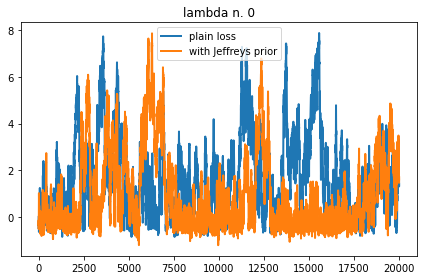

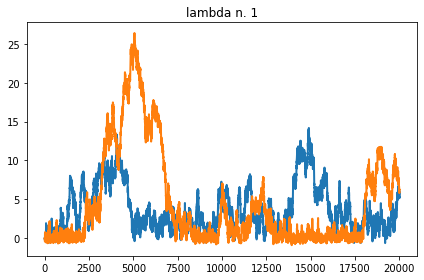

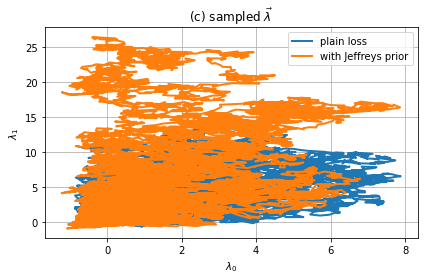

In [33]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams.update({'figure.autolayout': True})

n_obs = sampling_noJ[0].shape[1]

for i in range(n_obs):
    plt.figure()
    plt.title('lambda n. %i' % i)
    plt.plot(sampling_noJ[0][:, i], label='plain loss')
    plt.plot(sampling_J[0][:, i], label='with Jeffreys prior')
    if i == 0 : plt.legend()

if (n_obs == 2):
    plt.figure(figsize=(6, 4))
    plt.plot(sampling_noJ[0][:, 0], sampling_noJ[0][:, 1], label='plain loss')
    plt.plot(sampling_J[0][:, 0], sampling_J[0][:, 1], label='with Jeffreys prior')
    plt.xlabel('$\lambda_0$')
    plt.ylabel('$\lambda_1$')
    plt.legend()
    plt.grid()
    plt.title(r'(c) sampled $\vec\lambda$')
    # plt.savefig('Manuscript_images/ex2_sampling_lambdas.pdf', format='pdf', bbox_inches='tight')

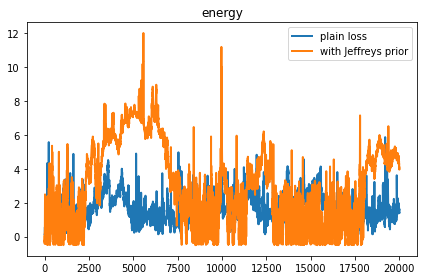

In [36]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams.update({'figure.autolayout': True})


plt.figure()
plt.title('energy')
plt.plot(sampling_noJ[1], label='plain loss')
plt.plot(sampling_J[1], label='with Jeffreys prior')
plt.legend()


Text(0.5, 1.0, '(d) sampled observables')

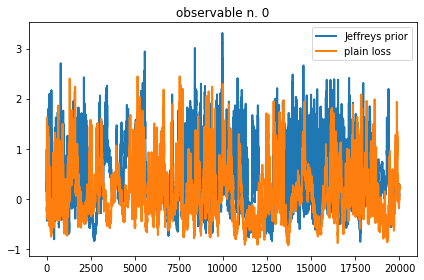

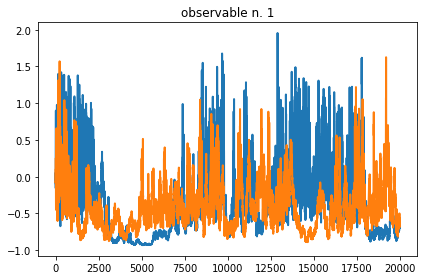

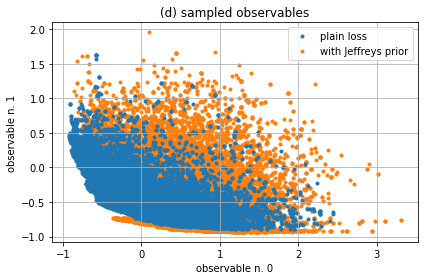

In [37]:
for i in range(n_obs):
    plt.figure()
    plt.title('observable n. %i' % i)
    plt.plot(sampling_J[3][:, i], label='Jeffreys prior')
    plt.plot(sampling_noJ[3][:, i], label='plain loss')
    if i == 0 : plt.legend()

plt.rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(6, 4))
# plt.rcParams['lines.markeredgewidth'] = 0.5

plt.plot(sampling_noJ[3][:, 0], sampling_noJ[3][:, 1], '.', label='plain loss', zorder=1)
plt.plot(sampling_J[3][:, 0], sampling_J[3][:, 1], '.', label='with Jeffreys prior', zorder=0)

plt.xlabel('observable n. 0')
plt.ylabel('observable n. 1')
plt.legend()
plt.grid()
plt.title('(d) sampled observables')
# plt.savefig('Manuscript_images/ex2_sampling_obs.pdf', format='pdf', bbox_inches='tight')
